In [1]:
import torch
import os
from torch import device
import re

In [2]:
import pdb
import pandas as pd

In [3]:
def get_args(path):
    model_name = path.split('search')[-1].split('_')[1]
    split_path = path.split('seed')[-1].split('_')
    seed = split_path[1]
    meta_batch_size = split_path[2]
    gs = split_path[3]
    args = {}
    try:
        finetune = ' '.join(split_path[4].split('-')[:-1])
       
        args = {'model_name':model_name, 'seed':seed, 'meta_batch':meta_batch_size, 'gs':gs, 'finetune':finetune}
    except:
        return None
  
    return args

In [4]:
def read_result_file(path):
    for i, l in enumerate(open(path)):
        if i == 1:
            l = l.split()
            result = float(l[-1])
            return result
        

In [5]:
def get_log(path, args_list=None):
    
    log_path = os.path.join(path, 'log')
    line = open(log_path).readlines()[0]
    line =  re.sub(r'\<.*\>', 'None', line)
    args = eval(line)
   
    new_args = {}
    
   
    if args_list is not None:
        for arg_para in args_list:
            if arg_para not in args:
                print("error "+str(arg_para))
            new_args[arg_para] = args[arg_para]
    else:
        new_args = args
    return new_args
    

In [6]:

def get_result_list(task):
    experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
    path = os.path.join(experiment_path, task)
    result_path = os.path.join(path, 'pt-results')
    result_list = []
    print(len(os.listdir(result_path)))
    for file_name in os.listdir(result_path):
        #args_dict = get_args(file_name) 

        eval_result = os.path.join(result_path, file_name)

        try:
            args_dict = get_log(eval_result, args_list)
            #print(args_dict)
            result_list.append(args_dict)
        except:
            continue
    return result_list


In [4]:
task = 'roberta-base-meta-st'
experiment_path = '/home/t-yaqingwang/azure_storage/phillytools/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
for file_name in os.listdir(result_path):
    args_dict = get_args(file_name) 
    
    if args is not None:
        eval_result = os.path.join(result_path, file_name)
        mnli_result_file = 'test_results_mnli.txt'
        mnli_mm_result_file = 'test_results_mnli-mm.txt'
        try:
            args_dict['mnli'] = read_result_file(os.path.join(eval_result, mnli_result_file))
            args_dict['mnli_mm'] = read_result_file(os.path.join(eval_result, mnli_mm_result_file))
            print(args_dict)
            result_list.append(args_dict)
        except:
            continue
    
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')

NameError: name 'get_args' is not defined

In [58]:
task = 'roberta-large-meta-st'
experiment_path = '/home/t-yaqingwang/azure_storage/phillytools/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
for file_name in os.listdir(result_path):
    args_dict = get_args(file_name) 
    
    if args_dict is not None:
        eval_result = os.path.join(result_path, file_name)
        mnli_result_file = 'test_results_mnli.txt'
        mnli_mm_result_file = 'test_results_mnli-mm.txt'
        try:
            args_dict['mnli'] = read_result_file(os.path.join(eval_result, mnli_result_file))
            args_dict['mnli_mm'] = read_result_file(os.path.join(eval_result, mnli_mm_result_file))
            print(args_dict)
            result_list.append(args_dict)
        except:
            continue
    
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')

{'model_name': 'roberta-large-meta-st', 'seed': '87', 'meta_batch': '6', 'gs': '1', 'finetune': 'prompt', 'mnli': 0.7619969434538971, 'mnli_mm': 0.7747152156224573}
{'model_name': 'roberta-large-meta-st', 'seed': '42', 'meta_batch': '6', 'gs': '1', 'finetune': 'prompt demo', 'mnli': 0.7529291900152827, 'mnli_mm': 0.7686126932465419}
{'model_name': 'roberta-large-meta-st', 'seed': '87', 'meta_batch': '4', 'gs': '1', 'finetune': 'prompt demo', 'mnli': 0.7136016301579216, 'mnli_mm': 0.738100081366965}
{'model_name': 'roberta-large-meta-st', 'seed': '100', 'meta_batch': '6', 'gs': '1', 'finetune': 'prompt', 'mnli': 0.7755476311767703, 'mnli_mm': 0.7922091131000814}
{'model_name': 'roberta-large-meta-st', 'seed': '13', 'meta_batch': '4', 'gs': '2', 'finetune': 'prompt demo', 'mnli': 0.7048395313295975, 'mnli_mm': 0.7189788445890968}
{'model_name': 'roberta-large-meta-st', 'seed': '21', 'meta_batch': '6', 'gs': '1', 'finetune': 'prompt', 'mnli': 0.7725929699439633, 'mnli_mm': 0.7829536208299

In [60]:
result_frame = pd.DataFrame(result_list)

In [26]:
result_frame = pd.DataFrame(result_list)

In [66]:
result_frame.loc[(result_frame['meta_batch']=='6') & (result_frame['finetune']=='prompt demo') & 
                 (result_frame['gs']=='1')]

model_name seed meta_batch gs     finetune      mnli   mnli_mm
1   roberta-large-meta-st   42          6  1  prompt demo  0.752929  0.768613
12  roberta-large-meta-st   13          6  1  prompt demo  0.719817  0.731692
16  roberta-large-meta-st  100          6  1  prompt demo  0.720122  0.736168
17  roberta-large-meta-st   21          6  1  prompt demo  0.760672  0.776953
19  roberta-large-meta-st   87          6  1  prompt demo  0.713602  0.738202

In [69]:
result_frame.loc[(result_frame['meta_batch']=='4') & (result_frame['finetune']=='prompt demo') & 
                 (result_frame['gs']=='1')&(result_frame['seed']='1')]['mnli_mm'].mean()

0.7700976403580146

In [44]:
result_frame.loc[(result_frame['meta_batch']=='4') & (result_frame['finetune']=='prompt demo') & 
                 (result_frame['gs']=='2')]['mnli'].mean()

0.7093734080489047

In [42]:
result_frame.loc[(result_frame['meta_batch']=='4') & (result_frame['finetune']=='prompt') & 
                 (result_frame['gs']=='1')]['mnli'].mean()

0.7400305654610291

In [64]:
result_frame.loc[(result_frame['meta_batch']=='6') & (result_frame['finetune']=='prompt') & 
                 (result_frame['gs']=='1')]['mnli_mm'].mean()

0.7753661513425549

In [25]:
task = 'roberta-base-meta-st'
experiment_path = '/home/t-yaqingwang/azure_storage/phillytools/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
for file_name in os.listdir(result_path):
    args_dict = get_args(file_name) 
    
    if args_dict is not None:
        eval_result = os.path.join(result_path, file_name)
        mnli_result_file = 'test_results_mnli.txt'
        mnli_mm_result_file = 'test_results_mnli-mm.txt'
        try:
            args_dict['mnli'] = read_result_file(os.path.join(eval_result, mnli_result_file))
            args_dict['mnli_mm'] = read_result_file(os.path.join(eval_result, mnli_mm_result_file))
            print(args_dict)
            result_list.append(args_dict)
        except:
            continue
    
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')

{'model_name': 'roberta-base-meta-st', 'seed': '13', 'meta_batch': '6', 'gs': '2', 'finetune': 'prompt', 'mnli': 0.6234335201222618, 'mnli_mm': 0.6429007323026851}
{'model_name': 'roberta-base-meta-st', 'seed': '42', 'meta_batch': '4', 'gs': '2', 'finetune': 'prompt demo', 'mnli': 0.5899133978604177, 'mnli_mm': 0.6082180634662328}
{'model_name': 'roberta-base-meta-st', 'seed': '21', 'meta_batch': '4', 'gs': '1', 'finetune': 'prompt', 'mnli': 0.6461538461538462, 'mnli_mm': 0.6673108218063466}
{'model_name': 'roberta-base-meta-st', 'seed': '21', 'meta_batch': '4', 'gs': '2', 'finetune': 'prompt demo', 'mnli': 0.6471726948548141, 'mnli_mm': 0.6636493083807974}
{'model_name': 'roberta-base-meta-st', 'seed': '42', 'meta_batch': '4', 'gs': '1', 'finetune': 'prompt demo', 'mnli': 0.6382068262862964, 'mnli_mm': 0.6570382424735557}
{'model_name': 'roberta-base-meta-st', 'seed': '100', 'meta_batch': '6', 'gs': '2', 'finetune': 'prompt demo', 'mnli': 0.677330616403464, 'mnli_mm': 0.69833197721724

In [26]:
result_frame = pd.DataFrame(result_list)

In [27]:
result_frame

model_name seed meta_batch gs     finetune      mnli   mnli_mm
0   roberta-base-meta-st   13          6  2       prompt  0.623434  0.642901
1   roberta-base-meta-st   42          4  2  prompt demo  0.589913  0.608218
2   roberta-base-meta-st   21          4  1       prompt  0.646154  0.667311
3   roberta-base-meta-st   21          4  2  prompt demo  0.647173  0.663649
4   roberta-base-meta-st   42          4  1  prompt demo  0.638207  0.657038
5   roberta-base-meta-st  100          6  2  prompt demo  0.677331  0.698332
6   roberta-base-meta-st   42          6  2  prompt demo  0.643607  0.662022
7   roberta-base-meta-st   21          6  1       prompt  0.614468  0.640460
8   roberta-base-meta-st   13          4  1  prompt demo  0.615181  0.631509
9   roberta-base-meta-st  100          6  2       prompt  0.657157  0.671481
10  roberta-base-meta-st   42          6  2       prompt  0.617932  0.637307
11  roberta-base-meta-st   87          6  1       prompt  0.677636  0.692331
12  roberta-base-meta-st   21          6  2       prompt  0.640448  0.667209
13  roberta-base-meta-st  100          6  1       prompt  0.625675  0.635781
14  roberta-base-meta-st   21          4  2       prompt  0.641773  0.668430
15  roberta-base-meta-st   13          6  1  prompt demo  0.642180  0.650122
16  roberta-base-meta-st  100          4  1       prompt  0.601528  0.616965
17  roberta-base-meta-st   42          6  1       prompt  0.616302  0.634459
18  roberta-base-meta-st   13          4  1       prompt  0.562710  0.591436
19  roberta-base-meta-st   87          6  2  prompt demo  0.681814  0.700366
20  roberta-base-meta-st   13          4  2  prompt demo  0.642588  0.661208
21  roberta-base-meta-st  100          6  1  prompt demo  0.674070  0.688059
22  roberta-base-meta-st  100          4  1  prompt demo  0.678349  0.689992
23  roberta-base-meta-st   13          6  2  prompt demo  0.629852  0.635374
24  roberta-base-meta-st   87          6  2       prompt  0.688232  0.702604
25  roberta-base-meta-st   42          6  1  prompt demo  0.609475  0.641985
26  roberta-base-meta-st  100          4  2       prompt  0.651248  0.670566
27  roberta-base-meta-st   42          4  2       prompt  0.626083  0.647681
28  roberta-base-meta-st   87          4  1  prompt demo  0.691391  0.709215
29  roberta-base-meta-st   21          6  1  prompt demo  0.651656  0.669040
30  roberta-base-meta-st   87          4  1       prompt  0.672848  0.696298
31  roberta-base-meta-st   21          6  2  prompt demo  0.645339  0.662429
32  roberta-base-meta-st   87          6  1  prompt demo  0.665308  0.687958
33  roberta-base-meta-st   21          4  1  prompt demo  0.651656  0.665887
34  roberta-base-meta-st   87          4  2       prompt  0.670504  0.693653
35  roberta-base-meta-st   42          4  1       prompt  0.626388  0.647681
36  roberta-base-meta-st   13          4  2       prompt  0.651961  0.658869
37  roberta-base-meta-st   87          4  2  prompt demo  0.688130  0.707079
38  roberta-base-meta-st   13          6  1       prompt  0.639633  0.649410
39  roberta-base-meta-st  100          4  2  prompt demo  0.666327  0.686330

In [39]:
result_frame.loc[(result_frame['meta_batch']=='6') & (result_frame['finetune']=='prompt demo') & 
                 (result_frame['gs']=='1')]['mnli'].mean()

0.648537952114111

In [35]:
result_frame.loc[(result_frame['meta_batch']=='4') & (result_frame['finetune']=='prompt demo') & 
                 (result_frame['gs']=='1')]['mnli'].mean()

0.6549566989302088

In [55]:
result_frame.loc[(result_frame['meta_batch']=='4') & (result_frame['finetune']=='prompt') & 
                 (result_frame['gs']=='1')]['mnli'].mean()

0.6219256240448294

In [56]:
result_frame.loc[(result_frame['meta_batch']=='6') & (result_frame['finetune']=='prompt') & 
                 (result_frame['gs']=='1')]['mnli'].mean()

0.6347427407030055

In [57]:
result_frame.loc[(result_frame['meta_batch']=='6') & (result_frame['finetune']=='prompt') & 
                 (result_frame['gs']=='2')]['mnli'].mean()

0.6454406520631686

In [58]:
result_frame.loc[(result_frame['meta_batch']=='4') & (result_frame['finetune']=='prompt') & 
                 (result_frame['gs']=='2')]['mnli'].mean()

0.648313805399898

In [36]:
result_frame.loc[(result_frame['meta_batch']=='4') & (result_frame['finetune']=='prompt demo') & 
                 (result_frame['gs']=='2')]['mnli'].mean()

0.6468262862964849

In [37]:
result_frame.loc[(result_frame['meta_batch']=='6') & (result_frame['finetune']=='prompt demo') & 
                 (result_frame['gs']=='2')]['mnli'].mean()


0.655588385124809

In [3]:
def read_result_file(path):
    for i, l in enumerate(open(path)):
        if i == 1:
            l = l.split()
            result = float(l[-1])
            return result
        

In [205]:
def get_log(path, args_list=None):
    
    log_path = os.path.join(path, 'log')
    line = open(log_path).readlines()[0]
    line =  re.sub(r'\<.*\>', 'None', line)
    args = eval(line)
    new_args = {}
    import pdb
    pdb.set_trace()
    if args_list is not None:
        for arg_para in args_list:
            new_args[arg_para] = args[arg_para]
    else:
        new_args = args
    return new_args
    

In [6]:
args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc', 
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',
             'meta_train_batch_size', 'un_train_batch_size', 'seed']

In [85]:
task = 'roberta-base-meta-st-large-unbatch'
experiment_path = '/home/t-yaqingwang/azure_storage/phillytools/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')


40
{'mnli-mm_test_eval_mnli-mm/acc': 0.6807363710333605, 'mnli_test_eval_mnli/acc': 0.665206316861946, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 6, 'un_train_batch_size': 10, 'seed': 100}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6680227827502034, 'mnli_test_eval_mnli/acc': 0.6497198166072339, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 6, 'un_train_batch_size': 8, 'seed': 21}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6491049633848658, 'mnli_test_eval_mnli/acc': 0.6310748853795212, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 6, 'un_train_batch_size': 8, 'seed': 21}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6635475996745321, 'mnli_test_eval_mnli/acc': 0.6522669383596535, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'roberta-base', 'gradient_accumul

In [69]:
result_list

[]

In [98]:
result_frame.loc[(result_frame['meta_train_batch_size']==6) & (result_frame['few_shot_type']=='prompt-demo') & 
                 (result_frame['gradient_accumulation_steps']==1) & (result_frame['un_train_batch_size']==8)]['mnli_test_eval_mnli/acc'].mean()

0.6443402954661234

In [97]:
result_frame.loc[(result_frame['meta_train_batch_size']==6) & (result_frame['few_shot_type']=='prompt-demo') & 
                 (result_frame['gradient_accumulation_steps']==1) & (result_frame['un_train_batch_size']==10)]['mnli_test_eval_mnli/acc'].mean()

0.6577890983188996

In [96]:
result_frame.loc[(result_frame['meta_train_batch_size']==6) & (result_frame['few_shot_type']=='prompt') & 
                 (result_frame['gradient_accumulation_steps']==1) & (result_frame['un_train_batch_size']==8)]['mnli_test_eval_mnli/acc'].mean()

0.6436067244014264

In [95]:
result_frame.loc[(result_frame['meta_train_batch_size']==6) & (result_frame['few_shot_type']=='prompt') & 
                 (result_frame['gradient_accumulation_steps']==1) & (result_frame['un_train_batch_size']==10)]['mnli_test_eval_mnli/acc'].mean()

0.6360468670402446

In [94]:
result_frame.loc[(result_frame['meta_train_batch_size']==4) & (result_frame['few_shot_type']=='prompt') & 
                 (result_frame['gradient_accumulation_steps']==1) & (result_frame['un_train_batch_size']==10)]['mnli_test_eval_mnli/acc'].mean()

0.6436271013754458

In [99]:
result_frame.loc[(result_frame['meta_train_batch_size']==4) & (result_frame['few_shot_type']=='prompt-demo') & 
                 (result_frame['gradient_accumulation_steps']==1) & (result_frame['un_train_batch_size']==10)]['mnli_test_eval_mnli/acc'].mean()

0.6389607743250127

In [100]:
result_frame.loc[(result_frame['meta_train_batch_size']==4) & (result_frame['few_shot_type']=='prompt-demo') & 
                 (result_frame['gradient_accumulation_steps']==1) & (result_frame['un_train_batch_size']==8)]['mnli_test_eval_mnli/acc'].mean()

0.6587060621497708

In [101]:
result_frame.loc[(result_frame['meta_train_batch_size']==4) & (result_frame['few_shot_type']=='prompt-demo') & 
                 (result_frame['gradient_accumulation_steps']==1) & (result_frame['un_train_batch_size']==8)]['mnli-mm_test_eval_mnli-mm/acc'].mean()


0.6763425549227013

In [40]:
task = 'deberta-base-meta-st'
experiment_path = '/home/t-yaqingwang/azure_storage/phillytools/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



40
{'mnli-mm_test_eval_mnli-mm/acc': 0.6816517493897477, 'mnli_test_eval_mnli/acc': 0.6567498726439124, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 6, 'un_train_batch_size': 6, 'seed': 87}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6841944670463792, 'mnli_test_eval_mnli/acc': 0.6745797249108507, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'microsoft/deberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 6, 'un_train_batch_size': 10, 'seed': 21}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5861472742066721, 'mnli_test_eval_mnli/acc': 0.561079979623026, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'microsoft/deberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 6, 'un_train_batch_size': 6, 'seed': 13}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6717860048820179, 'mnli_test_eval_mnli/acc': 0.6614365766683648, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'mic

{'mnli-mm_test_eval_mnli-mm/acc': 0.6578519121236778, 'mnli_test_eval_mnli/acc': 0.6333163525216505, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 6, 'un_train_batch_size': 10, 'seed': 42}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4688771358828316, 'mnli_test_eval_mnli/acc': 0.44431991849210395, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 6, 'un_train_batch_size': 10, 'seed': 13}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6769731489015459, 'mnli_test_eval_mnli/acc': 0.6553234844625573, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'microsoft/deberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 6, 'seed': 100}
{'mnli-mm_test_eval_mnli-mm/acc': 0.7172497965825875, 'mnli_test_eval_mnli/acc': 0.7076923076923077, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'microso

In [56]:
meta_size = 6
few_shot = 'prompt-demo'
un_train_size = 6



result_frame.loc[(result_frame['meta_train_batch_size']==meta_size) & (result_frame['few_shot_type']==few_shot) & 
                 (result_frame['gradient_accumulation_steps']==1) & (result_frame['un_train_batch_size']==un_train_size) ]['mnli-mm_test_eval_mnli-mm/acc'].mean()


0.6659072416598861

In [83]:
args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc', 
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate',
             'meta_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

In [84]:
task = 'continuous_prompt_deberta_full_model'
experiment_path = '/home/t-yaqingwang/azure_storage/phillytools/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



2
{'mnli-mm_test_eval_mnli-mm/acc': 0.8886289666395444, 'mnli_test_eval_mnli/acc': 0.8898624554253693, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 1e-05}
{'mnli-mm_test_eval_mnli-mm/acc': 0.8909682668836453, 'mnli_test_eval_mnli/acc': 0.8945491594498217, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}


In [85]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc few_shot_type  \
0                       0.888629                 0.889862        prompt   
1                       0.890968                 0.894549        prompt   

        model_name_or_path  gradient_accumulation_steps  \
0  microsoft/deberta-large                            1   
1  microsoft/deberta-large                            1   

   meta_train_batch_size  un_train_batch_size  seed  prompt_length  \
0                      4                    4   100             80   
1                      4                    4   100             80   

  prompt_encoder_type  learning_rate  
0                 mlp        0.00001  
1                None        0.00001

In [130]:
task = 'continuous_prompt_long_length'
experiment_path = '/home/t-yaqingwang/azure_storage/phillytools/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



55
{'mnli-mm_test_eval_mnli-mm/acc': 0.6960943856794142, 'mnli_test_eval_mnli/acc': 0.6813041263372389, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 40, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.01}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3922904800650936, 'mnli_test_eval_mnli/acc': 0.3811512990320937, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 60, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.01}
{'mnli-mm_test_eval_mnli-mm/acc': 0.7121643612693247, 'mnli_test_eval_mnli/acc': 0.6935303107488537, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'No

{'mnli-mm_test_eval_mnli-mm/acc': 0.33207892595606187, 'mnli_test_eval_mnli/acc': 0.33897096281202244, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 60, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.1}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6907038242473555, 'mnli_test_eval_mnli/acc': 0.6728476821192053, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 40, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.576179820992677, 'mnli_test_eval_mnli/acc': 0.5708609271523178, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'ml

In [87]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc few_shot_type  \
0                        0.617474                 0.603770        prompt   
1                        0.640053                 0.633316        prompt   
2                        0.653987                 0.644116        prompt   
3                        0.719386                 0.712787        prompt   
4                        0.718674                 0.711870        prompt   
5                        0.722742                 0.717677        prompt   
6                        0.690704                 0.672848        prompt   
7                        0.694162                 0.674172        prompt   
8                        0.712164                 0.693530        prompt   
9                        0.682465                 0.664086        prompt   
10                       0.684601                 0.665410        prompt   
11                       0.710130                 0.693225        prompt   
12                       0.696094                 0.681304        prompt   
13                       0.691111                 0.685176        prompt   
14                       0.695382                 0.682629        prompt   
15                       0.741660                 0.726439        prompt   
16                       0.718775                 0.704330        prompt   
17                       0.734133                 0.718594        prompt   
18                       0.336249                 0.335813        prompt   
19                       0.360659                 0.363831        prompt   
20                       0.336554                 0.333877        prompt   
21                       0.765053                 0.753439        prompt   
22                       0.758544                 0.745899        prompt   
23                       0.363914                 0.368008        prompt   
24                       0.349471                 0.344371        prompt   
25                       0.744711                 0.734386        prompt   
26                       0.753662                 0.741111        prompt   
27                       0.769528                 0.759755        prompt   
28                       0.333401                 0.335099        prompt   
29                       0.332079                 0.338971        prompt   
30                       0.358625                 0.348650        prompt   
31                       0.759052                 0.744167        prompt   
32                       0.392290                 0.381151        prompt   
33                       0.742779                 0.731941        prompt   
34                       0.734439                 0.721243        prompt   
35                       0.780309                 0.764544        prompt   
36                       0.576180                 0.570861        prompt   

   model_name_or_path  gradient_accumulation_steps  meta_train_batch_size  \
0        roberta-base                            1                      4   
1        roberta-base                            1                      4   
2        roberta-base                            1                      4   
3        roberta-base                            1                      4   
4        roberta-base                            1                      4   
5        roberta-base                            1                      4   
6        roberta-base                            1                      4   
7        roberta-base                            1                      4   
8        roberta-base                            1                      4   
9        roberta-base                            1                      4   
10       roberta-base                            1                      4   
11       roberta-base                            1                      4   
12       roberta-base                            1                      4   
13       roberta-base                

In [89]:
result_frame.loc[(result_frame['learning_rate']==0.01) & (result_frame['prompt_length']==40) & 
                 (result_frame['prompt_encoder_type']=='mlp')&(result_frame['model_name_or_path']=='roberta-large')]['mnli-mm_test_eval_mnli-mm/acc'].mean()


0.7590520748576078

In [90]:
result_frame.loc[(result_frame['learning_rate']==0.01) & (result_frame['prompt_length']==40) & 
                 (result_frame['prompt_encoder_type']=='mlp')&(result_frame['model_name_or_path']=='roberta-base')]['mnli-mm_test_eval_mnli-mm/acc'].mean()


0.6960943856794142

In [91]:
result_frame.loc[(result_frame['learning_rate']==0.01) & (result_frame['prompt_length']==40) & 
                 (result_frame['prompt_encoder_type']=='None')&(result_frame['model_name_or_path']=='roberta-large')]['mnli-mm_test_eval_mnli-mm/acc'].mean()


0.7617982099267697

In [99]:
result_frame.loc[(result_frame['learning_rate']==0.01) & (result_frame['prompt_length']==40) & 
                 (result_frame['prompt_encoder_type']=='None')&(result_frame['model_name_or_path']=='roberta-base')]

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc few_shot_type  \
3                       0.719386                 0.712787        prompt   

  model_name_or_path  gradient_accumulation_steps  meta_train_batch_size  \
3       roberta-base                            1                      4   

   un_train_batch_size  seed  prompt_length prompt_encoder_type  learning_rate  
3                    4   100             40                None           0.01

In [131]:
att_dict = {'learning_rate':[0.01, 0.001], 'prompt_encoder_type':['mlp', 'None'], 'prompt_length' :[40, 60, 80]}
for att in att_dict:
    for val in att_dict[att]:
        print(att, val)
        print(result_frame.loc[(result_frame[att]==val)  &  (result_frame['learning_rate'] !=0.1)
                 &(result_frame['model_name_or_path']=='roberta-base')]['mnli_test_eval_mnli/acc'].mean())
        print(result_frame.loc[(result_frame[att]==val)  &  (result_frame['learning_rate'] !=0.1)
                 &(result_frame['model_name_or_path']=='roberta-base')]['mnli-mm_test_eval_mnli-mm/acc'].mean())


learning_rate 0.01
0.6985736118186449
0.7072314890154597
learning_rate 0.001
0.698318899643403
0.7152664768104149
prompt_encoder_type mlp
0.699745287824758
0.7128593707621372
prompt_encoder_type None
0.6971472236372899
0.7096385950637375
prompt_length 40
0.6983443708609272
0.7119609438567942
prompt_length 60
0.6938869077941925
0.7056804312449145
prompt_length 80
0.7031074885379521
0.7161055736371034


In [116]:

result_frame.loc[(result_frame[att]==val) 
                 &(result_frame['model_name_or_path']=='roberta-large')]



mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc few_shot_type  \
20                       0.336554                 0.333877        prompt   
24                       0.349471                 0.344371        prompt   
27                       0.769528                 0.759755        prompt   
30                       0.358625                 0.348650        prompt   
33                       0.742779                 0.731941        prompt   
36                       0.576180                 0.570861        prompt   

   model_name_or_path  gradient_accumulation_steps  meta_train_batch_size  \
20      roberta-large                            1                      4   
24      roberta-large                            1                      4   
27      roberta-large                            1                      4   
30      roberta-large                            1                      4   
33      roberta-large                            1                      4   
36      roberta-large                            1                      4   

    un_train_batch_size  seed  prompt_length prompt_encoder_type  \
20                    4   100             80                None   
24                    4   100             80                None   
27                    4   100             80                None   
30                    4   100             80                 mlp   
33                    4   100             80                 mlp   
36                    4   100             80                 mlp   

    learning_rate  
20          0.100  
24          0.010  
27          0.001  
30          0.100  
33          0.010  
36          0.001

In [113]:
result_frame.loc[(result_frame[att]==val) 
                 &(result_frame['model_name_or_path']=='roberta-base')]['mnli-mm_test_eval_mnli-mm/acc'].max()

0.73413344182262

In [132]:
att_dict = {'learning_rate':[0.1, 0.01, 0.001], 'prompt_encoder_type':['mlp', 'None'], 'prompt_length' :[40, 60, 80]}
for att in att_dict:
    for val in att_dict[att]:
        print(att, val)
        print(result_frame.loc[(result_frame[att]==val)  &  (result_frame['learning_rate'] !=0.1)
                 &(result_frame['model_name_or_path']=='roberta-large')]['mnli_test_eval_mnli/acc'].mean())
        print(result_frame.loc[(result_frame[att]==val)  &  (result_frame['learning_rate'] !=0.1)
                 &(result_frame['model_name_or_path']=='roberta-large')]['mnli-mm_test_eval_mnli-mm/acc'].mean())


learning_rate 0.1
nan
nan
learning_rate 0.01
0.5812822938650754
0.5901575031965594
learning_rate 0.001
0.7153166921378841
0.7264713859506374
prompt_encoder_type mlp
0.652317880794702
0.6641748033631679
prompt_encoder_type None
0.6352812750163743
0.6435545739858188
prompt_length 40
0.7398267957208355
0.752359641985354
prompt_length 60
0.5637035150280183
0.572543734743694
prompt_length 80
0.6017320427916454
0.6094894222945485


In [117]:
result_frame.loc[(result_frame['learning_rate']==0.01) & (result_frame['prompt_length']==40) 
                 &(result_frame['model_name_or_path']=='roberta-large')]['mnli-mm_test_eval_mnli-mm/acc'].mean()


0.7608828315703824

In [118]:
result_frame.loc[(result_frame['learning_rate']==0.01) & (result_frame['prompt_length']==60) 
                 &(result_frame['model_name_or_path']=='roberta-large')]['mnli-mm_test_eval_mnli-mm/acc'].mean()


0.3781021155410903

In [121]:
result_frame.loc[(result_frame['learning_rate']==0.01) & (result_frame['prompt_length']==80) 
                 &(result_frame['model_name_or_path']=='roberta-large')]


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc few_shot_type  \
24                       0.349471                 0.344371        prompt   
33                       0.742779                 0.731941        prompt   

   model_name_or_path  gradient_accumulation_steps  meta_train_batch_size  \
24      roberta-large                            1                      4   
33      roberta-large                            1                      4   

    un_train_batch_size  seed  prompt_length prompt_encoder_type  \
24                    4   100             80                None   
33                    4   100             80                 mlp   

    learning_rate  
24           0.01  
33           0.01

In [122]:
task = 'continuous_prompt_deberta'
experiment_path = '/home/t-yaqingwang/azure_storage/phillytools/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



18
{'mnli-mm_test_eval_mnli-mm/acc': 0.40988608624898293, 'mnli_test_eval_mnli/acc': 0.40672440142638816, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 40, 'prompt_encoder_type': 'None', 'learning_rate': 0.1}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5772986167615948, 'mnli_test_eval_mnli/acc': 0.5727967396841569, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 60, 'prompt_encoder_type': 'None', 'learning_rate': 0.1}
{'mnli-mm_test_eval_mnli-mm/acc': 0.34997965825874694, 'mnli_test_eval_mnli/acc': 0.3543555781966378, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_leng

In [123]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc few_shot_type  \
0                        0.409886                 0.406724        prompt   
1                        0.577299                 0.572797        prompt   
2                        0.349980                 0.354356        prompt   
3                        0.795362                 0.786042        prompt   
4                        0.812958                 0.804279        prompt   
5                        0.858727                 0.855323        prompt   
6                        0.862897                 0.855222        prompt   
7                        0.859642                 0.854203        prompt   
8                        0.845403                 0.838105        prompt   
9                        0.843572                 0.839531        prompt   
10                       0.855065                 0.847988        prompt   
11                       0.848963                 0.846154        prompt   
12                       0.845708                 0.841569        prompt   
13                       0.854150                 0.850331        prompt   
14                       0.857404                 0.849210        prompt   
15                       0.860456                 0.857667        prompt   
16                       0.861880                 0.854814        prompt   

         model_name_or_path  gradient_accumulation_steps  \
0   microsoft/deberta-large                            1   
1   microsoft/deberta-large                            1   
2   microsoft/deberta-large                            1   
3   microsoft/deberta-large                            1   
4   microsoft/deberta-large                            1   
5   microsoft/deberta-large                            1   
6   microsoft/deberta-large                            1   
7   microsoft/deberta-large                            1   
8   microsoft/deberta-large                            1   
9   microsoft/deberta-large                            1   
10  microsoft/deberta-large                            1   
11  microsoft/deberta-large                            1   
12  microsoft/deberta-large                            1   
13  microsoft/deberta-large                            1   
14  microsoft/deberta-large                            1   
15  microsoft/deberta-large                            1   
16  microsoft/deberta-large                            1   

    meta_train_batch_size  un_train_batch_size  seed  prompt_length  \
0                       4                    4   100             40   
1                       4                    4   100             60   
2                       4                    4   100             80   
3                       4                    4   100             60   
4                       4                    4   100             80   
5                       4                    4   100             40   
6                       4                    4   100             60   
7                       4                    4   100             80   
8                       4                    4   100             40   
9                       4                    4   100             60   
10                      4                    4   100             80   
11                      4                    4   100             40   
12                      4                    4   100             60   
13                      4                    4   100             80   
14                      4                    4   100             40   
15                      4                    4   100             60   
16                      4                    4   100             80   

   prompt_encoder_type  learning_rate  
0                 None          0.100  
1                 None          0.100  
2                 None          0.100  
3                 None          0.010  
4                 None          0.010  
5                 None          0.0

In [129]:
att_dict = {'learning_rate':[0.01, 0.001], 'prompt_encoder_type':['mlp', 'None'], 'prompt_length' :[40, 60, 80]}
for att in att_dict:
    for val in att_dict[att]:
        print(att, val)
        print(result_frame.loc[(result_frame[att]==val) &  (result_frame['learning_rate'] !=0.1)
                 &(result_frame['model_name_or_path']=='microsoft/deberta-large')]['mnli_test_eval_mnli/acc'].mean())
        print(result_frame.loc[(result_frame[att]==val) &  (result_frame['learning_rate'] !=0.1)
                 &(result_frame['model_name_or_path']=='microsoft/deberta-large')]['mnli-mm_test_eval_mnli-mm/acc'].mean())


learning_rate 0.01
0.8256749872643911
0.8314279902359643
learning_rate 0.001
0.8544065206316863
0.8601674803363167
prompt_encoder_type mlp
0.849957547970793
0.854759967453214
prompt_encoder_type None
0.831013754457463
0.8379170056956877
prompt_length 40
0.8502292409577178
0.8550311906699214
prompt_length 60
0.8351248089658685
0.8411055736371034
prompt_length 80
0.8409067753438614
0.847157241659886


In [147]:
args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc', 
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'meta_st_continuous_large_model_deberta'
experiment_path = '/home/t-yaqingwang/azure_storage/phillytools/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



30
{'mnli-mm_test_eval_mnli-mm/acc': 0.7608828315703824, 'mnli_test_eval_mnli/acc': 0.7395822720326032, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 8, 'seed': 42, 'prompt_length': 40, 'prompt_encoder_type': 'mlp', 'learning_rate': 5e-06}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6745321399511798, 'mnli_test_eval_mnli/acc': 0.65206316861946, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 8, 'seed': 42, 'prompt_length': 40, 'prompt_encoder_type': 'mlp', 'learning_rate': 5e-06}
{'mnli-mm_test_eval_mnli-mm/acc': 0.7278275020341741, 'mnli_test_eval_mnli/acc': 0.7195109526235354, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulatio

In [148]:
result_frame


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc few_shot_type  \
0                        0.760883                 0.739582        prompt   
1                        0.674532                 0.652063        prompt   
2                        0.727828                 0.719511        prompt   
3                        0.751119                 0.740907        prompt   
4                        0.691314                 0.674682        prompt   
5                        0.755289                 0.731635        prompt   
6                        0.748779                 0.736526        prompt   
7                        0.735354                 0.723383        prompt   
8                        0.748779                 0.736526        prompt   
9                        0.748779                 0.736526        prompt   
10                       0.691314                 0.674682        prompt   
11                       0.730675                 0.719205        prompt   
12                       0.715826                 0.696077        prompt   
13                       0.677075                 0.659603        prompt   
14                       0.786412                 0.777993        prompt   

         model_name_or_path  gradient_accumulation_steps  \
0   microsoft/deberta-large                            1   
1   microsoft/deberta-large                            1   
2   microsoft/deberta-large                            1   
3   microsoft/deberta-large                            1   
4   microsoft/deberta-large                            1   
5   microsoft/deberta-large                            1   
6   microsoft/deberta-large                            1   
7   microsoft/deberta-large                            1   
8   microsoft/deberta-large                            1   
9   microsoft/deberta-large                            1   
10  microsoft/deberta-large                            1   
11  microsoft/deberta-large                            1   
12  microsoft/deberta-large                            1   
13  microsoft/deberta-large                            1   
14  microsoft/deberta-large                            1   

    prompt_learning_rate  soft_label  meta_train_batch_size  \
0                0.00010           0                      4   
1                0.00100           0                      4   
2                0.00010           1                      4   
3                0.00100           1                      4   
4                0.00001           0                      4   
5                0.00100           1                      4   
6                0.00010           0                      4   
7                0.00001           1                      4   
8                0.00001           0                      4   
9                0.00010           1                      4   
10               0.00010           0                      4   
11               0.00010           0                      4   
12               0.00001           1                      4   
13               0.00010           1                      4   
14               0.00100           0                      4   

    un_train_batch_size  seed  prompt_length prompt_encoder_type  \
0                     8    42             40                 mlp   
1                     8    42             40                 mlp   
2                     8    87             40                 mlp   
3                     8    87             40                 mlp   
4                     8    87             40                 mlp   
5                     8    42             40                 mlp   
6                     8   100             40                 mlp   
7                     8    87             40                 mlp   
8                     8   100             40                 mlp   
9                     8   100             40                 mlp   
10                    8    87             40                 mlp   
1

In [28]:
args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



119
{'mnli-mm_test_eval_mnli-mm/acc': 0.6338486574450773, 'mnli_test_eval_mnli/acc': 0.6147733061640347, 'demo_condon_steps': 3000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5617371847030106, 'mnli_test_eval_mnli/acc': 0.547427407030056, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5627542717656632, 'mnli_test_eval_mnli/acc': 0.5439633214467652, 'demo_condon_steps': 1000, 'few_shot_type': 'promp

{'mnli-mm_test_eval_mnli-mm/acc': 0.4631814483319772, 'mnli_test_eval_mnli/acc': 0.45369332654100863, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5101708706265257, 'mnli_test_eval_mnli/acc': 0.5071828833418237, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.524613506916192, 'mnli_test_eval_mnli/acc': 0.5094243504839532, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt'

{'mnli-mm_test_eval_mnli-mm/acc': 0.5634662327095199, 'mnli_test_eval_mnli/acc': 0.5499745287824758, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6510374288039056, 'mnli_test_eval_mnli/acc': 0.6370860927152318, 'demo_condon_steps': 3000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.47620016273393, 'mnli_test_eval_mnli/acc': 0.45084055017829855, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt',

{'mnli-mm_test_eval_mnli-mm/acc': 0.40866558177379986, 'mnli_test_eval_mnli/acc': 0.4085583290881304, 'demo_condon_steps': 3000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.47030105777054515, 'mnli_test_eval_mnli/acc': 0.4489047376464595, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5843165174938975, 'mnli_test_eval_mnli/acc': 0.5515028018339276, 'demo_condon_steps': 3000, 'few_shot_type

In [19]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.633849                 0.614773               3000   
1                        0.561737                 0.547427               1000   
2                        0.562754                 0.543963               1000   
3                        0.567433                 0.549975               3000   
4                        0.440195                 0.442588               3000   
5                        0.489422                 0.465410               1000   
6                        0.584418                 0.551707               1000   
7                        0.533360                 0.498217               3000   
8                        0.527461                 0.521243               1000   
9                        0.369508                 0.362812               3000   
10                       0.493491                 0.460010               1000   
11                       0.510476                 0.502292               3000   
12                       0.460842                 0.461844               3000   
13                       0.556957                 0.526133               1000   
14                       0.613609                 0.604687               3000   
15                       0.514138                 0.512277               3000   
16                       0.526851                 0.514009               1000   
17                       0.459418                 0.462455               3000   
18                       0.480879                 0.469689               3000   
19                       0.557160                 0.541212               3000   
20                       0.463181                 0.453693               1000   
21                       0.510171                 0.507183               1000   
22                       0.524614                 0.509424               1000   
23                       0.565806                 0.556291               1000   
24                       0.532750                 0.498828               1000   
25                       0.489524                 0.488232               1000   
26                       0.458808                 0.463678               1000   
27                       0.517596                 0.515945               3000   
28                       0.560618                 0.528273               1000   
29                       0.557771                 0.538767               3000   
30                       0.552685                 0.541009               3000   
31                       0.568653                 0.540397               1000   
32                       0.415480                 0.416302               3000   
33                       0.534174                 0.521549               3000   
34                       0.561839                 0.542741               1000   
35                       0.565602                 0.552114               3000   
36                       0.647172                 0.633418               1000   
37                       0.667514                 0.653693               1000   
38                       0.469284                 0.467448               3000   
39                       0.392087                 0.388487               1000   
40                       0.563466                 0.549975               1000   
41                       0.651037                 0.637086               3000   
42                       0.476200                 0.450841               1000   
43                       0.535090                 0.534080               1000   
44                       0.565297                 0.559857               3000   
45                       0.579740                 0.572797               1000   
46                       0.602319                 0.577585               1000   
47                       0.518002                 0.508915               1000   
48                       0.539666  

In [29]:
result_frame.loc[(result_frame['learning_rate']==0.001) & (result_frame['demo_condon_steps']== 3000)&(result_frame['model_name_or_path']== 'microsoft/deberta-large')]


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.633849                 0.614773               3000   
14                       0.613609                 0.604687               3000   
18                       0.480879                 0.469689               3000   
29                       0.557771                 0.538767               3000   
41                       0.651037                 0.637086               3000   
46                       0.572213                 0.541518               3000   
52                       0.629780                 0.608049               3000   
54                       0.669345                 0.656546               3000   
59                       0.640256                 0.593785               3000   
63                       0.584317                 0.551503               3000   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
0         prompt  microsoft/deberta-large                            1   
14        prompt  microsoft/deberta-large                            1   
18        prompt  microsoft/deberta-large                            1   
29        prompt  microsoft/deberta-large                            1   
41        prompt  microsoft/deberta-large                            1   
46        prompt  microsoft/deberta-large                            1   
52        prompt  microsoft/deberta-large                            1   
54        prompt  microsoft/deberta-large                            1   
59        prompt  microsoft/deberta-large                            1   
63        prompt  microsoft/deberta-large                            1   

    prompt_learning_rate  soft_label  meta_train_batch_size  \
0                  0.001           0                      4   
14                 0.001           0                      4   
18                 0.001           0                      4   
29                 0.001           0                      4   
41                 0.001           0                      4   
46                 0.001           0                      4   
52                 0.001           0                      4   
54                 0.001           0                      4   
59                 0.001           0                      4   
63                 0.001           0                      4   

    un_train_batch_size  seed  prompt_length prompt_encoder_type  \
0                     4   100             80                 mlp   
14                    4    87             80                 mlp   
18                    4    87             80                None   
29                    4    21             80                 mlp   
41                    4    21             80                None   
46                    4    42             80                None   
52                    4   100             80                None   
54                    4    13             80                None   
59                    4    13             80                 mlp   
63                    4    42             80                 mlp   

    learning_rate  
0           0.001  
14          0.001  
18          0.001  
29          0.001  
41          0.001  
46          0.001  
52          0.001  
54          0.001  
59          0.001  
63          0.001

In [31]:
result_frame.loc[(result_frame['learning_rate']==0.001) & (result_frame['demo_condon_steps']== 3000)&(result_frame['model_name_or_path']== 'roberta-large')]


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
11                       0.510476                 0.502292               3000   
17                       0.459418                 0.462455               3000   
19                       0.557160                 0.541212               3000   
27                       0.517596                 0.515945               3000   
32                       0.415480                 0.416302               3000   
33                       0.534174                 0.521549               3000   
49                       0.539666                 0.537035               3000   
64                       0.499898                 0.489659               3000   
66                       0.539361                 0.516862               3000   
67                       0.420566                 0.417932               3000   

   few_shot_type model_name_or_path  gradient_accumulation_steps  \
11        prompt      roberta-large                            1   
17        prompt      roberta-large                            1   
19        prompt      roberta-large                            1   
27        prompt      roberta-large                            1   
32        prompt      roberta-large                            1   
33        prompt      roberta-large                            1   
49        prompt      roberta-large                            1   
64        prompt      roberta-large                            1   
66        prompt      roberta-large                            1   
67        prompt      roberta-large                            1   

    prompt_learning_rate  soft_label  meta_train_batch_size  \
11                 0.001           0                      4   
17                 0.001           0                      4   
19                 0.001           0                      4   
27                 0.001           0                      4   
32                 0.001           0                      4   
33                 0.001           0                      4   
49                 0.001           0                      4   
64                 0.001           0                      4   
66                 0.001           0                      4   
67                 0.001           0                      4   

    un_train_batch_size  seed  prompt_length prompt_encoder_type  \
11                    4    42             80                 mlp   
17                    4    21             80                 mlp   
19                    4    87             80                None   
27                    4    13             80                 mlp   
32                    4   100             80                 mlp   
33                    4    21             80                None   
49                    4    87             80                 mlp   
64                    4   100             80                None   
66                    4    13             80                None   
67                    4    42             80                None   

    learning_rate  
11          0.001  
17          0.001  
19          0.001  
27          0.001  
32          0.001  
33          0.001  
49          0.001  
64          0.001  
66          0.001  
67          0.001

In [30]:
result_frame.loc[(result_frame['learning_rate']==0.0010) & (result_frame['demo_condon_steps']== 1000)&(result_frame['model_name_or_path']== 'microsoft/deberta-large')]


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
2                        0.562754                 0.543963               1000   
13                       0.556957                 0.526133               1000   
26                       0.458808                 0.463678               1000   
28                       0.560618                 0.528273               1000   
36                       0.647172                 0.633418               1000   
37                       0.667514                 0.653693               1000   
56                       0.656835                 0.643199               1000   
57                       0.652970                 0.615283               1000   
60                       0.574959                 0.544677               1000   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
2         prompt  microsoft/deberta-large                            1   
13        prompt  microsoft/deberta-large                            1   
26        prompt  microsoft/deberta-large                            1   
28        prompt  microsoft/deberta-large                            1   
36        prompt  microsoft/deberta-large                            1   
37        prompt  microsoft/deberta-large                            1   
56        prompt  microsoft/deberta-large                            1   
57        prompt  microsoft/deberta-large                            1   
60        prompt  microsoft/deberta-large                            1   

    prompt_learning_rate  soft_label  meta_train_batch_size  \
2                  0.001           0                      4   
13                 0.001           0                      4   
26                 0.001           0                      4   
28                 0.001           0                      4   
36                 0.001           0                      4   
37                 0.001           0                      4   
56                 0.001           0                      4   
57                 0.001           0                      4   
60                 0.001           0                      4   

    un_train_batch_size  seed  prompt_length prompt_encoder_type  \
2                     4   100             80                 mlp   
13                    4    42             80                 mlp   
26                    4    87             80                 mlp   
28                    4    87             80                None   
36                    4   100             80                None   
37                    4    21             80                 mlp   
56                    4    21             80                None   
57                    4    42             80                None   
60                    4    13             80                 mlp   

    learning_rate  
2           0.001  
13          0.001  
26          0.001  
28          0.001  
36          0.001  
37          0.001  
56          0.001  
57          0.001  
60          0.001

In [57]:
args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_learning_rate'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



63
{'mnli-mm_test_eval_mnli-mm/acc': 0.4584011391375102, 'mnli_test_eval_mnli/acc': 0.42353540499235864, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 40, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5121033360455655, 'mnli_test_eval_mnli/acc': 0.4926133469179827, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 20, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.40439381611065905, 'mnli_test_eval_mnli/acc': 0.38563423331635255, 'demo_condon_steps': 0, 'few_shot_type': 

{'mnli-mm_test_eval_mnli-mm/acc': 0.33136696501220503, 'mnli_test_eval_mnli/acc': 0.3333672949566989, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 40, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3721521562245728, 'mnli_test_eval_mnli/acc': 0.37911360163015795, 'demo_condon_steps': 3000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 20, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6306956875508544, 'mnli_test_eval_mnli/acc': 0.6060112073357107, 'demo_condon_steps': 1000, 'few_shot_type': '

{'mnli-mm_test_eval_mnli-mm/acc': 0.4411106590724166, 'mnli_test_eval_mnli/acc': 0.4392256749872644, 'demo_condon_steps': 3000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 40, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.495626525630594, 'mnli_test_eval_mnli/acc': 0.48160978094752926, 'demo_condon_steps': 3000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 20, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5635679414157851, 'mnli_test_eval_mnli/acc': 0.5432501273560876, 'demo_condon_steps': 1000, 'few_shot_type': '

In [58]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.458401                 0.423535               1000   
1                        0.512103                 0.492613                  0   
2                        0.404394                 0.385634                  0   
3                        0.524308                 0.519613               3000   
4                        0.419243                 0.412226               1000   
5                        0.550956                 0.523077               3000   
6                        0.401241                 0.390117               1000   
7                        0.510679                 0.502496                  0   
8                        0.367474                 0.365767                  0   
9                        0.579434                 0.568619                  0   
10                       0.387714                 0.382578                  0   
11                       0.497559                 0.490983                  0   
12                       0.644630                 0.613754                  0   
13                       0.524308                 0.519613               3000   
14                       0.608625                 0.582170                  0   
15                       0.647986                 0.638411               3000   
16                       0.563670                 0.543658               1000   
17                       0.492372                 0.487112               3000   
18                       0.567128                 0.554457               3000   
19                       0.495627                 0.497809                  0   
20                       0.331367                 0.333367                  0   
21                       0.372152                 0.379114               3000   
22                       0.630696                 0.606011               1000   
23                       0.338792                 0.334386               1000   
24                       0.350183                 0.352725                  0   
25                       0.693653                 0.684361               1000   
26                       0.485354                 0.479165               3000   
27                       0.501932                 0.490372               1000   
28                       0.436432                 0.436780               3000   
29                       0.588690                 0.587468               1000   
30                       0.499898                 0.478553               1000   
31                       0.512917                 0.485074               1000   
32                       0.499186                 0.487825               1000   
33                       0.464300                 0.452674                  0   
34                       0.365541                 0.355171               1000   
35                       0.406326                 0.406215                  0   
36                       0.497050                 0.471523               3000   
37                       0.434906                 0.421701               1000   
38                       0.378560                 0.371370               3000   
39                       0.597742                 0.571676               1000   
40                       0.441111                 0.439226               3000   
41                       0.495627                 0.481610               3000   
42                       0.563568                 0.543250               1000   
43                       0.473251                 0.458686                  0   
44                       0.547295                 0.538869               1000   
45                       0.601709                 0.601630                  0   
46                       0.426363                 0.421090                  0   
47                       0.602319                 0.564646                  0   
48                       0.372661  

In [45]:
(60 * 1028)/ (400*1e6) *100


0.015420000000000001

In [43]:
(60 * 1028 + 1024*1024*2) / 1e6

2.158832

In [65]:
args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_different_lr'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



40
{'mnli-mm_test_eval_mnli-mm/acc': 0.35343775427176566, 'mnli_test_eval_mnli/acc': 0.3508914926133469, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 60, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.35323433685923517, 'mnli_test_eval_mnli/acc': 0.34824248599083035, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5513628966639544, 'mnli_test_eval_mnli/acc': 0.5376464595007642, 'demo_condon_steps': 1000, 'few_shot_t

{'mnli-mm_test_eval_mnli-mm/acc': 0.5306143205858421, 'mnli_test_eval_mnli/acc': 0.5068772287315334, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5199349064279902, 'mnli_test_eval_mnli/acc': 0.4968925114620479, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5046786004882018, 'mnli_test_eval_mnli/acc': 0.497809475292919, 'demo_condon_steps': 1000, 'few_shot_type':

In [66]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.353438                 0.350891               1000   
1                        0.353234                 0.348242               1000   
2                        0.551363                 0.537646               1000   
3                        0.518613                 0.504228               1000   
4                        0.417107                 0.410596               1000   
5                        0.502746                 0.503311               1000   
6                        0.678499                 0.668263               1000   
7                        0.352624                 0.352827               1000   
8                        0.507018                 0.485583               1000   
9                        0.336656                 0.328477               1000   
10                       0.461147                 0.450637               1000   
11                       0.559601                 0.528273               1000   
12                       0.413751                 0.412532               1000   
13                       0.541395                 0.519002               1000   
14                       0.310720                 0.314417               1000   
15                       0.667209                 0.638716               1000   
16                       0.340622                 0.330515               1000   
17                       0.487083                 0.485278               1000   
18                       0.340826                 0.333571               1000   
19                       0.422295                 0.409170               1000   
20                       0.446501                 0.435354               1000   
21                       0.530614                 0.506877               1000   
22                       0.519935                 0.496893               1000   
23                       0.504679                 0.497809               1000   
24                       0.356489                 0.357005               1000   
25                       0.397274                 0.394702               1000   
26                       0.568145                 0.552725               1000   
27                       0.340114                 0.335201               1000   
28                       0.652360                 0.638512               1000   
29                       0.346725                 0.349261               1000   
30                       0.558788                 0.542231               1000   
31                       0.565602                 0.556495               1000   
32                       0.381509                 0.375548               1000   
33                       0.435415                 0.415487               1000   
34                       0.443145                 0.434641               1000   
35                       0.378356                 0.378299               1000   
36                       0.382526                 0.378706               1000   
37                       0.581774                 0.574427               1000   
38                       0.669854                 0.637392               1000   
39                       0.569569                 0.553133               1000   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
0         prompt  microsoft/deberta-large                            1   
1         prompt  microsoft/deberta-large                            1   
2         prompt  microsoft/deberta-large                            1   
3         prompt  microsoft/deberta-large                            1   
4         prompt  microsoft/deberta-large                            1   
5         prompt  microsoft/deberta-large                            1   
6         prompt  microsoft/deberta-large                            1   
7         prompt  microsoft/deberta-large                            1   
8         prompt

In [61]:
args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_different_lr'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



40
{'mnli-mm_test_eval_mnli-mm/acc': 0.4455858421480879, 'mnli_test_eval_mnli/acc': 0.4495160468670402, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 60, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4866761594792514, 'mnli_test_eval_mnli/acc': 0.4795720835455935, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 60, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.44680634662327096, 'mnli_test_eval_mnli/acc': 0.4398369842078451, 'demo_condon_steps': 0, 'few_shot_type': '

{'mnli-mm_test_eval_mnli-mm/acc': 0.415073230268511, 'mnli_test_eval_mnli/acc': 0.4206826286296485, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 60, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.33279088689991865, 'mnli_test_eval_mnli/acc': 0.334793683138054, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 60, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4522986167615948, 'mnli_test_eval_mnli/acc': 0.42985226693835965, 'demo_condon_steps': 0, 'few_shot_type': 'prompt

In [62]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.445586                 0.449516                  0   
1                        0.486676                 0.479572                  0   
2                        0.446806                 0.439837                  0   
3                        0.443247                 0.449822                  0   
4                        0.395443                 0.400102                  0   
5                        0.425651                 0.428324                  0   
6                        0.405919                 0.406113                  0   
7                        0.383238                 0.393174                  0   
8                        0.494609                 0.493530                  0   
9                        0.368389                 0.369842                  0   
10                       0.405818                 0.408660                  0   
11                       0.416904                 0.418747                  0   
12                       0.391680                 0.393683                  0   
13                       0.616660                 0.581763                  0   
14                       0.592046                 0.555986                  0   
15                       0.371745                 0.381457                  0   
16                       0.454943                 0.439735                  0   
17                       0.376322                 0.374427                  0   
18                       0.475590                 0.467855                  0   
19                       0.390968                 0.387978                  0   
20                       0.415073                 0.420683                  0   
21                       0.332791                 0.334794                  0   
22                       0.452299                 0.429852                  0   
23                       0.426363                 0.416811                  0   
24                       0.360456                 0.353642                  0   
25                       0.420464                 0.422211                  0   
26                       0.450875                 0.446969                  0   
27                       0.447823                 0.462150                  0   
28                       0.505899                 0.479165                  0   
29                       0.535598                 0.522567                  0   
30                       0.338588                 0.342231                  0   
31                       0.495016                 0.486602                  0   
32                       0.330655                 0.335813                  0   
33                       0.342962                 0.348548                  0   
34                       0.350692                 0.344065                  0   
35                       0.354455                 0.358329                  0   
36                       0.346827                 0.346001                  0   
37                       0.357913                 0.356597                  0   
38                       0.401037                 0.384819                  0   
39                       0.326078                 0.328477                  0   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
0         prompt  microsoft/deberta-large                            1   
1         prompt  microsoft/deberta-large                            1   
2         prompt  microsoft/deberta-large                            1   
3         prompt  microsoft/deberta-large                            1   
4         prompt  microsoft/deberta-large                            1   
5         prompt  microsoft/deberta-large                            1   
6         prompt  microsoft/deberta-large                            1   
7         prompt  microsoft/deberta-large                            1   
8         prompt

In [69]:
args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_different_lr'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



120
{'mnli-mm_test_eval_mnli-mm/acc': 0.47711554109031734, 'mnli_test_eval_mnli/acc': 0.4806928171166582, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 60, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5054922701383239, 'mnli_test_eval_mnli/acc': 0.49424350483953133, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 60, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5062042310821806, 'mnli_test_eval_mnli/acc': 0.48517575140091695, 'demo_condon_steps': 0, 'few_shot_type':

{'mnli-mm_test_eval_mnli-mm/acc': 0.6634458909682669, 'mnli_test_eval_mnli/acc': 0.6536933265410086, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.43795768917819367, 'mnli_test_eval_mnli/acc': 0.43515028018339275, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5724165988608625, 'mnli_test_eval_mnli/acc': 0.5582272032603158, 'demo_condon_steps': 0, 'few_shot_type': 'p

{'mnli-mm_test_eval_mnli-mm/acc': 0.39869812855980474, 'mnli_test_eval_mnli/acc': 0.39327559857361183, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5485150528885273, 'mnli_test_eval_mnli/acc': 0.5257259296994397, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49196501220504474, 'mnli_test_eval_mnli/acc': 0.48639836984207846, 'demo_condon_steps': 1000, 'few_shot_type'

{'mnli-mm_test_eval_mnli-mm/acc': 0.35048820179007323, 'mnli_test_eval_mnli/acc': 0.3413143148242486, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5866558177379984, 'mnli_test_eval_mnli/acc': 0.5550687722873153, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'mlp', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3822213181448332, 'mnli_test_eval_mnli/acc': 0.38064187468160976, 'demo_condon_steps': 1000, 'few_shot_type': 'pro

In [70]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.477116                 0.480693                  0   
1                        0.505492                 0.494244                  0   
2                        0.506204                 0.485176                  0   
3                        0.441721                 0.449210                  0   
4                        0.556448                 0.531431               1000   
..                            ...                      ...                ...   
66                       0.405004                 0.416811                  0   
67                       0.510985                 0.502394               1000   
68                       0.438873                 0.422720               1000   
69                       0.377746                 0.372797                  0   
70                       0.520952                 0.526133                  0   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
0         prompt  microsoft/deberta-large                            1   
1         prompt  microsoft/deberta-large                            1   
2         prompt  microsoft/deberta-large                            1   
3         prompt  microsoft/deberta-large                            1   
4         prompt  microsoft/deberta-large                            1   
..           ...                      ...                          ...   
66        prompt  microsoft/deberta-large                            1   
67        prompt  microsoft/deberta-large                            1   
68        prompt  microsoft/deberta-large                            1   
69        prompt  microsoft/deberta-large                            1   
70        prompt  microsoft/deberta-large                            1   

    prompt_learning_rate  soft_label  meta_train_batch_size  \
0                 0.0001           0                      4   
1                 0.0001           0                      4   
2                 0.0010           0                      4   
3                 0.0001           0                      4   
4                 0.0010           0                      4   
..                   ...         ...                    ...   
66                0.0010           0                      4   
67                0.0010           0                      4   
68                0.0001           0                      4   
69                0.0001           0                      4   
70                0.0010           0                      4   

    un_train_batch_size  seed  prompt_length prompt_encoder_type  \
0                     4    21             60                 mlp   
1                     4   100             60                None   
2                     4    13             80                 mlp   
3                     4   100             80                None   
4                     4   100             60                None   
..                  ...   ...            ...                 ...   
66                    4    87             60                 mlp   
67                    4    87             80                 mlp   
68                    4    87             80                 mlp   
69                    4    87             80                 mlp   
70                    4    87             80                 mlp   

    learning_rate  
0           0.001  
1           0.001  
2           0.001  
3           0.001  
4           0.001  
..            ...  
66          0.001  
67          0.001  
68          0.001  
69          0.001  
70          0.001  

[71 rows x 14 columns]

In [75]:
result_frame.loc[(result_frame['demo_condon_steps']== 1000)&(result_frame['prompt_learning_rate']== 0.0010)]['mnli_test_eval_mnli/acc'].mean()


0.5367235024422402

In [79]:
result_frame.loc[(result_frame['demo_condon_steps']== 1000)&(result_frame['prompt_learning_rate']== 0.0010)&
                 (result_frame['prompt_encoder_type']==  'mlp')]['mnli_test_eval_mnli/acc'].mean()


0.5043640686024792

In [80]:
result_frame.loc[(result_frame['demo_condon_steps']== 1000)&(result_frame['prompt_learning_rate']== 0.0010)&
                 (result_frame['prompt_encoder_type']==  'None')]['mnli_test_eval_mnli/acc'].mean()


0.5731278655119714

In [89]:
result_frame.loc[(result_frame['demo_condon_steps']== 0)&(result_frame['prompt_learning_rate']== 0.0010)&
                 (result_frame['prompt_encoder_type']==  'None') & (result_frame['prompt_length']== 60)]['mnli_test_eval_mnli/acc'].mean()


0.5081609780947529

In [90]:
result_frame.loc[(result_frame['demo_condon_steps']== 0)&(result_frame['prompt_learning_rate']== 0.0010)&
                 (result_frame['prompt_encoder_type']==  'None') & (result_frame['prompt_length']== 80)]['mnli_test_eval_mnli/acc'].mean()


0.5423331635252164

In [88]:
result_frame.loc[(result_frame['demo_condon_steps']== 1000)&(result_frame['prompt_learning_rate']== 0.0010)&
                 (result_frame['prompt_encoder_type']==  'None') & (result_frame['prompt_length']== 80)]


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
8                        0.565500                 0.549771               1000   
15                       0.666802                 0.643199               1000   
21                       0.663446                 0.653693               1000   
27                       0.612795                 0.593072               1000   
34                       0.481286                 0.468161               1000   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
8         prompt  microsoft/deberta-large                            1   
15        prompt  microsoft/deberta-large                            1   
21        prompt  microsoft/deberta-large                            1   
27        prompt  microsoft/deberta-large                            1   
34        prompt  microsoft/deberta-large                            1   

    prompt_learning_rate  soft_label  meta_train_batch_size  \
8                  0.001           0                      4   
15                 0.001           0                      4   
21                 0.001           0                      4   
27                 0.001           0                      4   
34                 0.001           0                      4   

    un_train_batch_size  seed  prompt_length prompt_encoder_type  \
8                     4   100             80                None   
15                    4    13             80                None   
21                    4    21             80                None   
27                    4    42             80                None   
34                    4    87             80                None   

    learning_rate  
8           0.001  
15          0.001  
21          0.001  
27          0.001  
34          0.001

In [ ]:
result_frame.loc[(result_frame['demo_condon_steps']== 1000)&(result_frame['prompt_learning_rate']== 0.0010)]['mnli_test_eval_mnli/acc'].mean()


In [76]:
result_frame.loc[(result_frame['demo_condon_steps']== 1000)&(result_frame['prompt_learning_rate']== 0.0001)]['mnli_test_eval_mnli/acc'].mean()


0.49458991339786035

In [77]:
result_frame.loc[(result_frame['demo_condon_steps']== 0)&(result_frame['prompt_learning_rate']== 0.0010)]['mnli_test_eval_mnli/acc'].mean()


0.5094243504839531

In [78]:
result_frame.loc[(result_frame['demo_condon_steps']== 0)&(result_frame['prompt_learning_rate']== 0.0001)]['mnli_test_eval_mnli/acc'].mean()


0.4364372469635628

In [72]:
result_frame.loc[(result_frame['demo_condon_steps']== 0)]


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.477116                 0.480693                  0   
1                        0.505492                 0.494244                  0   
2                        0.506204                 0.485176                  0   
3                        0.441721                 0.449210                  0   
5                        0.589809                 0.550586                  0   
9                        0.613303                 0.589200                  0   
10                       0.457994                 0.445237                  0   
11                       0.464199                 0.464086                  0   
13                       0.515765                 0.502191                  0   
14                       0.410903                 0.415385                  0   
16                       0.511697                 0.504432                  0   
18                       0.573739                 0.554050                  0   
22                       0.437958                 0.435150                  0   
23                       0.572417                 0.558227                  0   
24                       0.543938                 0.517269                  0   
25                       0.581164                 0.545899                  0   
28                       0.577909                 0.549159                  0   
29                       0.453723                 0.454814                  0   
31                       0.468063                 0.454305                  0   
32                       0.534072                 0.512888                  0   
33                       0.493796                 0.493938                  0   
37                       0.344081                 0.338869                  0   
39                       0.421684                 0.424656                  0   
40                       0.456367                 0.429037                  0   
41                       0.398698                 0.393276                  0   
44                       0.339402                 0.329699                  0   
46                       0.535598                 0.500255                  0   
49                       0.541599                 0.513398                  0   
50                       0.647172                 0.635762                  0   
52                       0.560008                 0.543556                  0   
53                       0.677278                 0.666836                  0   
57                       0.332384                 0.335609                  0   
58                       0.333096                 0.332043                  0   
61                       0.350488                 0.341314                  0   
62                       0.586656                 0.555069                  0   
65                       0.369813                 0.369536                  0   
66                       0.405004                 0.416811                  0   
69                       0.377746                 0.372797                  0   
70                       0.520952                 0.526133                  0   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
0         prompt  microsoft/deberta-large                            1   
1         prompt  microsoft/deberta-large                            1   
2         prompt  microsoft/deberta-large                            1   
3         prompt  microsoft/deberta-large                            1   
5         prompt  microsoft/deberta-large                            1   
9         prompt  microsoft/deberta-large                            1   
10        prompt  microsoft/deberta-large                            1   
11        prompt  microsoft/deberta-large                            1   
13        prompt  microsoft/deberta-large                            1   
14        prompt  micro

In [5]:
args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_meta_init'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



37
{'mnli-mm_test_eval_mnli-mm/acc': 0.47375915378356387, 'mnli_test_eval_mnli/acc': 0.44747834946510445, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5540073230268511, 'mnli_test_eval_mnli/acc': 0.5398879266428935, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.01, 'soft_label': 0, 'meta_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46175752644426366, 'mnli_test_eval_mnli/acc': 0.45827814569536424, 'demo_condon_steps': 1000, 'few_s

In [6]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.473759                 0.447478               1000   
1                        0.554007                 0.539888               1000   
2                        0.461758                 0.458278               1000   
3                        0.562958                 0.529598               1000   
4                        0.420769                 0.412939               1000   
5                        0.331164                 0.330311               1000   
6                        0.418633                 0.406011               1000   
7                        0.345810                 0.336424               1000   
8                        0.707587                 0.693734               1000   
9                        0.326993                 0.320530               1000   
10                       0.596013                 0.590015               1000   
11                       0.350386                 0.340499               1000   
12                       0.579638                 0.559348               1000   
13                       0.323841                 0.326439               1000   
14                       0.414666                 0.400917               1000   
15                       0.509459                 0.480082               1000   
16                       0.421176                 0.413245               1000   
17                       0.394935                 0.393785               1000   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
0         prompt  microsoft/deberta-large                            1   
1         prompt  microsoft/deberta-large                            1   
2         prompt  microsoft/deberta-large                            1   
3         prompt  microsoft/deberta-large                            1   
4         prompt  microsoft/deberta-large                            1   
5         prompt  microsoft/deberta-large                            1   
6         prompt  microsoft/deberta-large                            1   
7         prompt  microsoft/deberta-large                            1   
8         prompt  microsoft/deberta-large                            1   
9         prompt  microsoft/deberta-large                            1   
10        prompt  microsoft/deberta-large                            1   
11        prompt  microsoft/deberta-large                            1   
12        prompt  microsoft/deberta-large                            1   
13        prompt  microsoft/deberta-large                            1   
14        prompt  microsoft/deberta-large                            1   
15        prompt  microsoft/deberta-large                            1   
16        prompt  microsoft/deberta-large                            1   
17        prompt  microsoft/deberta-large                            1   

    prompt_learning_rate  soft_label  meta_train_batch_size  \
0                  0.001           0                      4   
1                  0.010           0                      4   
2                  0.010           0                      4   
3                  0.001           0                      4   
4                  0.001           0                      4   
5                  0.010           0                      4   
6                  0.001           0                      4   
7                  0.010           0                      4   
8                  0.001           0                      4   
9                  0.010           0                      4   
10                 0.001           0                      4   
11                 0.010           0                      4   
12                 0.001           0                      4   
13                 0.010           0                      4   
14                 0.010           0                      4   
15                 0.001           0             

In [17]:


args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'per_device_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_large_batch'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



80
{'mnli-mm_test_eval_mnli-mm/acc': 0.3553702196908055, 'mnli_test_eval_mnli/acc': 0.3536423841059603, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 16, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4495524816924329, 'mnli_test_eval_mnli/acc': 0.43362200713194093, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3509967453213995, 'mnli_test_e

{'mnli-mm_test_eval_mnli-mm/acc': 0.34764035801464604, 'mnli_test_eval_mnli/acc': 0.3500764136525726, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.37164361269324653, 'mnli_test_eval_mnli/acc': 0.36342333163525214, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 16, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.33329943043124494, 'mnli_test

{'mnli-mm_test_eval_mnli-mm/acc': 0.36096419853539463, 'mnli_test_eval_mnli/acc': 0.352317880794702, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 16, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3483523189585028, 'mnli_test_eval_mnli/acc': 0.3445746306673459, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3459113100081367, 'mnli_test_eval_mn

{'mnli-mm_test_eval_mnli-mm/acc': 0.34875915378356387, 'mnli_test_eval_mnli/acc': 0.34314824248599085, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.35465825874694873, 'mnli_test_eval_mnli/acc': 0.3639327559857361, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 16, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.338893409275834, 'mnli_test_eval_

In [18]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.355370                 0.353642               1000   
1                        0.449552                 0.433622               1000   
2                        0.350997                 0.347835               1000   
3                        0.391375                 0.383495               1000   
4                        0.658971                 0.631890               1000   
..                            ...                      ...                ...   
56                       0.338893                 0.339277               1000   
57                       0.399817                 0.402241               1000   
58                       0.343369                 0.339277               1000   
59                       0.354048                 0.345186               1000   
60                       0.344589                 0.356088               1000   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
0         prompt  microsoft/deberta-large                            1   
1         prompt  microsoft/deberta-large                            1   
2         prompt  microsoft/deberta-large                            1   
3         prompt  microsoft/deberta-large                            1   
4         prompt  microsoft/deberta-large                            1   
..           ...                      ...                          ...   
56        prompt  microsoft/deberta-large                            1   
57        prompt  microsoft/deberta-large                            1   
58        prompt  microsoft/deberta-large                            1   
59        prompt  microsoft/deberta-large                            1   
60        prompt  microsoft/deberta-large                            1   

    prompt_learning_rate  soft_label  meta_train_batch_size  \
0                 0.0001           0                      4   
1                 0.0010           0                      4   
2                 0.0001           0                      4   
3                 0.0010           0                      4   
4                 0.0010           0                      4   
..                   ...         ...                    ...   
56                0.0001           0                      4   
57                0.0010           0                      4   
58                0.0001           0                      4   
59                0.0010           0                      4   
60                0.0001           0                      4   

    per_device_train_batch_size  un_train_batch_size  seed  prompt_length  \
0                            16                    4    42            100   
1                             8                    4    13            100   
2                             8                    4    13            100   
3                             8                    4    42             80   
4                            16                    4    42            100   
..                          ...                  ...   ...            ...   
56                           16                    4    87            100   
57                            8                    4    87            100   
58                            8                    4    87             80   
59                           16                    4    87             80   
60                           16                    4    87            100   

   prompt_encoder_type  learning_rate  
0                 None         0.0001  
1                 None         0.0001  
2                 None         0.0001  
3                 None         0.0010  
4                 None         0.0001  
..                 ...            ...  
56                None         0.0010  
57                None         0.0010  
58                None         0.0010  
59                None         0.0010  
60                No

In [19]:
result_frame.loc[(result_frame['prompt_learning_rate']== 0.0010)]

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
1                        0.449552                 0.433622               1000   
3                        0.391375                 0.383495               1000   
4                        0.658971                 0.631890               1000   
5                        0.459215                 0.429343               1000   
8                        0.399105                 0.401528               1000   
9                        0.373576                 0.376057               1000   
10                       0.373373                 0.361182               1000   
12                       0.435008                 0.421905               1000   
16                       0.468369                 0.467448               1000   
17                       0.439382                 0.419562               1000   
22                       0.454841                 0.437290               1000   
23                       0.531225                 0.519409               1000   
25                       0.557771                 0.533979               1000   
28                       0.390561                 0.387061               1000   
29                       0.513324                 0.498523               1000   
30                       0.621440                 0.608966               1000   
31                       0.500102                 0.481712               1000   
32                       0.470199                 0.472542               1000   
34                       0.613609                 0.588385               1000   
36                       0.360964                 0.352318               1000   
39                       0.455452                 0.445950               1000   
41                       0.327604                 0.331635               1000   
43                       0.378763                 0.372389               1000   
45                       0.603946                 0.594091               1000   
47                       0.455248                 0.433418               1000   
49                       0.473963                 0.460214               1000   
53                       0.413039                 0.393785               1000   
55                       0.354658                 0.363933               1000   
57                       0.399817                 0.402241               1000   
59                       0.354048                 0.345186               1000   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
1         prompt  microsoft/deberta-large                            1   
3         prompt  microsoft/deberta-large                            1   
4         prompt  microsoft/deberta-large                            1   
5         prompt  microsoft/deberta-large                            1   
8         prompt  microsoft/deberta-large                            1   
9         prompt  microsoft/deberta-large                            1   
10        prompt  microsoft/deberta-large                            1   
12        prompt  microsoft/deberta-large                            1   
16        prompt  microsoft/deberta-large                            1   
17        prompt  microsoft/deberta-large                            1   
22        prompt  microsoft/deberta-large                            1   
23        prompt  microsoft/deberta-large                            1   
25        prompt  microsoft/deberta-large                            1   
28        prompt  microsoft/deberta-large                            1   
29        prompt  microsoft/deberta-large                            1   
30        prompt  microsoft/deberta-large                            1   
31        prompt  microsoft/deberta-large                            1   
32        prompt  microsoft/deberta-large                            1   
34        prompt  microsoft/deberta-large                            1   
36        pr

In [30]:




args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'per_device_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_metast_fwd_type0'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



40
{'mnli-mm_test_eval_mnli-mm/acc': 0.39879983726607, 'mnli_test_eval_mnli/acc': 0.4050942435048395, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4878966639544345, 'mnli_test_eval_mnli/acc': 0.472032603158431, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4181244914564687, 'mnli_test_eval_mn

{'mnli-mm_test_eval_mnli-mm/acc': 0.5273596419853539, 'mnli_test_eval_mnli/acc': 0.5181864493122771, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.48779495524816924, 'mnli_test_eval_mnli/acc': 0.4644931227712685, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.41303905614320585, 'mnli_test_eval

In [32]:
result_frame.loc[(result_frame['prompt_learning_rate']== 0.0010)]

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
4                        0.594691                 0.578400               1000   
8                        0.599776                 0.572084               1000   
9                        0.541904                 0.519918               1000   
10                       0.467860                 0.463474               1000   
13                       0.579333                 0.560774               1000   
14                       0.479455                 0.482629               1000   
17                       0.644528                 0.618543               1000   
18                       0.527360                 0.518186               1000   
21                       0.558177                 0.539786               1000   
22                       0.515765                 0.503311               1000   
24                       0.518511                 0.523892               1000   
26                       0.524512                 0.519613               1000   
27                       0.534479                 0.510443               1000   
30                       0.523393                 0.509424               1000   
31                       0.496542                 0.487417               1000   
32                       0.510171                 0.506266               1000   
35                       0.490439                 0.477025               1000   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
4         prompt  microsoft/deberta-large                            1   
8         prompt  microsoft/deberta-large                            1   
9         prompt  microsoft/deberta-large                            1   
10        prompt  microsoft/deberta-large                            1   
13        prompt  microsoft/deberta-large                            1   
14        prompt  microsoft/deberta-large                            1   
17        prompt  microsoft/deberta-large                            1   
18        prompt  microsoft/deberta-large                            1   
21        prompt  microsoft/deberta-large                            1   
22        prompt  microsoft/deberta-large                            1   
24        prompt  microsoft/deberta-large                            1   
26        prompt  microsoft/deberta-large                            1   
27        prompt  microsoft/deberta-large                            1   
30        prompt  microsoft/deberta-large                            1   
31        prompt  microsoft/deberta-large                            1   
32        prompt  microsoft/deberta-large                            1   
35        prompt  microsoft/deberta-large                            1   

    prompt_learning_rate  soft_label  meta_train_batch_size  \
4                  0.001           0                      4   
8                  0.001           0                      4   
9                  0.001           0                      4   
10                 0.001           0                      4   
13                 0.001           0                      4   
14                 0.001           0                      4   
17                 0.001           0                      4   
18                 0.001           0                      4   
21                 0.001           0                      4   
22                 0.001           0                      4   
24                 0.001           0                      4   
26                 0.001           0                      4   
27                 0.001           0                      4   
30                 0.001           0                      4   
31                 0.001           0                      4   
32                 0.001           0                      4   
35                 0.001           0                      4   

    per_device_train_batch_size  un_train_batch_size  seed  prompt_length  \


In [36]:
args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'per_device_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_metast_fwd_type0_morestep'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



60
{'mnli-mm_test_eval_mnli-mm/acc': 0.48576078112286414, 'mnli_test_eval_mnli/acc': 0.4631686194600102, 'demo_condon_steps': 400, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.002, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5284784377542717, 'mnli_test_eval_mnli/acc': 0.5136016301579216, 'demo_condon_steps': 400, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.002, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5731285598047193, 'mnli_test_eval_mn

{'mnli-mm_test_eval_mnli-mm/acc': 0.5889951179820992, 'mnli_test_eval_mnli/acc': 0.5571064696892511, 'demo_condon_steps': 400, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6222538649308381, 'mnli_test_eval_mnli/acc': 0.578604177279674, 'demo_condon_steps': 400, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3632017900732303, 'mnli_test_eval_mnli/a

{'mnli-mm_test_eval_mnli-mm/acc': 0.613506916192026, 'mnli_test_eval_mnli/acc': 0.5960264900662252, 'demo_condon_steps': 400, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.42483726606997557, 'mnli_test_eval_mnli/acc': 0.4250636780438105, 'demo_condon_steps': 400, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.005, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 4, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.44965419039869814, 'mnli_test_eval_mnli/

In [37]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.485761                 0.463169                400   
1                        0.528478                 0.513602                400   
2                        0.573129                 0.559755                400   
3                        0.537836                 0.511258                400   
4                        0.601912                 0.590728                400   
5                        0.471623                 0.469180                400   
6                        0.331265                 0.327866                400   
7                        0.637307                 0.601121                400   
8                        0.595504                 0.570657                400   
9                        0.310517                 0.307285                400   
10                       0.531123                 0.514722                400   
11                       0.416904                 0.408864                400   
12                       0.534072                 0.513296                400   
13                       0.562347                 0.551401                400   
14                       0.559093                 0.534386                400   
15                       0.526648                 0.496994                400   
16                       0.550956                 0.533164                400   
17                       0.463385                 0.451146                400   
18                       0.588995                 0.557106                400   
19                       0.622254                 0.578604                400   
20                       0.363202                 0.358023                400   
21                       0.455757                 0.449516                400   
22                       0.560008                 0.520835                400   
23                       0.599369                 0.581559                400   
24                       0.553600                 0.554254                400   
25                       0.397071                 0.384208                400   
26                       0.597132                 0.581151                400   
27                       0.514951                 0.501987                400   
28                       0.370830                 0.365869                400   
29                       0.627339                 0.587774                400   
30                       0.619508                 0.584615                400   
31                       0.459418                 0.447275                400   
32                       0.419752                 0.408151                400   
33                       0.572518                 0.555374                400   
34                       0.335639                 0.334896                400   
35                       0.574756                 0.557005                400   
36                       0.613507                 0.596026                400   
37                       0.424837                 0.425064                400   
38                       0.449654                 0.452165                400   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
0         prompt  microsoft/deberta-large                            1   
1         prompt  microsoft/deberta-large                            1   
2         prompt  microsoft/deberta-large                            1   
3         prompt  microsoft/deberta-large                            1   
4         prompt  microsoft/deberta-large                            1   
5         prompt  microsoft/deberta-large                            1   
6         prompt  microsoft/deberta-large                            1   
7         prompt  microsoft/deberta-large                            1   
8         prompt  microsoft/deberta-large                            1   
9         prompt  micro

In [38]:


args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'per_device_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_metast_fwd_type0_morestep_large_batch'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



60
{'mnli-mm_test_eval_mnli-mm/acc': 0.5413954434499593, 'mnli_test_eval_mnli/acc': 0.5188996434029547, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5268510984540277, 'mnli_test_eval_mnli/acc': 0.4998471726948548, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.002, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.48545565500406834, 'mnli_test_eva

{'mnli-mm_test_eval_mnli-mm/acc': 0.4597233523189585, 'mnli_test_eval_mnli/acc': 0.44727457972491086, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.005, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46033360455655004, 'mnli_test_eval_mnli/acc': 0.4493122771268467, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4325671277461351, 'mnli_test_eval_

{'mnli-mm_test_eval_mnli-mm/acc': 0.34662327095199347, 'mnli_test_eval_mnli/acc': 0.35415180845644423, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3582180634662327, 'mnli_test_eval_mnli/acc': 0.35598573611818646, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.002, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.35394629780309195, 'mnli_test_eval_

{'mnli-mm_test_eval_mnli-mm/acc': 0.5262408462164361, 'mnli_test_eval_mnli/acc': 0.5131940906775344, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.005, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5692636289666395, 'mnli_test_eval_mnli/acc': 0.5338767193071828, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 100, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5363100081366965, 'mnli_test_eval_mn

In [39]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.541395                 0.518900               1000   
1                        0.526851                 0.499847               1000   
2                        0.485456                 0.478961               1000   
3                        0.595810                 0.564646               1000   
4                        0.533259                 0.511462               1000   
5                        0.510171                 0.484157               1000   
6                        0.598149                 0.581457               1000   
7                        0.567840                 0.538971               1000   
8                        0.560822                 0.537850               1000   
9                        0.574349                 0.550891               1000   
10                       0.333503                 0.327764               1000   
11                       0.563365                 0.546307               1000   
12                       0.548210                 0.521956               1000   
13                       0.328621                 0.327254               1000   
14                       0.637714                 0.611411               1000   
15                       0.578723                 0.547733               1000   
16                       0.591945                 0.569638               1000   
17                       0.459825                 0.446663               1000   
18                       0.459723                 0.447275               1000   
19                       0.460334                 0.449312               1000   
20                       0.432567                 0.415690               1000   
21                       0.553295                 0.519205               1000   
22                       0.629679                 0.597045               1000   
23                       0.450671                 0.427407               1000   
24                       0.620423                 0.601834               1000   
25                       0.619915                 0.598879               1000   
26                       0.606387                 0.590627               1000   
27                       0.525631                 0.523994               1000   
28                       0.552889                 0.549159               1000   
29                       0.538344                 0.537035               1000   
30                       0.579028                 0.573102               1000   
31                       0.535496                 0.525420               1000   
32                       0.444569                 0.442486               1000   
33                       0.585130                 0.576770               1000   
34                       0.513426                 0.495466               1000   
35                       0.555431                 0.539480               1000   
36                       0.346623                 0.354152               1000   
37                       0.358218                 0.355986               1000   
38                       0.353946                 0.357820               1000   
39                       0.502848                 0.485889               1000   
40                       0.453926                 0.442690               1000   
41                       0.585130                 0.554457               1000   
42                       0.591233                 0.565155               1000   
43                       0.601505                 0.575955               1000   
44                       0.589910                 0.576566               1000   
45                       0.560517                 0.538971               1000   
46                       0.574349                 0.544065               1000   
47                       0.599776                 0.562812               1000   
48                       0.549024  

In [40]:
result_frame.loc[(result_frame['prompt_learning_rate']== 0.0010)]

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.541395                 0.518900               1000   
3                        0.595810                 0.564646               1000   
7                        0.567840                 0.538971               1000   
11                       0.563365                 0.546307               1000   
14                       0.637714                 0.611411               1000   
15                       0.578723                 0.547733               1000   
19                       0.460334                 0.449312               1000   
21                       0.553295                 0.519205               1000   
26                       0.606387                 0.590627               1000   
27                       0.525631                 0.523994               1000   
30                       0.579028                 0.573102               1000   
35                       0.555431                 0.539480               1000   
36                       0.346623                 0.354152               1000   
39                       0.502848                 0.485889               1000   
44                       0.589910                 0.576566               1000   
47                       0.599776                 0.562812               1000   
48                       0.549024                 0.528273               1000   
53                       0.501932                 0.479165               1000   
55                       0.569264                 0.533877               1000   
58                       0.564585                 0.533979               1000   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
0         prompt  microsoft/deberta-large                            1   
3         prompt  microsoft/deberta-large                            1   
7         prompt  microsoft/deberta-large                            1   
11        prompt  microsoft/deberta-large                            1   
14        prompt  microsoft/deberta-large                            1   
15        prompt  microsoft/deberta-large                            1   
19        prompt  microsoft/deberta-large                            1   
21        prompt  microsoft/deberta-large                            1   
26        prompt  microsoft/deberta-large                            1   
27        prompt  microsoft/deberta-large                            1   
30        prompt  microsoft/deberta-large                            1   
35        prompt  microsoft/deberta-large                            1   
36        prompt  microsoft/deberta-large                            1   
39        prompt  microsoft/deberta-large                            1   
44        prompt  microsoft/deberta-large                            1   
47        prompt  microsoft/deberta-large                            1   
48        prompt  microsoft/deberta-large                            1   
53        prompt  microsoft/deberta-large                            1   
55        prompt  microsoft/deberta-large                            1   
58        prompt  microsoft/deberta-large                            1   

    prompt_learning_rate  soft_label  meta_train_batch_size  \
0                  0.001           0                      4   
3                  0.001           0                      4   
7                  0.001           0                      4   
11                 0.001           0                      4   
14                 0.001           0                      4   
15                 0.001           0                      4   
19                 0.001           0                      4   
21                 0.001           0                      4   
26                 0.001           0                      4   
27                 0.001           0                      4   
30                 0.001           0                  

In [41]:
result_frame.loc[(result_frame['learning_rate']== 0.0010)]

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  demo_condon_steps  \
0                        0.541395                 0.518900               1000   
1                        0.526851                 0.499847               1000   
2                        0.485456                 0.478961               1000   
3                        0.595810                 0.564646               1000   
4                        0.533259                 0.511462               1000   
5                        0.510171                 0.484157               1000   
12                       0.548210                 0.521956               1000   
13                       0.328621                 0.327254               1000   
14                       0.637714                 0.611411               1000   
15                       0.578723                 0.547733               1000   
16                       0.591945                 0.569638               1000   
17                       0.459825                 0.446663               1000   
24                       0.620423                 0.601834               1000   
25                       0.619915                 0.598879               1000   
26                       0.606387                 0.590627               1000   
27                       0.525631                 0.523994               1000   
28                       0.552889                 0.549159               1000   
29                       0.538344                 0.537035               1000   
36                       0.346623                 0.354152               1000   
37                       0.358218                 0.355986               1000   
38                       0.353946                 0.357820               1000   
39                       0.502848                 0.485889               1000   
40                       0.453926                 0.442690               1000   
41                       0.585130                 0.554457               1000   
48                       0.549024                 0.528273               1000   
49                       0.395850                 0.388487               1000   
50                       0.659276                 0.638716               1000   
51                       0.452807                 0.434947               1000   
52                       0.529597                 0.494549               1000   
53                       0.501932                 0.479165               1000   

   few_shot_type       model_name_or_path  gradient_accumulation_steps  \
0         prompt  microsoft/deberta-large                            1   
1         prompt  microsoft/deberta-large                            1   
2         prompt  microsoft/deberta-large                            1   
3         prompt  microsoft/deberta-large                            1   
4         prompt  microsoft/deberta-large                            1   
5         prompt  microsoft/deberta-large                            1   
12        prompt  microsoft/deberta-large                            1   
13        prompt  microsoft/deberta-large                            1   
14        prompt  microsoft/deberta-large                            1   
15        prompt  microsoft/deberta-large                            1   
16        prompt  microsoft/deberta-large                            1   
17        prompt  microsoft/deberta-large                            1   
24        prompt  microsoft/deberta-large                            1   
25        prompt  microsoft/deberta-large                            1   
26        prompt  microsoft/deberta-large                            1   
27        prompt  microsoft/deberta-large                            1   
28        prompt  microsoft/deberta-large                            1   
29        prompt  microsoft/deberta-large                            1   
36        prompt  microsoft/deberta-large                            1   
37        pr

In [43]:
result_frame.loc[(result_frame['learning_rate']== 0.0001)]['mnli_test_eval_mnli/acc'].mean()

0.520431312616743

In [44]:
result_frame.loc[(result_frame['learning_rate']== 0.0001)&(result_frame['prompt_learning_rate']== 0.0010)]['mnli_test_eval_mnli/acc'].mean()

0.5373611818644932

In [45]:
result_frame.loc[(result_frame['learning_rate']== 0.0001)&(result_frame['prompt_learning_rate']== 0.002)]['mnli_test_eval_mnli/acc'].mean()

0.5414569536423841

In [46]:
result_frame.loc[(result_frame['learning_rate']== 0.0001)&(result_frame['prompt_learning_rate']== 0.005)]['mnli_test_eval_mnli/acc'].mean()

0.482475802343352

In [191]:



args_list = ['continuous_prompt', 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'per_device_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_head'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



60
{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.5052888527257934, 'mnli_test_eval_mnli/acc': 0.49465104431991846, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.6151342554922702, 'mnli_test_eval_mnli/acc': 0.6073357106469689, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 1, 'mnli-mm_te

{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.6019121236777868, 'mnli_test_eval_mnli/acc': 0.5911360163015792, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.5524816924328723, 'mnli_test_eval_mnli/acc': 0.5374426897605705, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/a

{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.5823840520748577, 'mnli_test_eval_mnli/acc': 0.562506367804381, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.5918429617575265, 'mnli_test_eval_mnli/acc': 0.5880794701986755, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm

{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.6098454027664768, 'mnli_test_eval_mnli/acc': 0.5990830361691288, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.6142188771358829, 'mnli_test_eval_mnli/acc': 0.5815588385124809, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 1, '

In [82]:
result_frame[(result_frame['model_name_or_path']=='roberta-large') & (result_frame['continuous_prompt']==1) & (result_frame['demo_condon_steps']==0)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
22                  1                       0.620220                 0.604177   
45                  1                       0.633544                 0.601019   
50                  1                       0.621847                 0.603057   

    demo_condon_steps few_shot_type model_name_or_path  \
22                  0        prompt      roberta-large   
45                  0        prompt      roberta-large   
50                  0        prompt      roberta-large   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
22                            1               0.00001           0   
45                            1               0.00001           0   
50                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
22                      4                            8                    4   
45                      4                            8                    4   
50                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
22    87             80                None         0.0001  
45    13             80                None         0.0001  
50    42             80                None         0.0001

In [96]:
result_frame[(result_frame['model_name_or_path']=='roberta-large') & (result_frame['continuous_prompt']==0) & (result_frame['demo_condon_steps']==0)]['mnli_test_eval_mnli/acc'].mean()

0.5889760570555274

In [192]:
result_frame[(result_frame['model_name_or_path']=='roberta-large') & (result_frame['continuous_prompt']==1) & (result_frame['demo_condon_steps']==0)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
23                  1                       0.621847                 0.603057   
30                  1                       0.633544                 0.601019   
49                  1                       0.620220                 0.604177   
58                  1                       0.611981                 0.590932   
59                  1                       0.585740                 0.583495   

    demo_condon_steps few_shot_type model_name_or_path  \
23                  0        prompt      roberta-large   
30                  0        prompt      roberta-large   
49                  0        prompt      roberta-large   
58                  0        prompt      roberta-large   
59                  0        prompt      roberta-large   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
23                            1               0.00001           0   
30                            1               0.00001           0   
49                            1               0.00001           0   
58                            1               0.00001           0   
59                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
23                      4                            8                    4   
30                      4                            8                    4   
49                      4                            8                    4   
58                      4                            8                    4   
59                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
23    42             80                None         0.0001  
30    13             80                None         0.0001  
49    87             80                None         0.0001  
58   100             80                None         0.0001  
59    21             80                None         0.0001

In [85]:
result_frame[(result_frame['model_name_or_path']=='roberta-base') & (result_frame['continuous_prompt']==0) & (result_frame['demo_condon_steps']==0)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
3                   0                       0.535191                 0.516556   
7                   0                       0.547498                 0.537545   
10                  0                       0.552482                 0.537443   
16                  0                       0.582384                 0.562506   
18                  0                       0.528173                 0.517269   

    demo_condon_steps few_shot_type model_name_or_path  \
3                   0        prompt       roberta-base   
7                   0        prompt       roberta-base   
10                  0        prompt       roberta-base   
16                  0        prompt       roberta-base   
18                  0        prompt       roberta-base   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
3                             1               0.00001           0   
7                             1               0.00001           0   
10                            1               0.00001           0   
16                            1               0.00001           0   
18                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
3                       4                            8                    4   
7                       4                            8                    4   
10                      4                            8                    4   
16                      4                            8                    4   
18                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
3     21             80                None         0.0001  
7    100             80                None         0.0001  
10    42             80                None         0.0001  
16    87             80                None         0.0001  
18    13             80                None         0.0001

In [86]:
result_frame[(result_frame['model_name_or_path']=='roberta-base') & (result_frame['continuous_prompt']==1) & (result_frame['demo_condon_steps']==0)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
8                   1                       0.552583                 0.535711   
12                  1                       0.581672                 0.567091   
15                  1                       0.560415                 0.544880   
23                  1                       0.539158                 0.530107   
39                  1                       0.558279                 0.531635   

    demo_condon_steps few_shot_type model_name_or_path  \
8                   0        prompt       roberta-base   
12                  0        prompt       roberta-base   
15                  0        prompt       roberta-base   
23                  0        prompt       roberta-base   
39                  0        prompt       roberta-base   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
8                             1               0.00001           0   
12                            1               0.00001           0   
15                            1               0.00001           0   
23                            1               0.00001           0   
39                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
8                       4                            8                    4   
12                      4                            8                    4   
15                      4                            8                    4   
23                      4                            8                    4   
39                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
8     21             80                None         0.0001  
12    87             80                None         0.0001  
15    42             80                None         0.0001  
23   100             80                None         0.0001  
39    13             80                None         0.0001

In [193]:
result_frame[(result_frame['model_name_or_path']=='microsoft/deberta-large')& (result_frame['continuous_prompt']==0)& (result_frame['demo_condon_steps']==0)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
12                  0                       0.631408                 0.626184   
13                  0                       0.630594                 0.597147   
14                  0                       0.648902                 0.633622   
16                  0                       0.628051                 0.606521   
42                  0                       0.629373                 0.596740   

    demo_condon_steps few_shot_type       model_name_or_path  \
12                  0        prompt  microsoft/deberta-large   
13                  0        prompt  microsoft/deberta-large   
14                  0        prompt  microsoft/deberta-large   
16                  0        prompt  microsoft/deberta-large   
42                  0        prompt  microsoft/deberta-large   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
12                            1               0.00001           0   
13                            1               0.00001           0   
14                            1               0.00001           0   
16                            1               0.00001           0   
42                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
12                      4                            8                    4   
13                      4                            8                    4   
14                      4                            8                    4   
16                      4                            8                    4   
42                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
12    21             80                None         0.0001  
13    13             80                None         0.0001  
14    87             80                None         0.0001  
16   100             80                None         0.0001  
42    42             80                None         0.0001

In [94]:
result_frame[(result_frame['model_name_or_path']=='microsoft/deberta-large')& (result_frame['continuous_prompt']==1)& (result_frame['demo_condon_steps']==0)]['mnli_test_eval_mnli/acc'].mean()

0.6137340804890473

In [102]:




args_list = ['continuous_prompt', 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'per_device_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_head_demo'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



60
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.6849064279902359, 'mnli_test_eval_mnli/acc': 0.6803871625063678, 'demo_condon_steps': 0, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.6659886086248983, 'mnli_test_eval_mnli/acc': 0.6639836984207845, 'demo_condon_steps': 0, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt

{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.6849064279902359, 'mnli_test_eval_mnli/acc': 0.6761079979623026, 'demo_condon_steps': 0, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.6878559804719284, 'mnli_test_eval_mnli/acc': 0.6809984717269485, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt

{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.5762815296989422, 'mnli_test_eval_mnli/acc': 0.5508914926133469, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.5413954434499593, 'mnli_test_eval_mnli/acc': 0.5370351502801833, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 1, 'mnli-mm_test

{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.6021155410903173, 'mnli_test_eval_mnli/acc': 0.580030565461029, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.5637713588283157, 'mnli_test_eval_mnli/acc': 0.5539480387162506, 'demo_condon_steps': 1000, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 1e-05, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 0.0001}
{'continuous_prompt': 0, 'mnli-mm_tes

In [103]:
result_frame

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
0                   0                       0.684906                 0.680387   
1                   0                       0.665989                 0.663984   
2                   1                       0.575264                 0.555578   
3                   0                       0.568755                 0.556393   
4                   0                       0.572213                 0.550688   
5                   0                       0.556245                 0.541314   
6                   1                       0.605370                 0.580846   
7                   0                       0.565907                 0.550891   
8                   1                       0.680024                 0.665206   
9                   0                       0.672396                 0.648497   
10                  1                       0.668836                 0.661437   
11                  0                       0.670260                 0.655527   
12                  0                       0.651953                 0.642384   
13                  1                       0.655411                 0.649720   
14                  1                       0.641273                 0.623026   
15                  0                       0.666904                 0.651961   
16                  1                       0.690399                 0.677025   
17                  1                       0.684906                 0.676108   
18                  0                       0.687856                 0.680998   
19                  0                       0.688873                 0.666735   
20                  1                       0.678295                 0.654508   
21                  0                       0.691009                 0.673561   
22                  1                       0.677278                 0.657769   
23                  0                       0.667514                 0.656852   
24                  1                       0.679719                 0.676210   
25                  1                       0.675651                 0.675904   
26                  0                       0.566517                 0.548650   
27                  1                       0.573637                 0.555782   
28                  1                       0.565907                 0.558533   
29                  1                       0.581977                 0.571574   
30                  0                       0.576078                 0.559552   
31                  0                       0.565195                 0.547020   
32                  0                       0.569976                 0.546001   
33                  1                       0.573129                 0.556495   
34                  1                       0.576282                 0.550891   
35                  1                       0.541395                 0.537035   
36                  1                       0.569772                 0.550076   
37                  1                       0.605472                 0.582781   
38                  0                       0.599268                 0.579317   
39                  0                       0.596928                 0.576363   
40                  1                       0.642290                 0.614977   
41                  1                       0.532140                 0.526745   
42                  0                       0.624695                 0.602649   
43                  0                       0.639646                 0.611717   
44                  0                       0.614727                 0.593479   
45                  0                       0.577909                 0.570963   
46                  1                       0.635679                 0.613958   
47                  1                       0.634357                 0.610494   
48                  1              

In [104]:
result_frame[(result_frame['model_name_or_path']=='roberta-large') & (result_frame['continuous_prompt']==1) & (result_frame['demo_condon_steps']==0)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
40                  1                       0.642290                 0.614977   
47                  1                       0.634357                 0.610494   
48                  1                       0.614829                 0.601325   
55                  1                       0.570281                 0.558329   
58                  1                       0.652563                 0.618951   

    demo_condon_steps few_shot_type model_name_or_path  \
40                  0   prompt-demo      roberta-large   
47                  0   prompt-demo      roberta-large   
48                  0   prompt-demo      roberta-large   
55                  0   prompt-demo      roberta-large   
58                  0   prompt-demo      roberta-large   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
40                            1               0.00001           0   
47                            1               0.00001           0   
48                            1               0.00001           0   
55                            1               0.00001           0   
58                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
40                      4                            8                    4   
47                      4                            8                    4   
48                      4                            8                    4   
55                      4                            8                    4   
58                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
40   100             80                None         0.0001  
47    13             80                None         0.0001  
48    21             80                None         0.0001  
55    42             80                None         0.0001  
58    87             80                None         0.0001

In [105]:
result_frame[(result_frame['model_name_or_path']=='microsoft/deberta-large') & (result_frame['continuous_prompt']==1) & (result_frame['demo_condon_steps']==0)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
10                  1                       0.668836                 0.661437   
13                  1                       0.655411                 0.649720   
17                  1                       0.684906                 0.676108   
22                  1                       0.677278                 0.657769   
24                  1                       0.679719                 0.676210   

    demo_condon_steps few_shot_type       model_name_or_path  \
10                  0   prompt-demo  microsoft/deberta-large   
13                  0   prompt-demo  microsoft/deberta-large   
17                  0   prompt-demo  microsoft/deberta-large   
22                  0   prompt-demo  microsoft/deberta-large   
24                  0   prompt-demo  microsoft/deberta-large   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
10                            1               0.00001           0   
13                            1               0.00001           0   
17                            1               0.00001           0   
22                            1               0.00001           0   
24                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
10                      4                            8                    4   
13                      4                            8                    4   
17                      4                            8                    4   
22                      4                            8                    4   
24                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
10   100             80                None         0.0001  
13    13             80                None         0.0001  
17    21             80                None         0.0001  
22    42             80                None         0.0001  
24    87             80                None         0.0001

In [107]:
result_frame[(result_frame['model_name_or_path']=='microsoft/deberta-large') & (result_frame['continuous_prompt']==0) & (result_frame['demo_condon_steps']==1000)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
9                   0                       0.672396                 0.648497   
15                  0                       0.666904                 0.651961   
18                  0                       0.687856                 0.680998   
19                  0                       0.688873                 0.666735   
23                  0                       0.667514                 0.656852   

    demo_condon_steps few_shot_type       model_name_or_path  \
9                1000   prompt-demo  microsoft/deberta-large   
15               1000   prompt-demo  microsoft/deberta-large   
18               1000   prompt-demo  microsoft/deberta-large   
19               1000   prompt-demo  microsoft/deberta-large   
23               1000   prompt-demo  microsoft/deberta-large   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
9                             1               0.00001           0   
15                            1               0.00001           0   
18                            1               0.00001           0   
19                            1               0.00001           0   
23                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
9                       4                            8                    4   
15                      4                            8                    4   
18                      4                            8                    4   
19                      4                            8                    4   
23                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
9    100             80                None         0.0001  
15    13             80                None         0.0001  
18    21             80                None         0.0001  
19    42             80                None         0.0001  
23    87             80                None         0.0001

In [108]:
result_frame[(result_frame['model_name_or_path']=='microsoft/deberta-large') & (result_frame['continuous_prompt']==1) & (result_frame['demo_condon_steps']==1000)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
8                   1                       0.680024                 0.665206   
14                  1                       0.641273                 0.623026   
16                  1                       0.690399                 0.677025   
20                  1                       0.678295                 0.654508   
25                  1                       0.675651                 0.675904   

    demo_condon_steps few_shot_type       model_name_or_path  \
8                1000   prompt-demo  microsoft/deberta-large   
14               1000   prompt-demo  microsoft/deberta-large   
16               1000   prompt-demo  microsoft/deberta-large   
20               1000   prompt-demo  microsoft/deberta-large   
25               1000   prompt-demo  microsoft/deberta-large   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
8                             1               0.00001           0   
14                            1               0.00001           0   
16                            1               0.00001           0   
20                            1               0.00001           0   
25                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
8                       4                            8                    4   
14                      4                            8                    4   
16                      4                            8                    4   
20                      4                            8                    4   
25                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
8    100             80                None         0.0001  
14    13             80                None         0.0001  
16    21             80                None         0.0001  
20    42             80                None         0.0001  
25    87             80                None         0.0001

In [109]:
result_frame[(result_frame['model_name_or_path']=='roberta-base') & (result_frame['continuous_prompt']==1) & (result_frame['demo_condon_steps']==1000)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
27                  1                       0.573637                 0.555782   
29                  1                       0.581977                 0.571574   
34                  1                       0.576282                 0.550891   
35                  1                       0.541395                 0.537035   
37                  1                       0.605472                 0.582781   

    demo_condon_steps few_shot_type model_name_or_path  \
27               1000   prompt-demo       roberta-base   
29               1000   prompt-demo       roberta-base   
34               1000   prompt-demo       roberta-base   
35               1000   prompt-demo       roberta-base   
37               1000   prompt-demo       roberta-base   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
27                            1               0.00001           0   
29                            1               0.00001           0   
34                            1               0.00001           0   
35                            1               0.00001           0   
37                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
27                      4                            8                    4   
29                      4                            8                    4   
34                      4                            8                    4   
35                      4                            8                    4   
37                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
27   100             80                None         0.0001  
29    13             80                None         0.0001  
34    21             80                None         0.0001  
35    42             80                None         0.0001  
37    87             80                None         0.0001

In [110]:
result_frame[(result_frame['model_name_or_path']=='roberta-base') & (result_frame['continuous_prompt']==0) & (result_frame['demo_condon_steps']==0)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
4                   0                       0.572213                 0.550688   
5                   0                       0.556245                 0.541314   
7                   0                       0.565907                 0.550891   
31                  0                       0.565195                 0.547020   
39                  0                       0.596928                 0.576363   

    demo_condon_steps few_shot_type model_name_or_path  \
4                   0   prompt-demo       roberta-base   
5                   0   prompt-demo       roberta-base   
7                   0   prompt-demo       roberta-base   
31                  0   prompt-demo       roberta-base   
39                  0   prompt-demo       roberta-base   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
4                             1               0.00001           0   
5                             1               0.00001           0   
7                             1               0.00001           0   
31                            1               0.00001           0   
39                            1               0.00001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
4                       4                            8                    4   
5                       4                            8                    4   
7                       4                            8                    4   
31                      4                            8                    4   
39                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
4    100             80                None         0.0001  
5     42             80                None         0.0001  
7     13             80                None         0.0001  
31    21             80                None         0.0001  
39    87             80                None         0.0001

In [115]:
att_dict = {'model_name_or_path':['roberta-base', 'roberta-large', 'microsoft/deberta-large'], 'continuous_prompt': [0, 1]}
att_dict_1 = {'model_name_or_path':['roberta-base', 'roberta-large', 'microsoft/deberta-large'], 'continuous_prompt': [0, 1]}
for att in att_dict:
    for att_1 in att_dict_1:
        if att == att_1:
            continue
        for val in att_dict[att]:
            for val_1 in att_dict_1[att_1]:

                print(att, val, att_1, val_1)
                print(result_frame.loc[(result_frame[att]==val) &  (result_frame[att_1] == val_1) &  (result_frame['demo_condon_steps'] == 0)]['mnli_test_eval_mnli/acc'].mean())
                print(result_frame.loc[(result_frame[att]==val) &  (result_frame[att_1] == val_1)&  (result_frame['demo_condon_steps'] == 0)]['mnli-mm_test_eval_mnli-mm/acc'].mean())
                print(result_frame.loc[(result_frame[att]==val) &  (result_frame[att_1] == val_1) &  (result_frame['demo_condon_steps'] == 1000)]['mnli_test_eval_mnli/acc'].mean())
                print(result_frame.loc[(result_frame[att]==val) &  (result_frame[att_1] == val_1)&  (result_frame['demo_condon_steps'] == 1000)]['mnli-mm_test_eval_mnli-mm/acc'].mean())


model_name_or_path roberta-base continuous_prompt 0
0.5532552215995926
0.5712978030919447
0.5579826795720835
0.5761187957689178
model_name_or_path roberta-base continuous_prompt 1
0.5603056546102902
0.5778885272579333
0.5596128374936321
0.5757526444263629
model_name_or_path roberta-large continuous_prompt 0
0.5977585328578707
0.6173515052888527
0.5942944472745797
0.6154190398698128
model_name_or_path roberta-large continuous_prompt 1
0.6008150789607744
0.6228641171684297
0.5750993377483444
0.5911716842961757
model_name_or_path microsoft/deberta-large continuous_prompt 0
0.6631686194600102
0.6728234336859235
0.6610086602139582
0.6767087062652564
model_name_or_path microsoft/deberta-large continuous_prompt 1
0.6642485990830361
0.6732302685109846
0.6591339786041773
0.6731285598047193
continuous_prompt 0 model_name_or_path roberta-base
0.5532552215995926
0.5712978030919447
0.5579826795720835
0.5761187957689178
continuous_prompt 0 model_name_or_path roberta-large
0.5977585328578707
0.617351

In [194]:




args_list = ['continuous_prompt', 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'demo_condon_steps',
             'few_shot_type', 'model_name_or_path', 'gradient_accumulation_steps',  'prompt_learning_rate', 'soft_label',
             'meta_train_batch_size', 'per_device_train_batch_size', 'un_train_batch_size', 'seed', 'prompt_length', 'prompt_encoder_type', 'learning_rate']

task = 'con_prompt_condensen_head_different_lr'
experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
path = os.path.join(experiment_path, task)
result_path = os.path.join(path, 'pt-results')
result_list = []
print(len(os.listdir(result_path)))
for file_name in os.listdir(result_path):
    #args_dict = get_args(file_name) 
    
    eval_result = os.path.join(result_path, file_name)
  
    try:
        args_dict = get_log(eval_result, args_list)
        print(args_dict)
        result_list.append(args_dict)
    except:
        continue
result_frame = pd.DataFrame(result_list)
# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



120
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.5251220504475184, 'mnli_test_eval_mnli/acc': 0.5203260315843097, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.6283563873067535, 'mnli_test_eval_mnli/acc': 0.5984717269485481, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 0, 'mnli-mm_test_

{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.6111676159479251, 'mnli_test_eval_mnli/acc': 0.6046867040244523, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.5720097640358015, 'mnli_test_eval_mnli/acc': 0.5509933774834437, 'demo_condon_steps': 0, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 1, 'mnli-mm_test

{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.628966639544345, 'mnli_test_eval_mnli/acc': 0.6, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 13, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.6438161106590724, 'mnli_test_eval_mnli/acc': 0.6102903718797759, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 100, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnl

{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.6331366965012205, 'mnli_test_eval_mnli/acc': 0.6285277636271014, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.609947111472742, 'mnli_test_eval_mnli/acc': 0.5996943453897097, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 0, 'mnli-mm_test_eval

{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.5374288039056143, 'mnli_test_eval_mnli/acc': 0.5248089658685685, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 21, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.613100081366965, 'mnli_test_eval_mnli/acc': 0.5957208354559348, 'demo_condon_steps': 0, 'few_shot_type': 'prompt-demo', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 87, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-m

{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.6228641171684296, 'mnli_test_eval_mnli/acc': 0.601935812531839, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 0, 'mnli-mm_test_eval_mnli-mm/acc': 0.552379983726607, 'mnli_test_eval_mnli/acc': 0.5370351502801833, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-base', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc

{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.6228641171684296, 'mnli_test_eval_mnli/acc': 0.601935812531839, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'roberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 1, 'mnli-mm_test_eval_mnli-mm/acc': 0.6330349877949553, 'mnli_test_eval_mnli/acc': 0.5991849210392257, 'demo_condon_steps': 0, 'few_shot_type': 'prompt', 'model_name_or_path': 'microsoft/deberta-large', 'gradient_accumulation_steps': 1, 'prompt_learning_rate': 0.0001, 'soft_label': 0, 'meta_train_batch_size': 4, 'per_device_train_batch_size': 8, 'un_train_batch_size': 4, 'seed': 42, 'prompt_length': 80, 'prompt_encoder_type': 'None', 'learning_rate': 1e-05}
{'continuous_prompt': 1, 'mnli-mm_test_eval_

In [173]:
result_frame

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  \
0                    0                       0.525122   
1                    0                       0.628356   
2                    0                       0.636290   
3                    0                       0.648393   
4                    1                       0.643816   
..                 ...                            ...   
115                  1                       0.611168   
116                  0                       0.697925   
117                  0                       0.596420   
118                  1                       0.658055   
119                  1                       0.566721   

     mnli_test_eval_mnli/acc  demo_condon_steps few_shot_type  \
0                   0.520326                  0        prompt   
1                   0.598472                  0        prompt   
2                   0.609373                  0   prompt-demo   
3                   0.634030                  0        prompt   
4                   0.610290                  0        prompt   
..                       ...                ...           ...   
115                 0.604687                  0        prompt   
116                 0.692613                  0   prompt-demo   
117                 0.574834                  0   prompt-demo   
118                 0.627611                  0   prompt-demo   
119                 0.555171                  0   prompt-demo   

          model_name_or_path  gradient_accumulation_steps  \
0               roberta-base                            1   
1    microsoft/deberta-large                            1   
2              roberta-large                            1   
3    microsoft/deberta-large                            1   
4    microsoft/deberta-large                            1   
..                       ...                          ...   
115  microsoft/deberta-large                            1   
116  microsoft/deberta-large                            1   
117             roberta-base                            1   
118            roberta-large                            1   
119            roberta-large                            1   

     prompt_learning_rate  soft_label  meta_train_batch_size  \
0                  0.0001           0                      4   
1                  0.0001           0                      4   
2                  0.0010           0                      4   
3                  0.0001           0                      4   
4                  0.0010           0                      4   
..                    ...         ...                    ...   
115                0.0001           0                      4   
116                0.0001           0                      4   
117                0.0001           0                      4   
118                0.0001           0                      4   
119                0.0010           0                      4   

     per_device_train_batch_size  un_train_batch_size  seed  prompt_length  \
0                              8                    4    13             80   
1                              8                    4    42             80   
2                              8                    4   100             80   
3                              8                    4    87             80   
4                              8                    4   100             80   
..                           ...                  ...   ...            ...   
115                            8                    4    21             80   
116                            8                    4    87             80   
117                            8                    4    87             80   
118                            8                    4    87             80   
119                            8                    4    42             80   

    prompt_encoder_type  learning_rate  
0                  None        0.00001  
1                 

In [126]:
result_frame[(result_frame['model_name_or_path']=='microsoft/deberta-large') & (result_frame['continuous_prompt']==1) & (result_frame['demo_condon_steps']==0)]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
4                   1                       0.643816                 0.610290   
11                  1                       0.611168                 0.604687   
21                  1                       0.679719                 0.663067   
43                  1                       0.668328                 0.656750   
44                  1                       0.668328                 0.656750   
47                  1                       0.643816                 0.610290   
48                  1                       0.658869                 0.646358   
50                  1                       0.658869                 0.646358   
52                  1                       0.628967                 0.600000   
53                  1                       0.628967                 0.600000   
54                  1                       0.691314                 0.678553   
55                  1                       0.691314                 0.678553   
59                  1                       0.611168                 0.604687   
60                  1                       0.679719                 0.663067   
64                  1                       0.633035                 0.599185   
65                  1                       0.633035                 0.599185   
66                  1                       0.681753                 0.665614   
68                  1                       0.681753                 0.665614   
70                  1                       0.662327                 0.641365   
71                  1                       0.662327                 0.641365   

    demo_condon_steps few_shot_type       model_name_or_path  \
4                   0        prompt  microsoft/deberta-large   
11                  0        prompt  microsoft/deberta-large   
21                  0   prompt-demo  microsoft/deberta-large   
43                  0   prompt-demo  microsoft/deberta-large   
44                  0   prompt-demo  microsoft/deberta-large   
47                  0        prompt  microsoft/deberta-large   
48                  0   prompt-demo  microsoft/deberta-large   
50                  0   prompt-demo  microsoft/deberta-large   
52                  0        prompt  microsoft/deberta-large   
53                  0        prompt  microsoft/deberta-large   
54                  0   prompt-demo  microsoft/deberta-large   
55                  0   prompt-demo  microsoft/deberta-large   
59                  0        prompt  microsoft/deberta-large   
60                  0   prompt-demo  microsoft/deberta-large   
64                  0        prompt  microsoft/deberta-large   
65                  0        prompt  microsoft/deberta-large   
66                  0   prompt-demo  microsoft/deberta-large   
68                  0   prompt-demo  microsoft/deberta-large   
70                  0        prompt  microsoft/deberta-large   
71                  0        prompt  microsoft/deberta-large   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
4                             1                0.0010           0   
11                            1                0.0010           0   
21                            1                0.0010           0   
43                            1                0.0010           0   
44                            1                0.0001           0   
47                            1                0.0001           0   
48                            1                0.0001           0   
50                            1                0.0010           0   
52                            1                0.0010           0   
53                            1                0.0001           0   
54                            1                0.0010           0   
55                            1                0.0001           0   
59                            1                0.0001       

In [197]:
result_frame[(result_frame['model_name_or_path']=='microsoft/deberta-large') & (result_frame['continuous_prompt']==0) & 
             (result_frame['prompt_learning_rate']==0.001)&(result_frame['few_shot_type']=='prompt-demo')]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
12                  0                       0.661005                 0.648803   
23                  0                       0.697925                 0.692613   
29                  0                       0.670769                 0.656139   
30                  0                       0.688466                 0.671727   
84                  0                       0.686025                 0.680183   

    demo_condon_steps few_shot_type       model_name_or_path  \
12                  0   prompt-demo  microsoft/deberta-large   
23                  0   prompt-demo  microsoft/deberta-large   
29                  0   prompt-demo  microsoft/deberta-large   
30                  0   prompt-demo  microsoft/deberta-large   
84                  0   prompt-demo  microsoft/deberta-large   

    gradient_accumulation_steps  prompt_learning_rate  soft_label  \
12                            1                 0.001           0   
23                            1                 0.001           0   
29                            1                 0.001           0   
30                            1                 0.001           0   
84                            1                 0.001           0   

    meta_train_batch_size  per_device_train_batch_size  un_train_batch_size  \
12                      4                            8                    4   
23                      4                            8                    4   
29                      4                            8                    4   
30                      4                            8                    4   
84                      4                            8                    4   

    seed  prompt_length prompt_encoder_type  learning_rate  
12    13             80                None        0.00001  
23    87             80                None        0.00001  
29   100             80                None        0.00001  
30    42             80                None        0.00001  
84    21             80                None        0.00001

In [135]:
result_frame[(result_frame['model_name_or_path']=='roberta-large') & (result_frame['continuous_prompt']==0) & (result_frame['few_shot_type']=='prompt-demo')]

continuous_prompt  mnli-mm_test_eval_mnli-mm/acc  \
2                    0                       0.636290   
19                   0                       0.613100   
20                   0                       0.579536   
25                   0                       0.608015   
28                   0                       0.579536   
33                   0                       0.613100   
92                   0                       0.636290   
103                  0                       0.603641   
105                  0                       0.603641   
112                  0                       0.608015   

     mnli_test_eval_mnli/acc  demo_condon_steps few_shot_type  \
2                   0.609373                  0   prompt-demo   
19                  0.595721                  0   prompt-demo   
20                  0.568721                  0   prompt-demo   
25                  0.584208                  0   prompt-demo   
28                  0.568721                  0   prompt-demo   
33                  0.595721                  0   prompt-demo   
92                  0.609373                  0   prompt-demo   
103                 0.592257                  0   prompt-demo   
105                 0.592257                  0   prompt-demo   
112                 0.584208                  0   prompt-demo   

    model_name_or_path  gradient_accumulation_steps  prompt_learning_rate  \
2        roberta-large                            1                0.0010   
19       roberta-large                            1                0.0010   
20       roberta-large                            1                0.0010   
25       roberta-large                            1                0.0010   
28       roberta-large                            1                0.0001   
33       roberta-large                            1                0.0001   
92       roberta-large                            1                0.0001   
103      roberta-large                            1                0.0001   
105      roberta-large                            1                0.0010   
112      roberta-large                            1                0.0001   

     soft_label  meta_train_batch_size  per_device_train_batch_size  \
2             0                      4                            8   
19            0                      4                            8   
20            0                      4                            8   
25            0                      4                            8   
28            0                      4                            8   
33            0                      4                            8   
92            0                      4                            8   
103           0                      4                            8   
105           0                      4                            8   
112           0                      4                            8   

     un_train_batch_size  seed  prompt_length prompt_encoder_type  \
2                      4   100             80                None   
19                     4    87             80                None   
20                     4    13             80                None   
25                     4    42             80                None   
28                     4    13             80                None   
33                     4    87             80                None   
92                     4   100             80                None   
103                    4    21             80                None   
105                    4    21             80                None   
112                    4    42             80                None   

     learning_rate  
2          0.00001  
19         0.00001  
20         0.00001  
25         0.00001  
28         0.00001  
33         0.00001  
92         0.00001  
103        0.00001  
105        0.00001  
112        0.00001

In [ ]:
result_frame[(result_frame['model_name_or_path']=='roberta-base	e') & (result_frame['continuous_prompt']==0) & (result_frame['few_shot_type']=='prompt')]['mnli_test_eval_mnli/acc'].mean()

In [132]:
result_frame[(result_frame['model_name_or_path']=='microsoft/deberta-large') & (result_frame['continuous_prompt']==0) & (result_frame['few_shot_type']=='prompt')]['mnli_test_eval_mnli/acc'].mean()

0.6141008660213958

In [174]:
result_frame[(result_frame['model_name_or_path']=='microsoft/deberta-large') & (result_frame['continuous_prompt']==0) & (result_frame['few_shot_type']=='prompt-demo')]['mnli_test_eval_mnli/acc'].mean()

0.6698930208863983

In [119]:
att_dict = {'model_name_or_path':['roberta-base', 'roberta-large', 'microsoft/deberta-large'], 'continuous_prompt': [0, 1]}
att_dict_1 = {'model_name_or_path':['roberta-base', 'roberta-large', 'microsoft/deberta-large'], 'continuous_prompt': [0, 1]}
for att in att_dict:
    for att_1 in att_dict_1:
        if att == att_1:
            continue
        for val in att_dict[att]:
            for val_1 in att_dict_1[att_1]:

                print(att, val, att_1, val_1)
                print(result_frame.loc[(result_frame[att]==val) &  (result_frame[att_1] == val_1) &  (result_frame['demo_condon_steps'] == 0)]['mnli_test_eval_mnli/acc'].mean())
                print(result_frame.loc[(result_frame[att]==val) &  (result_frame[att_1] == val_1)&  (result_frame['demo_condon_steps'] == 0)]['mnli-mm_test_eval_mnli-mm/acc'].mean())
                print(result_frame.loc[(result_frame[att]==val) &  (result_frame[att_1] == val_1) &  (result_frame['demo_condon_steps'] == 1000)]['mnli_test_eval_mnli/acc'].mean())
                print(result_frame.loc[(result_frame[att]==val) &  (result_frame[att_1] == val_1)&  (result_frame['demo_condon_steps'] == 1000)]['mnli-mm_test_eval_mnli-mm/acc'].mean())


model_name_or_path roberta-base continuous_prompt 0
0.5450470059741582
0.5614875360603595
nan
nan
model_name_or_path roberta-base continuous_prompt 1
0.5520122261844116
0.570698851821716
nan
nan
model_name_or_path roberta-large continuous_prompt 0
0.5878320355141547
0.6079565267929793
nan
nan
model_name_or_path roberta-large continuous_prompt 1
0.5952725420275089
0.6166598860862489
nan
nan
model_name_or_path microsoft/deberta-large continuous_prompt 0
0.6302743614001892
0.6486545391142625
nan
nan
model_name_or_path microsoft/deberta-large continuous_prompt 1
0.6260146034980472
0.6449010035259017
nan
nan
continuous_prompt 0 model_name_or_path roberta-base
0.5450470059741582
0.5614875360603595
nan
nan
continuous_prompt 0 model_name_or_path roberta-large
0.5878320355141547
0.6079565267929793
nan
nan
continuous_prompt 0 model_name_or_path microsoft/deberta-large
0.6302743614001892
0.6486545391142625
nan
nan
continuous_prompt 1 model_name_or_path roberta-base
0.5520122261844116
0.5706988518

In [137]:
for task in ['MNLI', 'SST-2']:
    for shot in [10, 20, 30]:
        for seed in [1,2,3,4,5]:
            !mkdir '/home/t-yaqingwang/Projects/Few-shot-Learning/data/clue/task/shot)+'-'+str(seed)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir '/home/t-yaqingwang/Projects/Few-shot-Learning/data/clue/'+task'+/'+str(shot)+'-'+str(seed)'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir '/home/t-yaqingwang/Projects/Few-shot-Learning/data/clue/'+task'+/'+str(shot)+'-'+str(seed)'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir '/home/t-yaqingwang/Projects/Few-shot-Learning/data/clue/'+task'+/'+str(shot)+'-'+str(seed)'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir '/home/t-yaqingwang/Projects/Few-shot-Learning/data/clue/'+task'+/'+str(shot)+'-'+str(seed)'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `mkdir '/home/t-yaqingwang/Projects/Few-shot-Learning/data/clue/'+task'+/'+str(shot)+'-'+str(seed)'
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c

In [200]:

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'BS']

In [178]:



args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'prompt_length']



def get_result_list(task):
    experiment_path = '/home/t-yaqingwang/azure_storage/projects/few_shot/'
    path = os.path.join(experiment_path, task)
    result_path = os.path.join(path, 'pt-results')
    result_list = []
    print(len(os.listdir(result_path)))
    for file_name in os.listdir(result_path):
        #args_dict = get_args(file_name) 

        eval_result = os.path.join(result_path, file_name)

        try:
            args_dict = get_log(eval_result, args_list)
            print(args_dict)
            result_list.append(args_dict)
        except:
            continue
    return result_list


# path = os.path'/pt-results/few_shot-cf6f4f93-roberta-large-meta-st-SEARCH-search_roberta-large-meta-st-SEARCH_Task_MNLI_roberta-large_0_seed_100_6_1-c49934ef/training_args.bin'
# torch.load(path, map_location='cpu')



In [188]:
result_list = []
task_list = ['clue_bert_prompt_mnli', 'clue_deberta_prompt_mnl', 'clue_deberta_v2_prompt_mnl', 'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2', \
             'clue_bert_prompt_mnli_3',  'clue_bert_prompt_mnli_4', 'clue_deberta_prompt_mnl_2', 'clue_bert_prompt_mnli_5']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


30
{'mnli-mm_test_eval_mnli-mm/acc': 0.3619047619047619, 'mnli_test_eval_mnli/acc': 0.40101884870096793, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'seed': 1, 'prompt_length': 80}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5047619047619047, 'mnli_test_eval_mnli/acc': 0.48120224146714213, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'seed': 3, 'prompt_length': 80}
{'mnli-mm_test_eval_mnli-mm/acc': 0.43333333333333335, 'mnli_test_eval_mnli/acc': 0.46327050433010697, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'seed': 4, 'prompt_length': 80}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4, 'mnli_test_eval_mnli/acc': 0.3927661742231279, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'seed': 2, 'prompt_length': 80}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3761904761904762, 'mnli_test_eval_mnli/acc': 0.4105960264900662, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'seed': 5, 'prompt_length': 80}
{'mnli-mm_test_eval_mnli-mm/acc': 0.43333333333333335, 'mnli_t

{'mnli-mm_test_eval_mnli-mm/acc': 0.5476190476190477, 'mnli_test_eval_mnli/acc': 0.5418237391747326, 'model_name_or_path': 'microsoft/deberta-v2-xlarge', 'num_k': 30, 'seed': 3, 'prompt_length': 80}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5571428571428572, 'mnli_test_eval_mnli/acc': 0.5305145185939888, 'model_name_or_path': 'microsoft/deberta-v2-xlarge', 'num_k': 30, 'seed': 5, 'prompt_length': 80}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5476190476190477, 'mnli_test_eval_mnli/acc': 0.5768721344880285, 'model_name_or_path': 'microsoft/deberta-v2-xlarge', 'num_k': 30, 'seed': 4, 'prompt_length': 80}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5, 'mnli_test_eval_mnli/acc': 0.44401426388181353, 'model_name_or_path': 'microsoft/deberta-v2-xlarge', 'num_k': 20, 'seed': 2, 'prompt_length': 80}
{'mnli-mm_test_eval_mnli-mm/acc': 0.34285714285714286, 'mnli_test_eval_mnli/acc': 0.37809475292919004, 'model_name_or_path': 'microsoft/deberta-v2-xlarge', 'num_k': 10, 'seed': 5, 'prompt_length': 80}
1
{'mnli-mm_test_

In [160]:
len(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']=="model")])

0

In [189]:
for model in ['bert-base-uncased', 'bert-large-uncased', 'microsoft/deberta-large', 'microsoft/deberta-v2-xlarge']:
    for k in [10, 20, 30]:
        print(k, model)
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])
        
        print(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean(), \
              result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std())
        print(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean(), \
              result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std())
        
        print('')

10 bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
3                        0.400000                 0.392766  bert-base-uncased   
4                        0.376190                 0.410596  bert-base-uncased   
8                        0.428571                 0.439429  bert-base-uncased   
13                       0.400000                 0.425675  bert-base-uncased   
14                       0.419048                 0.459603  bert-base-uncased   

    num_k  seed  prompt_length  
3      10     2             80  
4      10     5             80  
8      10     1             80  
13     10     3             80  
14     10     4             80

0.40476190476190477 0.020203050891044207
0.4256138563423331 0.025742074898252063

20 bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
10                       0.452381                 0.477636  bert-base-uncased   
12                       0.400000                 0.392155  bert-base-uncased   
55                       0.438095                 0.420581  bert-base-uncased   
56                       0.438095                 0.436475  bert-base-uncased   
58                       0.376190                 0.408660  bert-base-uncased   

    num_k  seed  prompt_length  
10     20     5             80  
12     20     4             80  
55     20     2             80  
56     20     3             80  
58     20     1             80

0.42095238095238097 0.03169440246151188
0.4271013754457463 0.0325787128170879

30 bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                        0.361905                 0.401019  bert-base-uncased   
2                        0.433333                 0.463271  bert-base-uncased   
19                       0.452381                 0.468772  bert-base-uncased   
20                       0.438095                 0.479776  bert-base-uncased   
22                       0.409524                 0.424452  bert-base-uncased   

    num_k  seed  prompt_length  
0      30     1             80  
2      30     4             80  
19     30     3             80  
20     30     5             80  
22     30     2             80

0.41904761904761906 0.03547539148988415
0.4474579724910851 0.03329651489707328

10 bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
5                        0.433333                 0.447478   
9                        0.404762                 0.407336   
21                       0.414286                 0.390830   
23                       0.423810                 0.442588   
60                       0.438095                 0.443097   

    model_name_or_path  num_k  seed  prompt_length  
5   bert-large-uncased     10     4             80  
9   bert-large-uncased     10     5             80  
21  bert-large-uncased     10     2             80  
23  bert-large-uncased     10     3             80  
60  bert-large-uncased     10     1             80

0.4228571428571429 0.013636020060263189
0.4262659195109526 0.025562180926706337

20 bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
6                        0.495238                 0.493327   
11                       0.457143                 0.428833   
16                       0.495238                 0.492613   
17                       0.376190                 0.434947   
61                       0.380952                 0.413347   

    model_name_or_path  num_k  seed  prompt_length  
6   bert-large-uncased     20     5             80  
11  bert-large-uncased     20     2             80  
16  bert-large-uncased     20     3             80  
17  bert-large-uncased     20     4             80  
61  bert-large-uncased     20     1             80

0.440952380952381 0.059055299039723806
0.4526133469179826 0.03767299673996322

30 bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
1                        0.504762                 0.481202   
7                        0.452381                 0.460723   
15                       0.471429                 0.465003   
18                       0.390476                 0.425166   
63                       0.461905                 0.483138   

    model_name_or_path  num_k  seed  prompt_length  
1   bert-large-uncased     30     3             80  
7   bert-large-uncased     30     5             80  
15  bert-large-uncased     30     2             80  
18  bert-large-uncased     30     1             80  
63  bert-large-uncased     30     4             80

0.45619047619047615 0.041704064849164404
0.46304635761589397 0.02333179097087918

10 microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
26                       0.338095                 0.393989   
49                       0.342857                 0.370352   
50                       0.395238                 0.426796   
51                       0.442857                 0.486500   
53                       0.347619                 0.371065   

         model_name_or_path  num_k  seed  prompt_length  
26  microsoft/deberta-large     10     3             80  
49  microsoft/deberta-large     10     2             80  
50  microsoft/deberta-large     10     1             80  
51  microsoft/deberta-large     10     4             80  
53  microsoft/deberta-large     10     5             80

0.37333333333333335 0.045125172344693834
0.4097401935812532 0.048678454245760124

20 microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
24                       0.433333                 0.461335   
29                       0.447619                 0.414773   
30                       0.519048                 0.573816   
31                       0.342857                 0.388589   
48                       0.423810                 0.451452   

         model_name_or_path  num_k  seed  prompt_length  
24  microsoft/deberta-large     20     4             80  
29  microsoft/deberta-large     20     3             80  
30  microsoft/deberta-large     20     2             80  
31  microsoft/deberta-large     20     1             80  
48  microsoft/deberta-large     20     5             80

0.4333333333333333 0.06290402292201384
0.45799286805909317 0.07098185893819495

30 microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
25                       0.538095                 0.590932   
27                       0.461905                 0.501987   
28                       0.547619                 0.618747   
32                       0.457143                 0.514315   
64                       0.428571                 0.414162   

         model_name_or_path  num_k  seed  prompt_length  
25  microsoft/deberta-large     30     4             80  
27  microsoft/deberta-large     30     1             80  
28  microsoft/deberta-large     30     2             80  
32  microsoft/deberta-large     30     5             80  
64  microsoft/deberta-large     30     3             80

0.48666666666666664 0.05296214367009252
0.5280285277636271 0.08065127418768392

10 microsoft/deberta-v2-xlarge


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
34                       0.438095                 0.451758   
36                       0.461905                 0.410596   
41                       0.409524                 0.420785   
42                       0.323810                 0.348242   
47                       0.342857                 0.378095   

             model_name_or_path  num_k  seed  prompt_length  
34  microsoft/deberta-v2-xlarge     10     4             80  
36  microsoft/deberta-v2-xlarge     10     2             80  
41  microsoft/deberta-v2-xlarge     10     3             80  
42  microsoft/deberta-v2-xlarge     10     1             80  
47  microsoft/deberta-v2-xlarge     10     5             80

0.3952380952380953 0.059856214714173975
0.4018950585838003 0.03988682710391714

20 microsoft/deberta-v2-xlarge


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
33                       0.476190                 0.429852   
35                       0.380952                 0.424350   
39                       0.395238                 0.436882   
40                       0.361905                 0.368110   
46                       0.500000                 0.444014   

             model_name_or_path  num_k  seed  prompt_length  
33  microsoft/deberta-v2-xlarge     20     3             80  
35  microsoft/deberta-v2-xlarge     20     4             80  
39  microsoft/deberta-v2-xlarge     20     5             80  
40  microsoft/deberta-v2-xlarge     20     1             80  
46  microsoft/deberta-v2-xlarge     20     2             80

0.4228571428571429 0.061297386685832476
0.4206418746816098 0.03028283324332747

30 microsoft/deberta-v2-xlarge


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
37                       0.604762                 0.613041   
38                       0.376190                 0.419664   
43                       0.547619                 0.541824   
44                       0.557143                 0.530515   
45                       0.547619                 0.576872   

             model_name_or_path  num_k  seed  prompt_length  
37  microsoft/deberta-v2-xlarge     30     2             80  
38  microsoft/deberta-v2-xlarge     30     1             80  
43  microsoft/deberta-v2-xlarge     30     3             80  
44  microsoft/deberta-v2-xlarge     30     5             80  
45  microsoft/deberta-v2-xlarge     30     4             80

0.5266666666666666 0.08739100759584352
0.5363830871115639 0.07280672428708004



In [161]:
def check_failure(dataframe):
    for model in ['bert-base-uncased', 'bert-large-uncased', 'microsoft/deberta-large']:
        for k in [10, 20, 30]:
            for seed in [1,2,3,4,5]:
                n = len(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['seed']==seed)])
                if n == 0:
                    print(model, k, seed)

In [187]:
check_failure(result_frame)

bert-large-uncased 20 1
microsoft/deberta-large 30 3


In [27]:
result_list = []
task_list = ['CLUE_mnli_prompt']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


360
{'mnli-mm_test_eval_mnli-mm/acc': 0.5523809523809524, 'mnli_test_eval_mnli/acc': 0.5900152827305145, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 1, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5714285714285714, 'mnli_test_eval_mnli/acc': 0.5916454406520631, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'seed': 4, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5190476190476191, 'mnli_test_eval_mnli/acc': 0.5379521141110545, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 30, 'seed': 4, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3142857142857143, 'mnli_test_eval_mnli/acc': 0.36342333163525214, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'seed': 5, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4095238095238095, 'mnli_test_eval_mnli/acc':

{'mnli-mm_test_eval_mnli-mm/acc': 0.4095238095238095, 'mnli_test_eval_mnli/acc': 0.4154865002547122, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'seed': 1, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.45787060621497705, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 30, 'seed': 5, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.44761904761904764, 'mnli_test_eval_mnli/acc': 0.4478858889454916, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'seed': 1, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.30952380952380953, 'mnli_test_eval_mnli/acc': 0.3540499235863474, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.41904761904761906, 'mnli_test_eval_mn

{'mnli-mm_test_eval_mnli-mm/acc': 0.4523809523809524, 'mnli_test_eval_mnli/acc': 0.45593479368313805, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'seed': 4, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.42857142857142855, 'mnli_test_eval_mnli/acc': 0.41406011207335713, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4714285714285714, 'mnli_test_eval_mnli/acc': 0.46856851757514006, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.45736118186449315, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 30, 'seed': 3, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.40476190476190477, 'mnli_test_eval_mnli

{'mnli-mm_test_eval_mnli-mm/acc': 0.42857142857142855, 'mnli_test_eval_mnli/acc': 0.4526744778400408, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5619047619047619, 'mnli_test_eval_mnli/acc': 0.6061130922058074, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.5266428935303108, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'seed': 2, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49523809523809526, 'mnli_test_eval_mnli/acc': 0.5033112582781457, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 1, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.4584

{'mnli-mm_test_eval_mnli-mm/acc': 0.6095238095238096, 'mnli_test_eval_mnli/acc': 0.6196637799286806, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'seed': 3, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.44285714285714284, 'mnli_test_eval_mnli/acc': 0.5064696892511462, 'model_name_or_path': 'roberta-large', 'num_k': 10, 'seed': 5, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5142857142857142, 'mnli_test_eval_mnli/acc': 0.5487519103413143, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4666666666666667, 'mnli_test_eval_mnli/acc': 0.4823229750382068, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'seed': 4, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.485888945491594

{'mnli-mm_test_eval_mnli-mm/acc': 0.43333333333333335, 'mnli_test_eval_mnli/acc': 0.4497198166072338, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'seed': 3, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4380952380952381, 'mnli_test_eval_mnli/acc': 0.45389709628120223, 'model_name_or_path': 'bert-large-uncased', 'num_k': 20, 'seed': 2, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5904761904761905, 'mnli_test_eval_mnli/acc': 0.6161996943453897, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 3, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4095238095238095, 'mnli_test_eval_mnli/acc': 0.42078451349974527, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 30, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4, 'mnli_test_eval_mnli/acc': 0.435354049923586

{'mnli-mm_test_eval_mnli-mm/acc': 0.49523809523809526, 'mnli_test_eval_mnli/acc': 0.5256240448293429, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 3, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.41904761904761906, 'mnli_test_eval_mnli/acc': 0.4576668364747835, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'seed': 4, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4380952380952381, 'mnli_test_eval_mnli/acc': 0.436474783494651, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 30, 'seed': 4, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.41904761904761906, 'mnli_test_eval_mnli/acc': 0.4703005603667855, 'model_name_or_path': 'bert-large-uncased', 'num_k': 20, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5380952380952381, 'mnli_test_eval_mnli/acc'

{'mnli-mm_test_eval_mnli-mm/acc': 0.6238095238095238, 'mnli_test_eval_mnli/acc': 0.6444218033622007, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.44605196128374935, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'seed': 4, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5571428571428572, 'mnli_test_eval_mnli/acc': 0.6105960264900663, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'seed': 4, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5095238095238095, 'mnli_test_eval_mnli/acc': 0.5549668874172186, 'model_name_or_path': 'roberta-large', 'num_k': 10, 'seed': 1, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5095238095238095, 'mnli_test_eval_mnli/acc': 0.536016301579215

{'mnli-mm_test_eval_mnli-mm/acc': 0.3952380952380952, 'mnli_test_eval_mnli/acc': 0.4253693326541009, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 30, 'seed': 1, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4095238095238095, 'mnli_test_eval_mnli/acc': 0.404381049414162, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5333333333333333, 'mnli_test_eval_mnli/acc': 0.5550687722873153, 'model_name_or_path': 'roberta-large', 'num_k': 10, 'seed': 2, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5190476190476191, 'mnli_test_eval_mnli/acc': 0.5652572592969944, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 1, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3619047619047619, 'mnli_test_eval_mnli/acc': 0.35201222

{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.47671930718288336, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.38571428571428573, 'mnli_test_eval_mnli/acc': 0.35710646968925114, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5333333333333333, 'mnli_test_eval_mnli/acc': 0.5713703515028018, 'model_name_or_path': 'roberta-large', 'num_k': 10, 'seed': 4, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.44285714285714284, 'mnli_test_eval_mnli/acc': 0.49882832399388694, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 1, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5380952380952381, 'mnli_test_eval_mnli/acc': 0.56

In [28]:

for model in ['bert-base-uncased', 'bert-large-uncased', 'roberta-base', 'roberta-large', 'microsoft/deberta-base', 'microsoft/deberta-large']:
    for k in [10, 20, 30]:
        for epoch in [10]:
            for BS in [4]:
                print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
                display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)])

              
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")
                
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

                print('')

shot is 10, epoch is 10, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
90                        0.442857                 0.440041   
106                       0.428571                 0.442384   
254                       0.461905                 0.446052   
264                       0.438095                 0.423841   
339                       0.400000                 0.402955   

    model_name_or_path  num_k  seed  num_train_epochs  \
90   bert-base-uncased     10     1              10.0   
106  bert-base-uncased     10     3              10.0   
254  bert-base-uncased     10     4              10.0   
264  bert-base-uncased     10     2              10.0   
339  bert-base-uncased     10     5              10.0   

     per_device_train_batch_size  
90                             4  
106                            4  
254                            4  
264                            4  
339                            4

43.11 (1.79)
43.43 (2.27)

shot is 20, epoch is 10, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
83                        0.404762                 0.409373   
249                       0.423810                 0.428324   
305                       0.442857                 0.446256   
312                       0.466667                 0.439124   
352                       0.438095                 0.433011   

    model_name_or_path  num_k  seed  num_train_epochs  \
83   bert-base-uncased     20     1              10.0   
249  bert-base-uncased     20     4              10.0   
305  bert-base-uncased     20     5              10.0   
312  bert-base-uncased     20     3              10.0   
352  bert-base-uncased     20     2              10.0   

     per_device_train_batch_size  
83                             4  
249                            4  
305                            4  
312                            4  
352                            4

43.12 (1.39)
43.52 (2.3)

shot is 30, epoch is 10, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
42                        0.442857                 0.449822   
108                       0.428571                 0.452674   
181                       0.433333                 0.449720   
244                       0.433333                 0.442384   
347                       0.395238                 0.419766   

    model_name_or_path  num_k  seed  num_train_epochs  \
42   bert-base-uncased     30     4              10.0   
108  bert-base-uncased     30     5              10.0   
181  bert-base-uncased     30     3              10.0   
244  bert-base-uncased     30     2              10.0   
347  bert-base-uncased     30     1              10.0   

     per_device_train_batch_size  
42                             4  
108                            4  
181                            4  
244                            4  
347                            4

44.29 (1.35)
42.67 (1.83)

shot is 10, epoch is 10, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
41                        0.457143                 0.431482   
79                        0.466667                 0.458686   
123                       0.457143                 0.459501   
259                       0.442857                 0.466123   
304                       0.419048                 0.413958   

     model_name_or_path  num_k  seed  num_train_epochs  \
41   bert-large-uncased     10     2              10.0   
79   bert-large-uncased     10     3              10.0   
123  bert-large-uncased     10     1              10.0   
259  bert-large-uncased     10     4              10.0   
304  bert-large-uncased     10     5              10.0   

     per_device_train_batch_size  
41                             4  
79                             4  
123                            4  
259                            4  
304                            4

44.6 (2.23)
44.86 (1.86)

shot is 20, epoch is 10, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
13                        0.423810                 0.450739   
88                        0.490476                 0.475395   
101                       0.404762                 0.420071   
167                       0.419048                 0.457667   
260                       0.419048                 0.434131   

     model_name_or_path  num_k  seed  num_train_epochs  \
13   bert-large-uncased     20     2              10.0   
88   bert-large-uncased     20     3              10.0   
101  bert-large-uncased     20     1              10.0   
167  bert-large-uncased     20     5              10.0   
260  bert-large-uncased     20     4              10.0   

     per_device_train_batch_size  
13                             4  
88                             4  
101                            4  
167                            4  
260                            4

44.76 (2.13)
43.14 (3.38)

shot is 30, epoch is 10, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
74                        0.471429                 0.468569   
85                        0.442857                 0.448192   
107                       0.409524                 0.471829   
158                       0.466667                 0.478044   
310                       0.485714                 0.477534   

     model_name_or_path  num_k  seed  num_train_epochs  \
74   bert-large-uncased     30     5              10.0   
85   bert-large-uncased     30     1              10.0   
107  bert-large-uncased     30     2              10.0   
158  bert-large-uncased     30     4              10.0   
310  bert-large-uncased     30     3              10.0   

     per_device_train_batch_size  
74                             4  
85                             4  
107                            4  
158                            4  
310                            4

46.88 (1.22)
45.52 (2.99)

shot is 10, epoch is 10, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
24                        0.480952                 0.480387   
57                        0.519048                 0.505145   
185                       0.400000                 0.435354   
216                       0.457143                 0.484564   
311                       0.485714                 0.514926   

    model_name_or_path  num_k  seed  num_train_epochs  \
24        roberta-base     10     2              10.0   
57        roberta-base     10     1              10.0   
185       roberta-base     10     5              10.0   
216       roberta-base     10     3              10.0   
311       roberta-base     10     4              10.0   

     per_device_train_batch_size  
24                             4  
57                             4  
185                            4  
216                            4  
311                            4

48.41 (3.08)
46.86 (4.42)

shot is 20, epoch is 10, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
43                        0.500000                 0.516964   
129                       0.457143                 0.482221   
169                       0.476190                 0.509934   
234                       0.442857                 0.485889   
288                       0.504762                 0.513907   

    model_name_or_path  num_k  seed  num_train_epochs  \
43        roberta-base     20     5              10.0   
129       roberta-base     20     1              10.0   
169       roberta-base     20     2              10.0   
234       roberta-base     20     4              10.0   
288       roberta-base     20     3              10.0   

     per_device_train_batch_size  
43                             4  
129                            4  
169                            4  
234                            4  
288                            4

50.18 (1.64)
47.62 (2.67)

shot is 30, epoch is 10, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
49                        0.528571                 0.540601   
55                        0.523810                 0.540194   
60                        0.490476                 0.503719   
140                       0.509524                 0.514417   
258                       0.457143                 0.488844   

    model_name_or_path  num_k  seed  num_train_epochs  \
49        roberta-base     30     2              10.0   
55        roberta-base     30     5              10.0   
60        roberta-base     30     4              10.0   
140       roberta-base     30     3              10.0   
258       roberta-base     30     1              10.0   

     per_device_train_batch_size  
49                             4  
55                             4  
60                             4  
140                            4  
258                            4

51.76 (2.27)
50.19 (2.91)

shot is 10, epoch is 10, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
187                       0.528571                 0.527356   
266                       0.457143                 0.509628   
277                       0.552381                 0.570657   
299                       0.542857                 0.559959   
329                       0.533333                 0.571370   

    model_name_or_path  num_k  seed  num_train_epochs  \
187      roberta-large     10     2              10.0   
266      roberta-large     10     5              10.0   
277      roberta-large     10     1              10.0   
299      roberta-large     10     3              10.0   
329      roberta-large     10     4              10.0   

     per_device_train_batch_size  
187                            4  
266                            4  
277                            4  
299                            4  
329                            4

54.78 (2.78)
52.29 (3.79)

shot is 20, epoch is 10, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
1                         0.571429                 0.591645   
22                        0.614286                 0.604890   
70                        0.619048                 0.616098   
151                       0.528571                 0.545186   
315                       0.576190                 0.593887   

    model_name_or_path  num_k  seed  num_train_epochs  \
1        roberta-large     20     4              10.0   
22       roberta-large     20     2              10.0   
70       roberta-large     20     3              10.0   
151      roberta-large     20     1              10.0   
315      roberta-large     20     5              10.0   

     per_device_train_batch_size  
1                              4  
22                             4  
70                             4  
151                            4  
315                            4

59.03 (2.71)
58.19 (3.68)

shot is 30, epoch is 10, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
109                       0.561905                 0.606113   
161                       0.590476                 0.604483   
202                       0.619048                 0.617117   
318                       0.533333                 0.576872   
345                       0.604762                 0.631482   

    model_name_or_path  num_k  seed  num_train_epochs  \
109      roberta-large     30     5              10.0   
161      roberta-large     30     3              10.0   
202      roberta-large     30     4              10.0   
318      roberta-large     30     1              10.0   
345      roberta-large     30     2              10.0   

     per_device_train_batch_size  
109                            4  
161                            4  
202                            4  
318                            4  
345                            4

60.72 (2.01)
58.19 (3.44)

shot is 10, epoch is 10, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
76                        0.404762                 0.390728   
174                       0.347619                 0.373917   
237                       0.390476                 0.345492   
238                       0.380952                 0.345390   
281                       0.309524                 0.347937   

         model_name_or_path  num_k  seed  num_train_epochs  \
76   microsoft/deberta-base     10     3              10.0   
174  microsoft/deberta-base     10     1              10.0   
237  microsoft/deberta-base     10     4              10.0   
238  microsoft/deberta-base     10     2              10.0   
281  microsoft/deberta-base     10     5              10.0   

     per_device_train_batch_size  
76                             4  
174                            4  
237                            4  
238                            4  
281                            4

36.07 (2.06)
36.67 (3.82)

shot is 20, epoch is 10, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
92                        0.328571                 0.355171   
113                       0.380952                 0.355374   
166                       0.385714                 0.339582   
285                       0.371429                 0.358737   
300                       0.333333                 0.373510   

         model_name_or_path  num_k  seed  num_train_epochs  \
92   microsoft/deberta-base     20     1              10.0   
113  microsoft/deberta-base     20     2              10.0   
166  microsoft/deberta-base     20     4              10.0   
285  microsoft/deberta-base     20     3              10.0   
300  microsoft/deberta-base     20     5              10.0   

     per_device_train_batch_size  
92                             4  
113                            4  
166                            4  
285                            4  
300                            4

35.65 (1.21)
36.0 (2.71)

shot is 30, epoch is 10, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
71                        0.457143                 0.436679   
156                       0.390476                 0.387163   
215                       0.409524                 0.406419   
270                       0.366667                 0.399796   
350                       0.357143                 0.365257   

         model_name_or_path  num_k  seed  num_train_epochs  \
71   microsoft/deberta-base     30     3              10.0   
156  microsoft/deberta-base     30     2              10.0   
215  microsoft/deberta-base     30     4              10.0   
270  microsoft/deberta-base     30     5              10.0   
350  microsoft/deberta-base     30     1              10.0   

     per_device_train_batch_size  
71                             4  
156                            4  
215                            4  
270                            4  
350                            4

39.91 (2.62)
39.62 (3.98)

shot is 10, epoch is 10, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
35                        0.414286                 0.434437   
91                        0.304762                 0.370046   
136                       0.333333                 0.359755   
230                       0.328571                 0.372287   
280                       0.390476                 0.410596   

          model_name_or_path  num_k  seed  num_train_epochs  \
35   microsoft/deberta-large     10     4              10.0   
91   microsoft/deberta-large     10     3              10.0   
136  microsoft/deberta-large     10     2              10.0   
230  microsoft/deberta-large     10     5              10.0   
280  microsoft/deberta-large     10     1              10.0   

     per_device_train_batch_size  
35                             4  
91                             4  
136                            4  
230                            4  
280                            4

38.94 (3.17)
35.43 (4.6)

shot is 20, epoch is 10, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
15                        0.338095                 0.368619   
172                       0.395238                 0.428018   
196                       0.385714                 0.411513   
226                       0.438095                 0.386246   
335                       0.452381                 0.511055   

          model_name_or_path  num_k  seed  num_train_epochs  \
15   microsoft/deberta-large     20     1              10.0   
172  microsoft/deberta-large     20     5              10.0   
196  microsoft/deberta-large     20     4              10.0   
226  microsoft/deberta-large     20     3              10.0   
335  microsoft/deberta-large     20     2              10.0   

     per_device_train_batch_size  
15                             4  
172                            4  
196                            4  
226                            4  
335                            4

42.11 (5.52)
40.19 (4.54)

shot is 30, epoch is 10, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
104                       0.476190                 0.507081   
168                       0.442857                 0.414977   
291                       0.395238                 0.425369   
314                       0.547619                 0.585023   
353                       0.442857                 0.471319   

          model_name_or_path  num_k  seed  num_train_epochs  \
104  microsoft/deberta-large     30     4              10.0   
168  microsoft/deberta-large     30     3              10.0   
291  microsoft/deberta-large     30     1              10.0   
314  microsoft/deberta-large     30     2              10.0   
353  microsoft/deberta-large     30     5              10.0   

     per_device_train_batch_size  
104                            4  
168                            4  
291                            4  
314                            4  
353                            4

48.08 (6.9)
46.1 (5.64)



In [59]:
result_list = []
task_list = ['CLUE_mnli_prompt_finetune_head_rerun','CLUE_mnli_prompt_finetune_head_rerun_epoch30', 'CLUE_mnli_prompt_finetune_head_epoch50']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'learning_rate', 'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


360
{'mnli-mm_test_eval_mnli-mm/acc': 0.4238095238095238, 'mnli_test_eval_mnli/acc': 0.4358634742740703, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.43333333333333335, 'mnli_test_eval_mnli/acc': 0.43830871115639325, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 3, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.44285714285714284, 'mnli_test_eval_mnli/acc': 0.45257259296994395, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3047619047619048, 'mnli_test_eval_mnli/acc': 0.36209882832399387, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 20.0, 'per_devic

{'mnli-mm_test_eval_mnli-mm/acc': 0.43333333333333335, 'mnli_test_eval_mnli/acc': 0.44177279673968417, 'model_name_or_path': 'bert-base-uncased', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5190476190476191, 'mnli_test_eval_mnli/acc': 0.5441670911869587, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4380952380952381, 'mnli_test_eval_mnli/acc': 0.47193071828833416, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.42857142857142855, 'mnli_test_eval_mnli/acc': 0.4347427407030056, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 

{'mnli-mm_test_eval_mnli-mm/acc': 0.44761904761904764, 'mnli_test_eval_mnli/acc': 0.48303616912888436, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.4511462047885889, 'model_name_or_path': 'bert-large-uncased', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.34285714285714286, 'mnli_test_eval_mnli/acc': 0.35598573611818646, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5142857142857142, 'mnli_test_eval_mnli/acc': 0.5357106469689251, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_

{'mnli-mm_test_eval_mnli-mm/acc': 0.43333333333333335, 'mnli_test_eval_mnli/acc': 0.4427916454406521, 'model_name_or_path': 'bert-large-uncased', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.42857142857142855, 'mnli_test_eval_mnli/acc': 0.43535404992358634, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.38095238095238093, 'mnli_test_eval_mnli/acc': 0.4366785532348446, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.32857142857142857, 'mnli_test_eval_mnli/acc': 0.31788079470198677, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 20.0, 'per_dev

{'mnli-mm_test_eval_mnli-mm/acc': 0.44761904761904764, 'mnli_test_eval_mnli/acc': 0.45379521141110546, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.4526744778400408, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.36666666666666664, 'mnli_test_eval_mnli/acc': 0.3256240448293428, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4666666666666667, 'mnli_test_eval_mnli/acc': 0.4840550178298523, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 10.0, 'per_device_train_ba

{'mnli-mm_test_eval_mnli-mm/acc': 0.38095238095238093, 'mnli_test_eval_mnli/acc': 0.32969943963321446, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3333333333333333, 'mnli_test_eval_mnli/acc': 0.317269485481406, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.4514518593988793, 'model_name_or_path': 'bert-large-uncased', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4666666666666667, 'mnli_test_eval_mnli/acc': 0.48639836984207846, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train

{'mnli-mm_test_eval_mnli-mm/acc': 0.34285714285714286, 'mnli_test_eval_mnli/acc': 0.3839021905247071, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4523809523809524, 'mnli_test_eval_mnli/acc': 0.44849719816607236, 'model_name_or_path': 'bert-large-uncased', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5142857142857142, 'mnli_test_eval_mnli/acc': 0.5289862455425369, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.44761904761904764, 'mnli_test_eval_mnli/acc': 0.47906265919510954, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 20.0, 'per_device_train_batch_

{'mnli-mm_test_eval_mnli-mm/acc': 0.5047619047619047, 'mnli_test_eval_mnli/acc': 0.5390728476821192, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 3, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4380952380952381, 'mnli_test_eval_mnli/acc': 0.43555781966377993, 'model_name_or_path': 'bert-large-uncased', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3380952380952381, 'mnli_test_eval_mnli/acc': 0.3697401935812532, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.484666327050433, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_siz

{'mnli-mm_test_eval_mnli-mm/acc': 0.49047619047619045, 'mnli_test_eval_mnli/acc': 0.49281711665817624, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5047619047619047, 'mnli_test_eval_mnli/acc': 0.5386653082017321, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.32857142857142857, 'mnli_test_eval_mnli/acc': 0.3161487519103413, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.43333333333333335, 'mnli_test_eval_mnli/acc': 0.43178807947019865, 'model_name_or_path': 'bert-base-uncased', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 10.0, 'per_device_train_batch_s

{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.47997962302598063, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.41904761904761906, 'mnli_test_eval_mnli/acc': 0.43932755985736116, 'model_name_or_path': 'bert-base-uncased', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.48874172185430464, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 3, 'num_train_epochs': 10.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.42857142857142855, 'mnli_test_eval_mnli/acc': 0.4402445236882323, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_size'

{'mnli-mm_test_eval_mnli-mm/acc': 0.5, 'mnli_test_eval_mnli/acc': 0.5275598573611818, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3476190476190476, 'mnli_test_eval_mnli/acc': 0.3674987264391238, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.34285714285714286, 'mnli_test_eval_mnli/acc': 0.3568008150789608, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 3, 'num_train_epochs': 20.0, 'per_device_train_batch_size': 2}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3380952380952381, 'mnli_test_eval_mnli/acc': 0.31645440652063167, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 10.0, 'per_device_train_batch_siz

{'mnli-mm_test_eval_mnli-mm/acc': 0.43333333333333335, 'mnli_test_eval_mnli/acc': 0.4327050433010698, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 30.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5238095238095238, 'mnli_test_eval_mnli/acc': 0.5338767193071828, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 30.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3523809523809524, 'mnli_test_eval_mnli/acc': 0.380539989811513, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 30.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5142857142857142, 'mnli_test_eval_mnli/acc': 0.5349974528782476, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 30.0, 'per_device_train_batch_size

{'mnli-mm_test_eval_mnli-mm/acc': 0.4, 'mnli_test_eval_mnli/acc': 0.40815078960774326, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 30.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3333333333333333, 'mnli_test_eval_mnli/acc': 0.3578196637799287, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 30.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4666666666666667, 'mnli_test_eval_mnli/acc': 0.4975038206826286, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 30.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3952380952380952, 'mnli_test_eval_mnli/acc': 0.3289862455425369, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 30.0, 'per_device_train_batch_size'

{'mnli-mm_test_eval_mnli-mm/acc': 0.44285714285714284, 'mnli_test_eval_mnli/acc': 0.45593479368313805, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 30.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.32857142857142857, 'mnli_test_eval_mnli/acc': 0.31370351502801835, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 30.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.48110035659704536, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 30.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.47619047619047616, 'mnli_test_eval_mnli/acc': 0.4965868568517575, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 30.0, 'per_device_train_batch

{'mnli-mm_test_eval_mnli-mm/acc': 0.4857142857142857, 'mnli_test_eval_mnli/acc': 0.4951604686704024, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'learning_rate': 1e-05, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4142857142857143, 'mnli_test_eval_mnli/acc': 0.45257259296994395, 'model_name_or_path': 'bert-large-uncased', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3142857142857143, 'mnli_test_eval_mnli/acc': 0.3683138053998981, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4, 'mnli_test_eval_mnli/acc': 0.465206316861946, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'learning_rate': 1e-05, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}

{'mnli-mm_test_eval_mnli-mm/acc': 0.37142857142857144, 'mnli_test_eval_mnli/acc': 0.3444727457972491, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.37142857142857144, 'mnli_test_eval_mnli/acc': 0.36026490066225164, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3333333333333333, 'mnli_test_eval_mnli/acc': 0.3562913907284768, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.41904761904761906, 'mnli_test_eval_mnli/acc': 0.42730514518593987, 'model_name_or_path': 'bert-base-uncased', 'num_k': 20, 'learning_rate': 1e-05, 'seed': 4, 'num_train_epochs': 50.0, 'per_d

{'mnli-mm_test_eval_mnli-mm/acc': 0.4095238095238095, 'mnli_test_eval_mnli/acc': 0.44900662251655626, 'model_name_or_path': 'bert-large-uncased', 'num_k': 20, 'learning_rate': 1e-05, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3380952380952381, 'mnli_test_eval_mnli/acc': 0.3517065715741212, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4142857142857143, 'mnli_test_eval_mnli/acc': 0.4121242995415181, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'learning_rate': 1e-05, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4142857142857143, 'mnli_test_eval_mnli/acc': 0.41242995415180844, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 10, 'learning_rate': 1e-05, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_

{'mnli-mm_test_eval_mnli-mm/acc': 0.38095238095238093, 'mnli_test_eval_mnli/acc': 0.3546612328069282, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 20, 'learning_rate': 1e-05, 'seed': 4, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5190476190476191, 'mnli_test_eval_mnli/acc': 0.5331635252165053, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.4738665308201732, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'learning_rate': 1e-05, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4, 'mnli_test_eval_mnli/acc': 0.4261844116148752, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 30, 'learning_rate': 1e-05, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mn

{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.4925114620478859, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'learning_rate': 1e-05, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4523809523809524, 'mnli_test_eval_mnli/acc': 0.44900662251655626, 'model_name_or_path': 'bert-large-uncased', 'num_k': 20, 'learning_rate': 1e-05, 'seed': 4, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5095238095238095, 'mnli_test_eval_mnli/acc': 0.4844625573102394, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'learning_rate': 1e-05, 'seed': 3, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5095238095238095, 'mnli_test_eval_mnli/acc': 0.5047376464595008, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 3, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4

In [32]:

for model in ['bert-base-uncased', 'bert-large-uncased', 'roberta-base', 'roberta-large', 'microsoft/deberta-base', 'microsoft/deberta-large']:
    for k in [10, 20, 30]:
        for epoch in [10]:
            for BS in [4]:
                print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
                display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)])

              
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")
                
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

                print('')

shot is 10, epoch is 10, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
36                        0.419048                 0.435863   
213                       0.428571                 0.440245   
224                       0.428571                 0.435252   
226                       0.419048                 0.435354   
258                       0.423810                 0.437596   

    model_name_or_path  num_k  seed  num_train_epochs  \
36   bert-base-uncased     10     1              10.0   
213  bert-base-uncased     10     5              10.0   
224  bert-base-uncased     10     2              10.0   
226  bert-base-uncased     10     4              10.0   
258  bert-base-uncased     10     3              10.0   

     per_device_train_batch_size  
36                             4  
213                            4  
224                            4  
226                            4  
258                            4

43.69 (0.21)
42.38 (0.48)

shot is 20, epoch is 10, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
65                        0.428571                 0.435150   
122                       0.433333                 0.440143   
185                       0.423810                 0.439429   
191                       0.433333                 0.431788   
211                       0.419048                 0.439328   

    model_name_or_path  num_k  seed  num_train_epochs  \
65   bert-base-uncased     20     3              10.0   
122  bert-base-uncased     20     2              10.0   
185  bert-base-uncased     20     1              10.0   
191  bert-base-uncased     20     4              10.0   
211  bert-base-uncased     20     5              10.0   

     per_device_train_batch_size  
65                             4  
122                            4  
185                            4  
191                            4  
211                            4

43.72 (0.36)
42.76 (0.62)

shot is 30, epoch is 10, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
38                        0.419048                 0.433928   
40                        0.423810                 0.441263   
126                       0.419048                 0.438309   
218                       0.433333                 0.431075   
259                       0.423810                 0.438309   

    model_name_or_path  num_k  seed  num_train_epochs  \
38   bert-base-uncased     30     2              10.0   
40   bert-base-uncased     30     5              10.0   
126  bert-base-uncased     30     1              10.0   
218  bert-base-uncased     30     4              10.0   
259  bert-base-uncased     30     3              10.0   

     per_device_train_batch_size  
38                             4  
40                             4  
126                            4  
218                            4  
259                            4

43.66 (0.4)
42.38 (0.58)

shot is 10, epoch is 10, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
13                        0.457143                 0.450229   
35                        0.438095                 0.445746   
192                       0.452381                 0.447580   
228                       0.452381                 0.450025   
277                       0.452381                 0.448497   

     model_name_or_path  num_k  seed  num_train_epochs  \
13   bert-large-uncased     10     1              10.0   
35   bert-large-uncased     10     5              10.0   
192  bert-large-uncased     10     2              10.0   
228  bert-large-uncased     10     3              10.0   
277  bert-large-uncased     10     4              10.0   

     per_device_train_batch_size  
13                             4  
35                             4  
192                            4  
228                            4  
277                            4

44.84 (0.19)
45.05 (0.72)

shot is 20, epoch is 10, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
9                         0.447619                 0.447580   
108                       0.447619                 0.448192   
249                       0.457143                 0.453795   
267                       0.452381                 0.447580   
280                       0.442857                 0.448599   

     model_name_or_path  num_k  seed  num_train_epochs  \
9    bert-large-uncased     20     2              10.0   
108  bert-large-uncased     20     4              10.0   
249  bert-large-uncased     20     3              10.0   
267  bert-large-uncased     20     1              10.0   
280  bert-large-uncased     20     5              10.0   

     per_device_train_batch_size  
9                              4  
108                            4  
249                            4  
267                            4  
280                            4

44.91 (0.26)
44.95 (0.54)

shot is 30, epoch is 10, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
30                        0.447619                 0.445135   
56                        0.471429                 0.450942   
96                        0.442857                 0.451656   
107                       0.442857                 0.448497   

     model_name_or_path  num_k  seed  num_train_epochs  \
30   bert-large-uncased     30     1              10.0   
56   bert-large-uncased     30     4              10.0   
96   bert-large-uncased     30     2              10.0   
107  bert-large-uncased     30     5              10.0   

     per_device_train_batch_size  
30                             4  
56                             4  
96                             4  
107                            4

44.91 (0.29)
45.12 (1.37)

shot is 10, epoch is 10, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
78                        0.457143                 0.485481   
148                       0.452381                 0.483647   
319                       0.461905                 0.483749   
327                       0.461905                 0.481202   
335                       0.466667                 0.482832   

    model_name_or_path  num_k  seed  num_train_epochs  \
78        roberta-base     10     4              10.0   
148       roberta-base     10     2              10.0   
319       roberta-base     10     1              10.0   
327       roberta-base     10     3              10.0   
335       roberta-base     10     5              10.0   

     per_device_train_batch_size  
78                             4  
148                            4  
319                            4  
327                            4  
335                            4

48.34 (0.16)
46.0 (0.54)

shot is 20, epoch is 10, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
57                        0.471429                 0.483953   
143                       0.466667                 0.485074   
167                       0.476190                 0.485074   
217                       0.461905                 0.482731   
329                       0.457143                 0.485481   

    model_name_or_path  num_k  seed  num_train_epochs  \
57        roberta-base     20     1              10.0   
143       roberta-base     20     2              10.0   
167       roberta-base     20     5              10.0   
217       roberta-base     20     4              10.0   
329       roberta-base     20     3              10.0   

     per_device_train_batch_size  
57                             4  
143                            4  
167                            4  
217                            4  
329                            4

48.45 (0.11)
46.67 (0.75)

shot is 30, epoch is 10, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
92                        0.466667                 0.484055   
119                       0.466667                 0.486398   
129                       0.461905                 0.486704   
323                       0.476190                 0.485278   
330                       0.466667                 0.487010   

    model_name_or_path  num_k  seed  num_train_epochs  \
92        roberta-base     30     4              10.0   
119       roberta-base     30     5              10.0   
129       roberta-base     30     2              10.0   
323       roberta-base     30     1              10.0   
330       roberta-base     30     3              10.0   

     per_device_train_batch_size  
92                             4  
119                            4  
129                            4  
323                            4  
330                            4

48.59 (0.12)
46.76 (0.52)

shot is 10, epoch is 10, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
160                       0.476190                 0.515130   
241                       0.490476                 0.520937   
250                       0.500000                 0.519205   
346                       0.504762                 0.520122   
349                       0.500000                 0.522466   

    model_name_or_path  num_k  seed  num_train_epochs  \
160      roberta-large     10     5              10.0   
241      roberta-large     10     2              10.0   
250      roberta-large     10     1              10.0   
346      roberta-large     10     3              10.0   
349      roberta-large     10     4              10.0   

     per_device_train_batch_size  
160                            4  
241                            4  
250                            4  
346                            4  
349                            4

51.96 (0.28)
49.43 (1.14)

shot is 20, epoch is 10, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
72                        0.480952                 0.526541   
83                        0.495238                 0.524707   
101                       0.495238                 0.521956   
102                       0.490476                 0.527662   
236                       0.480952                 0.521549   

    model_name_or_path  num_k  seed  num_train_epochs  \
72       roberta-large     20     4              10.0   
83       roberta-large     20     5              10.0   
101      roberta-large     20     2              10.0   
102      roberta-large     20     3              10.0   
236      roberta-large     20     1              10.0   

     per_device_train_batch_size  
72                             4  
83                             4  
101                            4  
102                            4  
236                            4

52.45 (0.27)
48.86 (0.72)

shot is 30, epoch is 10, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
20                        0.490476                 0.523484   
132                       0.490476                 0.535201   
172                       0.514286                 0.529394   
347                       0.495238                 0.533265   
352                       0.490476                 0.531941   

    model_name_or_path  num_k  seed  num_train_epochs  \
20       roberta-large     30     1              10.0   
132      roberta-large     30     2              10.0   
172      roberta-large     30     5              10.0   
347      roberta-large     30     3              10.0   
352      roberta-large     30     4              10.0   

     per_device_train_batch_size  
20                             4  
132                            4  
172                            4  
347                            4  
352                            4

53.07 (0.45)
49.62 (1.03)

shot is 10, epoch is 10, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
52                        0.338095                 0.354661   
155                       0.338095                 0.359654   
227                       0.352381                 0.306673   
284                       0.314286                 0.324096   
295                       0.338095                 0.316454   

         model_name_or_path  num_k  seed  num_train_epochs  \
52   microsoft/deberta-base     10     3              10.0   
155  microsoft/deberta-base     10     1              10.0   
227  microsoft/deberta-base     10     4              10.0   
284  microsoft/deberta-base     10     2              10.0   
295  microsoft/deberta-base     10     5              10.0   

     per_device_train_batch_size  
52                             4  
155                            4  
227                            4  
284                            4  
295                            4

33.23 (2.36)
33.62 (1.37)

shot is 20, epoch is 10, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
51                        0.309524                 0.316556   
152                       0.338095                 0.355680   
290                       0.352381                 0.358329   
292                       0.371429                 0.316047   
296                       0.323810                 0.315537   

         model_name_or_path  num_k  seed  num_train_epochs  \
51   microsoft/deberta-base     20     2              10.0   
152  microsoft/deberta-base     20     1              10.0   
290  microsoft/deberta-base     20     3              10.0   
292  microsoft/deberta-base     20     4              10.0   
296  microsoft/deberta-base     20     5              10.0   

     per_device_train_batch_size  
51                             4  
152                            4  
290                            4  
292                            4  
296                            4

33.24 (2.25)
33.9 (2.41)

shot is 30, epoch is 10, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
19                        0.385714                 0.332552   
183                       0.323810                 0.316047   
198                       0.352381                 0.357412   
205                       0.338095                 0.323281   
283                       0.338095                 0.356190   

         model_name_or_path  num_k  seed  num_train_epochs  \
19   microsoft/deberta-base     30     4              10.0   
183  microsoft/deberta-base     30     5              10.0   
198  microsoft/deberta-base     30     3              10.0   
205  microsoft/deberta-base     30     2              10.0   
283  microsoft/deberta-base     30     1              10.0   

     per_device_train_batch_size  
19                             4  
183                            4  
198                            4  
205                            4  
283                            4

33.71 (1.89)
34.76 (2.36)

shot is 10, epoch is 10, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
175                       0.309524                 0.297096   
204                       0.347619                 0.356597   
242                       0.314286                 0.314519   
252                       0.309524                 0.351095   
303                       0.338095                 0.321345   

          model_name_or_path  num_k  seed  num_train_epochs  \
175  microsoft/deberta-large     10     3              10.0   
204  microsoft/deberta-large     10     4              10.0   
242  microsoft/deberta-large     10     1              10.0   
252  microsoft/deberta-large     10     5              10.0   
303  microsoft/deberta-large     10     2              10.0   

     per_device_train_batch_size  
175                            4  
204                            4  
242                            4  
252                            4  
303                            4

32.81 (2.52)
32.38 (1.78)

shot is 20, epoch is 10, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
77                        0.361905                 0.343658   
304                       0.361905                 0.323892   
307                       0.314286                 0.313398   
313                       0.352381                 0.357005   
318                       0.295238                 0.339786   

          model_name_or_path  num_k  seed  num_train_epochs  \
77   microsoft/deberta-large     20     1              10.0   
304  microsoft/deberta-large     20     2              10.0   
307  microsoft/deberta-large     20     3              10.0   
313  microsoft/deberta-large     20     4              10.0   
318  microsoft/deberta-large     20     5              10.0   

     per_device_train_batch_size  
77                             4  
304                            4  
307                            4  
313                            4  
318                            4

33.55 (1.71)
33.71 (3.06)

shot is 30, epoch is 10, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
41                        0.347619                 0.374019   
86                        0.314286                 0.359857   
113                       0.357143                 0.353642   
195                       0.309524                 0.299032   
302                       0.347619                 0.357718   

          model_name_or_path  num_k  seed  num_train_epochs  \
41   microsoft/deberta-large     30     4              10.0   
86   microsoft/deberta-large     30     5              10.0   
113  microsoft/deberta-large     30     2              10.0   
195  microsoft/deberta-large     30     3              10.0   
302  microsoft/deberta-large     30     1              10.0   

     per_device_train_batch_size  
41                             4  
86                             4  
113                            4  
195                            4  
302                            4

34.89 (2.89)
33.52 (2.17)



In [60]:

for model in ['bert-base-uncased', 'bert-large-uncased', 'roberta-base', 'roberta-large', 'microsoft/deberta-base', 'microsoft/deberta-large']:
    for k in [10, 20, 30]:
        for epoch in [50]:
            for learning_rate in [5e-6]:
                print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
                display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['learning_rate']==learning_rate)])

              
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['learning_rate']==learning_rate)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['learning_rate']== learning_rate)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")
                
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['learning_rate']== learning_rate)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['learning_rate']== learning_rate)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

                print('')

shot is 10, epoch is 50, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
469                       0.423810                 0.442792   
493                       0.433333                 0.433520   
524                       0.419048                 0.441467   
544                       0.428571                 0.442690   
565                       0.423810                 0.435660   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
469  bert-base-uncased     10       0.000005     3              50.0   
493  bert-base-uncased     10       0.000005     5              50.0   
524  bert-base-uncased     10       0.000005     1              50.0   
544  bert-base-uncased     10       0.000005     4              50.0   
565  bert-base-uncased     10       0.000005     2              50.0   

     per_device_train_batch_size  
469                            4  
493                            4  
524                            4  
544                            4  
565                            4

43.92 (0.43)
42.57 (0.54)

shot is 20, epoch is 50, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
465                       0.442857                 0.448192   
573                       0.461905                 0.441161   
600                       0.414286                 0.427407   
612                       0.433333                 0.432196   
617                       0.471429                 0.444829   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
465  bert-base-uncased     20       0.000005     3              50.0   
573  bert-base-uncased     20       0.000005     2              50.0   
600  bert-base-uncased     20       0.000005     4              50.0   
612  bert-base-uncased     20       0.000005     1              50.0   
617  bert-base-uncased     20       0.000005     5              50.0   

     per_device_train_batch_size  
465                            4  
573                            4  
600                            4  
612                            4  
617                            4

43.88 (0.87)
44.48 (2.27)

shot is 30, epoch is 50, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
450                       0.433333                 0.443912   
480                       0.447619                 0.446154   
486                       0.442857                 0.444931   
595                       0.461905                 0.454407   
602                       0.442857                 0.432196   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
450  bert-base-uncased     30       0.000005     4              50.0   
480  bert-base-uncased     30       0.000005     2              50.0   
486  bert-base-uncased     30       0.000005     5              50.0   
595  bert-base-uncased     30       0.000005     3              50.0   
602  bert-base-uncased     30       0.000005     1              50.0   

     per_device_train_batch_size  
450                            4  
480                            4  
486                            4  
595                            4  
602                            4

44.43 (0.79)
44.57 (1.04)

shot is 10, epoch is 50, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
464                       0.452381                 0.433724   
585                       0.433333                 0.441263   
589                       0.452381                 0.455323   
603                       0.480952                 0.461029   
614                       0.495238                 0.459093   

     model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
464  bert-large-uncased     10       0.000005     5              50.0   
585  bert-large-uncased     10       0.000005     2              50.0   
589  bert-large-uncased     10       0.000005     3              50.0   
603  bert-large-uncased     10       0.000005     4              50.0   
614  bert-large-uncased     10       0.000005     1              50.0   

     per_device_train_batch_size  
464                            4  
585                            4  
589                            4  
603                            4  
614                            4

45.01 (1.2)
46.29 (2.48)

shot is 20, epoch is 50, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
473                       0.414286                 0.452573   
482                       0.433333                 0.454101   
514                       0.447619                 0.444116   
530                       0.485714                 0.475599   
605                       0.419048                 0.449414   

     model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
473  bert-large-uncased     20       0.000005     2              50.0   
482  bert-large-uncased     20       0.000005     4              50.0   
514  bert-large-uncased     20       0.000005     1              50.0   
530  bert-large-uncased     20       0.000005     3              50.0   
605  bert-large-uncased     20       0.000005     5              50.0   

     per_device_train_batch_size  
473                            4  
482                            4  
514                            4  
530                            4  
605                            4

45.52 (1.2)
44.0 (2.87)

shot is 30, epoch is 50, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
452                       0.428571                 0.460316   
470                       0.423810                 0.466021   
479                       0.471429                 0.480183   
496                       0.414286                 0.454305   
505                       0.447619                 0.453795   

     model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
452  bert-large-uncased     30       0.000005     2              50.0   
470  bert-large-uncased     30       0.000005     4              50.0   
479  bert-large-uncased     30       0.000005     3              50.0   
496  bert-large-uncased     30       0.000005     5              50.0   
505  bert-large-uncased     30       0.000005     1              50.0   

     per_device_train_batch_size  
452                            4  
470                            4  
479                            4  
496                            4  
505                            4

46.29 (1.09)
43.71 (2.27)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
500                       0.457143                 0.484259   
550                       0.438095                 0.480183   
559                       0.490476                 0.490576   
569                       0.471429                 0.491900   
597                       0.480952                 0.490474   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
500       roberta-base     10       0.000005     5              50.0   
550       roberta-base     10       0.000005     3              50.0   
559       roberta-base     10       0.000005     1              50.0   
569       roberta-base     10       0.000005     4              50.0   
597       roberta-base     10       0.000005     2              50.0   

     per_device_train_batch_size  
500                            4  
550                            4  
559                            4  
569                            4  
597                            4

48.75 (0.5)
46.76 (2.06)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
451                       0.504762                 0.497708   
488                       0.500000                 0.474987   
498                       0.476190                 0.487825   
571                       0.504762                 0.503311   
624                       0.500000                 0.505756   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
451       roberta-base     20       0.000005     2              50.0   
488       roberta-base     20       0.000005     4              50.0   
498       roberta-base     20       0.000005     1              50.0   
571       roberta-base     20       0.000005     5              50.0   
624       roberta-base     20       0.000005     3              50.0   

     per_device_train_batch_size  
451                            4  
488                            4  
498                            4  
571                            4  
624                            4

49.39 (1.26)
49.71 (1.2)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
484                       0.509524                 0.497708   
533                       0.480952                 0.495874   
551                       0.471429                 0.490270   
599                       0.500000                 0.502700   
611                       0.509524                 0.504738   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
484       roberta-base     30       0.000005     2              50.0   
533       roberta-base     30       0.000005     1              50.0   
551       roberta-base     30       0.000005     4              50.0   
599       roberta-base     30       0.000005     5              50.0   
611       roberta-base     30       0.000005     3              50.0   

     per_device_train_batch_size  
484                            4  
533                            4  
551                            4  
599                            4  
611                            4

49.83 (0.57)
49.43 (1.73)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
526                       0.485714                 0.513602   
532                       0.509524                 0.536729   
552                       0.519048                 0.535609   
563                       0.514286                 0.543861   
579                       0.519048                 0.537952   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
526      roberta-large     10       0.000005     5              50.0   
532      roberta-large     10       0.000005     2              50.0   
552      roberta-large     10       0.000005     3              50.0   
563      roberta-large     10       0.000005     4              50.0   
579      roberta-large     10       0.000005     1              50.0   

     per_device_train_batch_size  
526                            4  
532                            4  
552                            4  
563                            4  
579                            4

53.36 (1.16)
50.95 (1.39)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
455                       0.519048                 0.554763   
467                       0.485714                 0.523281   
501                       0.500000                 0.524707   
607                       0.509524                 0.530616   
619                       0.514286                 0.532654   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
455      roberta-large     20       0.000005     3              50.0   
467      roberta-large     20       0.000005     4              50.0   
501      roberta-large     20       0.000005     1              50.0   
607      roberta-large     20       0.000005     5              50.0   
619      roberta-large     20       0.000005     2              50.0   

     per_device_train_batch_size  
455                            4  
467                            4  
501                            4  
607                            4  
619                            4

53.32 (1.27)
50.57 (1.32)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
459                       0.514286                 0.539073   
485                       0.542857                 0.554050   
518                       0.519048                 0.539888   
522                       0.504762                 0.534896   
575                       0.519048                 0.533164   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
459      roberta-large     30       0.000005     5              50.0   
485      roberta-large     30       0.000005     3              50.0   
518      roberta-large     30       0.000005     2              50.0   
522      roberta-large     30       0.000005     4              50.0   
575      roberta-large     30       0.000005     1              50.0   

     per_device_train_batch_size  
459                            4  
485                            4  
518                            4  
522                            4  
575                            4

54.02 (0.82)
52.0 (1.4)

shot is 10, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
506                       0.371429                 0.344473   
539                       0.366667                 0.372287   
547                       0.366667                 0.373408   
583                       0.280952                 0.316149   
587                       0.385714                 0.344880   

         model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
506  microsoft/deberta-base     10       0.000005     2              50.0   
539  microsoft/deberta-base     10       0.000005     1              50.0   
547  microsoft/deberta-base     10       0.000005     3              50.0   
583  microsoft/deberta-base     10       0.000005     5              50.0   
587  microsoft/deberta-base     10       0.000005     4              50.0   

     per_device_train_batch_size  
506                            4  
539                            4  
547                            4  
583                            4  
587                            4

35.02 (2.37)
35.43 (4.17)

shot is 20, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
487                       0.366667                 0.335099   
503                       0.400000                 0.366684   
508                       0.333333                 0.356291   
541                       0.338095                 0.351707   
618                       0.328571                 0.336424   

         model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
487  microsoft/deberta-base     20       0.000005     4              50.0   
503  microsoft/deberta-base     20       0.000005     3              50.0   
508  microsoft/deberta-base     20       0.000005     1              50.0   
541  microsoft/deberta-base     20       0.000005     5              50.0   
618  microsoft/deberta-base     20       0.000005     2              50.0   

     per_device_train_batch_size  
487                            4  
503                            4  
508                            4  
541                            4  
618                            4

34.92 (1.35)
35.33 (3.0)

shot is 30, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
492                       0.438095                 0.378095   
507                       0.371429                 0.360265   
516                       0.352381                 0.372389   
558                       0.328571                 0.361080   
606                       0.476190                 0.436169   

         model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
492  microsoft/deberta-base     30       0.000005     4              50.0   
507  microsoft/deberta-base     30       0.000005     2              50.0   
516  microsoft/deberta-base     30       0.000005     5              50.0   
558  microsoft/deberta-base     30       0.000005     1              50.0   
606  microsoft/deberta-base     30       0.000005     3              50.0   

     per_device_train_batch_size  
492                            4  
507                            4  
516                            4  
558                            4  
606                            4

38.16 (3.14)
39.33 (6.17)

shot is 10, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
460                       0.371429                 0.389913   
474                       0.314286                 0.368314   
556                       0.376190                 0.381966   
627                       0.366667                 0.371268   
629                       0.328571                 0.360774   

          model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
460  microsoft/deberta-large     10       0.000005     4              50.0   
474  microsoft/deberta-large     10       0.000005     5              50.0   
556  microsoft/deberta-large     10       0.000005     1              50.0   
627  microsoft/deberta-large     10       0.000005     2              50.0   
629  microsoft/deberta-large     10       0.000005     3              50.0   

     per_device_train_batch_size  
460                            4  
474                            4  
556                            4  
627                            4  
629                            4

37.44 (1.15)
35.14 (2.81)

shot is 20, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
456                       0.357143                 0.412634   
477                       0.376190                 0.407132   
528                       0.414286                 0.407030   
549                       0.361905                 0.366480   
553                       0.342857                 0.364442   

          model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
456  microsoft/deberta-large     20       0.000005     2              50.0   
477  microsoft/deberta-large     20       0.000005     5              50.0   
528  microsoft/deberta-large     20       0.000005     3              50.0   
549  microsoft/deberta-large     20       0.000005     4              50.0   
553  microsoft/deberta-large     20       0.000005     1              50.0   

     per_device_train_batch_size  
456                            4  
477                            4  
528                            4  
549                            4  
553                            4

39.15 (2.39)
37.05 (2.72)

shot is 30, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
468                       0.380952                 0.401121   
478                       0.457143                 0.460927   
512                       0.400000                 0.460112   
517                       0.447619                 0.487417   
625                       0.485714                 0.449618   

          model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
468  microsoft/deberta-large     30       0.000005     1              50.0   
478  microsoft/deberta-large     30       0.000005     4              50.0   
512  microsoft/deberta-large     30       0.000005     5              50.0   
517  microsoft/deberta-large     30       0.000005     2              50.0   
625  microsoft/deberta-large     30       0.000005     3              50.0   

     per_device_train_batch_size  
468                            4  
478                            4  
512                            4  
517                            4  
625                            4

45.18 (3.16)
43.43 (4.29)



In [94]:
result_list = []
task_list = ['CLUE_mnli_prompt_bert_base_1', 'CLUE_mnli_prompt_bert_base_2', 'CLUE_mnli_prompt_epoch50', 'CLUE_mnli_prompt_epoch100', 'CLUE_mnli_prompt_bert', 'CLUE_mnli_prompt_bert_large']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'learning_rate', 'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


2
{'mnli-mm_test_eval_mnli-mm/acc': 0.4142857142857143, 'mnli_test_eval_mnli/acc': 0.40142638818135506, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.44285714285714284, 'mnli_test_eval_mnli/acc': 0.4521650534895568, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
2
{'mnli-mm_test_eval_mnli-mm/acc': 0.35714285714285715, 'mnli_test_eval_mnli/acc': 0.40499235863474276, 'model_name_or_path': 'bert-base-uncased', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
60
{'mnli-mm_test_eval_mnli-mm/acc': 0.6238095238095238, 'mnli_test_eval_mnli/acc': 0.6354559347936831, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 50.0, 'per_device_train_b

{'mnli-mm_test_eval_mnli-mm/acc': 0.5238095238095238, 'mnli_test_eval_mnli/acc': 0.5564951604686704, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4523809523809524, 'mnli_test_eval_mnli/acc': 0.5107488537952114, 'model_name_or_path': 'roberta-large', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3904761904761905, 'mnli_test_eval_mnli/acc': 0.3876719307182883, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4142857142857143, 'mnli_test_eval_mnli/acc': 0.45277636271013755, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_

{'mnli-mm_test_eval_mnli-mm/acc': 0.40476190476190477, 'mnli_test_eval_mnli/acc': 0.43779928680590935, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 3, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3380952380952381, 'mnli_test_eval_mnli/acc': 0.3750382068262863, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5666666666666667, 'mnli_test_eval_mnli/acc': 0.6252674477840041, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5904761904761905, 'mnli_test_eval_mnli/acc': 0.6123280692817117, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 100.0, 'per_device_train

{'mnli-mm_test_eval_mnli-mm/acc': 0.42857142857142855, 'mnli_test_eval_mnli/acc': 0.45501782985226696, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5380952380952381, 'mnli_test_eval_mnli/acc': 0.5275598573611818, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4666666666666667, 'mnli_test_eval_mnli/acc': 0.5152317880794702, 'model_name_or_path': 'roberta-large', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 5, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49047619047619045, 'mnli_test_eval_mnli/acc': 0.5306164034640856, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 100.0, 'per_device_train_batch_siz

{'mnli-mm_test_eval_mnli-mm/acc': 0.44761904761904764, 'mnli_test_eval_mnli/acc': 0.45705552725420273, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 3, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4238095238095238, 'mnli_test_eval_mnli/acc': 0.4186449312277127, 'model_name_or_path': 'bert-base-uncased', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 2, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4380952380952381, 'mnli_test_eval_mnli/acc': 0.45257259296994395, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.40476190476190477, 'mnli_test_eval_mnli/acc': 0.41385634233316354, 'model_name_or_path': 'bert-base-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 100.0, 'per_device_train_b

{'mnli-mm_test_eval_mnli-mm/acc': 0.5047619047619047, 'mnli_test_eval_mnli/acc': 0.4860927152317881, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 3, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4142857142857143, 'mnli_test_eval_mnli/acc': 0.4171166581762608, 'model_name_or_path': 'bert-large-uncased', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 1, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.48344370860927155, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.42857142857142855, 'mnli_test_eval_mnli/acc': 0.4414671421293938, 'model_name_or_path': 'bert-large-uncased', 'num_k': 20, 'learning_rate': 5e-06, 'seed': 4, 'num_train_epochs': 50.0, 'per_device_train

In [95]:

for model in ['bert-base-uncased', 'bert-large-uncased', 'roberta-base', 'roberta-large', 'microsoft/deberta-base', 'microsoft/deberta-large']:
    for k in [10, 20, 30]:
        for epoch in [50]:
            for BS in [4]:
                print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
                display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)])

              
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")
                
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

                print('')

shot is 10, epoch is 50, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
0                         0.414286                 0.401426   
1                         0.442857                 0.452165   
130                       0.395238                 0.434437   
132                       0.380952                 0.411921   
134                       0.442857                 0.448090   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
0    bert-base-uncased     10       0.000005     2              50.0   
1    bert-base-uncased     10       0.000005     4              50.0   
130  bert-base-uncased     10       0.000005     3              50.0   
132  bert-base-uncased     10       0.000005     5              50.0   
134  bert-base-uncased     10       0.000005     1              50.0   

     per_device_train_batch_size  
0                              4  
1                              4  
130                            4  
132                            4  
134                            4

42.96 (2.23)
41.52 (2.78)

shot is 20, epoch is 50, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
2                         0.357143                 0.404992   
123                       0.447619                 0.437494   
126                       0.419048                 0.419358   
128                       0.433333                 0.467550   
133                       0.419048                 0.420886   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
2    bert-base-uncased     20       0.000005     1              50.0   
123  bert-base-uncased     20       0.000005     3              50.0   
126  bert-base-uncased     20       0.000005     4              50.0   
128  bert-base-uncased     20       0.000005     5              50.0   
133  bert-base-uncased     20       0.000005     2              50.0   

     per_device_train_batch_size  
2                              4  
123                            4  
126                            4  
128                            4  
133                            4

43.01 (2.39)
41.52 (3.46)

shot is 30, epoch is 50, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
124                       0.428571                 0.432603   
135                       0.447619                 0.457056   
137                       0.438095                 0.452573   
140                       0.395238                 0.412430   
143                       0.409524                 0.468976   

    model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
124  bert-base-uncased     30       0.000005     2              50.0   
135  bert-base-uncased     30       0.000005     3              50.0   
137  bert-base-uncased     30       0.000005     4              50.0   
140  bert-base-uncased     30       0.000005     1              50.0   
143  bert-base-uncased     30       0.000005     5              50.0   

     per_device_train_batch_size  
124                            4  
135                            4  
137                            4  
140                            4  
143                            4

44.47 (2.23)
42.38 (2.13)

shot is 10, epoch is 50, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
145                       0.471429                 0.465410   
147                       0.452381                 0.473459   
157                       0.423810                 0.423128   
166                       0.447619                 0.415792   
168                       0.485714                 0.458074   

     model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
145  bert-large-uncased     10       0.000005     3              50.0   
147  bert-large-uncased     10       0.000005     4              50.0   
157  bert-large-uncased     10       0.000005     5              50.0   
166  bert-large-uncased     10       0.000005     2              50.0   
168  bert-large-uncased     10       0.000005     1              50.0   

     per_device_train_batch_size  
145                            4  
147                            4  
157                            4  
166                            4  
168                            4

44.72 (2.6)
45.62 (2.37)

shot is 20, epoch is 50, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
152                       0.514286                 0.475700   
158                       0.409524                 0.416607   
160                       0.447619                 0.446867   
164                       0.442857                 0.468059   
172                       0.428571                 0.441467   

     model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
152  bert-large-uncased     20       0.000005     3              50.0   
158  bert-large-uncased     20       0.000005     1              50.0   
160  bert-large-uncased     20       0.000005     2              50.0   
164  bert-large-uncased     20       0.000005     5              50.0   
172  bert-large-uncased     20       0.000005     4              50.0   

     per_device_train_batch_size  
152                            4  
158                            4  
160                            4  
164                            4  
172                            4

44.97 (2.34)
44.86 (3.96)

shot is 30, epoch is 50, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
146                       0.471429                 0.477534   
149                       0.447619                 0.481406   
151                       0.457143                 0.454508   
165                       0.447619                 0.470708   
169                       0.504762                 0.486093   

     model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
146  bert-large-uncased     30       0.000005     5              50.0   
149  bert-large-uncased     30       0.000005     4              50.0   
151  bert-large-uncased     30       0.000005     1              50.0   
165  bert-large-uncased     30       0.000005     2              50.0   
169  bert-large-uncased     30       0.000005     3              50.0   

     per_device_train_batch_size  
146                            4  
149                            4  
151                            4  
165                            4  
169                            4

47.4 (1.23)
46.57 (2.39)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
19                       0.409524                 0.458889       roberta-base   
24                       0.480952                 0.530616       roberta-base   
27                       0.452381                 0.473051       roberta-base   
29                       0.528571                 0.527356       roberta-base   
59                       0.471429                 0.492613       roberta-base   

    num_k  learning_rate  seed  num_train_epochs  per_device_train_batch_size  
19     10       0.000005     5              50.0                            4  
24     10       0.000005     4              50.0                            4  
27     10       0.000005     2              50.0                            4  
29     10       0.000005     1              50.0                            4  
59     10       0.000005     3              50.0                            4

49.65 (3.2)
46.86 (4.33)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
8                        0.490476                 0.522771       roberta-base   
10                       0.452381                 0.490678       roberta-base   
15                       0.519048                 0.561182       roberta-base   
17                       0.457143                 0.485278       roberta-base   
28                       0.514286                 0.536628       roberta-base   

    num_k  learning_rate  seed  num_train_epochs  per_device_train_batch_size  
8      20       0.000005     3              50.0                            4  
10     20       0.000005     1              50.0                            4  
15     20       0.000005     2              50.0                            4  
17     20       0.000005     4              50.0                            4  
28     20       0.000005     5              50.0                            4

51.93 (3.18)
48.67 (3.11)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
22                       0.542857                 0.558329       roberta-base   
43                       0.504762                 0.523688       roberta-base   
49                       0.547619                 0.565053       roberta-base   
50                       0.495238                 0.513500       roberta-base   
61                       0.466667                 0.507692       roberta-base   

    num_k  learning_rate  seed  num_train_epochs  per_device_train_batch_size  
22     30       0.000005     5              50.0                            4  
43     30       0.000005     4              50.0                            4  
49     30       0.000005     2              50.0                            4  
50     30       0.000005     3              50.0                            4  
61     30       0.000005     1              50.0                            4

53.37 (2.63)
51.14 (3.39)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
23                       0.600000                 0.576872      roberta-large   
34                       0.452381                 0.510749      roberta-large   
38                       0.547619                 0.541212      roberta-large   
46                       0.585714                 0.591747      roberta-large   
58                       0.557143                 0.577280      roberta-large   

    num_k  learning_rate  seed  num_train_epochs  per_device_train_batch_size  
23     10       0.000005     1              50.0                            4  
34     10       0.000005     5              50.0                            4  
38     10       0.000005     2              50.0                            4  
46     10       0.000005     4              50.0                            4  
58     10       0.000005     3              50.0                            4

55.96 (3.3)
54.86 (5.78)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
13                       0.514286                 0.545695      roberta-large   
32                       0.638095                 0.619460      roberta-large   
45                       0.552381                 0.594193      roberta-large   
48                       0.580952                 0.609475      roberta-large   
54                       0.657143                 0.635048      roberta-large   

    num_k  learning_rate  seed  num_train_epochs  per_device_train_batch_size  
13     20       0.000005     1              50.0                            4  
32     20       0.000005     3              50.0                            4  
45     20       0.000005     4              50.0                            4  
48     20       0.000005     5              50.0                            4  
54     20       0.000005     2              50.0                            4

60.08 (3.42)
58.86 (5.92)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
3                        0.623810                 0.635456      roberta-large   
26                       0.595238                 0.618951      roberta-large   
41                       0.566667                 0.619358      roberta-large   
55                       0.628571                 0.646154      roberta-large   
62                       0.552381                 0.586857      roberta-large   

    num_k  learning_rate  seed  num_train_epochs  per_device_train_batch_size  
3      30       0.000005     4              50.0                            4  
26     30       0.000005     3              50.0                            4  
41     30       0.000005     5              50.0                            4  
55     30       0.000005     2              50.0                            4  
62     30       0.000005     1              50.0                            4

62.14 (2.24)
59.33 (3.38)

shot is 10, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
5                        0.423810                 0.385023   
14                       0.304762                 0.369231   
39                       0.390476                 0.381661   
40                       0.361905                 0.363220   
57                       0.423810                 0.443505   

        model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
5   microsoft/deberta-base     10       0.000005     1              50.0   
14  microsoft/deberta-base     10       0.000005     5              50.0   
39  microsoft/deberta-base     10       0.000005     4              50.0   
40  microsoft/deberta-base     10       0.000005     2              50.0   
57  microsoft/deberta-base     10       0.000005     3              50.0   

    per_device_train_batch_size  
5                             4  
14                            4  
39                            4  
40                            4  
57                            4

38.85 (3.2)
38.1 (4.98)

shot is 20, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
9                        0.385714                 0.368925   
11                       0.452381                 0.429445   
20                       0.357143                 0.374631   
25                       0.376190                 0.414671   
30                       0.419048                 0.388079   

        model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
9   microsoft/deberta-base     20       0.000005     4              50.0   
11  microsoft/deberta-base     20       0.000005     3              50.0   
20  microsoft/deberta-base     20       0.000005     1              50.0   
25  microsoft/deberta-base     20       0.000005     5              50.0   
30  microsoft/deberta-base     20       0.000005     2              50.0   

    per_device_train_batch_size  
9                             4  
11                            4  
20                            4  
25                            4  
30                            4

39.52 (2.61)
39.81 (3.77)

shot is 30, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
7                        0.423810                 0.434845   
16                       0.457143                 0.434335   
35                       0.390476                 0.387672   
56                       0.447619                 0.460825   
60                       0.476190                 0.465410   

        model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
7   microsoft/deberta-base     30       0.000005     4              50.0   
16  microsoft/deberta-base     30       0.000005     2              50.0   
35  microsoft/deberta-base     30       0.000005     1              50.0   
56  microsoft/deberta-base     30       0.000005     5              50.0   
60  microsoft/deberta-base     30       0.000005     3              50.0   

    per_device_train_batch_size  
7                             4  
16                            4  
35                            4  
56                            4  
60                            4

43.66 (3.09)
43.9 (3.31)

shot is 10, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
6                        0.352381                 0.381864   
42                       0.400000                 0.423841   
47                       0.452381                 0.474274   
52                       0.361905                 0.395110   
53                       0.333333                 0.359755   

         model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
6   microsoft/deberta-large     10       0.000005     5              50.0   
42  microsoft/deberta-large     10       0.000005     1              50.0   
47  microsoft/deberta-large     10       0.000005     4              50.0   
52  microsoft/deberta-large     10       0.000005     3              50.0   
53  microsoft/deberta-large     10       0.000005     2              50.0   

    per_device_train_batch_size  
6                             4  
42                            4  
47                            4  
52                            4  
53                            4

40.7 (4.42)
38.0 (4.72)

shot is 20, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
12                       0.514286                 0.574529   
18                       0.447619                 0.428528   
36                       0.414286                 0.452776   
37                       0.419048                 0.457871   
51                       0.338095                 0.375955   

         model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
12  microsoft/deberta-large     20       0.000005     2              50.0   
18  microsoft/deberta-large     20       0.000005     3              50.0   
36  microsoft/deberta-large     20       0.000005     5              50.0   
37  microsoft/deberta-large     20       0.000005     4              50.0   
51  microsoft/deberta-large     20       0.000005     1              50.0   

    per_device_train_batch_size  
12                            4  
18                            4  
36                            4  
37                            4  
51                            4

45.79 (7.28)
42.67 (6.36)

shot is 30, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
4                        0.557143                 0.615181   
21                       0.471429                 0.460723   
31                       0.419048                 0.469078   
33                       0.523810                 0.556495   
44                       0.514286                 0.523892   

         model_name_or_path  num_k  learning_rate  seed  num_train_epochs  \
4   microsoft/deberta-large     30       0.000005     2              50.0   
21  microsoft/deberta-large     30       0.000005     3              50.0   
31  microsoft/deberta-large     30       0.000005     1              50.0   
33  microsoft/deberta-large     30       0.000005     4              50.0   
44  microsoft/deberta-large     30       0.000005     5              50.0   

    per_device_train_batch_size  
4                             4  
21                            4  
31                            4  
33                            4  
44                            4

52.51 (6.4)
49.71 (5.33)



In [83]:

result_list = []
task_list = ['CLUE_SEMI_mnli_prompt_researchvc']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


30
{'mnli-mm_test_eval_mnli-mm/acc': 0.4857142857142857, 'mnli_test_eval_mnli/acc': 0.52603158430973, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 1, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5142857142857142, 'mnli_test_eval_mnli/acc': 0.5115639327559858, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 3, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4714285714285714, 'mnli_test_eval_mnli/acc': 0.46785532348446257, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 5, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6571428571428571, 'mnli_test_eval_mnli/acc': 0.6649006622516557, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 5, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6666666666666666, 'mnli_test_eval_mnli/acc': 0.70096790626591

In [84]:

for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
     
     
        print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
2                        0.471429                 0.467855       roberta-base   
6                        0.519048                 0.521956       roberta-base   
8                        0.457143                 0.479063       roberta-base   
14                       0.447619                 0.423841       roberta-base   
16                       0.580952                 0.582170       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
2      10     5            1000.0                            4  
6      10     1            1000.0                            4  
8      10     3            1000.0                            4  
14     10     2            1000.0                            4  
16     10     4            1000.0                            4

49.5 (6.0)
49.52 (5.52)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
7                        0.466667                 0.507794       roberta-base   
11                       0.514286                 0.534284       roberta-base   
12                       0.585714                 0.628018       roberta-base   
13                       0.471429                 0.460010       roberta-base   
15                       0.500000                 0.545899       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
7      20     1            1000.0                            4  
11     20     4            1000.0                            4  
12     20     2            1000.0                            4  
13     20     3            1000.0                            4  
15     20     5            1000.0                            4

53.52 (6.15)
50.76 (4.79)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                        0.485714                 0.526032       roberta-base   
1                        0.514286                 0.511564       roberta-base   
9                        0.561905                 0.610188       roberta-base   
17                       0.576190                 0.601223       roberta-base   
19                       0.590476                 0.622415       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
0      30     1            1000.0                            4  
1      30     3            1000.0                            4  
9      30     5            1000.0                            4  
17     30     4            1000.0                            4  
19     30     2            1000.0                            4

57.43 (5.15)
54.57 (4.41)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
3                        0.657143                 0.664901      roberta-large   
4                        0.666667                 0.700968      roberta-large   
5                        0.642857                 0.699542      roberta-large   
10                       0.723810                 0.742231      roberta-large   
18                       0.628571                 0.660010      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
3      30     5            1000.0                            4  
4      30     3            1000.0                            4  
5      30     4            1000.0                            4  
10     30     2            1000.0                            4  
18     30     1            1000.0                            4

69.35 (3.32)
66.38 (3.65)



In [96]:

result_list = []
task_list = ['CLUE_mnli_prompt_bias']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


180
{'mnli-mm_test_eval_mnli-mm/acc': 0.48095238095238096, 'mnli_test_eval_mnli/acc': 0.49312277126846665, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 1, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.32857142857142857, 'mnli_test_eval_mnli/acc': 0.31482424859908303, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'seed': 2, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4380952380952381, 'mnli_test_eval_mnli/acc': 0.4442180336220071, 'model_name_or_path': 'bert-large-uncased', 'num_k': 10, 'seed': 5, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.41904761904761906, 'mnli_test_eval_mnli/acc': 0.433112582781457, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'seed': 2, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.44761904761904764, 'mnli_test_eval_mnl

{'mnli-mm_test_eval_mnli-mm/acc': 0.5047619047619047, 'mnli_test_eval_mnli/acc': 0.5357106469689251, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 3, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.4495160468670402, 'model_name_or_path': 'bert-large-uncased', 'num_k': 20, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.32857142857142857, 'mnli_test_eval_mnli/acc': 0.3149261334691798, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 20, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.30952380952380953, 'mnli_test_eval_mnli/acc': 0.31349974528782476, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.32857142857142857, 'mnli_test_eval_mnli/

{'mnli-mm_test_eval_mnli-mm/acc': 0.5190476190476191, 'mnli_test_eval_mnli/acc': 0.5280692817116658, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.44761904761904764, 'mnli_test_eval_mnli/acc': 0.44921039225674986, 'model_name_or_path': 'bert-large-uncased', 'num_k': 30, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5095238095238095, 'mnli_test_eval_mnli/acc': 0.5446765155374427, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 3, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3619047619047619, 'mnli_test_eval_mnli/acc': 0.30483953132959757, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 20, 'seed': 4, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.4

{'mnli-mm_test_eval_mnli-mm/acc': 0.3238095238095238, 'mnli_test_eval_mnli/acc': 0.3138053998981151, 'model_name_or_path': 'microsoft/deberta-base', 'num_k': 30, 'seed': 5, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3619047619047619, 'mnli_test_eval_mnli/acc': 0.35048395313295977, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'seed': 4, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49047619047619045, 'mnli_test_eval_mnli/acc': 0.525012735608762, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.42857142857142855, 'mnli_test_eval_mnli/acc': 0.44075394803871626, 'model_name_or_path': 'bert-base-uncased', 'num_k': 20, 'seed': 2, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3, 'mnli_test_eval_mnli/acc': 0.3150280

{'mnli-mm_test_eval_mnli-mm/acc': 0.24285714285714285, 'mnli_test_eval_mnli/acc': 0.3087111563932756, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'seed': 5, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.42857142857142855, 'mnli_test_eval_mnli/acc': 0.44014263881813553, 'model_name_or_path': 'bert-base-uncased', 'num_k': 10, 'seed': 5, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3142857142857143, 'mnli_test_eval_mnli/acc': 0.30993377483443707, 'model_name_or_path': 'microsoft/deberta-large', 'num_k': 20, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.4503311258278146, 'model_name_or_path': 'bert-large-uncased', 'num_k': 10, 'seed': 3, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.3619047619047619, 'mnli_test_eva

In [64]:

for model in ['bert-base-uncased', 'bert-large-uncased', 'roberta-base', 'roberta-large', 'microsoft/deberta-base', 'microsoft/deberta-large']:
    for k in [10, 20, 30]:
        for epoch in [50]:
            for BS in [4]:
                print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
                display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)])

              
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")
                
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

                print('')

shot is 10, epoch is 50, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
13                        0.423810                 0.433724   
129                       0.419048                 0.434131   
139                       0.419048                 0.435456   
151                       0.419048                 0.432909   
154                       0.428571                 0.437188   

    model_name_or_path  num_k  seed  num_train_epochs  \
13   bert-base-uncased     10     1              50.0   
129  bert-base-uncased     10     4              50.0   
139  bert-base-uncased     10     3              50.0   
151  bert-base-uncased     10     2              50.0   
154  bert-base-uncased     10     5              50.0   

     per_device_train_batch_size  
13                             4  
129                            4  
139                            4  
151                            4  
154                            4

43.47 (0.17)
42.19 (0.43)

shot is 20, epoch is 50, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
25                        0.428571                 0.428222   
51                        0.419048                 0.436169   
78                        0.423810                 0.437392   
107                       0.433333                 0.437392   
115                       0.438095                 0.433011   

    model_name_or_path  num_k  seed  num_train_epochs  \
25   bert-base-uncased     20     4              50.0   
51   bert-base-uncased     20     2              50.0   
78   bert-base-uncased     20     5              50.0   
107  bert-base-uncased     20     1              50.0   
115  bert-base-uncased     20     3              50.0   

     per_device_train_batch_size  
25                             4  
51                             4  
78                             4  
107                            4  
115                            4

43.44 (0.39)
42.86 (0.75)

shot is 30, epoch is 50, batch size is 4 and model name is bert-base-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
65                        0.428571                 0.432298   
79                        0.428571                 0.440143   
89                        0.419048                 0.433520   
111                       0.438095                 0.439939   
142                       0.419048                 0.433011   

    model_name_or_path  num_k  seed  num_train_epochs  \
65   bert-base-uncased     30     4              50.0   
79   bert-base-uncased     30     1              50.0   
89   bert-base-uncased     30     3              50.0   
111  bert-base-uncased     30     5              50.0   
142  bert-base-uncased     30     2              50.0   

     per_device_train_batch_size  
65                             4  
79                             4  
89                             4  
111                            4  
142                            4

43.58 (0.39)
42.67 (0.8)

shot is 10, epoch is 50, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
30                        0.447619                 0.449618   
101                       0.457143                 0.449109   
125                       0.461905                 0.450331   
136                       0.461905                 0.448395   
159                       0.447619                 0.449109   

     model_name_or_path  num_k  seed  num_train_epochs  \
30   bert-large-uncased     10     1              50.0   
101  bert-large-uncased     10     4              50.0   
125  bert-large-uncased     10     3              50.0   
136  bert-large-uncased     10     2              50.0   
159  bert-large-uncased     10     5              50.0   

     per_device_train_batch_size  
30                             4  
101                            4  
125                            4  
136                            4  
159                            4

44.93 (0.07)
45.52 (0.72)

shot is 20, epoch is 50, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
34                        0.457143                 0.449516   
42                        0.452381                 0.448905   
64                        0.457143                 0.448192   
104                       0.452381                 0.449516   
158                       0.447619                 0.449822   

     model_name_or_path  num_k  seed  num_train_epochs  \
34   bert-large-uncased     20     1              50.0   
42   bert-large-uncased     20     4              50.0   
64   bert-large-uncased     20     2              50.0   
104  bert-large-uncased     20     5              50.0   
158  bert-large-uncased     20     3              50.0   

     per_device_train_batch_size  
34                             4  
42                             4  
64                             4  
104                            4  
158                            4

44.92 (0.06)
45.33 (0.4)

shot is 30, epoch is 50, batch size is 4 and model name is bert-large-uncased


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
11                        0.442857                 0.447784   
72                        0.457143                 0.448192   
127                       0.461905                 0.449312   
149                       0.442857                 0.446867   
157                       0.447619                 0.449210   

     model_name_or_path  num_k  seed  num_train_epochs  \
11   bert-large-uncased     30     2              50.0   
72   bert-large-uncased     30     4              50.0   
127  bert-large-uncased     30     3              50.0   
149  bert-large-uncased     30     5              50.0   
157  bert-large-uncased     30     1              50.0   

     per_device_train_batch_size  
11                             4  
72                             4  
127                            4  
149                            4  
157                            4

44.83 (0.1)
45.05 (0.87)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
23                        0.461905                 0.482832   
71                        0.461905                 0.481814   
143                       0.457143                 0.481508   
148                       0.457143                 0.484972   
172                       0.452381                 0.482832   

    model_name_or_path  num_k  seed  num_train_epochs  \
23        roberta-base     10     1              50.0   
71        roberta-base     10     5              50.0   
143       roberta-base     10     3              50.0   
148       roberta-base     10     4              50.0   
172       roberta-base     10     2              50.0   

     per_device_train_batch_size  
23                             4  
71                             4  
143                            4  
148                            4  
172                            4

48.28 (0.14)
45.81 (0.4)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
40                        0.466667                 0.482119   
60                        0.476190                 0.487112   
66                        0.466667                 0.483240   
92                        0.461905                 0.486806   
117                       0.476190                 0.487417   

    model_name_or_path  num_k  seed  num_train_epochs  \
40        roberta-base     20     4              50.0   
60        roberta-base     20     2              50.0   
66        roberta-base     20     1              50.0   
92        roberta-base     20     3              50.0   
117       roberta-base     20     5              50.0   

     per_device_train_batch_size  
40                             4  
60                             4  
66                             4  
92                             4  
117                            4

48.53 (0.25)
46.95 (0.64)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
24                        0.476190                 0.493428   
29                        0.471429                 0.487825   
31                        0.485714                 0.491696   
63                        0.476190                 0.491391   
174                       0.476190                 0.483953   

    model_name_or_path  num_k  seed  num_train_epochs  \
24        roberta-base     30     2              50.0   
29        roberta-base     30     1              50.0   
31        roberta-base     30     5              50.0   
63        roberta-base     30     3              50.0   
174       roberta-base     30     4              50.0   

     per_device_train_batch_size  
24                             4  
29                             4  
31                             4  
63                             4  
174                            4

48.97 (0.38)
47.71 (0.52)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
8                         0.490476                 0.519002   
81                        0.471429                 0.517677   
103                       0.485714                 0.520428   
132                       0.500000                 0.517983   
179                       0.480952                 0.511258   

    model_name_or_path  num_k  seed  num_train_epochs  \
8        roberta-large     10     2              50.0   
81       roberta-large     10     1              50.0   
103      roberta-large     10     4              50.0   
132      roberta-large     10     3              50.0   
179      roberta-large     10     5              50.0   

     per_device_train_batch_size  
8                              4  
81                             4  
103                            4  
132                            4  
179                            4

51.73 (0.35)
48.57 (1.06)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
53                        0.471429                 0.528477   
61                        0.476190                 0.529394   
96                        0.495238                 0.524809   
100                       0.476190                 0.521243   
176                       0.490476                 0.525013   

    model_name_or_path  num_k  seed  num_train_epochs  \
53       roberta-large     20     4              50.0   
61       roberta-large     20     3              50.0   
96       roberta-large     20     5              50.0   
100      roberta-large     20     1              50.0   
176      roberta-large     20     2              50.0   

     per_device_train_batch_size  
53                             4  
61                             4  
96                             4  
100                            4  
176                            4

52.58 (0.33)
48.19 (1.03)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
28                        0.504762                 0.532450   
33                        0.504762                 0.535711   
68                        0.519048                 0.528069   
147                       0.495238                 0.526541   
178                       0.500000                 0.534386   

    model_name_or_path  num_k  seed  num_train_epochs  \
28       roberta-large     30     4              50.0   
33       roberta-large     30     3              50.0   
68       roberta-large     30     5              50.0   
147      roberta-large     30     1              50.0   
178      roberta-large     30     2              50.0   

     per_device_train_batch_size  
28                             4  
33                             4  
68                             4  
147                            4  
178                            4

53.14 (0.4)
50.48 (0.89)

shot is 10, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
5                         0.333333                 0.354559   
16                        0.338095                 0.357412   
36                        0.328571                 0.304941   
86                        0.333333                 0.315843   
105                       0.304762                 0.314926   

         model_name_or_path  num_k  seed  num_train_epochs  \
5    microsoft/deberta-base     10     3              50.0   
16   microsoft/deberta-base     10     1              50.0   
36   microsoft/deberta-base     10     4              50.0   
86   microsoft/deberta-base     10     5              50.0   
105  microsoft/deberta-base     10     2              50.0   

     per_device_train_batch_size  
5                              4  
16                             4  
36                             4  
86                             4  
105                            4

32.95 (2.45)
32.76 (1.32)

shot is 20, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
20                        0.342857                 0.301783   
58                        0.333333                 0.354559   
128                       0.338095                 0.356190   
141                       0.300000                 0.314009   
162                       0.328571                 0.314926   

         model_name_or_path  num_k  seed  num_train_epochs  \
20   microsoft/deberta-base     20     4              50.0   
58   microsoft/deberta-base     20     3              50.0   
128  microsoft/deberta-base     20     1              50.0   
141  microsoft/deberta-base     20     2              50.0   
162  microsoft/deberta-base     20     5              50.0   

     per_device_train_batch_size  
20                             4  
58                             4  
128                            4  
141                            4  
162                            4

32.83 (2.53)
32.86 (1.68)

shot is 30, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
22                        0.328571                 0.314417   
83                        0.338095                 0.356597   
95                        0.352381                 0.302292   
112                       0.333333                 0.354559   
135                       0.295238                 0.310953   

         model_name_or_path  num_k  seed  num_train_epochs  \
22   microsoft/deberta-base     30     5              50.0   
83   microsoft/deberta-base     30     1              50.0   
95   microsoft/deberta-base     30     4              50.0   
112  microsoft/deberta-base     30     3              50.0   
135  microsoft/deberta-base     30     2              50.0   

     per_device_train_batch_size  
22                             4  
83                             4  
95                             4  
112                            4  
135                            4

32.78 (2.58)
32.95 (2.11)

shot is 10, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
62                        0.347619                 0.354356   
114                       0.319048                 0.310443   
126                       0.233333                 0.302904   
164                       0.309524                 0.311258   
166                       0.323810                 0.304432   

          model_name_or_path  num_k  seed  num_train_epochs  \
62   microsoft/deberta-large     10     4              50.0   
114  microsoft/deberta-large     10     2              50.0   
126  microsoft/deberta-large     10     5              50.0   
164  microsoft/deberta-large     10     1              50.0   
166  microsoft/deberta-large     10     3              50.0   

     per_device_train_batch_size  
62                             4  
114                            4  
126                            4  
164                            4  
166                            4

31.67 (2.14)
30.67 (4.33)

shot is 20, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
32                        0.252381                 0.296791   
35                        0.309524                 0.313500   
46                        0.328571                 0.305553   
124                       0.314286                 0.309934   
171                       0.352381                 0.354356   

          model_name_or_path  num_k  seed  num_train_epochs  \
32   microsoft/deberta-large     20     5              50.0   
35   microsoft/deberta-large     20     2              50.0   
46   microsoft/deberta-large     20     3              50.0   
124  microsoft/deberta-large     20     1              50.0   
171  microsoft/deberta-large     20     4              50.0   

     per_device_train_batch_size  
32                             4  
35                             4  
46                             4  
124                            4  
171                            4

31.6 (2.23)
31.14 (3.7)

shot is 30, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
43                        0.328571                 0.302292   
76                        0.338095                 0.352624   
90                        0.319048                 0.314620   
110                       0.328571                 0.311360   
118                       0.247619                 0.301172   

          model_name_or_path  num_k  seed  num_train_epochs  \
43   microsoft/deberta-large     30     3              50.0   
76   microsoft/deberta-large     30     4              50.0   
90   microsoft/deberta-large     30     2              50.0   
110  microsoft/deberta-large     30     1              50.0   
118  microsoft/deberta-large     30     5              50.0   

     per_device_train_batch_size  
43                             4  
76                             4  
90                             4  
110                            4  
118                            4

31.64 (2.1)
31.24 (3.68)



In [ ]:
CLUE_SEMI_mnli_prompt_researchvc_session

In [ ]:
CLUE_SEMI_mnli_prompt_researchvc_session
CLUE_SEMI_mnli_prompt_researchvc_session_large

CLUE_SEMI_mnli_prompt_HAI3_session
CLUE_SEMI_mnli_prompt_HAI3_session_large

CLUE_SEMI_finetune_head_mnli_prompt_HAI3_session
CLUE_SEMI_finetune_bias_mnli_prompt_HAI3_session

CLUE_SEMI_finetune_bias_mnli_prompt_HAI3_session_base
CLUE_SEMI_finetune_bias_mnli_prompt_HAI3_session_large

In [98]:

result_list = []
task_list = ['CLUE_SEMI_finetune_head_mnli_prompt_HAI3_session', 'CLUE_SEMI_finetune_head_mnli_prompt_HAI3_session_base', 'CLUE_SEMI_finetune_head_mnli_prompt_HAI3_session_large']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


34
{'mnli-mm_test_eval_mnli-mm/acc': 0.5190476190476191, 'mnli_test_eval_mnli/acc': 0.5670911869587366, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 5, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5380952380952381, 'mnli_test_eval_mnli/acc': 0.5807437595517065, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 3, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4857142857142857, 'mnli_test_eval_mnli/acc': 0.5200203769740194, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 1, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.41904761904761906, 'mnli_test_eval_mnli/acc': 0.4423841059602649, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 3, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5476190476190477, 'mnli_test_eval_mnli/acc': 0.6116148751910

In [99]:

for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
     
     
        print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
3                       0.419048                 0.442384       roberta-base   
5                       0.447619                 0.410902       roberta-base   

   num_k  seed  num_train_epochs  per_device_train_batch_size  
3     10     3            1000.0                            4  
5     10     2            1000.0                            4

42.66 (2.23)
43.33 (2.02)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                       0.519048                 0.567091       roberta-base   
6                       0.590476                 0.630871       roberta-base   

   num_k  seed  num_train_epochs  per_device_train_batch_size  
0     20     5            1000.0                            4  
6     20     2            1000.0                            4

59.9 (4.51)
55.48 (5.05)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
1                       0.538095                 0.580744       roberta-base   
2                       0.485714                 0.520020       roberta-base   
4                       0.547619                 0.611615       roberta-base   

   num_k  seed  num_train_epochs  per_device_train_batch_size  
1     30     3            1000.0                            4  
2     30     1            1000.0                            4  
4     30     4            1000.0                            4

57.08 (4.66)
52.38 (3.33)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)



In [135]:


result_list = []
task_list = ['CLUE_SEMI_mnli_prompt_researchvc_session', 'CLUE_SEMI_mnli_prompt_researchvc_session_large']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


30
{'mnli-mm_test_eval_mnli-mm/acc': 0.5476190476190477, 'mnli_test_eval_mnli/acc': 0.5885888945491594, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 5, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4666666666666667, 'mnli_test_eval_mnli/acc': 0.48089658685685177, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 3, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5238095238095238, 'mnli_test_eval_mnli/acc': 0.528476821192053, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 4, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.4269994905756495, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 2, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.48095238095238096, 'mnli_test_eval_mnli/acc': 0.520020376974

In [136]:

for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
     
     
        print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
1                        0.466667                 0.480897       roberta-base   
3                        0.461905                 0.426999       roberta-base   
8                        0.471429                 0.470504       roberta-base   
9                        0.523810                 0.540194       roberta-base   
11                       0.580952                 0.583495       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
1      10     3            1000.0                            4  
3      10     2            1000.0                            4  
8      10     5            1000.0                            4  
9      10     1            1000.0                            4  
11     10     4            1000.0                            4

50.04 (6.15)
50.1 (5.12)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
2                        0.523810                 0.528477       roberta-base   
4                        0.480952                 0.520020       roberta-base   
7                        0.523810                 0.507896       roberta-base   
10                       0.576190                 0.625166       roberta-base   
13                       0.519048                 0.548956       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
2      20     4            1000.0                            4  
4      20     1            1000.0                            4  
7      20     3            1000.0                            4  
10     20     2            1000.0                            4  
13     20     5            1000.0                            4

54.61 (4.67)
52.48 (3.39)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                        0.547619                 0.588589       roberta-base   
5                        0.480952                 0.503413       roberta-base   
6                        0.557143                 0.594193       roberta-base   
12                       0.485714                 0.495670       roberta-base   
14                       0.642857                 0.643810       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
0      30     5            1000.0                            4  
5      30     1            1000.0                            4  
6      30     4            1000.0                            4  
12     30     3            1000.0                            4  
14     30     2            1000.0                            4

56.51 (6.37)
54.29 (6.58)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
15                       0.542857                 0.564952      roberta-large   
18                       0.561905                 0.547122      roberta-large   
21                       0.566667                 0.632094      roberta-large   
24                       0.542857                 0.600000      roberta-large   
27                       0.500000                 0.545899      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
15     10     1            1000.0                            4  
18     10     2            1000.0                            4  
21     10     3            1000.0                            4  
24     10     4            1000.0                            4  
27     10     5            1000.0                            4

57.8 (3.73)
54.29 (2.63)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
16                       0.600000                 0.651350      roberta-large   
19                       0.738095                 0.770657      roberta-large   
22                       0.723810                 0.717779      roberta-large   
25                       0.595238                 0.663169      roberta-large   
28                       0.585714                 0.613245      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
16     20     1            1000.0                            4  
19     20     2            1000.0                            4  
22     20     3            1000.0                            4  
25     20     4            1000.0                            4  
28     20     5            1000.0                            4

68.32 (6.16)
64.86 (7.55)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
17                       0.604762                 0.634539      roberta-large   
20                       0.709524                 0.753846      roberta-large   
23                       0.628571                 0.641671      roberta-large   
26                       0.680952                 0.698319      roberta-large   
29                       0.685714                 0.696383      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
17     30     1            1000.0                            4  
20     30     2            1000.0                            4  
23     30     3            1000.0                            4  
26     30     4            1000.0                            4  
29     30     5            1000.0                            4

68.5 (4.87)
66.19 (4.35)



In [89]:

for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
     
     
        print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
3                       0.447619                 0.410902       roberta-base   
5                       0.419048                 0.442384       roberta-base   

   num_k  seed  num_train_epochs  per_device_train_batch_size  
3     10     2            1000.0                            4  
5     10     3            1000.0                            4

42.66 (2.23)
43.33 (2.02)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                       0.519048                 0.567091       roberta-base   
4                       0.590476                 0.630871       roberta-base   

   num_k  seed  num_train_epochs  per_device_train_batch_size  
0     20     5            1000.0                            4  
4     20     2            1000.0                            4

59.9 (4.51)
55.48 (5.05)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
1                       0.485714                 0.520020       roberta-base   
2                       0.547619                 0.611615       roberta-base   
6                       0.538095                 0.580744       roberta-base   

   num_k  seed  num_train_epochs  per_device_train_batch_size  
1     30     1            1000.0                            4  
2     30     4            1000.0                            4  
6     30     3            1000.0                            4

57.08 (4.66)
52.38 (3.33)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)



In [137]:



result_list = []
task_list = ['CLUE_SEMI_finetune_head_mnli_prompt_HAI3_session_base', 'CLUE_SEMI_finetune_head_mnli_prompt_HAI3_session_large_extra']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


15
{'mnli-mm_test_eval_mnli-mm/acc': 0.6095238095238096, 'mnli_test_eval_mnli/acc': 0.6363728986245543, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 2, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5714285714285714, 'mnli_test_eval_mnli/acc': 0.6049923586347428, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 2, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.48099847172694854, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 3, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5428571428571428, 'mnli_test_eval_mnli/acc': 0.5349974528782476, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 1, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5571428571428572, 'mnli_test_eval_mnli/acc': 0.575649516046

In [138]:

for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
     
     
        print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
2                        0.457143                 0.480998       roberta-base   
3                        0.542857                 0.534997       roberta-base   
9                        0.447619                 0.493938       roberta-base   
12                       0.452381                 0.447988       roberta-base   
13                       0.590476                 0.586653       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
2      10     3            1000.0                            4  
3      10     1            1000.0                            4  
9      10     5            1000.0                            4  
12     10     2            1000.0                            4  
13     10     4            1000.0                            4

50.89 (5.35)
49.81 (6.49)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
1                        0.571429                 0.604992       roberta-base   
4                        0.557143                 0.575650       roberta-base   
6                        0.528571                 0.554457       roberta-base   
7                        0.480952                 0.544167       roberta-base   
14                       0.476190                 0.548956       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
1      20     2            1000.0                            4  
4      20     4            1000.0                            4  
6      20     3            1000.0                            4  
7      20     1            1000.0                            4  
14     20     5            1000.0                            4

56.56 (2.51)
52.29 (4.33)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                        0.609524                 0.636373       roberta-base   
5                        0.504762                 0.564850       roberta-base   
8                        0.533333                 0.582781       roberta-base   
10                       0.509524                 0.535405       roberta-base   
11                       0.571429                 0.612837       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
0      30     2            1000.0                            4  
5      30     3            1000.0                            4  
8      30     4            1000.0                            4  
10     30     1            1000.0                            4  
11     30     5            1000.0                            4

58.64 (3.96)
54.57 (4.44)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
15                       0.600000                 0.646154      roberta-large   
18                       0.604762                 0.547631      roberta-large   
21                       0.595238                 0.606623      roberta-large   
24                       0.538095                 0.597759      roberta-large   
27                       0.509524                 0.572797      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
15     10     1            1000.0                            4  
18     10     2            1000.0                            4  
21     10     3            1000.0                            4  
24     10     4            1000.0                            4  
27     10     5            1000.0                            4

59.42 (3.71)
56.95 (4.31)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
16                       0.580952                 0.629750      roberta-large   
19                       0.723810                 0.759755      roberta-large   
22                       0.685714                 0.731228      roberta-large   
25                       0.628571                 0.667346      roberta-large   
28                       0.557143                 0.578910      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
16     20     1            1000.0                            4  
19     20     2            1000.0                            4  
22     20     3            1000.0                            4  
25     20     4            1000.0                            4  
28     20     5            1000.0                            4

67.34 (7.36)
63.52 (6.98)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
17                       0.600000                 0.661742      roberta-large   
20                       0.704762                 0.736424      roberta-large   
23                       0.680952                 0.708813      roberta-large   
26                       0.666667                 0.697606      roberta-large   
29                       0.695238                 0.696791      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
17     30     1            1000.0                            4  
20     30     2            1000.0                            4  
23     30     3            1000.0                            4  
26     30     4            1000.0                            4  
29     30     5            1000.0                            4

70.03 (2.68)
66.95 (4.15)



In [141]:



result_list = []
task_list = ['CLUE_SEMI_finetune_bias_mnli_prompt_HAI3_session_base', 'CLUE_SEMI_finetune_bias_mnli_prompt_HAI3_session_large_extra']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


15
{'mnli-mm_test_eval_mnli-mm/acc': 0.5285714285714286, 'mnli_test_eval_mnli/acc': 0.546001018848701, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 4, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5380952380952381, 'mnli_test_eval_mnli/acc': 0.552827305145186, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 1, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.509016811003566, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 5, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49047619047619045, 'mnli_test_eval_mnli/acc': 0.48160978094752926, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 3, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5619047619047619, 'mnli_test_eval_mnli/acc': 0.58726439123790

In [142]:

for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
     
     
        print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
1                        0.538095                 0.552827       roberta-base   
2                        0.461905                 0.509017       roberta-base   
3                        0.490476                 0.481610       roberta-base   
5                        0.452381                 0.448090       roberta-base   
10                       0.595238                 0.622415       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
1      10     1            1000.0                            4  
2      10     5            1000.0                            4  
3      10     3            1000.0                            4  
5      10     2            1000.0                            4  
10     10     4            1000.0                            4

52.28 (6.76)
50.76 (5.92)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                        0.528571                 0.546001       roberta-base   
4                        0.561905                 0.587264       roberta-base   
7                        0.490476                 0.542639       roberta-base   
11                       0.504762                 0.533877       roberta-base   
13                       0.547619                 0.541212       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
0      20     4            1000.0                            4  
4      20     2            1000.0                            4  
7      20     5            1000.0                            4  
11     20     1            1000.0                            4  
13     20     3            1000.0                            4

55.02 (2.12)
52.67 (2.95)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
6                        0.480952                 0.541824       roberta-base   
8                        0.576190                 0.644116       roberta-base   
9                        0.533333                 0.569536       roberta-base   
12                       0.585714                 0.608660       roberta-base   
14                       0.514286                 0.547224       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
6      30     3            1000.0                            4  
8      30     2            1000.0                            4  
9      30     4            1000.0                            4  
12     30     5            1000.0                            4  
14     30     1            1000.0                            4

58.23 (4.34)
53.81 (4.35)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
15                       0.604762                 0.612226      roberta-large   
18                       0.619048                 0.586144      roberta-large   
21                       0.576190                 0.605604      roberta-large   
24                       0.623810                 0.665308      roberta-large   
27                       0.509524                 0.545899      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
15     10     1            1000.0                            4  
18     10     2            1000.0                            4  
21     10     3            1000.0                            4  
24     10     4            1000.0                            4  
27     10     5            1000.0                            4

60.3 (4.34)
58.67 (4.69)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
16                       0.628571                 0.664493      roberta-large   
19                       0.719048                 0.734488      roberta-large   
22                       0.723810                 0.762710      roberta-large   
25                       0.642857                 0.707794      roberta-large   
28                       0.600000                 0.636067      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
16     20     1            1000.0                            4  
19     20     2            1000.0                            4  
22     20     3            1000.0                            4  
25     20     4            1000.0                            4  
28     20     5            1000.0                            4

70.11 (5.13)
66.29 (5.57)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
17                       0.609524                 0.683036      roberta-large   
20                       0.685714                 0.758125      roberta-large   
23                       0.738095                 0.741314      roberta-large   
26                       0.719048                 0.730922      roberta-large   
29                       0.719048                 0.742231      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
17     30     1            1000.0                            4  
20     30     2            1000.0                            4  
23     30     3            1000.0                            4  
26     30     4            1000.0                            4  
29     30     5            1000.0                            4

73.11 (2.86)
69.43 (5.1)



In [134]:

for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
     
     
        print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
2                        0.457143                 0.480998       roberta-base   
3                        0.542857                 0.534997       roberta-base   
9                        0.447619                 0.493938       roberta-base   
12                       0.452381                 0.447988       roberta-base   
13                       0.590476                 0.586653       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
2      10     3            1000.0                            4  
3      10     1            1000.0                            4  
9      10     5            1000.0                            4  
12     10     2            1000.0                            4  
13     10     4            1000.0                            4

50.89 (5.35)
49.81 (6.49)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
1                        0.571429                 0.604992       roberta-base   
4                        0.557143                 0.575650       roberta-base   
6                        0.528571                 0.554457       roberta-base   
7                        0.480952                 0.544167       roberta-base   
14                       0.476190                 0.548956       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
1      20     2            1000.0                            4  
4      20     4            1000.0                            4  
6      20     3            1000.0                            4  
7      20     1            1000.0                            4  
14     20     5            1000.0                            4

56.56 (2.51)
52.29 (4.33)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                        0.609524                 0.636373       roberta-base   
5                        0.504762                 0.564850       roberta-base   
8                        0.533333                 0.582781       roberta-base   
10                       0.509524                 0.535405       roberta-base   
11                       0.571429                 0.612837       roberta-base   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
0      30     2            1000.0                            4  
5      30     3            1000.0                            4  
8      30     4            1000.0                            4  
10     30     1            1000.0                            4  
11     30     5            1000.0                            4

58.64 (3.96)
54.57 (4.44)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
15                       0.538095                 0.544065      roberta-large   
17                       0.538095                 0.552624      roberta-large   
19                       0.523810                 0.558125      roberta-large   
21                       0.400000                 0.480998      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
15     10     1            1000.0                            4  
17     10     3            1000.0                            4  
19     10     4            1000.0                            4  
21     10     5            1000.0                            4

53.4 (3.58)
50.0 (6.7)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
16                       0.500000                 0.521345      roberta-large   
18                       0.576190                 0.573204      roberta-large   
22                       0.533333                 0.537239      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
16     20     1            1000.0                            4  
18     20     3            1000.0                            4  
22     20     5            1000.0                            4

54.39 (2.66)
53.65 (3.82)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
20                       0.538095                 0.545186      roberta-large   
23                       0.533333                 0.569536      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
20     30     4            1000.0                            4  
23     30     5            1000.0                            4

55.74 (1.72)
53.57 (0.34)



In [ ]:
CLUE_SEMI_finetune_bias_mnli_prompt_large_fulltune_teacher_start
status CLUE_SEMI_finetune_bias_mnli_prompt_large_only_last_epoch
CLUE_SEMI_finetune_bias_mnli_prompt_large_fulltune_teacher

In [158]:





result_list = []
task_list = ['CLUE_SEMI_finetune_bias_mnli_prompt_HAI3_session_large_extra_more_rerun']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


20
{'mnli-mm_test_eval_mnli-mm/acc': 0.5095238095238095, 'mnli_test_eval_mnli/acc': 0.5213448802852776, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'seed': 5, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4714285714285714, 'mnli_test_eval_mnli/acc': 0.5069791136016302, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'seed': 1, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5142857142857142, 'mnli_test_eval_mnli/acc': 0.5276617422312787, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 1, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49523809523809526, 'mnli_test_eval_mnli/acc': 0.5311258278145695, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 4, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49523809523809526, 'mnli_test_eval_mnli/acc': 0.51411105

In [159]:

for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
     
     
        print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
4                        0.495238                 0.514111      roberta-large   
6                        0.504762                 0.522873      roberta-large   
8                        0.504762                 0.523688      roberta-large   
12                       0.404762                 0.476210      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
4      10     1            1000.0                            4  
6      10     3            1000.0                            4  
8      10     2            1000.0                            4  
12     10     5            1000.0                            4

50.92 (2.24)
47.74 (4.86)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                        0.509524                 0.521345      roberta-large   
1                        0.471429                 0.506979      roberta-large   
5                        0.471429                 0.516149      roberta-large   
7                        0.485714                 0.511564      roberta-large   
10                       0.523810                 0.550382      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
0      20     5            1000.0                            4  
1      20     1            1000.0                            4  
5      20     4            1000.0                            4  
7      20     2            1000.0                            4  
10     20     3            1000.0                            4

52.13 (1.71)
49.24 (2.35)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
2                        0.514286                 0.527662      roberta-large   
3                        0.495238                 0.531126      roberta-large   
9                        0.523810                 0.537443      roberta-large   
11                       0.523810                 0.553133      roberta-large   
13                       0.523810                 0.536118      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
2      30     1            1000.0                            4  
3      30     4            1000.0                            4  
9      30     2            1000.0                            4  
11     30     3            1000.0                            4  
13     30     5            1000.0                            4

53.71 (0.98)
51.62 (1.24)



In [162]:






result_list = []
task_list = ['CLUE_SEMI_finetune_bias_mnli_prompt_large_fulltune_teacher_start']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


5
{'mnli-mm_test_eval_mnli-mm/acc': 0.5285714285714286, 'mnli_test_eval_mnli/acc': 0.5534386143657667, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 3, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5238095238095238, 'mnli_test_eval_mnli/acc': 0.5366276107997963, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 5, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5238095238095238, 'mnli_test_eval_mnli/acc': 0.5376464595007642, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 2, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5142857142857142, 'mnli_test_eval_mnli/acc': 0.5281711665817627, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 1, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49523809523809526, 'mnli_test_eval_mnli/acc': 0.5308201732

In [169]:
result_list = []
task_list = ['CLUE_SEMI_finetune_bias_mnli_prompt_large_last_epoch']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()
for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
     
     
        print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

FileNotFoundError: [Errno 2] No such file or directory: '/home/t-yaqingwang/azure_storage/projects/few_shot/CLUE_SEMI_finetune_bias_mnli_prompt_large_last_epoch/pt-results'

In [172]:

result_list = []
task_list = ['CLUE_SEMI_finetune_bias_mnli_prompt_large_fulltune_teacher_experimental']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()
for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
     
     
        print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

7
{'mnli-mm_test_eval_mnli-mm/acc': 0.6571428571428571, 'mnli_test_eval_mnli/acc': 0.6892511462047886, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 3, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6952380952380952, 'mnli_test_eval_mnli/acc': 0.7608762098828324, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 4, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6428571428571429, 'mnli_test_eval_mnli/acc': 0.6979113601630158, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 1, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.7047619047619048, 'mnli_test_eval_mnli/acc': 0.7106469689251146, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 5, 'num_train_epochs': 1000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.7571428571428571, 'mnli_test_eval_mnli/acc': 0.76352521650

Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                       0.657143                 0.689251      roberta-large   
1                       0.695238                 0.760876      roberta-large   
2                       0.642857                 0.697911      roberta-large   
3                       0.704762                 0.710647      roberta-large   
4                       0.757143                 0.763525      roberta-large   

   num_k  seed  num_train_epochs  per_device_train_batch_size  
0     30     3            1000.0                            4  
1     30     4            1000.0                            4  
2     30     1            1000.0                            4  
3     30     5            1000.0                            4  
4     30     2            1000.0                            4

72.44 (3.53)
69.14 (4.48)



In [363]:


result_list = []
task_list = ['CLUE_finetune_last_k_prompt_mnli']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'update_k_layers',
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


152


In [345]:
for model in [ 'roberta-large']:
    for k in [10, 20, 30]:
        for layer in [1,2,3,4,5,6,7,8,9,10]:
     
            print("shot is {}, epoch is {}, layer is {} and model name is {}".format(k, epoch, layer, model))
            display(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


            print(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                  "("+str(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

            print(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                  "("+str(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

            print('')

shot is 10, epoch is 100, layer is 1 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
16                       0.414286                 0.477331                1   
22                       0.523810                 0.534080                1   
41                       0.542857                 0.555680                1   
42                       0.523810                 0.547631                1   
84                       0.542857                 0.536322                1   

   model_name_or_path  num_k  seed  num_train_epochs  \
16      roberta-large     10     5              50.0   
22      roberta-large     10     2              50.0   
41      roberta-large     10     4              50.0   
42      roberta-large     10     3              50.0   
84      roberta-large     10     1              50.0   

    per_device_train_batch_size  
16                            4  
22                            4  
41                            4  
42                            4  
84                            4

53.02 (3.08)
50.95 (5.41)

shot is 10, epoch is 100, layer is 2 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
38                        0.504762                 0.549975                2   
75                        0.404762                 0.485176                2   
81                        0.533333                 0.529801                2   
100                       0.533333                 0.537646                2   
142                       0.547619                 0.564340                2   

    model_name_or_path  num_k  seed  num_train_epochs  \
38       roberta-large     10     3              50.0   
75       roberta-large     10     5              50.0   
81       roberta-large     10     2              50.0   
100      roberta-large     10     1              50.0   
142      roberta-large     10     4              50.0   

     per_device_train_batch_size  
38                             4  
75                             4  
81                             4  
100                            4  
142                            4

53.34 (3.0)
50.48 (5.8)

shot is 10, epoch is 100, layer is 3 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
55                        0.514286                 0.523586                3   
56                        0.519048                 0.533775                3   
112                       0.533333                 0.570453                3   
114                       0.495238                 0.548752                3   
129                       0.414286                 0.486908                3   

    model_name_or_path  num_k  seed  num_train_epochs  \
55       roberta-large     10     2              50.0   
56       roberta-large     10     1              50.0   
112      roberta-large     10     4              50.0   
114      roberta-large     10     3              50.0   
129      roberta-large     10     5              50.0   

     per_device_train_batch_size  
55                             4  
56                             4  
112                            4  
114                            4  
129                            4

53.27 (3.11)
49.52 (4.73)

shot is 10, epoch is 100, layer is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
25                        0.523810                 0.519918                4   
71                        0.552381                 0.572695                4   
88                        0.519048                 0.534284                4   
118                       0.495238                 0.551503                4   
150                       0.423810                 0.490983                4   

    model_name_or_path  num_k  seed  num_train_epochs  \
25       roberta-large     10     2              50.0   
71       roberta-large     10     4              50.0   
88       roberta-large     10     1              50.0   
118      roberta-large     10     3              50.0   
150      roberta-large     10     5              50.0   

     per_device_train_batch_size  
25                             4  
71                             4  
88                             4  
118                            4  
150                            4

53.39 (3.1)
50.29 (4.86)

shot is 10, epoch is 100, layer is 5 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
3                         0.509524                 0.557922                5   
13                        0.538095                 0.541518                5   
76                        0.528571                 0.523994                5   
108                       0.457143                 0.493836                5   
146                       0.576190                 0.579114                5   

    model_name_or_path  num_k  seed  num_train_epochs  \
3        roberta-large     10     3              50.0   
13       roberta-large     10     1              50.0   
76       roberta-large     10     2              50.0   
108      roberta-large     10     5              50.0   
146      roberta-large     10     4              50.0   

     per_device_train_batch_size  
3                              4  
13                             4  
76                             4  
108                            4  
146                            4

53.93 (3.26)
52.19 (4.36)

shot is 10, epoch is 100, layer is 6 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
66                        0.466667                 0.497198                6   
103                       0.533333                 0.530922                6   
111                       0.542857                 0.552420                6   
124                       0.590476                 0.587468                6   
126                       0.523810                 0.564442                6   

    model_name_or_path  num_k  seed  num_train_epochs  \
66       roberta-large     10     5              50.0   
103      roberta-large     10     2              50.0   
111      roberta-large     10     1              50.0   
124      roberta-large     10     4              50.0   
126      roberta-large     10     3              50.0   

     per_device_train_batch_size  
66                             4  
103                            4  
111                            4  
124                            4  
126                            4

54.65 (3.43)
53.14 (4.44)

shot is 10, epoch is 100, layer is 7 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
74                        0.547619                 0.561386                7   
101                       0.576190                 0.584819                7   
110                       0.480952                 0.502700                7   
113                       0.547619                 0.541926                7   
123                       0.538095                 0.569638                7   

    model_name_or_path  num_k  seed  num_train_epochs  \
74       roberta-large     10     1              50.0   
101      roberta-large     10     4              50.0   
110      roberta-large     10     5              50.0   
113      roberta-large     10     2              50.0   
123      roberta-large     10     3              50.0   

     per_device_train_batch_size  
74                             4  
101                            4  
110                            4  
113                            4  
123                            4

55.21 (3.17)
53.81 (3.5)

shot is 10, epoch is 100, layer is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
19                        0.561905                 0.554457                8   
33                        0.485714                 0.506368                8   
36                        0.557143                 0.575140                8   
109                       0.557143                 0.589404                8   
140                       0.542857                 0.562303                8   

    model_name_or_path  num_k  seed  num_train_epochs  \
19       roberta-large     10     2              50.0   
33       roberta-large     10     5              50.0   
36       roberta-large     10     3              50.0   
109      roberta-large     10     4              50.0   
140      roberta-large     10     1              50.0   

     per_device_train_batch_size  
19                             4  
33                             4  
36                             4  
109                            4  
140                            4

55.75 (3.15)
54.1 (3.17)

shot is 10, epoch is 100, layer is 9 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
0                         0.547619                 0.556699                9   
125                       0.552381                 0.564544                9   
130                       0.480952                 0.508406                9   
133                       0.561905                 0.577891                9   
138                       0.552381                 0.583800                9   

    model_name_or_path  num_k  seed  num_train_epochs  \
0        roberta-large     10     2              50.0   
125      roberta-large     10     1              50.0   
130      roberta-large     10     5              50.0   
133      roberta-large     10     3              50.0   
138      roberta-large     10     4              50.0   

     per_device_train_batch_size  
0                              4  
125                            4  
130                            4  
133                            4  
138                            4

55.83 (2.99)
53.9 (3.29)

shot is 10, epoch is 100, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
6                        0.557143                 0.579827               10   
9                        0.557143                 0.559144               10   
14                       0.538095                 0.579725               10   
70                       0.476190                 0.511870               10   
91                       0.542857                 0.570555               10   

   model_name_or_path  num_k  seed  num_train_epochs  \
6       roberta-large     10     3              50.0   
9       roberta-large     10     2              50.0   
14      roberta-large     10     4              50.0   
70      roberta-large     10     5              50.0   
91      roberta-large     10     1              50.0   

    per_device_train_batch_size  
6                             4  
9                             4  
14                            4  
70                            4  
91                            4

56.02 (2.83)
53.43 (3.36)

shot is 20, epoch is 100, layer is 1 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
11                       0.509524                 0.519613                1   
50                       0.561905                 0.571778                1   
73                       0.566667                 0.541314                1   
83                       0.509524                 0.527254                1   
90                       0.538095                 0.539277                1   

   model_name_or_path  num_k  seed  num_train_epochs  \
11      roberta-large     20     1              50.0   
50      roberta-large     20     3              50.0   
73      roberta-large     20     2              50.0   
83      roberta-large     20     4              50.0   
90      roberta-large     20     5              50.0   

    per_device_train_batch_size  
11                            4  
50                            4  
73                            4  
83                            4  
90                            4

53.98 (1.99)
53.71 (2.74)

shot is 20, epoch is 100, layer is 2 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
4                         0.566667                 0.574529                2   
26                        0.500000                 0.505858                2   
54                        0.495238                 0.524401                2   
80                        0.538095                 0.548141                2   
106                       0.552381                 0.550586                2   

    model_name_or_path  num_k  seed  num_train_epochs  \
4        roberta-large     20     3              50.0   
26       roberta-large     20     1              50.0   
54       roberta-large     20     4              50.0   
80       roberta-large     20     5              50.0   
106      roberta-large     20     2              50.0   

     per_device_train_batch_size  
4                              4  
26                             4  
54                             4  
80                             4  
106                            4

54.07 (2.63)
53.05 (3.17)

shot is 20, epoch is 100, layer is 3 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
30                        0.542857                 0.556903                3   
37                        0.476190                 0.504432                3   
45                        0.509524                 0.521345                3   
85                        0.566667                 0.557820                3   
102                       0.580952                 0.572491                3   

    model_name_or_path  num_k  seed  num_train_epochs  \
30       roberta-large     20     5              50.0   
37       roberta-large     20     1              50.0   
45       roberta-large     20     4              50.0   
85       roberta-large     20     2              50.0   
102      roberta-large     20     3              50.0   

     per_device_train_batch_size  
30                             4  
37                             4  
45                             4  
85                             4  
102                            4

54.26 (2.85)
53.52 (4.27)

shot is 20, epoch is 100, layer is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
79                        0.585714                 0.567193                4   
86                        0.495238                 0.503821                4   
135                       0.576190                 0.578095                4   
145                       0.542857                 0.562914                4   
147                       0.509524                 0.519715                4   

    model_name_or_path  num_k  seed  num_train_epochs  \
79       roberta-large     20     2              50.0   
86       roberta-large     20     1              50.0   
135      roberta-large     20     3              50.0   
145      roberta-large     20     5              50.0   
147      roberta-large     20     4              50.0   

     per_device_train_batch_size  
79                             4  
86                             4  
135                            4  
145                            4  
147                            4

54.63 (3.25)
54.19 (3.98)

shot is 20, epoch is 100, layer is 5 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
28                        0.490476                 0.506572                5   
58                        0.557143                 0.572593                5   
119                       0.514286                 0.520632                5   
127                       0.604762                 0.580540                5   
128                       0.619048                 0.583495                5   

    model_name_or_path  num_k  seed  num_train_epochs  \
28       roberta-large     20     1              50.0   
58       roberta-large     20     5              50.0   
119      roberta-large     20     4              50.0   
127      roberta-large     20     2              50.0   
128      roberta-large     20     3              50.0   

     per_device_train_batch_size  
28                             4  
58                             4  
119                            4  
127                            4  
128                            4

55.28 (3.63)
55.71 (5.56)

shot is 20, epoch is 100, layer is 6 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
17                        0.509524                 0.517269                6   
51                        0.604762                 0.593276                6   
52                        0.633333                 0.590117                6   
57                        0.509524                 0.528782                6   
143                       0.561905                 0.582883                6   

    model_name_or_path  num_k  seed  num_train_epochs  \
17       roberta-large     20     1              50.0   
51       roberta-large     20     2              50.0   
52       roberta-large     20     3              50.0   
57       roberta-large     20     4              50.0   
143      roberta-large     20     5              50.0   

     per_device_train_batch_size  
17                             4  
51                             4  
52                             4  
57                             4  
143                            4

56.25 (3.64)
56.38 (5.57)

shot is 20, epoch is 100, layer is 7 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
23                        0.519048                 0.534080                7   
77                        0.533333                 0.544575                7   
116                       0.571429                 0.589404                7   
131                       0.628571                 0.596536                7   
139                       0.619048                 0.606317                7   

    model_name_or_path  num_k  seed  num_train_epochs  \
23       roberta-large     20     1              50.0   
77       roberta-large     20     4              50.0   
116      roberta-large     20     5              50.0   
131      roberta-large     20     3              50.0   
139      roberta-large     20     2              50.0   

     per_device_train_batch_size  
23                             4  
77                             4  
116                            4  
131                            4  
139                            4

57.42 (3.26)
57.43 (4.92)

shot is 20, epoch is 100, layer is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
48                        0.609524                 0.614162                8   
82                        0.576190                 0.598472                8   
97                        0.519048                 0.547427                8   
115                       0.623810                 0.598166                8   
120                       0.542857                 0.569740                8   

    model_name_or_path  num_k  seed  num_train_epochs  \
48       roberta-large     20     2              50.0   
82       roberta-large     20     5              50.0   
97       roberta-large     20     1              50.0   
115      roberta-large     20     3              50.0   
120      roberta-large     20     4              50.0   

     per_device_train_batch_size  
48                             4  
82                             4  
97                             4  
115                            4  
120                            4

58.56 (2.67)
57.43 (4.4)

shot is 20, epoch is 100, layer is 9 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
2                         0.590476                 0.616505                9   
49                        0.542857                 0.554356                9   
61                        0.638095                 0.598064                9   
72                        0.580952                 0.600204                9   
144                       0.538095                 0.583393                9   

    model_name_or_path  num_k  seed  num_train_epochs  \
2        roberta-large     20     2              50.0   
49       roberta-large     20     1              50.0   
61       roberta-large     20     3              50.0   
72       roberta-large     20     5              50.0   
144      roberta-large     20     4              50.0   

     per_device_train_batch_size  
2                              4  
49                             4  
61                             4  
72                             4  
144                            4

59.05 (2.34)
57.81 (4.06)

shot is 20, epoch is 100, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
15                        0.580952                 0.607743               10   
63                        0.538095                 0.561691               10   
96                        0.638095                 0.599898               10   
98                        0.561905                 0.595415               10   
149                       0.604762                 0.616811               10   

    model_name_or_path  num_k  seed  num_train_epochs  \
15       roberta-large     20     5              50.0   
63       roberta-large     20     1              50.0   
96       roberta-large     20     3              50.0   
98       roberta-large     20     4              50.0   
149      roberta-large     20     2              50.0   

     per_device_train_batch_size  
15                             4  
63                             4  
96                             4  
98                             4  
149                            4

59.63 (2.1)
58.48 (3.86)

shot is 30, epoch is 100, layer is 1 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
24                        0.504762                 0.522364                1   
29                        0.552381                 0.567499                1   
34                        0.542857                 0.555782                1   
40                        0.533333                 0.564544                1   
107                       0.523810                 0.545593                1   

    model_name_or_path  num_k  seed  num_train_epochs  \
24       roberta-large     30     1              50.0   
29       roberta-large     30     3              50.0   
34       roberta-large     30     2              50.0   
40       roberta-large     30     5              50.0   
107      roberta-large     30     4              50.0   

     per_device_train_batch_size  
24                             4  
29                             4  
34                             4  
40                             4  
107                            4

55.12 (1.82)
53.14 (1.83)

shot is 30, epoch is 100, layer is 2 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
43                        0.519048                 0.541009                2   
44                        0.447619                 0.498523                2   
59                        0.571429                 0.573408                2   
94                        0.561905                 0.565257                2   
134                       0.542857                 0.578808                2   

    model_name_or_path  num_k  seed  num_train_epochs  \
43       roberta-large     30     4              50.0   
44       roberta-large     30     1              50.0   
59       roberta-large     30     3              50.0   
94       roberta-large     30     2              50.0   
134      roberta-large     30     5              50.0   

     per_device_train_batch_size  
43                             4  
44                             4  
59                             4  
94                             4  
134                            4

55.14 (3.29)
52.86 (4.95)

shot is 30, epoch is 100, layer is 3 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
8                         0.585714                 0.570352                3   
27                        0.547619                 0.582170                3   
69                        0.480952                 0.496179                3   
99                        0.571429                 0.570046                3   
141                       0.538095                 0.543760                3   

    model_name_or_path  num_k  seed  num_train_epochs  \
8        roberta-large     30     3              50.0   
27       roberta-large     30     5              50.0   
69       roberta-large     30     1              50.0   
99       roberta-large     30     2              50.0   
141      roberta-large     30     4              50.0   

     per_device_train_batch_size  
8                              4  
27                             4  
69                             4  
99                             4  
141                            4

55.25 (3.45)
54.48 (4.03)

shot is 30, epoch is 100, layer is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
32                        0.604762                 0.580642                4   
67                        0.547619                 0.585940                4   
68                        0.580952                 0.576363                4   
117                       0.471429                 0.495670                4   
121                       0.528571                 0.548650                4   

    model_name_or_path  num_k  seed  num_train_epochs  \
32       roberta-large     30     2              50.0   
67       roberta-large     30     5              50.0   
68       roberta-large     30     3              50.0   
117      roberta-large     30     1              50.0   
121      roberta-large     30     4              50.0   

     per_device_train_batch_size  
32                             4  
67                             4  
68                             4  
117                            4  
121                            4

55.75 (3.74)
54.67 (5.13)

shot is 30, epoch is 100, layer is 5 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
12                        0.609524                 0.599185                5   
31                        0.457143                 0.505655                5   
46                        0.585714                 0.582985                5   
105                       0.547619                 0.593072                5   
148                       0.552381                 0.556903                5   

    model_name_or_path  num_k  seed  num_train_epochs  \
12       roberta-large     30     2              50.0   
31       roberta-large     30     1              50.0   
46       roberta-large     30     3              50.0   
105      roberta-large     30     5              50.0   
148      roberta-large     30     4              50.0   

     per_device_train_batch_size  
12                             4  
31                             4  
46                             4  
105                            4  
148                            4

56.76 (3.82)
55.05 (5.8)

shot is 30, epoch is 100, layer is 6 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
10                       0.633333                 0.613143                6   
18                       0.552381                 0.569842                6   
20                       0.566667                 0.597759                6   
53                       0.590476                 0.587468                6   
60                       0.485714                 0.514722                6   

   model_name_or_path  num_k  seed  num_train_epochs  \
10      roberta-large     30     2              50.0   
18      roberta-large     30     4              50.0   
20      roberta-large     30     5              50.0   
53      roberta-large     30     3              50.0   
60      roberta-large     30     1              50.0   

    per_device_train_batch_size  
10                            4  
18                            4  
20                            4  
53                            4  
60                            4

57.66 (3.8)
56.57 (5.42)

shot is 30, epoch is 100, layer is 7 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
7                        0.514286                 0.529496                7   
21                       0.633333                 0.625064                7   
62                       0.590476                 0.594906                7   
89                       0.571429                 0.584208                7   
95                       0.580952                 0.603668                7   

   model_name_or_path  num_k  seed  num_train_epochs  \
7       roberta-large     30     1              50.0   
21      roberta-large     30     2              50.0   
62      roberta-large     30     3              50.0   
89      roberta-large     30     4              50.0   
95      roberta-large     30     5              50.0   

    per_device_train_batch_size  
7                             4  
21                            4  
62                            4  
89                            4  
95                            4

58.75 (3.57)
57.81 (4.28)

shot is 30, epoch is 100, layer is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
47                        0.657143                 0.637188                8   
64                        0.580952                 0.599592                8   
78                        0.514286                 0.548344                8   
122                       0.590476                 0.609577                8   
132                       0.600000                 0.601834                8   

    model_name_or_path  num_k  seed  num_train_epochs  \
47       roberta-large     30     2              50.0   
64       roberta-large     30     4              50.0   
78       roberta-large     30     1              50.0   
122      roberta-large     30     5              50.0   
132      roberta-large     30     3              50.0   

     per_device_train_batch_size  
47                             4  
64                             4  
78                             4  
122                            4  
132                            4

59.93 (3.22)
58.86 (5.1)

shot is 30, epoch is 100, layer is 9 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
1                         0.585714                 0.618339                9   
35                        0.661905                 0.642282                9   
39                        0.585714                 0.616709                9   
136                       0.614286                 0.606011                9   
137                       0.523810                 0.558533                9   

    model_name_or_path  num_k  seed  num_train_epochs  \
1        roberta-large     30     5              50.0   
35       roberta-large     30     2              50.0   
39       roberta-large     30     4              50.0   
136      roberta-large     30     3              50.0   
137      roberta-large     30     1              50.0   

     per_device_train_batch_size  
1                              4  
35                             4  
39                             4  
136                            4  
137                            4

60.84 (3.09)
59.43 (5.02)

shot is 30, epoch is 100, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
5                         0.523810                 0.565665               10   
87                        0.595238                 0.630158               10   
92                        0.652381                 0.645339               10   
93                        0.585714                 0.620377               10   
104                       0.614286                 0.612124               10   

    model_name_or_path  num_k  seed  num_train_epochs  \
5        roberta-large     30     1              50.0   
87       roberta-large     30     4              50.0   
92       roberta-large     30     2              50.0   
93       roberta-large     30     5              50.0   
104      roberta-large     30     3              50.0   

     per_device_train_batch_size  
5                              4  
87                             4  
92                             4  
93                             4  
104                            4

61.47 (3.01)
59.43 (4.69)



In [347]:
pip install matplotlib

     |████████████████████████████████| 11.5 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 60.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 57.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [350]:
result_frame.groupby("update_k_layers")

AttributeError: 'DataFrameGroupBy' object has no attribute 'show'

In [351]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
0                         0.547619                 0.556699                9   
1                         0.585714                 0.618339                9   
2                         0.590476                 0.616505                9   
3                         0.509524                 0.557922                5   
4                         0.566667                 0.574529                2   
..                             ...                      ...              ...   
146                       0.576190                 0.579114                5   
147                       0.509524                 0.519715                4   
148                       0.552381                 0.556903                5   
149                       0.604762                 0.616811               10   
150                       0.423810                 0.490983                4   

    model_name_or_path  num_k  seed  num_train_epochs  \
0        roberta-large     10     2              50.0   
1        roberta-large     30     5              50.0   
2        roberta-large     20     2              50.0   
3        roberta-large     10     3              50.0   
4        roberta-large     20     3              50.0   
..                 ...    ...   ...               ...   
146      roberta-large     10     4              50.0   
147      roberta-large     20     4              50.0   
148      roberta-large     30     4              50.0   
149      roberta-large     20     2              50.0   
150      roberta-large     10     5              50.0   

     per_device_train_batch_size  
0                              4  
1                              4  
2                              4  
3                              4  
4                              4  
..                           ...  
146                            4  
147                            4  
148                            4  
149                            4  
150                            4  

[150 rows x 8 columns]

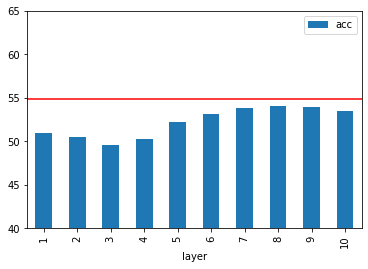

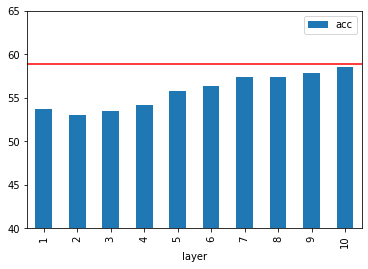

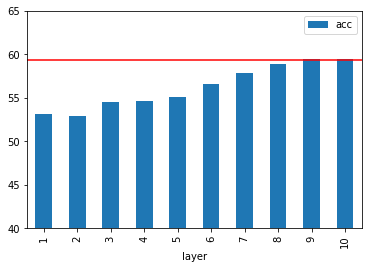

In [364]:
origin_performance = {10:54.86, 20:58.86, 30:59.33}
store_dict = {}
for k in [10, 20, 30]:
    temp_dataframe = {'layer':[], 'acc': []}
    for layer in [1,2,3,4,5,6,7,8,9,10]:
        mean_performance = result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)]['mnli-mm_test_eval_mnli-mm/acc'].mean() * 100
        temp_dataframe['layer'].append(layer)
        temp_dataframe['acc'].append(mean_performance)
    temp_dataframe = pd.DataFrame(temp_dataframe)
    store_dict[k] = temp_dataframe
    plot = temp_dataframe.plot(x="layer", y='acc', kind="bar", ylim=[40, 65])
    plot.axhline(y=origin_performance[k], color='r', linestyle='-')

In [181]:
result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]

Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, update_k_layers, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

In [198]:
 
    

result_list = []
task_list = ['CLUE_finetune_component_prompt_mnli']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'update_component',
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


60
{'mnli-mm_test_eval_mnli-mm/acc': 0.49523809523809526, 'mnli_test_eval_mnli/acc': 0.5262353540499236, 'update_component': 'attention', 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5333333333333333, 'mnli_test_eval_mnli/acc': 0.5657666836474784, 'update_component': 'attention', 'model_name_or_path': 'roberta-large', 'num_k': 10, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5523809523809524, 'mnli_test_eval_mnli/acc': 0.6091696383087112, 'update_component': 'attention', 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5047619047619047, 'mnli_test_eval_mnli/acc': 0.5328578706062149, 'update_component': 'attention', 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 5, 'num_train_epochs': 50.0, 'per

{'mnli-mm_test_eval_mnli-mm/acc': 0.5238095238095238, 'mnli_test_eval_mnli/acc': 0.5185939887926643, 'update_component': 'attention', 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 3, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6285714285714286, 'mnli_test_eval_mnli/acc': 0.6153846153846154, 'update_component': 'feedforward', 'model_name_or_path': 'roberta-large', 'num_k': 20, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5047619047619047, 'mnli_test_eval_mnli/acc': 0.5353031074885379, 'update_component': 'feedforward', 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.40476190476190477, 'mnli_test_eval_mnli/acc': 0.4553234844625573, 'update_component': 'feedforward', 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 5, 'num_train_epochs': 50.0, 'p

In [199]:
for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for update_component in ['feedforward', 'attention']:
     
            print("shot is {}, epoch is {}, update_component is {} and model name is {}".format(k, epoch, update_component, model))
            display(result_frame[(result_frame['update_component']==update_component)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


            print(round(result_frame[(result_frame['update_component']==update_component)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                  "("+str(round(result_frame[(result_frame['update_component']==update_component)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

            print(round(result_frame[(result_frame['update_component']==update_component)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                  "("+str(round(result_frame[(result_frame['update_component']==update_component)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

            print('')

shot is 10, epoch is 50, update_component is feedforward and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
13                       0.457143                 0.467753      feedforward   
15                       0.533333                 0.523688      feedforward   
27                       0.476190                 0.491696      feedforward   
35                       0.404762                 0.455323      feedforward   
56                       0.490476                 0.530107      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
13       roberta-base     10     2              50.0   
15       roberta-base     10     1              50.0   
27       roberta-base     10     3              50.0   
35       roberta-base     10     5              50.0   
56       roberta-base     10     4              50.0   

    per_device_train_batch_size  
13                            4  
15                            4  
27                            4  
35                            4  
56                            4

49.37 (3.31)
47.24 (4.71)

shot is 10, epoch is 50, update_component is attention and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
12                       0.461905                 0.481304        attention   
20                       0.457143                 0.496994        attention   
29                       0.480952                 0.517983        attention   
54                       0.528571                 0.517473        attention   
57                       0.457143                 0.468467        attention   

   model_name_or_path  num_k  seed  num_train_epochs  \
12       roberta-base     10     2              50.0   
20       roberta-base     10     3              50.0   
29       roberta-base     10     4              50.0   
54       roberta-base     10     1              50.0   
57       roberta-base     10     5              50.0   

    per_device_train_batch_size  
12                            4  
20                            4  
29                            4  
54                            4  
57                            4

49.64 (2.19)
47.71 (3.04)

shot is 20, epoch is 50, update_component is feedforward and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
5                        0.457143                 0.487927      feedforward   
16                       0.500000                 0.547326      feedforward   
22                       0.457143                 0.486296      feedforward   
34                       0.504762                 0.535303      feedforward   
46                       0.500000                 0.524809      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
5        roberta-base     20     1              50.0   
16       roberta-base     20     2              50.0   
22       roberta-base     20     4              50.0   
34       roberta-base     20     5              50.0   
46       roberta-base     20     3              50.0   

    per_device_train_batch_size  
5                             4  
16                            4  
22                            4  
34                            4  
46                            4

51.63 (2.78)
48.38 (2.44)

shot is 20, epoch is 50, update_component is attention and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
0                        0.495238                 0.526235        attention   
3                        0.504762                 0.532858        attention   
32                       0.523810                 0.518594        attention   
50                       0.452381                 0.488029        attention   
55                       0.461905                 0.489761        attention   

   model_name_or_path  num_k  seed  num_train_epochs  \
0        roberta-base     20     2              50.0   
3        roberta-base     20     5              50.0   
32       roberta-base     20     3              50.0   
50       roberta-base     20     4              50.0   
55       roberta-base     20     1              50.0   

    per_device_train_batch_size  
0                             4  
3                             4  
32                            4  
50                            4  
55                            4

51.11 (2.09)
48.76 (2.99)

shot is 30, epoch is 50, update_component is feedforward and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
9                        0.495238                 0.505756      feedforward   
14                       0.485714                 0.528171      feedforward   
31                       0.557143                 0.560367      feedforward   
51                       0.528571                 0.555273      feedforward   
53                       0.476190                 0.510443      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
9        roberta-base     30     1              50.0   
14       roberta-base     30     4              50.0   
31       roberta-base     30     2              50.0   
51       roberta-base     30     5              50.0   
53       roberta-base     30     3              50.0   

    per_device_train_batch_size  
9                             4  
14                            4  
31                            4  
51                            4  
53                            4

53.2 (2.51)
50.86 (3.36)

shot is 30, epoch is 50, update_component is attention and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
4                        0.490476                 0.526847        attention   
8                        0.538095                 0.551299        attention   
10                       0.485714                 0.505858        attention   
37                       0.514286                 0.549058        attention   
41                       0.514286                 0.512481        attention   

   model_name_or_path  num_k  seed  num_train_epochs  \
4        roberta-base     30     4              50.0   
8        roberta-base     30     2              50.0   
10       roberta-base     30     1              50.0   
37       roberta-base     30     5              50.0   
41       roberta-base     30     3              50.0   

    per_device_train_batch_size  
4                             4  
8                             4  
10                            4  
37                            4  
41                            4

52.91 (2.07)
50.86 (2.11)

shot is 10, epoch is 50, update_component is feedforward and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
6                        0.557143                 0.579929      feedforward   
18                       0.571429                 0.590117      feedforward   
30                       0.566667                 0.571472      feedforward   
52                       0.461905                 0.499745      feedforward   
58                       0.561905                 0.540194      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
6       roberta-large     10     3              50.0   
18      roberta-large     10     4              50.0   
30      roberta-large     10     1              50.0   
52      roberta-large     10     5              50.0   
58      roberta-large     10     2              50.0   

    per_device_train_batch_size  
6                             4  
18                            4  
30                            4  
52                            4  
58                            4

55.63 (3.67)
54.38 (4.61)

shot is 10, epoch is 50, update_component is attention and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
1                        0.533333                 0.565767        attention   
11                       0.561905                 0.571574        attention   
24                       0.447619                 0.500560        attention   
39                       0.557143                 0.582985        attention   
47                       0.533333                 0.542537        attention   

   model_name_or_path  num_k  seed  num_train_epochs  \
1       roberta-large     10     1              50.0   
11      roberta-large     10     3              50.0   
24      roberta-large     10     5              50.0   
39      roberta-large     10     4              50.0   
47      roberta-large     10     2              50.0   

    per_device_train_batch_size  
1                             4  
11                            4  
24                            4  
39                            4  
47                            4

55.27 (3.27)
52.67 (4.61)

shot is 20, epoch is 50, update_component is feedforward and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
17                       0.547619                 0.555273      feedforward   
23                       0.576190                 0.596740      feedforward   
33                       0.628571                 0.615385      feedforward   
36                       0.647619                 0.614264      feedforward   
45                       0.561905                 0.599694      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
17      roberta-large     20     1              50.0   
23      roberta-large     20     5              50.0   
33      roberta-large     20     2              50.0   
36      roberta-large     20     3              50.0   
45      roberta-large     20     4              50.0   

    per_device_train_batch_size  
17                            4  
23                            4  
33                            4  
36                            4  
45                            4

59.63 (2.44)
59.24 (4.35)

shot is 20, epoch is 50, update_component is attention and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
40                       0.538095                 0.550993        attention   
42                       0.580952                 0.606419        attention   
43                       0.561905                 0.594091        attention   
48                       0.547619                 0.582272        attention   
59                       0.614286                 0.616913        attention   

   model_name_or_path  num_k  seed  num_train_epochs  \
40      roberta-large     20     1              50.0   
42      roberta-large     20     2              50.0   
43      roberta-large     20     4              50.0   
48      roberta-large     20     5              50.0   
59      roberta-large     20     3              50.0   

    per_device_train_batch_size  
40                            4  
42                            4  
43                            4  
48                            4  
59                            4

59.01 (2.55)
56.86 (3.02)

shot is 30, epoch is 50, update_component is feedforward and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
7                        0.609524                 0.617422      feedforward   
25                       0.542857                 0.589506      feedforward   
28                       0.623810                 0.627916      feedforward   
38                       0.638095                 0.649822      feedforward   
44                       0.566667                 0.618136      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
7       roberta-large     30     3              50.0   
25      roberta-large     30     1              50.0   
28      roberta-large     30     4              50.0   
38      roberta-large     30     2              50.0   
44      roberta-large     30     5              50.0   

    per_device_train_batch_size  
7                             4  
25                            4  
28                            4  
38                            4  
44                            4

62.06 (2.17)
59.62 (4.0)

shot is 30, epoch is 50, update_component is attention and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
2                        0.552381                 0.609170        attention   
19                       0.595238                 0.612634        attention   
21                       0.542857                 0.581151        attention   
26                       0.604762                 0.640754        attention   
49                       0.600000                 0.620071        attention   

   model_name_or_path  num_k  seed  num_train_epochs  \
2       roberta-large     30     5              50.0   
19      roberta-large     30     4              50.0   
21      roberta-large     30     1              50.0   
26      roberta-large     30     2              50.0   
49      roberta-large     30     3              50.0   

    per_device_train_batch_size  
2                             4  
19                            4  
21                            4  
26                            4  
49                            4

61.28 (2.15)
57.9 (2.91)



In [213]:
 
    

result_list = []
task_list = ['CLUE_finetune_component_prompt_mnli']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'update_component',
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()
for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for update_component in ['feedforward', 'attention']:
     
            print("shot is {}, epoch is {}, update_component is {} and model name is {}".format(k, epoch, update_component, model))
            display(result_frame[(result_frame['update_component']==update_component)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


            print(round(result_frame[(result_frame['update_component']==update_component)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                  "("+str(round(result_frame[(result_frame['update_component']==update_component)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

            print(round(result_frame[(result_frame['update_component']==update_component)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                  "("+str(round(result_frame[(result_frame['update_component']==update_component)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

            print('')


90
{'mnli-mm_test_eval_mnli-mm/acc': 0.5142857142857142, 'mnli_test_eval_mnli/acc': 0.5210392256749873, 'update_component': 'feedforward', 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.46190476190476193, 'mnli_test_eval_mnli/acc': 0.4943453897096281, 'update_component': 'feedforward', 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4857142857142857, 'mnli_test_eval_mnli/acc': 0.5066734589913398, 'update_component': 'feedforward', 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4666666666666667, 'mnli_test_eval_mnli/acc': 0.4682628629648497, 'update_component': 'feedforward', 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 2, 'num_train_epochs': 50.0

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
0                        0.514286                 0.521039      feedforward   
3                        0.466667                 0.468263      feedforward   
6                        0.476190                 0.491594      feedforward   
9                        0.495238                 0.533877      feedforward   
12                       0.400000                 0.454712      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
0        roberta-base     10     1              50.0   
3        roberta-base     10     2              50.0   
6        roberta-base     10     3              50.0   
9        roberta-base     10     4              50.0   
12       roberta-base     10     5              50.0   

    per_device_train_batch_size  
0                             4  
3                             4  
6                             4  
9                             4  
12                            4

49.39 (3.37)
47.05 (4.34)

shot is 10, epoch is 50, update_component is attention and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, update_component, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, epoch is 50, update_component is feedforward and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
1                        0.461905                 0.494345      feedforward   
4                        0.490476                 0.543861      feedforward   
7                        0.500000                 0.522262      feedforward   
10                       0.447619                 0.484666      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
1        roberta-base     20     1              50.0   
4        roberta-base     20     2              50.0   
7        roberta-base     20     3              50.0   
10       roberta-base     20     4              50.0   

    per_device_train_batch_size  
1                             4  
4                             4  
7                             4  
10                            4

51.13 (2.69)
47.5 (2.44)

shot is 20, epoch is 50, update_component is attention and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, update_component, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, epoch is 50, update_component is feedforward and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
2                        0.485714                 0.506673      feedforward   
5                        0.552381                 0.563729      feedforward   
8                        0.490476                 0.510749      feedforward   
11                       0.500000                 0.528986      feedforward   
13                       0.519048                 0.553846      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
2        roberta-base     30     1              50.0   
5        roberta-base     30     2              50.0   
8        roberta-base     30     3              50.0   
11       roberta-base     30     4              50.0   
13       roberta-base     30     5              50.0   

    per_device_train_batch_size  
2                             4  
5                             4  
8                             4  
11                            4  
13                            4

53.28 (2.54)
50.95 (2.71)

shot is 30, epoch is 50, update_component is attention and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, update_component, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 10, epoch is 50, update_component is feedforward and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
14                       0.561905                 0.581966      feedforward   
16                       0.547619                 0.543148      feedforward   
19                       0.547619                 0.578910      feedforward   
22                       0.561905                 0.586144      feedforward   
25                       0.452381                 0.491900      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
14      roberta-large     10     1              50.0   
16      roberta-large     10     2              50.0   
19      roberta-large     10     3              50.0   
22      roberta-large     10     4              50.0   
25      roberta-large     10     5              50.0   

    per_device_train_batch_size  
14                            4  
16                            4  
19                            4  
22                            4  
25                            4

55.64 (3.99)
53.43 (4.63)

shot is 10, epoch is 50, update_component is attention and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, update_component, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, epoch is 50, update_component is feedforward and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
17                       0.604762                 0.614773      feedforward   
20                       0.638095                 0.616709      feedforward   
23                       0.580952                 0.608966      feedforward   
26                       0.566667                 0.593377      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
17      roberta-large     20     2              50.0   
20      roberta-large     20     3              50.0   
23      roberta-large     20     4              50.0   
26      roberta-large     20     5              50.0   

    per_device_train_batch_size  
17                            4  
20                            4  
23                            4  
26                            4

60.85 (1.06)
59.76 (3.12)

shot is 20, epoch is 50, update_component is attention and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, update_component, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, epoch is 50, update_component is feedforward and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc update_component  \
15                       0.547619                 0.588385      feedforward   
18                       0.623810                 0.648192      feedforward   
21                       0.609524                 0.614773      feedforward   
24                       0.614286                 0.621396      feedforward   
27                       0.585714                 0.621905      feedforward   

   model_name_or_path  num_k  seed  num_train_epochs  \
15      roberta-large     30     1              50.0   
18      roberta-large     30     2              50.0   
21      roberta-large     30     3              50.0   
24      roberta-large     30     4              50.0   
27      roberta-large     30     5              50.0   

    per_device_train_batch_size  
15                            4  
18                            4  
21                            4  
24                            4  
27                            4

61.89 (2.13)
59.62 (3.06)

shot is 30, epoch is 50, update_component is attention and model name is roberta-large


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, mnli_test_eval_mnli/acc, update_component, model_name_or_path, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)



In [206]:
 
    

result_list = []
task_list = ['CLUE_finetune_last_k_prompt_mnli_feedforward']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'update_k_layers',
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()

for model in ['roberta', la 'roberta-large']:
    for k in [10, 20, 30]:
        for layer in [7,8,9,10]:
     
            print("shot is {}, epoch is {}, layer is {} and model name is {}".format(k, epoch, layer, model))
            display(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


            print(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                  "("+str(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

            print(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                  "("+str(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

            print('')

60
{'mnli-mm_test_eval_mnli-mm/acc': 0.6333333333333333, 'mnli_test_eval_mnli/acc': 0.6191543555781966, 'update_k_layers': 7, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5714285714285714, 'mnli_test_eval_mnli/acc': 0.5759551706571574, 'update_k_layers': 9, 'model_name_or_path': 'roberta-large', 'num_k': 10, 'seed': 3, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6238095238095238, 'mnli_test_eval_mnli/acc': 0.6011207335710647, 'update_k_layers': 9, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'seed': 3, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5666666666666667, 'mnli_test_eval_mnli/acc': 0.5905247070809985, 'update_k_layers': 9, 'model_name_or_path': 'roberta-large', 'num_k': 10, 'seed': 4, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_tes

{'mnli-mm_test_eval_mnli-mm/acc': 0.580952380952381, 'mnli_test_eval_mnli/acc': 0.6005094243504839, 'update_k_layers': 10, 'model_name_or_path': 'roberta-large', 'num_k': 20, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5857142857142857, 'mnli_test_eval_mnli/acc': 0.6044829342842588, 'update_k_layers': 7, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5904761904761905, 'mnli_test_eval_mnli/acc': 0.6111054508405501, 'update_k_layers': 8, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 5, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
shot is 10, epoch is 50, layer is 7 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
10                       0.466667                 0.506164                7   
22                       0.552381                 0.539480                7   
25                       0.538095                 0.569536                7   

   model_name_or_path  num_k  seed  num_train_epochs  \
10      roberta-large     10     5              50.0   
22      roberta-large     10     2              50.0   
25      roberta-large     10     3              50.0   

    per_device_train_batch_size  
10                            4  
22                            4  
25                            4

53.84 (3.17)
51.9 (4.59)

shot is 10, epoch is 50, layer is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
11                       0.552381                 0.546918                8   
29                       0.571429                 0.590627                8   

   model_name_or_path  num_k  seed  num_train_epochs  \
11      roberta-large     10     2              50.0   
29      roberta-large     10     4              50.0   

    per_device_train_batch_size  
11                            4  
29                            4

56.88 (3.09)
56.19 (1.35)

shot is 10, epoch is 50, layer is 9 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
1                        0.571429                 0.575955                9   
3                        0.566667                 0.590525                9   
8                        0.557143                 0.553439                9   
19                       0.538095                 0.565869                9   
33                       0.480952                 0.511870                9   

   model_name_or_path  num_k  seed  num_train_epochs  \
1       roberta-large     10     3              50.0   
3       roberta-large     10     4              50.0   
8       roberta-large     10     2              50.0   
19      roberta-large     10     1              50.0   
33      roberta-large     10     5              50.0   

    per_device_train_batch_size  
1                             4  
3                             4  
8                             4  
19                            4  
33                            4

55.95 (2.99)
54.29 (3.69)

shot is 10, epoch is 50, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
5                        0.561905                 0.589302               10   
32                       0.476190                 0.509730               10   

   model_name_or_path  num_k  seed  num_train_epochs  \
5       roberta-large     10     4              50.0   
32      roberta-large     10     5              50.0   

    per_device_train_batch_size  
5                             4  
32                            4

54.95 (5.63)
51.9 (6.06)

shot is 20, epoch is 50, layer is 7 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
4                        0.576190                 0.586857                7   
7                        0.514286                 0.529292                7   
14                       0.533333                 0.541620                7   
17                       0.609524                 0.598981                7   

   model_name_or_path  num_k  seed  num_train_epochs  \
4       roberta-large     20     5              50.0   
7       roberta-large     20     1              50.0   
14      roberta-large     20     4              50.0   
17      roberta-large     20     2              50.0   

    per_device_train_batch_size  
4                             4  
7                             4  
14                            4  
17                            4

56.42 (3.39)
55.83 (4.28)

shot is 20, epoch is 50, layer is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
12                       0.576190                 0.596332                8   
15                       0.638095                 0.598777                8   
20                       0.523810                 0.539073                8   
30                       0.523810                 0.556088                8   

   model_name_or_path  num_k  seed  num_train_epochs  \
12      roberta-large     20     5              50.0   
15      roberta-large     20     3              50.0   
20      roberta-large     20     1              50.0   
30      roberta-large     20     4              50.0   

    per_device_train_batch_size  
12                            4  
15                            4  
20                            4  
30                            4

57.26 (2.97)
56.55 (5.43)

shot is 20, epoch is 50, layer is 9 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
2                        0.623810                 0.601121                9   
9                        0.590476                 0.615487                9   
16                       0.561905                 0.598981                9   

   model_name_or_path  num_k  seed  num_train_epochs  \
2       roberta-large     20     3              50.0   
9       roberta-large     20     2              50.0   
16      roberta-large     20     5              50.0   

    per_device_train_batch_size  
2                             4  
9                             4  
16                            4

60.52 (0.9)
59.21 (3.1)

shot is 20, epoch is 50, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
23                       0.585714                 0.617728               10   
26                       0.633333                 0.601426               10   
34                       0.580952                 0.600509               10   

   model_name_or_path  num_k  seed  num_train_epochs  \
23      roberta-large     20     2              50.0   
26      roberta-large     20     3              50.0   
34      roberta-large     20     5              50.0   

    per_device_train_batch_size  
23                            4  
26                            4  
34                            4

60.66 (0.97)
60.0 (2.9)

shot is 30, epoch is 50, layer is 7 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
0                        0.633333                 0.619154                7   
6                        0.566667                 0.575038                7   
27                       0.585714                 0.591951                7   
35                       0.585714                 0.604483                7   

   model_name_or_path  num_k  seed  num_train_epochs  \
0       roberta-large     30     2              50.0   
6       roberta-large     30     4              50.0   
27      roberta-large     30     3              50.0   
35      roberta-large     30     5              50.0   

    per_device_train_batch_size  
0                             4  
6                             4  
27                            4  
35                            4

59.77 (1.87)
59.29 (2.84)

shot is 30, epoch is 50, layer is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
13                       0.571429                 0.589200                8   
18                       0.638095                 0.630260                8   
36                       0.590476                 0.611105                8   

   model_name_or_path  num_k  seed  num_train_epochs  \
13      roberta-large     30     4              50.0   
18      roberta-large     30     2              50.0   
36      roberta-large     30     5              50.0   

    per_device_train_batch_size  
13                            4  
18                            4  
36                            4

61.02 (2.05)
60.0 (3.43)

shot is 30, epoch is 50, layer is 9 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
28                       0.595238                 0.602445                9   

   model_name_or_path  num_k  seed  num_train_epochs  \
28      roberta-large     30     3              50.0   

    per_device_train_batch_size  
28                            4

60.24 (nan)
59.52 (nan)

shot is 30, epoch is 50, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
21                       0.538095                 0.564646               10   
24                       0.652381                 0.642894               10   
31                       0.600000                 0.622109               10   

   model_name_or_path  num_k  seed  num_train_epochs  \
21      roberta-large     30     1              50.0   
24      roberta-large     30     2              50.0   
31      roberta-large     30     4              50.0   

    per_device_train_batch_size  
21                            4  
24                            4  
31                            4

60.99 (4.05)
59.68 (5.72)



In [212]:

 
    

result_list = []
task_list = ['CLUE_finetune_component_prompt_mnli_output']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()

for model in [ 'roberta-large']:
    for k in [10, 20, 30]:


        print("shot is {}, epoch is {}, layer is {} and model name is {}".format(k, epoch, layer, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

60
{'mnli-mm_test_eval_mnli-mm/acc': 0.5333333333333333, 'mnli_test_eval_mnli/acc': 0.5184921039225675, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4523809523809524, 'mnli_test_eval_mnli/acc': 0.5024961793173713, 'model_name_or_path': 'roberta-base', 'num_k': 20, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.45714285714285713, 'mnli_test_eval_mnli/acc': 0.5015792154865003, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 1, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4714285714285714, 'mnli_test_eval_mnli/acc': 0.4708099847172695, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 2, 'num_train_epochs': 50.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49523809523809526, 'mnli_test_eval_mnli/acc': 0.5377483443708609, 'm

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
14                       0.557143                 0.575038      roberta-large   
17                       0.542857                 0.551197      roberta-large   
20                       0.552381                 0.577483      roberta-large   
23                       0.571429                 0.591238      roberta-large   
26                       0.466667                 0.510953      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
14     10     1              50.0                            4  
17     10     2              50.0                            4  
20     10     3              50.0                            4  
23     10     4              50.0                            4  
26     10     5              50.0                            4

56.12 (3.16)
53.81 (4.12)

shot is 20, epoch is 50, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
15                       0.538095                 0.564340      roberta-large   
18                       0.595238                 0.614468      roberta-large   
21                       0.642857                 0.618136      roberta-large   
24                       0.585714                 0.620173      roberta-large   
27                       0.557143                 0.592868      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
15     20     1              50.0                            4  
18     20     2              50.0                            4  
21     20     3              50.0                            4  
24     20     4              50.0                            4  
27     20     5              50.0                            4

60.2 (2.37)
58.38 (4.01)

shot is 30, epoch is 50, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
16                       0.533333                 0.580234      roberta-large   
19                       0.628571                 0.647376      roberta-large   
22                       0.609524                 0.619562      roberta-large   
25                       0.623810                 0.629648      roberta-large   
28                       0.566667                 0.625981      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
16     30     1              50.0                            4  
19     30     2              50.0                            4  
22     30     3              50.0                            4  
25     30     4              50.0                            4  
28     30     5              50.0                            4

62.06 (2.48)
59.24 (4.1)



In [359]:

 
    

result_list = []
task_list = ['CLUE_finetune_component_prompt_mnli_intermediate']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()

for model in [ 'roberta-large']:
    for k in [10, 20, 30]:


        print("shot is {}, epoch is {}, layer is {} and model name is {}".format(k, epoch, layer, model))
        display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

        print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
              "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

        print('')

30
shot is 10, epoch is 100, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
3                        0.528571                 0.546307      roberta-large   
16                       0.519048                 0.561182      roberta-large   
22                       0.528571                 0.572695      roberta-large   
26                       0.561905                 0.577687      roberta-large   
28                       0.438095                 0.499847      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
3      10     2              50.0                            4  
16     10     3              50.0                            4  
22     10     1              50.0                            4  
26     10     4              50.0                            4  
28     10     5              50.0                            4

55.15 (3.13)
51.52 (4.61)

shot is 20, epoch is 100, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
0                        0.561905                 0.584921      roberta-large   
9                        0.580952                 0.608049      roberta-large   
23                       0.528571                 0.550891      roberta-large   
24                       0.552381                 0.582578      roberta-large   
27                       0.542857                 0.580031      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
0      20     5              50.0                            4  
9      20     3              50.0                            4  
23     20     1              50.0                            4  
24     20     2              50.0                            4  
27     20     4              50.0                            4

58.13 (2.04)
55.33 (1.97)

shot is 30, epoch is 100, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc model_name_or_path  \
4                        0.576190                 0.602241      roberta-large   
8                        0.580952                 0.626184      roberta-large   
14                       0.542857                 0.575446      roberta-large   
25                       0.590476                 0.606011      roberta-large   
29                       0.580952                 0.610188      roberta-large   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
4      30     4              50.0                            4  
8      30     2              50.0                            4  
14     30     1              50.0                            4  
25     30     3              50.0                            4  
29     30     5              50.0                            4

60.4 (1.84)
57.43 (1.83)



In [371]:


 
    

result_list = []
task_list = ['CLUE_finetune_last_k_prompt_mnli_feedforward_output']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'update_k_layers',
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()

for model in [ 'roberta-large']:
    for k in [10, 20, 30]:
        for layer in [7,8,9,10]:
     
            print("shot is {}, epoch is {}, layer is {} and model name is {}".format(k, epoch, layer, model))
            display(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


            print(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                  "("+str(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

            print(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                  "("+str(round(result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

            print('')

120
shot is 10, epoch is 100, layer is 7 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
10                       0.557143                 0.584819                7   
31                       0.566667                 0.541009                7   
33                       0.538095                 0.565563                7   
46                       0.466667                 0.510239                7   
49                       0.538095                 0.540805                7   

   model_name_or_path  num_k  seed  num_train_epochs  \
10      roberta-large     10     4              50.0   
31      roberta-large     10     2              50.0   
33      roberta-large     10     3              50.0   
46      roberta-large     10     5              50.0   
49      roberta-large     10     1              50.0   

    per_device_train_batch_size  
10                            4  
31                            4  
33                            4  
46                            4  
49                            4

54.85 (2.82)
53.33 (3.93)

shot is 10, epoch is 100, layer is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
2                        0.552381                 0.588589                8   
4                        0.480952                 0.515436                8   
19                       0.542857                 0.569842                8   
38                       0.571429                 0.547122                8   
56                       0.523810                 0.549771                8   

   model_name_or_path  num_k  seed  num_train_epochs  \
2       roberta-large     10     4              50.0   
4       roberta-large     10     5              50.0   
19      roberta-large     10     3              50.0   
38      roberta-large     10     2              50.0   
56      roberta-large     10     1              50.0   

    per_device_train_batch_size  
2                             4  
4                             4  
19                            4  
38                            4  
56                            4

55.42 (2.74)
53.43 (3.44)

shot is 10, epoch is 100, layer is 9 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
5                        0.566667                 0.554457                9   
8                        0.566667                 0.574834                9   
18                       0.528571                 0.555476                9   
43                       0.571429                 0.595008                9   
48                       0.480952                 0.515537                9   

   model_name_or_path  num_k  seed  num_train_epochs  \
5       roberta-large     10     2              50.0   
8       roberta-large     10     3              50.0   
18      roberta-large     10     1              50.0   
43      roberta-large     10     4              50.0   
48      roberta-large     10     5              50.0   

    per_device_train_batch_size  
5                             4  
8                             4  
18                            4  
43                            4  
48                            4

55.91 (2.95)
54.29 (3.87)

shot is 10, epoch is 100, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
32                       0.490476                 0.520428               10   
34                       0.566667                 0.579317               10   
37                       0.561905                 0.559348               10   
53                       0.528571                 0.558635               10   
57                       0.571429                 0.596026               10   

   model_name_or_path  num_k  seed  num_train_epochs  \
32      roberta-large     10     5              50.0   
34      roberta-large     10     3              50.0   
37      roberta-large     10     2              50.0   
53      roberta-large     10     1              50.0   
57      roberta-large     10     4              50.0   

    per_device_train_batch_size  
32                            4  
34                            4  
37                            4  
53                            4  
57                            4

56.28 (2.83)
54.38 (3.42)

shot is 20, epoch is 100, layer is 7 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
12                       0.623810                 0.591951                7   
13                       0.590476                 0.583495                7   
16                       0.561905                 0.576261                7   
29                       0.533333                 0.540194                7   
50                       0.528571                 0.530311                7   

   model_name_or_path  num_k  seed  num_train_epochs  \
12      roberta-large     20     3              50.0   
13      roberta-large     20     2              50.0   
16      roberta-large     20     5              50.0   
29      roberta-large     20     4              50.0   
50      roberta-large     20     1              50.0   

    per_device_train_batch_size  
12                            4  
13                            4  
16                            4  
29                            4  
50                            4

56.44 (2.74)
56.76 (4.0)

shot is 20, epoch is 100, layer is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
14                       0.585714                 0.598472                8   
21                       0.528571                 0.542944                8   
47                       0.538095                 0.557820                8   
52                       0.623810                 0.594091                8   
54                       0.580952                 0.587468                8   

   model_name_or_path  num_k  seed  num_train_epochs  \
14      roberta-large     20     2              50.0   
21      roberta-large     20     1              50.0   
47      roberta-large     20     4              50.0   
52      roberta-large     20     3              50.0   
54      roberta-large     20     5              50.0   

    per_device_train_batch_size  
14                            4  
21                            4  
47                            4  
52                            4  
54                            4

57.62 (2.44)
57.14 (3.87)

shot is 20, epoch is 100, layer is 9 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
3                        0.619048                 0.598981                9   
6                        0.580952                 0.592257                9   
36                       0.528571                 0.552216                9   
40                       0.547619                 0.576974                9   
45                       0.585714                 0.608049                9   

   model_name_or_path  num_k  seed  num_train_epochs  \
3       roberta-large     20     3              50.0   
6       roberta-large     20     5              50.0   
36      roberta-large     20     1              50.0   
40      roberta-large     20     4              50.0   
45      roberta-large     20     2              50.0   

    per_device_train_batch_size  
3                             4  
6                             4  
36                            4  
40                            4  
45                            4

58.57 (2.19)
57.24 (3.52)

shot is 20, epoch is 100, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
1                        0.557143                 0.590423               10   
11                       0.628571                 0.602241               10   
22                       0.604762                 0.611411               10   
51                       0.576190                 0.599389               10   
59                       0.533333                 0.558023               10   

   model_name_or_path  num_k  seed  num_train_epochs  \
1       roberta-large     20     4              50.0   
11      roberta-large     20     3              50.0   
22      roberta-large     20     2              50.0   
51      roberta-large     20     5              50.0   
59      roberta-large     20     1              50.0   

    per_device_train_batch_size  
1                             4  
11                            4  
22                            4  
51                            4  
59                            4

59.23 (2.06)
58.0 (3.77)

shot is 30, epoch is 100, layer is 7 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
7                        0.619048                 0.602343                7   
27                       0.557143                 0.575140                7   
35                       0.585714                 0.588385                7   
39                       0.566667                 0.594396                7   
58                       0.533333                 0.530616                7   

   model_name_or_path  num_k  seed  num_train_epochs  \
7       roberta-large     30     2              50.0   
27      roberta-large     30     4              50.0   
35      roberta-large     30     3              50.0   
39      roberta-large     30     5              50.0   
58      roberta-large     30     1              50.0   

    per_device_train_batch_size  
7                             4  
27                            4  
35                            4  
39                            4  
58                            4

57.82 (2.84)
57.24 (3.22)

shot is 30, epoch is 100, layer is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
20                       0.528571                 0.542028                8   
24                       0.590476                 0.594091                8   
28                       0.576190                 0.590932                8   
42                       0.647619                 0.617320                8   
44                       0.585714                 0.610698                8   

   model_name_or_path  num_k  seed  num_train_epochs  \
20      roberta-large     30     1              50.0   
24      roberta-large     30     3              50.0   
28      roberta-large     30     4              50.0   
42      roberta-large     30     2              50.0   
44      roberta-large     30     5              50.0   

    per_device_train_batch_size  
20                            4  
24                            4  
28                            4  
42                            4  
44                            4

59.1 (2.95)
58.57 (4.25)

shot is 30, epoch is 100, layer is 9 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
0                        0.509524                 0.547529                9   
23                       0.671429                 0.625471                9   
25                       0.590476                 0.603770                9   
30                       0.590476                 0.620785                9   
55                       0.595238                 0.597962                9   

   model_name_or_path  num_k  seed  num_train_epochs  \
0       roberta-large     30     1              50.0   
23      roberta-large     30     2              50.0   
25      roberta-large     30     4              50.0   
30      roberta-large     30     5              50.0   
55      roberta-large     30     3              50.0   

    per_device_train_batch_size  
0                             4  
23                            4  
25                            4  
30                            4  
55                            4

59.91 (3.1)
59.14 (5.73)

shot is 30, epoch is 100, layer is 10 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  update_k_layers  \
9                        0.657143                 0.632094               10   
15                       0.600000                 0.600815               10   
17                       0.595238                 0.614977               10   
26                       0.514286                 0.558737               10   
41                       0.600000                 0.625166               10   

   model_name_or_path  num_k  seed  num_train_epochs  \
9       roberta-large     30     2              50.0   
15      roberta-large     30     3              50.0   
17      roberta-large     30     4              50.0   
26      roberta-large     30     1              50.0   
41      roberta-large     30     5              50.0   

    per_device_train_batch_size  
9                             4  
15                            4  
17                            4  
26                            4  
41                            4

60.64 (2.91)
59.33 (5.1)



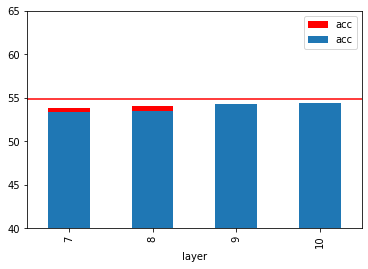

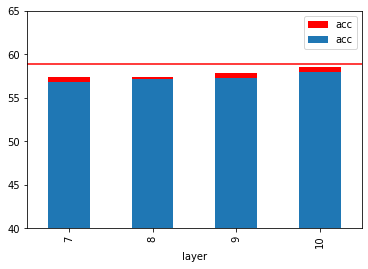

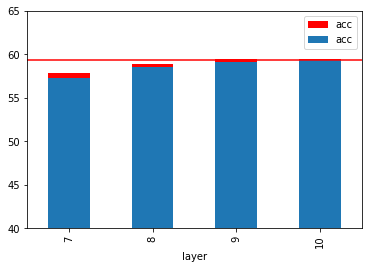

In [372]:
origin_performance = {10:54.86, 20:58.86, 30:59.33}
for k in [10, 20, 30]:
    temp_dataframe = {'layer':[], 'acc': []}
    for layer in [7,8,9,10]:
        mean_performance = result_frame[(result_frame['update_k_layers']==layer)&(result_frame['num_k']==k)]['mnli-mm_test_eval_mnli-mm/acc'].mean() * 100
        temp_dataframe['layer'].append(layer)
        temp_dataframe['acc'].append(mean_performance)
    temp_dataframe = pd.DataFrame(temp_dataframe)
    new_pd = store_dict[k]
    new_pd = new_pd[new_pd['layer']>6]
    plot = new_pd.plot( x="layer", y='acc', kind="bar", ylim=[40, 65], color='r')
    temp_dataframe.plot(ax=plot, x="layer", y='acc', kind="bar", ylim=[40, 65])
    plot.axhline(y=origin_performance[k], color='r', linestyle='-')

In [215]:

 
    

result_list = []
task_list = ['CLUE_finetune_adapter_prompt_mnli', 'CLUE_finetune_adapter_prompt_mnli_more_epochs']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'adapter_dim',
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()

for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for epoch in [100, 200, 300, 400]:
            for adapter_dim in [64, 128]:
     
                print("shot is {}, epoch is {}, layer is {} and model name is {}".format(k, epoch, adapter_dim, model))
                display(result_frame[(result_frame['num_train_epochs']==epoch)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['num_train_epochs']==epoch)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_train_epochs']==epoch)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['num_train_epochs']==epoch)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_train_epochs']==epoch)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

                print('')

120
{'mnli-mm_test_eval_mnli-mm/acc': 0.5, 'mnli_test_eval_mnli/acc': 0.49403973509933774, 'adapter_dim': 64, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 1, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5095238095238095, 'mnli_test_eval_mnli/acc': 0.5012735608762099, 'adapter_dim': 128, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 1, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49523809523809526, 'mnli_test_eval_mnli/acc': 0.5032093734080489, 'adapter_dim': 64, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 1, 'num_train_epochs': 200.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5047619047619047, 'mnli_test_eval_mnli/acc': 0.5108507386653082, 'adapter_dim': 128, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 1, 'num_train_epochs': 200.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0

{'mnli-mm_test_eval_mnli-mm/acc': 0.49047619047619045, 'mnli_test_eval_mnli/acc': 0.5054508405501783, 'adapter_dim': 128, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 3, 'num_train_epochs': 200.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.4857142857142857, 'mnli_test_eval_mnli/acc': 0.5032093734080489, 'adapter_dim': 64, 'model_name_or_path': 'roberta-base', 'num_k': 30, 'seed': 3, 'num_train_epochs': 200.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5047619047619047, 'mnli_test_eval_mnli/acc': 0.5080998471726949, 'adapter_dim': 64, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 4, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.49047619047619045, 'mnli_test_eval_mnli/acc': 0.5101375445746307, 'adapter_dim': 128, 'model_name_or_path': 'roberta-base', 'num_k': 10, 'seed': 4, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli

{'mnli-mm_test_eval_mnli-mm/acc': 0.5238095238095238, 'mnli_test_eval_mnli/acc': 0.564951604686704, 'adapter_dim': 128, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 1, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5190476190476191, 'mnli_test_eval_mnli/acc': 0.5488537952114111, 'adapter_dim': 64, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 1, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5476190476190477, 'mnli_test_eval_mnli/acc': 0.574732552215996, 'adapter_dim': 128, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 1, 'num_train_epochs': 200.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5523809523809524, 'mnli_test_eval_mnli/acc': 0.5764645950076414, 'adapter_dim': 64, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 1, 'num_train_epochs': 200.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli

{'mnli-mm_test_eval_mnli-mm/acc': 0.5761904761904761, 'mnli_test_eval_mnli/acc': 0.5972491085073867, 'adapter_dim': 128, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 4, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5428571428571428, 'mnli_test_eval_mnli/acc': 0.5708609271523178, 'adapter_dim': 64, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 4, 'num_train_epochs': 100.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5761904761904761, 'mnli_test_eval_mnli/acc': 0.6143657666836475, 'adapter_dim': 128, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 4, 'num_train_epochs': 200.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.5761904761904761, 'mnli_test_eval_mnli/acc': 0.6023433520122262, 'adapter_dim': 64, 'model_name_or_path': 'roberta-large', 'num_k': 30, 'seed': 4, 'num_train_epochs': 200.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mn

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
0                        0.500000                 0.494040           64   
13                       0.466667                 0.485481           64   
25                       0.466667                 0.486195           64   
36                       0.504762                 0.508100           64   
48                       0.390476                 0.447784           64   

   model_name_or_path  num_k  seed  num_train_epochs  \
0        roberta-base     10     1             100.0   
13       roberta-base     10     2             100.0   
25       roberta-base     10     3             100.0   
36       roberta-base     10     4             100.0   
48       roberta-base     10     5             100.0   

    per_device_train_batch_size  
0                             4  
13                            4  
25                            4  
36                            4  
48                            4

48.43 (2.24)
47.0 (4.57)

shot is 10, epoch is 100, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
1                        0.509524                 0.501274          128   
12                       0.490476                 0.482221          128   
24                       0.480952                 0.487621          128   
37                       0.490476                 0.510138          128   
49                       0.400000                 0.460418          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
1        roberta-base     10     1             100.0   
12       roberta-base     10     2             100.0   
24       roberta-base     10     3             100.0   
37       roberta-base     10     4             100.0   
49       roberta-base     10     5             100.0   

    per_device_train_batch_size  
1                             4  
12                            4  
24                            4  
37                            4  
49                            4

48.83 (1.91)
47.0 (4.28)

shot is 10, epoch is 200, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
2                        0.495238                 0.503209           64   
14                       0.476190                 0.478451           64   
26                       0.442857                 0.482221           64   
39                       0.495238                 0.516454           64   
51                       0.390476                 0.447580           64   

   model_name_or_path  num_k  seed  num_train_epochs  \
2        roberta-base     10     1             200.0   
14       roberta-base     10     2             200.0   
26       roberta-base     10     3             200.0   
39       roberta-base     10     4             200.0   
51       roberta-base     10     5             200.0   

    per_device_train_batch_size  
2                             4  
14                            4  
26                            4  
39                            4  
51                            4

48.56 (2.63)
46.57 (4.44)

shot is 10, epoch is 200, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
3                        0.504762                 0.510851          128   
15                       0.471429                 0.472134          128   
27                       0.471429                 0.485176          128   
38                       0.490476                 0.521651          128   
50                       0.419048                 0.468467          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
3        roberta-base     10     1             200.0   
15       roberta-base     10     2             200.0   
27       roberta-base     10     3             200.0   
38       roberta-base     10     4             200.0   
50       roberta-base     10     5             200.0   

    per_device_train_batch_size  
3                             4  
15                            4  
27                            4  
38                            4  
50                            4

49.17 (2.36)
46.57 (3.25)

shot is 20, epoch is 100, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
5                        0.447619                 0.472746           64   
16                       0.495238                 0.495568           64   
29                       0.528571                 0.510953           64   
41                       0.480952                 0.477636           64   
52                       0.466667                 0.504024           64   

   model_name_or_path  num_k  seed  num_train_epochs  \
5        roberta-base     20     1             100.0   
16       roberta-base     20     2             100.0   
29       roberta-base     20     3             100.0   
41       roberta-base     20     4             100.0   
52       roberta-base     20     5             100.0   

    per_device_train_batch_size  
5                             4  
16                            4  
29                            4  
41                            4  
52                            4

49.22 (1.65)
48.48 (3.06)

shot is 20, epoch is 100, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
4                        0.452381                 0.484768          128   
17                       0.514286                 0.507183          128   
28                       0.519048                 0.513296          128   
40                       0.447619                 0.469384          128   
53                       0.495238                 0.517269          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
4        roberta-base     20     1             100.0   
17       roberta-base     20     2             100.0   
28       roberta-base     20     3             100.0   
40       roberta-base     20     4             100.0   
53       roberta-base     20     5             100.0   

    per_device_train_batch_size  
4                             4  
17                            4  
28                            4  
40                            4  
53                            4

49.84 (2.05)
48.48 (3.38)

shot is 20, epoch is 200, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
6                        0.438095                 0.479980           64   
18                       0.504762                 0.508813           64   
31                       0.509524                 0.510647           64   
42                       0.461905                 0.476516           64   
54                       0.476190                 0.518288           64   

   model_name_or_path  num_k  seed  num_train_epochs  \
6        roberta-base     20     1             200.0   
18       roberta-base     20     2             200.0   
31       roberta-base     20     3             200.0   
42       roberta-base     20     4             200.0   
54       roberta-base     20     5             200.0   

    per_device_train_batch_size  
6                             4  
18                            4  
31                            4  
42                            4  
54                            4

49.88 (1.92)
48.0 (2.99)

shot is 20, epoch is 200, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
7                        0.442857                 0.486296          128   
19                       0.533333                 0.530311          128   
30                       0.500000                 0.511768          128   
43                       0.428571                 0.472338          128   
55                       0.504762                 0.537646          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
7        roberta-base     20     1             200.0   
19       roberta-base     20     2             200.0   
30       roberta-base     20     3             200.0   
43       roberta-base     20     4             200.0   
55       roberta-base     20     5             200.0   

    per_device_train_batch_size  
7                             4  
19                            4  
30                            4  
43                            4  
55                            4

50.77 (2.8)
48.0 (4.43)

shot is 30, epoch is 100, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
9                        0.452381                 0.490270           64   
20                       0.514286                 0.513194           64   
32                       0.500000                 0.504126           64   
45                       0.480952                 0.493021           64   
57                       0.509524                 0.515741           64   

   model_name_or_path  num_k  seed  num_train_epochs  \
9        roberta-base     30     1             100.0   
20       roberta-base     30     2             100.0   
32       roberta-base     30     3             100.0   
45       roberta-base     30     4             100.0   
57       roberta-base     30     5             100.0   

    per_device_train_batch_size  
9                             4  
20                            4  
32                            4  
45                            4  
57                            4

50.33 (1.15)
49.71 (2.53)

shot is 30, epoch is 100, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
8                        0.461905                 0.494651          128   
21                       0.542857                 0.531228          128   
33                       0.500000                 0.507692          128   
44                       0.480952                 0.500560          128   
56                       0.528571                 0.538360          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
8        roberta-base     30     1             100.0   
21       roberta-base     30     2             100.0   
33       roberta-base     30     3             100.0   
44       roberta-base     30     4             100.0   
56       roberta-base     30     5             100.0   

    per_device_train_batch_size  
8                             4  
21                            4  
33                            4  
44                            4  
56                            4

51.45 (1.93)
49.71 (3.33)

shot is 30, epoch is 200, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
10                       0.461905                 0.492919           64   
22                       0.523810                 0.536933           64   
35                       0.485714                 0.503209           64   
46                       0.476190                 0.502394           64   
58                       0.495238                 0.533062           64   

   model_name_or_path  num_k  seed  num_train_epochs  \
10       roberta-base     30     1             200.0   
22       roberta-base     30     2             200.0   
35       roberta-base     30     3             200.0   
46       roberta-base     30     4             200.0   
58       roberta-base     30     5             200.0   

    per_device_train_batch_size  
10                            4  
22                            4  
35                            4  
46                            4  
58                            4

51.37 (1.99)
49.33 (2.32)

shot is 30, epoch is 200, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
11                       0.457143                 0.496689          128   
23                       0.557143                 0.555069          128   
34                       0.490476                 0.505451          128   
47                       0.466667                 0.507081          128   
59                       0.519048                 0.555578          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
11       roberta-base     30     1             200.0   
23       roberta-base     30     2             200.0   
34       roberta-base     30     3             200.0   
47       roberta-base     30     4             200.0   
59       roberta-base     30     5             200.0   

    per_device_train_batch_size  
11                            4  
23                            4  
34                            4  
47                            4  
59                            4

52.4 (2.89)
49.33 (4.08)

shot is 10, epoch is 100, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
61                        0.523810                 0.544880           64   
73                        0.533333                 0.544269           64   
84                        0.528571                 0.555884           64   
95                        0.538095                 0.561182           64   
107                       0.438095                 0.496689           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
61       roberta-large     10     1             100.0   
73       roberta-large     10     2             100.0   
84       roberta-large     10     3             100.0   
95       roberta-large     10     4             100.0   
107      roberta-large     10     5             100.0   

     per_device_train_batch_size  
61                             4  
73                             4  
84                             4  
95                             4  
107                            4

54.06 (2.56)
51.86 (4.19)

shot is 10, epoch is 100, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
60                        0.519048                 0.551503          128   
72                        0.561905                 0.536322          128   
85                        0.538095                 0.557514          128   
96                        0.547619                 0.572389          128   
106                       0.457143                 0.504432          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
60       roberta-large     10     1             100.0   
72       roberta-large     10     2             100.0   
85       roberta-large     10     3             100.0   
96       roberta-large     10     4             100.0   
106      roberta-large     10     5             100.0   

     per_device_train_batch_size  
60                             4  
72                             4  
85                             4  
96                             4  
106                            4

54.44 (2.58)
51.86 (4.09)

shot is 10, epoch is 200, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
63                        0.519048                 0.559144           64   
74                        0.552381                 0.549975           64   
86                        0.547619                 0.573204           64   
97                        0.557143                 0.580132           64   
108                       0.452381                 0.503413           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
63       roberta-large     10     1             200.0   
74       roberta-large     10     2             200.0   
86       roberta-large     10     3             200.0   
97       roberta-large     10     4             200.0   
108      roberta-large     10     5             200.0   

     per_device_train_batch_size  
63                             4  
74                             4  
86                             4  
97                             4  
108                            4

55.32 (3.02)
52.65 (4.36)

shot is 10, epoch is 200, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
62                        0.538095                 0.570861          128   
75                        0.566667                 0.547937          128   
87                        0.552381                 0.568314          128   
109                       0.452381                 0.506062          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
62       roberta-large     10     1             200.0   
75       roberta-large     10     2             200.0   
87       roberta-large     10     3             200.0   
109      roberta-large     10     5             200.0   

     per_device_train_batch_size  
62                             4  
75                             4  
87                             4  
109                            4

54.83 (3.0)
52.65 (5.13)

shot is 20, epoch is 100, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
65                        0.519048                 0.532858           64   
76                        0.547619                 0.564035           64   
88                        0.576190                 0.589404           64   
99                        0.523810                 0.544880           64   
110                       0.557143                 0.559246           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
65       roberta-large     20     1             100.0   
76       roberta-large     20     2             100.0   
88       roberta-large     20     3             100.0   
99       roberta-large     20     4             100.0   
110      roberta-large     20     5             100.0   

     per_device_train_batch_size  
65                             4  
76                             4  
88                             4  
99                             4  
110                            4

55.81 (2.14)
54.81 (2.37)

shot is 20, epoch is 100, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
64                        0.504762                 0.543963          128   
77                        0.561905                 0.575751          128   
89                        0.614286                 0.601528          128   
98                        0.528571                 0.565155          128   
111                       0.547619                 0.576770          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
64       roberta-large     20     1             100.0   
77       roberta-large     20     2             100.0   
89       roberta-large     20     3             100.0   
98       roberta-large     20     4             100.0   
111      roberta-large     20     5             100.0   

     per_device_train_batch_size  
64                             4  
77                             4  
89                             4  
98                             4  
111                            4

57.26 (2.09)
54.81 (4.12)

shot is 20, epoch is 200, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
66                        0.533333                 0.551401           64   
78                        0.576190                 0.599491           64   
90                        0.652381                 0.607845           64   
101                       0.538095                 0.574019           64   
113                       0.576190                 0.589200           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
66       roberta-large     20     1             200.0   
78       roberta-large     20     2             200.0   
90       roberta-large     20     3             200.0   
101      roberta-large     20     4             200.0   
113      roberta-large     20     5             200.0   

     per_device_train_batch_size  
66                             4  
78                             4  
90                             4  
101                            4  
113                            4

58.44 (2.23)
57.52 (4.77)

shot is 20, epoch is 200, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
67                        0.533333                 0.559755          128   
79                        0.595238                 0.603158          128   
91                        0.628571                 0.613041          128   
100                       0.557143                 0.596842          128   
112                       0.561905                 0.591645          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
67       roberta-large     20     1             200.0   
79       roberta-large     20     2             200.0   
91       roberta-large     20     3             200.0   
100      roberta-large     20     4             200.0   
112      roberta-large     20     5             200.0   

     per_device_train_batch_size  
67                             4  
79                             4  
91                             4  
100                            4  
112                            4

59.29 (2.02)
57.52 (3.71)

shot is 30, epoch is 100, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
69                        0.519048                 0.548854           64   
81                        0.590476                 0.594804           64   
92                        0.571429                 0.588181           64   
103                       0.542857                 0.570861           64   
114                       0.561905                 0.583393           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
69       roberta-large     30     1             100.0   
81       roberta-large     30     2             100.0   
92       roberta-large     30     3             100.0   
103      roberta-large     30     4             100.0   
114      roberta-large     30     5             100.0   

     per_device_train_batch_size  
69                             4  
81                             4  
92                             4  
103                            4  
114                            4

57.72 (1.81)
56.19 (2.74)

shot is 30, epoch is 100, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
68                        0.523810                 0.564952          128   
80                        0.609524                 0.612328          128   
102                       0.576190                 0.597249          128   
115                       0.561905                 0.606724          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
68       roberta-large     30     1             100.0   
80       roberta-large     30     2             100.0   
102      roberta-large     30     4             100.0   
115      roberta-large     30     5             100.0   

     per_device_train_batch_size  
68                             4  
80                             4  
102                            4  
115                            4

59.53 (2.12)
56.19 (3.55)

shot is 30, epoch is 200, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
71                        0.552381                 0.576465           64   
83                        0.638095                 0.633214           64   
94                        0.614286                 0.609272           64   
105                       0.576190                 0.602343           64   
117                       0.585714                 0.616302           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
71       roberta-large     30     1             200.0   
83       roberta-large     30     2             200.0   
94       roberta-large     30     3             200.0   
105      roberta-large     30     4             200.0   
117      roberta-large     30     5             200.0   

     per_device_train_batch_size  
71                             4  
83                             4  
94                             4  
105                            4  
117                            4

60.75 (2.08)
59.05 (3.34)

shot is 30, epoch is 200, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
70                        0.547619                 0.574733          128   
82                        0.619048                 0.635150          128   
93                        0.614286                 0.610290          128   
104                       0.576190                 0.614366          128   
116                       0.580952                 0.617219          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
70       roberta-large     30     1             200.0   
82       roberta-large     30     2             200.0   
93       roberta-large     30     3             200.0   
104      roberta-large     30     4             200.0   
116      roberta-large     30     5             200.0   

     per_device_train_batch_size  
70                             4  
82                             4  
93                             4  
104                            4  
116                            4

61.04 (2.21)
59.05 (2.95)



In [373]:



 
    

result_list = []
task_list = ['CLUE_finetune_adapter_prompt_mnli_more_epochs']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'adapter_dim',
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()

for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for epoch in [300, 400]:
            for adapter_dim in [64, 128]:
     
                print("shot is {}, epoch is {}, layer is {} and model name is {}".format(k, epoch, adapter_dim, model))
                display(result_frame[(result_frame['num_train_epochs']==epoch)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['num_train_epochs']==epoch)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_train_epochs']==epoch)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['num_train_epochs']==epoch)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_train_epochs']==epoch)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

                print('')

120
shot is 10, epoch is 300, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
2                        0.523810                 0.510851           64   
17                       0.490476                 0.474274           64   
22                       0.495238                 0.524096           64   
31                       0.400000                 0.454508           64   
56                       0.452381                 0.482425           64   

   model_name_or_path  num_k  seed  num_train_epochs  \
2        roberta-base     10     1             300.0   
17       roberta-base     10     2             300.0   
22       roberta-base     10     4             300.0   
31       roberta-base     10     5             300.0   
56       roberta-base     10     3             300.0   

    per_device_train_batch_size  
2                             4  
17                            4  
22                            4  
31                            4  
56                            4

48.92 (2.81)
47.24 (4.78)

shot is 10, epoch is 300, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
18                       0.509524                 0.524503          128   
57                       0.419048                 0.468976          128   
63                       0.519048                 0.512990          128   
75                       0.471429                 0.486398          128   
93                       0.466667                 0.474274          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
18       roberta-base     10     4             300.0   
57       roberta-base     10     5             300.0   
63       roberta-base     10     1             300.0   
75       roberta-base     10     3             300.0   
93       roberta-base     10     2             300.0   

    per_device_train_batch_size  
18                            4  
57                            4  
63                            4  
75                            4  
93                            4

49.34 (2.43)
47.71 (3.98)

shot is 10, epoch is 400, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
16                        0.447619                 0.481610           64   
34                        0.480952                 0.473561           64   
102                       0.400000                 0.456240           64   
112                       0.490476                 0.525828           64   
119                       0.519048                 0.511666           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
16        roberta-base     10     3             400.0   
34        roberta-base     10     2             400.0   
102       roberta-base     10     5             400.0   
112       roberta-base     10     4             400.0   
119       roberta-base     10     1             400.0   

     per_device_train_batch_size  
16                             4  
34                             4  
102                            4  
112                            4  
119                            4

48.98 (2.84)
46.76 (4.56)

shot is 10, epoch is 400, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
24                       0.504762                 0.515028          128   
37                       0.509524                 0.525522          128   
48                       0.466667                 0.476923          128   
82                       0.471429                 0.484972          128   
92                       0.419048                 0.469078          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
24       roberta-base     10     1             400.0   
37       roberta-base     10     4             400.0   
48       roberta-base     10     2             400.0   
82       roberta-base     10     3             400.0   
92       roberta-base     10     5             400.0   

    per_device_train_batch_size  
24                            4  
37                            4  
48                            4  
82                            4  
92                            4

49.43 (2.46)
47.43 (3.64)

shot is 20, epoch is 300, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
6                        0.466667                 0.481814           64   
23                       0.500000                 0.522262           64   
47                       0.500000                 0.512685           64   
51                       0.476190                 0.525115           64   
85                       0.433333                 0.482527           64   

   model_name_or_path  num_k  seed  num_train_epochs  \
6        roberta-base     20     4             300.0   
23       roberta-base     20     2             300.0   
47       roberta-base     20     3             300.0   
51       roberta-base     20     5             300.0   
85       roberta-base     20     1             300.0   

    per_device_train_batch_size  
6                             4  
23                            4  
47                            4  
51                            4  
85                            4

50.49 (2.12)
47.52 (2.76)

shot is 20, epoch is 300, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
0                         0.452381                 0.486093          128   
15                        0.533333                 0.539582          128   
58                        0.500000                 0.537850          128   
103                       0.504762                 0.509934          128   
115                       0.423810                 0.472950          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
0         roberta-base     20     1             300.0   
15        roberta-base     20     2             300.0   
58        roberta-base     20     5             300.0   
103       roberta-base     20     3             300.0   
115       roberta-base     20     4             300.0   

     per_device_train_batch_size  
0                              4  
15                             4  
58                             4  
103                            4  
115                            4

50.93 (3.0)
48.29 (4.4)

shot is 20, epoch is 400, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
4                         0.461905                 0.482731           64   
29                        0.495238                 0.527967           64   
73                        0.480952                 0.525115           64   
89                        0.428571                 0.481202           64   
118                       0.500000                 0.509322           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
4         roberta-base     20     4             400.0   
29        roberta-base     20     2             400.0   
73        roberta-base     20     5             400.0   
89        roberta-base     20     1             400.0   
118       roberta-base     20     3             400.0   

     per_device_train_batch_size  
4                              4  
29                             4  
73                             4  
89                             4  
118                            4

50.53 (2.24)
47.33 (2.91)

shot is 20, epoch is 400, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
14                       0.471429                 0.509322          128   
25                       0.528571                 0.543046          128   
30                       0.495238                 0.539480          128   
35                       0.452381                 0.485278          128   
55                       0.428571                 0.474783          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
14       roberta-base     20     3             400.0   
25       roberta-base     20     2             400.0   
30       roberta-base     20     5             400.0   
35       roberta-base     20     1             400.0   
55       roberta-base     20     4             400.0   

    per_device_train_batch_size  
14                            4  
25                            4  
30                            4  
35                            4  
55                            4

51.04 (3.09)
47.52 (3.86)

shot is 30, epoch is 300, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
13                        0.466667                 0.492206           64   
46                        0.523810                 0.551503           64   
84                        0.519048                 0.550076           64   
98                        0.438095                 0.500560           64   
114                       0.457143                 0.507590           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
13        roberta-base     30     1             300.0   
46        roberta-base     30     5             300.0   
84        roberta-base     30     2             300.0   
98        roberta-base     30     3             300.0   
114       roberta-base     30     4             300.0   

     per_device_train_batch_size  
13                             4  
46                             4  
84                             4  
98                             4  
114                            4

52.04 (2.83)
48.1 (3.84)

shot is 30, epoch is 300, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
19                        0.466667                 0.508406          128   
74                        0.504762                 0.558329          128   
80                        0.480952                 0.502598          128   
90                        0.547619                 0.560469          128   
116                       0.466667                 0.496179          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
19        roberta-base     30     4             300.0   
74        roberta-base     30     5             300.0   
80        roberta-base     30     3             300.0   
90        roberta-base     30     2             300.0   
116       roberta-base     30     1             300.0   

     per_device_train_batch_size  
19                             4  
74                             4  
80                             4  
90                             4  
116                            4

52.52 (3.15)
49.33 (3.41)

shot is 30, epoch is 400, layer is 64 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
12                        0.476190                 0.489964           64   
28                        0.457143                 0.499643           64   
68                        0.514286                 0.552318           64   
81                        0.514286                 0.550280           64   
110                       0.452381                 0.509119           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
12        roberta-base     30     1             400.0   
28        roberta-base     30     3             400.0   
68        roberta-base     30     5             400.0   
81        roberta-base     30     2             400.0   
110       roberta-base     30     4             400.0   

     per_device_train_batch_size  
12                             4  
28                             4  
68                             4  
81                             4  
110                            4

52.03 (2.91)
48.29 (3.0)

shot is 30, epoch is 400, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
3                        0.461905                 0.508304          128   
33                       0.476190                 0.500968          128   
61                       0.557143                 0.560774          128   
70                       0.495238                 0.556495          128   
77                       0.457143                 0.497096          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
3        roberta-base     30     4             400.0   
33       roberta-base     30     3             400.0   
61       roberta-base     30     2             400.0   
70       roberta-base     30     5             400.0   
77       roberta-base     30     1             400.0   

    per_device_train_batch_size  
3                             4  
33                            4  
61                            4  
70                            4  
77                            4

52.47 (3.13)
48.95 (4.06)

shot is 10, epoch is 300, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
39                        0.557143                 0.586653           64   
45                        0.457143                 0.502700           64   
104                       0.557143                 0.575446           64   
105                       0.557143                 0.556088           64   
106                       0.547619                 0.566174           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
39       roberta-large     10     4             300.0   
45       roberta-large     10     5             300.0   
104      roberta-large     10     3             300.0   
105      roberta-large     10     2             300.0   
106      roberta-large     10     1             300.0   

     per_device_train_batch_size  
39                             4  
45                             4  
104                            4  
105                            4  
106                            4

55.74 (3.26)
53.52 (4.39)

shot is 10, epoch is 300, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
7                         0.557143                 0.570453          128   
21                        0.580952                 0.587366          128   
67                        0.557143                 0.574834          128   
97                        0.557143                 0.553948          128   
117                       0.447619                 0.503923          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
7        roberta-large     10     3             300.0   
21       roberta-large     10     4             300.0   
67       roberta-large     10     1             300.0   
97       roberta-large     10     2             300.0   
117      roberta-large     10     5             300.0   

     per_device_train_batch_size  
7                              4  
21                             4  
67                             4  
97                             4  
117                            4

55.81 (3.26)
54.0 (5.27)

shot is 10, epoch is 400, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
1                         0.580952                 0.588589           64   
52                        0.466667                 0.503311           64   
54                        0.538095                 0.568925           64   
88                        0.557143                 0.555884           64   
109                       0.557143                 0.578095           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
1        roberta-large     10     4             400.0   
52       roberta-large     10     5             400.0   
54       roberta-large     10     1             400.0   
88       roberta-large     10     2             400.0   
109      roberta-large     10     3             400.0   

     per_device_train_batch_size  
1                              4  
52                             4  
54                             4  
88                             4  
109                            4

55.9 (3.34)
54.0 (4.37)

shot is 10, epoch is 400, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
36                       0.561905                 0.552725          128   
38                       0.552381                 0.576668          128   
43                       0.438095                 0.502904          128   
50                       0.561905                 0.571574          128   
96                       0.571429                 0.590117          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
36      roberta-large     10     2             400.0   
38      roberta-large     10     1             400.0   
43      roberta-large     10     5             400.0   
50      roberta-large     10     3             400.0   
96      roberta-large     10     4             400.0   

    per_device_train_batch_size  
36                            4  
38                            4  
43                            4  
50                            4  
96                            4

55.88 (3.4)
53.71 (5.58)

shot is 20, epoch is 300, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
9                         0.580952                 0.614366           64   
71                        0.647619                 0.610188           64   
76                        0.571429                 0.593479           64   
99                        0.552381                 0.586551           64   
107                       0.552381                 0.562201           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
9        roberta-large     20     2             300.0   
71       roberta-large     20     3             300.0   
76       roberta-large     20     5             300.0   
99       roberta-large     20     4             300.0   
107      roberta-large     20     1             300.0   

     per_device_train_batch_size  
9                              4  
71                             4  
76                             4  
99                             4  
107                            4

59.34 (2.09)
58.1 (3.93)

shot is 20, epoch is 300, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
27                        0.566667                 0.606113          128   
44                        0.566667                 0.592868          128   
53                        0.528571                 0.561895          128   
69                        0.604762                 0.609068          128   
101                       0.638095                 0.615181          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
27       roberta-large     20     4             300.0   
44       roberta-large     20     5             300.0   
53       roberta-large     20     1             300.0   
69       roberta-large     20     2             300.0   
101      roberta-large     20     3             300.0   

     per_device_train_batch_size  
27                             4  
44                             4  
53                             4  
69                             4  
101                            4

59.7 (2.13)
58.1 (4.18)

shot is 20, epoch is 400, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
8                         0.561905                 0.593581           64   
65                        0.557143                 0.591340           64   
86                        0.595238                 0.618034           64   
91                        0.542857                 0.562099           64   
108                       0.652381                 0.613347           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
8        roberta-large     20     5             400.0   
65       roberta-large     20     4             400.0   
86       roberta-large     20     2             400.0   
91       roberta-large     20     1             400.0   
108      roberta-large     20     3             400.0   

     per_device_train_batch_size  
8                              4  
65                             4  
86                             4  
91                             4  
108                            4

59.57 (2.22)
58.19 (4.38)

shot is 20, epoch is 400, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
32                        0.557143                 0.592868          128   
49                        0.571429                 0.608558          128   
78                        0.614286                 0.612124          128   
87                        0.642857                 0.617626          128   
100                       0.528571                 0.563933          128   

    model_name_or_path  num_k  seed  num_train_epochs  \
32       roberta-large     20     5             400.0   
49       roberta-large     20     4             400.0   
78       roberta-large     20     2             400.0   
87       roberta-large     20     3             400.0   
100      roberta-large     20     1             400.0   

     per_device_train_batch_size  
32                             4  
49                             4  
78                             4  
87                             4  
100                            4

59.9 (2.17)
58.29 (4.56)

shot is 30, epoch is 300, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
5                         0.647619                 0.642180           64   
59                        0.633333                 0.613754           64   
60                        0.552381                 0.575344           64   
111                       0.585714                 0.612736           64   
113                       0.585714                 0.620173           64   

    model_name_or_path  num_k  seed  num_train_epochs  \
5        roberta-large     30     2             300.0   
59       roberta-large     30     3             300.0   
60       roberta-large     30     1             300.0   
111      roberta-large     30     4             300.0   
113      roberta-large     30     5             300.0   

     per_device_train_batch_size  
5                              4  
59                             4  
60                             4  
111                            4  
113                            4

61.28 (2.41)
60.1 (3.89)

shot is 30, epoch is 300, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
11                       0.628571                 0.641671          128   
20                       0.595238                 0.620785          128   
62                       0.547619                 0.576261          128   
64                       0.595238                 0.619766          128   
83                       0.619048                 0.611615          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
11      roberta-large     30     2             300.0   
20      roberta-large     30     5             300.0   
62      roberta-large     30     1             300.0   
64      roberta-large     30     4             300.0   
83      roberta-large     30     3             300.0   

    per_device_train_batch_size  
11                            4  
20                            4  
62                            4  
64                            4  
83                            4

61.4 (2.38)
59.71 (3.13)

shot is 30, epoch is 400, layer is 64 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
41                       0.557143                 0.577483           64   
42                       0.628571                 0.617422           64   
66                       0.652381                 0.644829           64   
72                       0.585714                 0.621803           64   
95                       0.590476                 0.619969           64   

   model_name_or_path  num_k  seed  num_train_epochs  \
41      roberta-large     30     1             400.0   
42      roberta-large     30     3             400.0   
66      roberta-large     30     2             400.0   
72      roberta-large     30     5             400.0   
95      roberta-large     30     4             400.0   

    per_device_train_batch_size  
41                            4  
42                            4  
66                            4  
72                            4  
95                            4

61.63 (2.43)
60.29 (3.76)

shot is 30, epoch is 400, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
10                       0.609524                 0.613551          128   
26                       0.552381                 0.578095          128   
40                       0.595238                 0.624147          128   
79                       0.595238                 0.620683          128   
94                       0.633333                 0.644014          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
10      roberta-large     30     3             400.0   
26      roberta-large     30     1             400.0   
40      roberta-large     30     4             400.0   
79      roberta-large     30     5             400.0   
94      roberta-large     30     2             400.0   

    per_device_train_batch_size  
10                            4  
26                            4  
40                            4  
79                            4  
94                            4

61.61 (2.41)
59.71 (2.95)



In [339]:



 
    

result_list = []
task_list = ['CLUE_SEMI_adapter_prompt_mnli']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'adapter_dim',
            'model_name_or_path',  'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()

for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        
        for adapter_dim in [128]:

            print("shot is {}, epoch is {}, layer is {} and model name is {}".format(k, epoch, adapter_dim, model))
            display(result_frame[(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


            print(round(result_frame[(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                  "("+str(round(result_frame[(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

            print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                  "("+str(round(result_frame[(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

            print('')

30
shot is 10, epoch is 100, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
9                        0.519048                 0.522771          128   
11                       0.461905                 0.489251          128   
15                       0.490476                 0.451961          128   
17                       0.409524                 0.467753          128   
23                       0.523810                 0.528579          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
9        roberta-base     10     1            1000.0   
11       roberta-base     10     3            1000.0   
15       roberta-base     10     2            1000.0   
17       roberta-base     10     5            1000.0   
23       roberta-base     10     4            1000.0   

    per_device_train_batch_size  
9                             4  
11                            4  
15                            4  
17                            4  
23                            4

49.21 (3.35)
48.1 (4.7)

shot is 20, epoch is 100, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
1                        0.461905                 0.488232          128   
16                       0.495238                 0.541722          128   
19                       0.500000                 0.508609          128   
26                       0.523810                 0.550586          128   
27                       0.438095                 0.487519          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
1        roberta-base     20     1            1000.0   
16       roberta-base     20     5            1000.0   
19       roberta-base     20     3            1000.0   
26       roberta-base     20     2            1000.0   
27       roberta-base     20     4            1000.0   

    per_device_train_batch_size  
1                             4  
16                            4  
19                            4  
26                            4  
27                            4

51.53 (2.95)
48.38 (3.38)

shot is 30, epoch is 100, layer is 128 and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
0                        0.542857                 0.573816          128   
5                        0.495238                 0.518390          128   
12                       0.485714                 0.498726          128   
24                       0.519048                 0.569944          128   
28                       0.461905                 0.507896          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
0        roberta-base     30     2            1000.0   
5        roberta-base     30     4            1000.0   
12       roberta-base     30     1            1000.0   
24       roberta-base     30     5            1000.0   
28       roberta-base     30     3            1000.0   

    per_device_train_batch_size  
0                             4  
5                             4  
12                            4  
24                            4  
28                            4

53.38 (3.55)
50.1 (3.11)

shot is 10, epoch is 100, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
4                        0.585714                 0.591645          128   
7                        0.457143                 0.533571          128   
22                       0.547619                 0.551299          128   
25                       0.600000                 0.595211          128   
29                       0.590476                 0.622313          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
4       roberta-large     10     3            1000.0   
7       roberta-large     10     5            1000.0   
22      roberta-large     10     2            1000.0   
25      roberta-large     10     1            1000.0   
29      roberta-large     10     4            1000.0   

    per_device_train_batch_size  
4                             4  
7                             4  
22                            4  
25                            4  
29                            4

57.88 (3.58)
55.62 (5.88)

shot is 20, epoch is 100, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
3                        0.609524                 0.611819          128   
8                        0.619048                 0.646256          128   
10                       0.652381                 0.618543          128   
14                       0.600000                 0.644626          128   
21                       0.600000                 0.603158          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
3       roberta-large     20     5            1000.0   
8       roberta-large     20     2            1000.0   
10      roberta-large     20     3            1000.0   
14      roberta-large     20     4            1000.0   
21      roberta-large     20     1            1000.0   

    per_device_train_batch_size  
3                             4  
8                             4  
10                            4  
14                            4  
21                            4

62.49 (1.96)
61.62 (2.17)

shot is 30, epoch is 100, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  adapter_dim  \
2                        0.619048                 0.652878          128   
6                        0.628571                 0.650841          128   
13                       0.595238                 0.618747          128   
18                       0.642857                 0.639124          128   
20                       0.647619                 0.646867          128   

   model_name_or_path  num_k  seed  num_train_epochs  \
2       roberta-large     30     5            1000.0   
6       roberta-large     30     4            1000.0   
13      roberta-large     30     1            1000.0   
18      roberta-large     30     3            1000.0   
20      roberta-large     30     2            1000.0   

    per_device_train_batch_size  
2                             4  
6                             4  
13                            4  
18                            4  
20                            4

64.17 (1.39)
62.67 (2.09)



In [230]:


result_list = []
task_list = ['CLUE_SEMI_adapter_prompt_mnli_more_epochs_large_unbatch']

args_list = [ 'mnli-mm_test_eval_mnli-mm/acc', 'un_train_batch_size', 'mnli_test_eval_mnli/acc',  'adapter_dim',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


38
{'mnli-mm_test_eval_mnli-mm/acc': 0.6280512611879577, 'un_train_batch_size': 32, 'mnli_test_eval_mnli/acc': 0.6127356087620989, 'adapter_dim': 128, 'model_name_or_path': 'roberta-large', 'finetune_teacher_epoch': 400, 'num_k': 10, 'seed': 1, 'num_train_epochs': 10000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6354759967453214, 'un_train_batch_size': 16, 'mnli_test_eval_mnli/acc': 0.6265919510952623, 'adapter_dim': 128, 'model_name_or_path': 'roberta-large', 'finetune_teacher_epoch': 400, 'num_k': 20, 'seed': 1, 'num_train_epochs': 10000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6277461350691619, 'un_train_batch_size': 32, 'mnli_test_eval_mnli/acc': 0.6212939378502292, 'adapter_dim': 128, 'model_name_or_path': 'roberta-large', 'finetune_teacher_epoch': 400, 'num_k': 20, 'seed': 1, 'num_train_epochs': 10000.0, 'per_device_train_batch_size': 4}
{'mnli-mm_test_eval_mnli-mm/acc': 0.6410699755899105, 'un_train_batch_size': 16, '

In [232]:

for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for un_train_batch_size in [16, 32]:
        
            for adapter_dim in [128]:

                print("shot is {}, un_train_batch_size is {}, layer is {} and model name is {}".format(k, un_train_batch_size, adapter_dim, model))
                display(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

                print('')

shot is 10, un_train_batch_size is 16, layer is 128 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, un_train_batch_size, mnli_test_eval_mnli/acc, adapter_dim, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 10, un_train_batch_size is 32, layer is 128 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, un_train_batch_size, mnli_test_eval_mnli/acc, adapter_dim, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, un_train_batch_size is 16, layer is 128 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, un_train_batch_size, mnli_test_eval_mnli/acc, adapter_dim, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, un_train_batch_size is 32, layer is 128 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, un_train_batch_size, mnli_test_eval_mnli/acc, adapter_dim, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, un_train_batch_size is 16, layer is 128 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, un_train_batch_size, mnli_test_eval_mnli/acc, adapter_dim, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, un_train_batch_size is 32, layer is 128 and model name is roberta-base


Empty DataFrame
Columns: [mnli-mm_test_eval_mnli-mm/acc, un_train_batch_size, mnli_test_eval_mnli/acc, adapter_dim, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 10, un_train_batch_size is 16, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  un_train_batch_size  \
5                        0.587469                   16   
11                       0.605269                   16   

    mnli_test_eval_mnli/acc  adapter_dim model_name_or_path  \
5                  0.569536          128      roberta-large   
11                 0.597147          128      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
5                      400     10     2           10000.0   
11                     400     10     3           10000.0   

    per_device_train_batch_size  
5                             4  
11                            4

58.33 (1.95)
59.64 (1.26)

shot is 10, un_train_batch_size is 32, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  un_train_batch_size  \
0                        0.628051                   32   
6                        0.596623                   32   
12                       0.612693                   32   
20                       0.522071                   32   

    mnli_test_eval_mnli/acc  adapter_dim model_name_or_path  \
0                  0.612736          128      roberta-large   
6                  0.582578          128      roberta-large   
12                 0.605909          128      roberta-large   
20                 0.526337          128      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
0                      400     10     1           10000.0   
6                      400     10     2           10000.0   
12                     400     10     3           10000.0   
20                     400     10     5           10000.0   

    per_device_train_batch_size  
0                             4  
6                             4  
12                            4  
20                            4

58.19 (3.92)
58.99 (4.7)

shot is 20, un_train_batch_size is 16, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  un_train_batch_size  \
1                        0.635476                   16   
7                        0.726200                   16   
13                       0.659886                   16   
21                       0.662124                   16   

    mnli_test_eval_mnli/acc  adapter_dim model_name_or_path  \
1                  0.626592          128      roberta-large   
7                  0.707183          128      roberta-large   
13                 0.652980          128      roberta-large   
21                 0.647580          128      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
1                      400     20     1           10000.0   
7                      400     20     2           10000.0   
13                     400     20     3           10000.0   
21                     400     20     5           10000.0   

    per_device_train_batch_size  
1                             4  
7                             4  
13                            4  
21                            4

65.86 (3.43)
67.09 (3.88)

shot is 20, un_train_batch_size is 32, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  un_train_batch_size  \
2                        0.627746                   32   
8                        0.744609                   32   
14                       0.667006                   32   
17                       0.704536                   32   
22                       0.658157                   32   

    mnli_test_eval_mnli/acc  adapter_dim model_name_or_path  \
2                  0.621294          128      roberta-large   
8                  0.730005          128      roberta-large   
14                 0.664799          128      roberta-large   
17                 0.682425          128      roberta-large   
22                 0.644727          128      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
2                      400     20     1           10000.0   
8                      400     20     2           10000.0   
14                     400     20     3           10000.0   
17                     400     20     4           10000.0   
22                     400     20     5           10000.0   

    per_device_train_batch_size  
2                             4  
8                             4  
14                            4  
17                            4  
22                            4

66.87 (4.12)
68.04 (4.51)

shot is 30, un_train_batch_size is 16, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  un_train_batch_size  \
3                        0.641070                   16   
9                        0.714504                   16   
15                       0.647681                   16   
18                       0.717250                   16   
23                       0.692433                   16   

    mnli_test_eval_mnli/acc  adapter_dim model_name_or_path  \
3                  0.639124          128      roberta-large   
9                  0.687315          128      roberta-large   
15                 0.644524          128      roberta-large   
18                 0.704636          128      roberta-large   
23                 0.672236          128      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
3                      400     30     1           10000.0   
9                      400     30     2           10000.0   
15                     400     30     3           10000.0   
18                     400     30     4           10000.0   
23                     400     30     5           10000.0   

    per_device_train_batch_size  
3                             4  
9                             4  
15                            4  
18                            4  
23                            4

66.96 (2.79)
68.26 (3.63)

shot is 30, un_train_batch_size is 32, layer is 128 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  un_train_batch_size  \
4                        0.646664                   32   
10                       0.731184                   32   
16                       0.648088                   32   
19                       0.718674                   32   
24                       0.700264                   32   

    mnli_test_eval_mnli/acc  adapter_dim model_name_or_path  \
4                  0.640143          128      roberta-large   
10                 0.703006          128      roberta-large   
16                 0.648395          128      roberta-large   
19                 0.704432          128      roberta-large   
24                 0.676516          128      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
4                      400     30     1           10000.0   
10                     400     30     2           10000.0   
16                     400     30     3           10000.0   
19                     400     30     4           10000.0   
24                     400     30     5           10000.0   

    per_device_train_batch_size  
4                             4  
10                            4  
16                            4  
19                            4  
24                            4

67.45 (2.99)
68.9 (3.95)



# SST

# Fully trained model with few-shot supervision

In [247]:

result_list = []
task_list = ['SST-2-CLUE-prompt']

args_list = [ 'sst-2_test_eval_acc', 'un_train_batch_size', 'sst-2-clue_test_eval_acc',  'adapter_dim',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


101


In [248]:

for model in ['bert-base-uncased', 'bert-large-uncased', 'roberta-base', 'roberta-large', 'microsoft/deberta-base', 'microsoft/deberta-large']:
    for k in [10, 20, 30]:
        for epoch in [50]:
            for BS in [4]:
                print("shot is {}, epoch is {}, batch size is {} and model name is {}".format(k, epoch, BS, model))
                display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)])

              
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['sst-2_test_eval_acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['sst-2_test_eval_acc'].std()*100,2) )+")")
                
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['sst-2-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['per_device_train_batch_size']==BS)]['sst-2-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')

shot is 10, epoch is 50, batch size is 4 and model name is bert-base-uncased


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
6              0.747706                    4                  0.719048   
15             0.700688                    4                  0.600000   
43             0.675459                    4                  0.776190   
69             0.798165                    4                  0.771429   
73             0.625000                    4                  0.747619   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
6            -1  bert-base-uncased                      20     10     1   
15           -1  bert-base-uncased                      20     10     5   
43           -1  bert-base-uncased                      20     10     2   
69           -1  bert-base-uncased                      20     10     3   
73           -1  bert-base-uncased                      20     10     4   

    num_train_epochs  per_device_train_batch_size  
6               50.0                            4  
15              50.0                            4  
43              50.0                            4  
69              50.0                            4  
73              50.0                            4

70.94 (6.65)
72.29 (7.23)

shot is 20, epoch is 50, batch size is 4 and model name is bert-base-uncased


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
4              0.744266                    4                  0.809524   
36             0.651376                    4                  0.790476   
37             0.813073                    4                  0.757143   
39             0.763761                    4                  0.828571   
59             0.774083                    4                  0.800000   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
4            -1  bert-base-uncased                      20     20     4   
36           -1  bert-base-uncased                      20     20     2   
37           -1  bert-base-uncased                      20     20     1   
39           -1  bert-base-uncased                      20     20     3   
59           -1  bert-base-uncased                      20     20     5   

    num_train_epochs  per_device_train_batch_size  
4               50.0                            4  
36              50.0                            4  
37              50.0                            4  
39              50.0                            4  
59              50.0                            4

74.93 (6.02)
79.71 (2.64)

shot is 30, epoch is 50, batch size is 4 and model name is bert-base-uncased


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
21             0.810780                    4                  0.814286   
40             0.763761                    4                  0.785714   
70             0.816514                    4                  0.823810   
83             0.775229                    4                  0.809524   
85             0.717890                    4                  0.819048   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
21           -1  bert-base-uncased                      20     30     1   
40           -1  bert-base-uncased                      20     30     4   
70           -1  bert-base-uncased                      20     30     5   
83           -1  bert-base-uncased                      20     30     2   
85           -1  bert-base-uncased                      20     30     3   

    num_train_epochs  per_device_train_batch_size  
21              50.0                            4  
40              50.0                            4  
70              50.0                            4  
83              50.0                            4  
85              50.0                            4

77.68 (3.99)
81.05 (1.48)

shot is 10, epoch is 50, batch size is 4 and model name is bert-large-uncased


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
7              0.691514                    4                  0.709524   
29             0.818807                    4                  0.771429   
47             0.594037                    4                  0.642857   
71             0.762615                    4                  0.676190   
86             0.778670                    4                  0.752381   

    adapter_dim  model_name_or_path  finetune_teacher_epoch  num_k  seed  \
7            -1  bert-large-uncased                      20     10     2   
29           -1  bert-large-uncased                      20     10     3   
47           -1  bert-large-uncased                      20     10     4   
71           -1  bert-large-uncased                      20     10     5   
86           -1  bert-large-uncased                      20     10     1   

    num_train_epochs  per_device_train_batch_size  
7               50.0                            4  
29              50.0                            4  
47              50.0                            4  
71              50.0                            4  
86              50.0                            4

72.91 (8.84)
71.05 (5.3)

shot is 20, epoch is 50, batch size is 4 and model name is bert-large-uncased


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
23             0.743119                    4                  0.766667   
30             0.738532                    4                  0.752381   
50             0.790138                    4                  0.804762   
55             0.791284                    4                  0.795238   
65             0.802752                    4                  0.766667   

    adapter_dim  model_name_or_path  finetune_teacher_epoch  num_k  seed  \
23           -1  bert-large-uncased                      20     20     4   
30           -1  bert-large-uncased                      20     20     2   
50           -1  bert-large-uncased                      20     20     5   
55           -1  bert-large-uncased                      20     20     3   
65           -1  bert-large-uncased                      20     20     1   

    num_train_epochs  per_device_train_batch_size  
23              50.0                            4  
30              50.0                            4  
50              50.0                            4  
55              50.0                            4  
65              50.0                            4

77.32 (3.0)
77.71 (2.19)

shot is 30, epoch is 50, batch size is 4 and model name is bert-large-uncased


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
13             0.822248                    4                  0.804762   
16             0.822248                    4                  0.823810   
45             0.841743                    4                  0.823810   
48             0.775229                    4                  0.780952   
76             0.743119                    4                  0.819048   

    adapter_dim  model_name_or_path  finetune_teacher_epoch  num_k  seed  \
13           -1  bert-large-uncased                      20     30     2   
16           -1  bert-large-uncased                      20     30     1   
45           -1  bert-large-uncased                      20     30     5   
48           -1  bert-large-uncased                      20     30     4   
76           -1  bert-large-uncased                      20     30     3   

    num_train_epochs  per_device_train_batch_size  
13              50.0                            4  
16              50.0                            4  
45              50.0                            4  
48              50.0                            4  
76              50.0                            4

80.09 (4.05)
81.05 (1.83)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
20             0.887615                    4                  0.842857   
57             0.879587                    4                  0.861905   
64             0.786697                    4                  0.761905   
72             0.869266                    4                  0.838095   
84             0.878440                    4                  0.842857   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
20           -1       roberta-base                      20     10     3   
57           -1       roberta-base                      20     10     1   
64           -1       roberta-base                      20     10     4   
72           -1       roberta-base                      20     10     2   
84           -1       roberta-base                      20     10     5   

    num_train_epochs  per_device_train_batch_size  
20              50.0                            4  
57              50.0                            4  
64              50.0                            4  
72              50.0                            4  
84              50.0                            4

86.03 (4.17)
82.95 (3.89)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
8              0.880734                    4                  0.828571   
9              0.857798                    4                  0.804762   
32             0.888761                    4                  0.866667   
80             0.888761                    4                  0.876190   
82             0.873853                    4                  0.842857   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
8            -1       roberta-base                      20     20     5   
9            -1       roberta-base                      20     20     4   
32           -1       roberta-base                      20     20     1   
80           -1       roberta-base                      20     20     3   
82           -1       roberta-base                      20     20     2   

    num_train_epochs  per_device_train_batch_size  
8               50.0                            4  
9               50.0                            4  
32              50.0                            4  
80              50.0                            4  
82              50.0                            4

87.8 (1.29)
84.38 (2.88)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
11             0.878440                    4                  0.847619   
58             0.877294                    4                  0.833333   
60             0.889908                    4                  0.852381   
67             0.886468                    4                  0.823810   
68             0.893349                    4                  0.876190   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
11           -1       roberta-base                      20     30     1   
58           -1       roberta-base                      20     30     5   
60           -1       roberta-base                      20     30     2   
67           -1       roberta-base                      20     30     4   
68           -1       roberta-base                      20     30     3   

    num_train_epochs  per_device_train_batch_size  
11              50.0                            4  
58              50.0                            4  
60              50.0                            4  
67              50.0                            4  
68              50.0                            4

88.51 (0.7)
84.67 (2.0)

shot is 10, epoch is 50, batch size is 4 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
3              0.908257                    4                  0.904762   
33             0.832569                    4                  0.819048   
38             0.860092                    4                  0.828571   
42             0.860092                    4                  0.823810   
77             0.892202                    4                  0.880952   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
3            -1      roberta-large                      20     10     5   
33           -1      roberta-large                      20     10     4   
38           -1      roberta-large                      20     10     1   
42           -1      roberta-large                      20     10     3   
77           -1      roberta-large                      20     10     2   

    num_train_epochs  per_device_train_batch_size  
3               50.0                            4  
33              50.0                            4  
38              50.0                            4  
42              50.0                            4  
77              50.0                            4

87.06 (2.98)
85.14 (3.89)

shot is 20, epoch is 50, batch size is 4 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
12             0.923165                    4                  0.909524   
17             0.931193                    4                  0.890476   
41             0.920872                    4                  0.900000   
54             0.907110                    4                  0.876190   
56             0.884174                    4                  0.880952   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
12           -1      roberta-large                      20     20     3   
17           -1      roberta-large                      20     20     5   
41           -1      roberta-large                      20     20     2   
54           -1      roberta-large                      20     20     4   
56           -1      roberta-large                      20     20     1   

    num_train_epochs  per_device_train_batch_size  
12              50.0                            4  
17              50.0                            4  
41              50.0                            4  
54              50.0                            4  
56              50.0                            4

91.33 (1.84)
89.14 (1.36)

shot is 30, epoch is 50, batch size is 4 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
26             0.892202                    4                  0.880952   
31             0.901376                    4                  0.866667   
35             0.915138                    4                  0.890476   
51             0.927752                    4                  0.890476   
81             0.917431                    4                  0.871429   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
26           -1      roberta-large                      20     30     1   
31           -1      roberta-large                      20     30     2   
35           -1      roberta-large                      20     30     4   
51           -1      roberta-large                      20     30     5   
81           -1      roberta-large                      20     30     3   

    num_train_epochs  per_device_train_batch_size  
26              50.0                            4  
31              50.0                            4  
35              50.0                            4  
51              50.0                            4  
81              50.0                            4

91.08 (1.4)
88.0 (1.09)

shot is 10, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
2              0.737385                    4                  0.614286   
10             0.775229                    4                  0.557143   
19             0.494266                    4                  0.500000   
78             0.545872                    4                  0.590476   
87             0.520642                    4                  0.600000   

    adapter_dim      model_name_or_path  finetune_teacher_epoch  num_k  seed  \
2            -1  microsoft/deberta-base                      20     10     5   
10           -1  microsoft/deberta-base                      20     10     3   
19           -1  microsoft/deberta-base                      20     10     1   
78           -1  microsoft/deberta-base                      20     10     2   
87           -1  microsoft/deberta-base                      20     10     4   

    num_train_epochs  per_device_train_batch_size  
2               50.0                            4  
10              50.0                            4  
19              50.0                            4  
78              50.0                            4  
87              50.0                            4

61.47 (13.13)
57.24 (4.56)

shot is 20, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
5              0.634174                    4                  0.661905   
22             0.538991                    4                  0.623810   
28             0.508028                    4                  0.576190   
61             0.681193                    4                  0.676190   
62             0.822248                    4                  0.790476   

    adapter_dim      model_name_or_path  finetune_teacher_epoch  num_k  seed  \
5            -1  microsoft/deberta-base                      20     20     2   
22           -1  microsoft/deberta-base                      20     20     4   
28           -1  microsoft/deberta-base                      20     20     1   
61           -1  microsoft/deberta-base                      20     20     5   
62           -1  microsoft/deberta-base                      20     20     3   

    num_train_epochs  per_device_train_batch_size  
5               50.0                            4  
22              50.0                            4  
28              50.0                            4  
61              50.0                            4  
62              50.0                            4

63.69 (12.5)
66.57 (7.98)

shot is 30, epoch is 50, batch size is 4 and model name is microsoft/deberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
1              0.842890                    4                  0.828571   
25             0.608945                    4                  0.657143   
52             0.542431                    4                  0.690476   
75             0.660550                    4                  0.676190   
88             0.536697                    4                  0.561905   

    adapter_dim      model_name_or_path  finetune_teacher_epoch  num_k  seed  \
1            -1  microsoft/deberta-base                      20     30     3   
25           -1  microsoft/deberta-base                      20     30     5   
52           -1  microsoft/deberta-base                      20     30     4   
75           -1  microsoft/deberta-base                      20     30     1   
88           -1  microsoft/deberta-base                      20     30     2   

    num_train_epochs  per_device_train_batch_size  
1               50.0                            4  
25              50.0                            4  
52              50.0                            4  
75              50.0                            4  
88              50.0                            4

63.83 (12.52)
68.29 (9.57)

shot is 10, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
14             0.529817                    4                  0.576190   
18             0.464450                    4                  0.514286   
34             0.490826                    4                  0.528571   
44             0.730505                    4                  0.709524   
49             0.735092                    4                  0.557143   

    adapter_dim       model_name_or_path  finetune_teacher_epoch  num_k  seed  \
14           -1  microsoft/deberta-large                      20     10     4   
18           -1  microsoft/deberta-large                      20     10     2   
34           -1  microsoft/deberta-large                      20     10     1   
44           -1  microsoft/deberta-large                      20     10     5   
49           -1  microsoft/deberta-large                      20     10     3   

    num_train_epochs  per_device_train_batch_size  
14              50.0                            4  
18              50.0                            4  
34              50.0                            4  
44              50.0                            4  
49              50.0                            4

59.01 (13.23)
57.71 (7.78)

shot is 20, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
0              0.529817                    4                  0.580952   
24             0.561927                    4                  0.566667   
46             0.701835                    4                  0.695238   
79             0.891055                    4                  0.838095   
89             0.900229                    4                  0.842857   

    adapter_dim       model_name_or_path  finetune_teacher_epoch  num_k  seed  \
0            -1  microsoft/deberta-large                      20     20     1   
24           -1  microsoft/deberta-large                      20     20     2   
46           -1  microsoft/deberta-large                      20     20     5   
79           -1  microsoft/deberta-large                      20     20     4   
89           -1  microsoft/deberta-large                      20     20     3   

    num_train_epochs  per_device_train_batch_size  
0               50.0                            4  
24              50.0                            4  
46              50.0                            4  
79              50.0                            4  
89              50.0                            4

71.7 (17.55)
70.48 (13.35)

shot is 30, epoch is 50, batch size is 4 and model name is microsoft/deberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
27             0.793578                    4                  0.795238   
53             0.502294                    4                  0.557143   
63             0.863532                    4                  0.828571   
66             0.658257                    4                  0.633333   
74             0.910550                    4                  0.866667   

    adapter_dim       model_name_or_path  finetune_teacher_epoch  num_k  seed  \
27           -1  microsoft/deberta-large                      20     30     5   
53           -1  microsoft/deberta-large                      20     30     2   
63           -1  microsoft/deberta-large                      20     30     3   
66           -1  microsoft/deberta-large                      20     30     1   
74           -1  microsoft/deberta-large                      20     30     4   

    num_train_epochs  per_device_train_batch_size  
27              50.0                            4  
53              50.0                            4  
63              50.0                            4  
66              50.0                            4  
74              50.0                            4

74.56 (16.6)
73.62 (13.39)



# Feedforward, attention and feedward with output

In [276]:


result_list = []
task_list = ['SST-2-CLUE-prompt-finetune-component', 'SST-2-CLUE-prompt-finetune-component-attention-output', 'SST-2-CLUE-prompt-finetune-component-epoch-100']

args_list = [ 'sst-2_test_eval_acc', 'un_train_batch_size', 'sst-2-clue_test_eval_acc',  'adapter_dim', 'update_component',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


90
30
90


In [277]:

for model in [ 'roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for epoch in [50, 100]:
            for update_component in ['feedforward', 'feedforward-intermediate', 'feedforward-output', 'attention', 'attention-output']:
                print("shot is {}, epoch is {}, update_component is {} and model name is {}".format(k, epoch, update_component, model))
                display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['update_component']==update_component)])

              
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['update_component']==update_component)]['sst-2_test_eval_acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['update_component']==update_component)]['sst-2_test_eval_acc'].std()*100,2) )+")")
                
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['update_component']==update_component)]['sst-2-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['update_component']==update_component)]['sst-2-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')

shot is 10, epoch is 50, update_component is feedforward and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
7              0.871560                    4                  0.833333   
43             0.870413                    4                  0.838095   
71             0.818807                    4                  0.776190   
80             0.892202                    4                  0.852381   
86             0.873853                    4                  0.847619   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
7            -1      feedforward       roberta-base                      20   
43           -1      feedforward       roberta-base                      20   
71           -1      feedforward       roberta-base                      20   
80           -1      feedforward       roberta-base                      20   
86           -1      feedforward       roberta-base                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
7      10     5              50.0                            4  
43     10     2              50.0                            4  
71     10     4              50.0                            4  
80     10     3              50.0                            4  
86     10     1              50.0                            4

86.54 (2.75)
82.95 (3.08)

shot is 10, epoch is 50, update_component is feedforward-output and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
11             0.883028                    4                  0.828571   
24             0.888761                    4                  0.842857   
25             0.869266                    4                  0.842857   
40             0.818807                    4                  0.785714   
67             0.861239                    4                  0.833333   

    adapter_dim    update_component model_name_or_path  \
11           -1  feedforward-output       roberta-base   
24           -1  feedforward-output       roberta-base   
25           -1  feedforward-output       roberta-base   
40           -1  feedforward-output       roberta-base   
67           -1  feedforward-output       roberta-base   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
11                      20     10     5              50.0   
24                      20     10     3              50.0   
25                      20     10     1              50.0   
40                      20     10     4              50.0   
67                      20     10     2              50.0   

    per_device_train_batch_size  
11                            4  
24                            4  
25                            4  
40                            4  
67                            4

86.42 (2.76)
82.67 (2.37)

shot is 10, epoch is 50, update_component is attention and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
6              0.889908                    4                  0.852381   
21             0.881881                    4                  0.857143   
53             0.879587                    4                  0.838095   
72             0.811927                    4                  0.776190   
76             0.865826                    4                  0.842857   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
6            -1        attention       roberta-base                      20   
21           -1        attention       roberta-base                      20   
53           -1        attention       roberta-base                      20   
72           -1        attention       roberta-base                      20   
76           -1        attention       roberta-base                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
6      10     3              50.0                            4  
21     10     1              50.0                            4  
53     10     5              50.0                            4  
72     10     4              50.0                            4  
76     10     2              50.0                            4

86.58 (3.14)
83.33 (3.28)

shot is 10, epoch is 50, update_component is attention-output and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
90              0.870413                    4                  0.833333   
96              0.854358                    4                  0.833333   
105             0.750000                    4                  0.752381   
111             0.881881                    4                  0.814286   
112             0.869266                    4                  0.823810   

     adapter_dim  update_component model_name_or_path  finetune_teacher_epoch  \
90            -1  attention-output       roberta-base                      20   
96            -1  attention-output       roberta-base                      20   
105           -1  attention-output       roberta-base                      20   
111           -1  attention-output       roberta-base                      20   
112           -1  attention-output       roberta-base                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
90      10     1              50.0                            4  
96      10     2              50.0                            4  
105     10     4              50.0                            4  
111     10     3              50.0                            4  
112     10     5              50.0                            4

84.52 (5.41)
81.14 (3.39)

shot is 10, epoch is 100, update_component is feedforward and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
121             0.875000                    4                  0.847619   
130             0.871560                    4                  0.852381   
139             0.888761                    4                  0.842857   
148             0.813073                    4                  0.785714   
157             0.869266                    4                  0.833333   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
121           -1      feedforward       roberta-base                      20   
130           -1      feedforward       roberta-base                      20   
139           -1      feedforward       roberta-base                      20   
148           -1      feedforward       roberta-base                      20   
157           -1      feedforward       roberta-base                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
121     10     1             100.0                            4  
130     10     2             100.0                            4  
139     10     3             100.0                            4  
148     10     4             100.0                            4  
157     10     5             100.0                            4

86.35 (2.92)
83.24 (2.7)

shot is 10, epoch is 100, update_component is feedforward-output and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
122             0.872706                    4                  0.838095   
131             0.862385                    4                  0.838095   
140             0.893349                    4                  0.857143   
149             0.814220                    4                  0.776190   
158             0.881881                    4                  0.838095   

     adapter_dim    update_component model_name_or_path  \
122           -1  feedforward-output       roberta-base   
131           -1  feedforward-output       roberta-base   
140           -1  feedforward-output       roberta-base   
149           -1  feedforward-output       roberta-base   
158           -1  feedforward-output       roberta-base   

     finetune_teacher_epoch  num_k  seed  num_train_epochs  \
122                      20     10     1             100.0   
131                      20     10     2             100.0   
140                      20     10     3             100.0   
149                      20     10     4             100.0   
158                      20     10     5             100.0   

     per_device_train_batch_size  
122                            4  
131                            4  
140                            4  
149                            4  
158                            4

86.49 (3.06)
82.95 (3.09)

shot is 10, epoch is 100, update_component is attention and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
120             0.885321                    4                  0.857143   
129             0.873853                    4                  0.838095   
138             0.891055                    4                  0.857143   
147             0.814220                    4                  0.780952   
156             0.880734                    4                  0.838095   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
120           -1        attention       roberta-base                      20   
129           -1        attention       roberta-base                      20   
138           -1        attention       roberta-base                      20   
147           -1        attention       roberta-base                      20   
156           -1        attention       roberta-base                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
120     10     1             100.0                            4  
129     10     2             100.0                            4  
138     10     3             100.0                            4  
147     10     4             100.0                            4  
156     10     5             100.0                            4

86.9 (3.13)
83.43 (3.13)

shot is 10, epoch is 100, update_component is attention-output and model name is roberta-base


Empty DataFrame
Columns: [sst-2_test_eval_acc, un_train_batch_size, sst-2-clue_test_eval_acc, adapter_dim, update_component, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, epoch is 50, update_component is feedforward and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
12             0.879587                    4                  0.838095   
14             0.863532                    4                  0.814286   
56             0.872706                    4                  0.842857   
61             0.883028                    4                  0.857143   
73             0.888761                    4                  0.857143   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
12           -1      feedforward       roberta-base                      20   
14           -1      feedforward       roberta-base                      20   
56           -1      feedforward       roberta-base                      20   
61           -1      feedforward       roberta-base                      20   
73           -1      feedforward       roberta-base                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
12     20     5              50.0                            4  
14     20     4              50.0                            4  
56     20     2              50.0                            4  
61     20     1              50.0                            4  
73     20     3              50.0                            4

87.75 (0.97)
84.19 (1.76)

shot is 20, epoch is 50, update_component is feedforward-output and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
1              0.886468                    4                  0.861905   
34             0.860092                    4                  0.842857   
37             0.866972                    4                  0.809524   
65             0.880734                    4                  0.842857   
89             0.876147                    4                  0.838095   

    adapter_dim    update_component model_name_or_path  \
1            -1  feedforward-output       roberta-base   
34           -1  feedforward-output       roberta-base   
37           -1  feedforward-output       roberta-base   
65           -1  feedforward-output       roberta-base   
89           -1  feedforward-output       roberta-base   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
1                       20     20     3              50.0   
34                      20     20     2              50.0   
37                      20     20     4              50.0   
65                      20     20     5              50.0   
89                      20     20     1              50.0   

    per_device_train_batch_size  
1                             4  
34                            4  
37                            4  
65                            4  
89                            4

87.41 (1.06)
83.9 (1.89)

shot is 20, epoch is 50, update_component is attention and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
46             0.887615                    4                  0.866667   
48             0.881881                    4                  0.842857   
50             0.866972                    4                  0.828571   
66             0.886468                    4                  0.857143   
85             0.868119                    4                  0.852381   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
46           -1        attention       roberta-base                      20   
48           -1        attention       roberta-base                      20   
50           -1        attention       roberta-base                      20   
66           -1        attention       roberta-base                      20   
85           -1        attention       roberta-base                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
46     20     3              50.0                            4  
48     20     5              50.0                            4  
50     20     4              50.0                            4  
66     20     1              50.0                            4  
85     20     2              50.0                            4

87.82 (1.0)
84.95 (1.45)

shot is 20, epoch is 50, update_component is attention-output and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
91              0.848624                    4                  0.823810   
101             0.838303                    4                  0.800000   
108             0.868119                    4                  0.833333   
113             0.873853                    4                  0.838095   
116             0.885321                    4                  0.842857   

     adapter_dim  update_component model_name_or_path  finetune_teacher_epoch  \
91            -1  attention-output       roberta-base                      20   
101           -1  attention-output       roberta-base                      20   
108           -1  attention-output       roberta-base                      20   
113           -1  attention-output       roberta-base                      20   
116           -1  attention-output       roberta-base                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
91      20     2              50.0                            4  
101     20     4              50.0                            4  
108     20     1              50.0                            4  
113     20     5              50.0                            4  
116     20     3              50.0                            4

86.28 (1.91)
82.76 (1.7)

shot is 20, epoch is 100, update_component is feedforward and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
124             0.885321                    4                  0.857143   
133             0.839450                    4                  0.823810   
142             0.891055                    4                  0.880952   
151             0.865826                    4                  0.819048   
160             0.876147                    4                  0.823810   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
124           -1      feedforward       roberta-base                      20   
133           -1      feedforward       roberta-base                      20   
142           -1      feedforward       roberta-base                      20   
151           -1      feedforward       roberta-base                      20   
160           -1      feedforward       roberta-base                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
124     20     1             100.0                            4  
133     20     2             100.0                            4  
142     20     3             100.0                            4  
151     20     4             100.0                            4  
160     20     5             100.0                            4

87.16 (2.03)
84.1 (2.71)

shot is 20, epoch is 100, update_component is feedforward-output and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
125             0.875000                    4                  0.847619   
134             0.854358                    4                  0.842857   
143             0.881881                    4                  0.871429   
152             0.873853                    4                  0.809524   
161             0.877294                    4                  0.838095   

     adapter_dim    update_component model_name_or_path  \
125           -1  feedforward-output       roberta-base   
134           -1  feedforward-output       roberta-base   
143           -1  feedforward-output       roberta-base   
152           -1  feedforward-output       roberta-base   
161           -1  feedforward-output       roberta-base   

     finetune_teacher_epoch  num_k  seed  num_train_epochs  \
125                      20     20     1             100.0   
134                      20     20     2             100.0   
143                      20     20     3             100.0   
152                      20     20     4             100.0   
161                      20     20     5             100.0   

     per_device_train_batch_size  
125                            4  
134                            4  
143                            4  
152                            4  
161                            4

87.25 (1.06)
84.19 (2.22)

shot is 20, epoch is 100, update_component is attention and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
123             0.891055                    4                  0.857143   
132             0.860092                    4                  0.833333   
141             0.886468                    4                  0.876190   
150             0.868119                    4                  0.833333   
159             0.884174                    4                  0.828571   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
123           -1        attention       roberta-base                      20   
132           -1        attention       roberta-base                      20   
141           -1        attention       roberta-base                      20   
150           -1        attention       roberta-base                      20   
159           -1        attention       roberta-base                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
123     20     1             100.0                            4  
132     20     2             100.0                            4  
141     20     3             100.0                            4  
150     20     4             100.0                            4  
159     20     5             100.0                            4

87.8 (1.32)
84.57 (2.04)

shot is 20, epoch is 100, update_component is attention-output and model name is roberta-base


Empty DataFrame
Columns: [sst-2_test_eval_acc, un_train_batch_size, sst-2-clue_test_eval_acc, adapter_dim, update_component, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, epoch is 50, update_component is feedforward and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
45             0.889908                    4                  0.842857   
47             0.891055                    4                  0.866667   
51             0.881881                    4                  0.833333   
59             0.878440                    4                  0.852381   
87             0.886468                    4                  0.861905   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
45           -1      feedforward       roberta-base                      20   
47           -1      feedforward       roberta-base                      20   
51           -1      feedforward       roberta-base                      20   
59           -1      feedforward       roberta-base                      20   
87           -1      feedforward       roberta-base                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
45     30     4              50.0                            4  
47     30     2              50.0                            4  
51     30     5              50.0                            4  
59     30     1              50.0                            4  
87     30     3              50.0                            4

88.56 (0.53)
85.14 (1.36)

shot is 30, epoch is 50, update_component is feedforward-output and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
2              0.894495                    4                  0.833333   
4              0.885321                    4                  0.861905   
9              0.883028                    4                  0.842857   
18             0.894495                    4                  0.876190   
28             0.866972                    4                  0.823810   

    adapter_dim    update_component model_name_or_path  \
2            -1  feedforward-output       roberta-base   
4            -1  feedforward-output       roberta-base   
9            -1  feedforward-output       roberta-base   
18           -1  feedforward-output       roberta-base   
28           -1  feedforward-output       roberta-base   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
2                       20     30     4              50.0   
4                       20     30     2              50.0   
9                       20     30     5              50.0   
18                      20     30     3              50.0   
28                      20     30     1              50.0   

    per_device_train_batch_size  
2                             4  
4                             4  
9                             4  
18                            4  
28                            4

88.49 (1.13)
84.76 (2.13)

shot is 30, epoch is 50, update_component is attention and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
13             0.880734                    4                  0.842857   
20             0.891055                    4                  0.857143   
22             0.886468                    4                  0.876190   
32             0.887615                    4                  0.838095   
52             0.892202                    4                  0.876190   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
13           -1        attention       roberta-base                      20   
20           -1        attention       roberta-base                      20   
22           -1        attention       roberta-base                      20   
32           -1        attention       roberta-base                      20   
52           -1        attention       roberta-base                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
13     30     1              50.0                            4  
20     30     4              50.0                            4  
22     30     2              50.0                            4  
32     30     5              50.0                            4  
52     30     3              50.0                            4

88.76 (0.45)
85.81 (1.79)

shot is 30, epoch is 50, update_component is attention-output and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
98              0.880734                    4                  0.866667   
99              0.876147                    4                  0.857143   
102             0.879587                    4                  0.842857   
103             0.873853                    4                  0.833333   
115             0.876147                    4                  0.847619   

     adapter_dim  update_component model_name_or_path  finetune_teacher_epoch  \
98            -1  attention-output       roberta-base                      20   
99            -1  attention-output       roberta-base                      20   
102           -1  attention-output       roberta-base                      20   
103           -1  attention-output       roberta-base                      20   
115           -1  attention-output       roberta-base                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
98      30     3              50.0                            4  
99      30     1              50.0                            4  
102     30     5              50.0                            4  
103     30     4              50.0                            4  
115     30     2              50.0                            4

87.73 (0.28)
84.95 (1.29)

shot is 30, epoch is 100, update_component is feedforward and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
127             0.883028                    4                  0.842857   
136             0.888761                    4                  0.852381   
145             0.894495                    4                  0.871429   
154             0.887615                    4                  0.838095   
163             0.892202                    4                  0.838095   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
127           -1      feedforward       roberta-base                      20   
136           -1      feedforward       roberta-base                      20   
145           -1      feedforward       roberta-base                      20   
154           -1      feedforward       roberta-base                      20   
163           -1      feedforward       roberta-base                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
127     30     1             100.0                            4  
136     30     2             100.0                            4  
145     30     3             100.0                            4  
154     30     4             100.0                            4  
163     30     5             100.0                            4

88.92 (0.44)
84.86 (1.4)

shot is 30, epoch is 100, update_component is feedforward-output and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
128             0.877294                    4                  0.847619   
137             0.885321                    4                  0.866667   
146             0.896789                    4                  0.880952   
155             0.889908                    4                  0.833333   
164             0.889908                    4                  0.838095   

     adapter_dim    update_component model_name_or_path  \
128           -1  feedforward-output       roberta-base   
137           -1  feedforward-output       roberta-base   
146           -1  feedforward-output       roberta-base   
155           -1  feedforward-output       roberta-base   
164           -1  feedforward-output       roberta-base   

     finetune_teacher_epoch  num_k  seed  num_train_epochs  \
128                      20     30     1             100.0   
137                      20     30     2             100.0   
146                      20     30     3             100.0   
155                      20     30     4             100.0   
164                      20     30     5             100.0   

     per_device_train_batch_size  
128                            4  
137                            4  
146                            4  
155                            4  
164                            4

88.78 (0.72)
85.33 (2.0)

shot is 30, epoch is 100, update_component is attention and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
126             0.886468                    4                  0.852381   
135             0.886468                    4                  0.866667   
144             0.894495                    4                  0.876190   
153             0.886468                    4                  0.842857   
162             0.894495                    4                  0.847619   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
126           -1        attention       roberta-base                      20   
135           -1        attention       roberta-base                      20   
144           -1        attention       roberta-base                      20   
153           -1        attention       roberta-base                      20   
162           -1        attention       roberta-base                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
126     30     1             100.0                            4  
135     30     2             100.0                            4  
144     30     3             100.0                            4  
153     30     4             100.0                            4  
162     30     5             100.0                            4

88.97 (0.44)
85.71 (1.39)

shot is 30, epoch is 100, update_component is attention-output and model name is roberta-base


Empty DataFrame
Columns: [sst-2_test_eval_acc, un_train_batch_size, sst-2-clue_test_eval_acc, adapter_dim, update_component, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 10, epoch is 50, update_component is feedforward and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
38             0.912844                    4                  0.871429   
55             0.900229                    4                  0.861905   
68             0.902523                    4                  0.880952   
78             0.893349                    4                  0.890476   
79             0.855505                    4                  0.828571   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
38           -1      feedforward      roberta-large                      20   
55           -1      feedforward      roberta-large                      20   
68           -1      feedforward      roberta-large                      20   
78           -1      feedforward      roberta-large                      20   
79           -1      feedforward      roberta-large                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
38     10     5              50.0                            4  
55     10     3              50.0                            4  
68     10     2              50.0                            4  
78     10     1              50.0                            4  
79     10     4              50.0                            4

89.29 (2.2)
86.67 (2.38)

shot is 10, epoch is 50, update_component is feedforward-output and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
10             0.892202                    4                  0.885714   
16             0.917431                    4                  0.880952   
30             0.884174                    4                  0.852381   
63             0.911697                    4                  0.861905   
77             0.885321                    4                  0.814286   

    adapter_dim    update_component model_name_or_path  \
10           -1  feedforward-output      roberta-large   
16           -1  feedforward-output      roberta-large   
30           -1  feedforward-output      roberta-large   
63           -1  feedforward-output      roberta-large   
77           -1  feedforward-output      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
10                      20     10     1              50.0   
16                      20     10     2              50.0   
30                      20     10     4              50.0   
63                      20     10     5              50.0   
77                      20     10     3              50.0   

    per_device_train_batch_size  
10                            4  
16                            4  
30                            4  
63                            4  
77                            4

89.82 (1.54)
85.9 (2.85)

shot is 10, epoch is 50, update_component is attention and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
19             0.877294                    4                  0.852381   
27             0.892202                    4                  0.838095   
36             0.907110                    4                  0.885714   
54             0.916284                    4                  0.852381   
88             0.894495                    4                  0.895238   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
19           -1        attention      roberta-large                      20   
27           -1        attention      roberta-large                      20   
36           -1        attention      roberta-large                      20   
54           -1        attention      roberta-large                      20   
88           -1        attention      roberta-large                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
19     10     4              50.0                            4  
27     10     3              50.0                            4  
36     10     2              50.0                            4  
54     10     5              50.0                            4  
88     10     1              50.0                            4

89.75 (1.49)
86.48 (2.44)

shot is 10, epoch is 50, update_component is attention-output and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
100             0.907110                    4                  0.871429   
106             0.896789                    4                  0.890476   
110             0.912844                    4                  0.842857   
117             0.891055                    4                  0.800000   
119             0.871560                    4                  0.819048   

     adapter_dim  update_component model_name_or_path  finetune_teacher_epoch  \
100           -1  attention-output      roberta-large                      20   
106           -1  attention-output      roberta-large                      20   
110           -1  attention-output      roberta-large                      20   
117           -1  attention-output      roberta-large                      20   
119           -1  attention-output      roberta-large                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
100     10     2              50.0                            4  
106     10     1              50.0                            4  
110     10     5              50.0                            4  
117     10     3              50.0                            4  
119     10     4              50.0                            4

89.59 (1.6)
84.48 (3.7)

shot is 10, epoch is 100, update_component is feedforward and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
166             0.894495                    4                  0.885714   
175             0.896789                    4                  0.890476   
184             0.897936                    4                  0.852381   
193             0.856651                    4                  0.828571   
202             0.911697                    4                  0.876190   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
166           -1      feedforward      roberta-large                      20   
175           -1      feedforward      roberta-large                      20   
184           -1      feedforward      roberta-large                      20   
193           -1      feedforward      roberta-large                      20   
202           -1      feedforward      roberta-large                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
166     10     1             100.0                            4  
175     10     2             100.0                            4  
184     10     3             100.0                            4  
193     10     4             100.0                            4  
202     10     5             100.0                            4

89.15 (2.06)
86.67 (2.59)

shot is 10, epoch is 100, update_component is feedforward-output and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
167             0.889908                    4                  0.885714   
176             0.908257                    4                  0.890476   
185             0.891055                    4                  0.857143   
194             0.886468                    4                  0.852381   
203             0.912844                    4                  0.871429   

     adapter_dim    update_component model_name_or_path  \
167           -1  feedforward-output      roberta-large   
176           -1  feedforward-output      roberta-large   
185           -1  feedforward-output      roberta-large   
194           -1  feedforward-output      roberta-large   
203           -1  feedforward-output      roberta-large   

     finetune_teacher_epoch  num_k  seed  num_train_epochs  \
167                      20     10     1             100.0   
176                      20     10     2             100.0   
185                      20     10     3             100.0   
194                      20     10     4             100.0   
203                      20     10     5             100.0   

     per_device_train_batch_size  
167                            4  
176                            4  
185                            4  
194                            4  
203                            4

89.77 (1.2)
87.14 (1.68)

shot is 10, epoch is 100, update_component is attention and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
165             0.891055                    4                  0.890476   
174             0.904817                    4                  0.885714   
183             0.892202                    4                  0.842857   
192             0.883028                    4                  0.852381   
201             0.918578                    4                  0.871429   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
165           -1        attention      roberta-large                      20   
174           -1        attention      roberta-large                      20   
183           -1        attention      roberta-large                      20   
192           -1        attention      roberta-large                      20   
201           -1        attention      roberta-large                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
165     10     1             100.0                            4  
174     10     2             100.0                            4  
183     10     3             100.0                            4  
192     10     4             100.0                            4  
201     10     5             100.0                            4

89.79 (1.39)
86.86 (2.06)

shot is 10, epoch is 100, update_component is attention-output and model name is roberta-large


Empty DataFrame
Columns: [sst-2_test_eval_acc, un_train_batch_size, sst-2-clue_test_eval_acc, adapter_dim, update_component, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 20, epoch is 50, update_component is feedforward and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
8              0.904817                    4                  0.871429   
17             0.932339                    4                  0.880952   
33             0.892202                    4                  0.876190   
49             0.907110                    4                  0.890476   
62             0.923165                    4                  0.885714   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
8            -1      feedforward      roberta-large                      20   
17           -1      feedforward      roberta-large                      20   
33           -1      feedforward      roberta-large                      20   
49           -1      feedforward      roberta-large                      20   
62           -1      feedforward      roberta-large                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
8      20     2              50.0                            4  
17     20     5              50.0                            4  
33     20     1              50.0                            4  
49     20     4              50.0                            4  
62     20     3              50.0                            4

91.19 (1.59)
88.1 (0.75)

shot is 20, epoch is 50, update_component is feedforward-output and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
0              0.891055                    4                  0.876190   
74             0.931193                    4                  0.880952   
82             0.896789                    4                  0.866667   
83             0.923165                    4                  0.876190   
84             0.908257                    4                  0.885714   

    adapter_dim    update_component model_name_or_path  \
0            -1  feedforward-output      roberta-large   
74           -1  feedforward-output      roberta-large   
82           -1  feedforward-output      roberta-large   
83           -1  feedforward-output      roberta-large   
84           -1  feedforward-output      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
0                       20     20     1              50.0   
74                      20     20     5              50.0   
82                      20     20     4              50.0   
83                      20     20     3              50.0   
84                      20     20     2              50.0   

    per_device_train_batch_size  
0                             4  
74                            4  
82                            4  
83                            4  
84                            4

91.01 (1.7)
87.71 (0.71)

shot is 20, epoch is 50, update_component is attention and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
29             0.902523                    4                  0.885714   
41             0.896789                    4                  0.880952   
44             0.931193                    4                  0.885714   
70             0.922018                    4                  0.885714   
81             0.909404                    4                  0.885714   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
29           -1        attention      roberta-large                      20   
41           -1        attention      roberta-large                      20   
44           -1        attention      roberta-large                      20   
70           -1        attention      roberta-large                      20   
81           -1        attention      roberta-large                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
29     20     4              50.0                            4  
41     20     1              50.0                            4  
44     20     5              50.0                            4  
70     20     3              50.0                            4  
81     20     2              50.0                            4

91.24 (1.41)
88.48 (0.21)

shot is 20, epoch is 50, update_component is attention-output and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
92              0.893349                    4                  0.847619   
95              0.904817                    4                  0.871429   
97              0.930046                    4                  0.847619   
109             0.893349                    4                  0.880952   
114             0.922018                    4                  0.871429   

     adapter_dim  update_component model_name_or_path  finetune_teacher_epoch  \
92            -1  attention-output      roberta-large                      20   
95            -1  attention-output      roberta-large                      20   
97            -1  attention-output      roberta-large                      20   
109           -1  attention-output      roberta-large                      20   
114           -1  attention-output      roberta-large                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
92      20     4              50.0                            4  
95      20     2              50.0                            4  
97      20     5              50.0                            4  
109     20     1              50.0                            4  
114     20     3              50.0                            4

90.87 (1.67)
86.38 (1.53)

shot is 20, epoch is 100, update_component is feedforward and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
169             0.889908                    4                  0.866667   
178             0.901376                    4                  0.861905   
187             0.919725                    4                  0.880952   
196             0.910550                    4                  0.890476   
205             0.926606                    4                  0.890476   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
169           -1      feedforward      roberta-large                      20   
178           -1      feedforward      roberta-large                      20   
187           -1      feedforward      roberta-large                      20   
196           -1      feedforward      roberta-large                      20   
205           -1      feedforward      roberta-large                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
169     20     1             100.0                            4  
178     20     2             100.0                            4  
187     20     3             100.0                            4  
196     20     4             100.0                            4  
205     20     5             100.0                            4

90.96 (1.46)
87.81 (1.33)

shot is 20, epoch is 100, update_component is feedforward-output and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
170             0.892202                    4                  0.876190   
179             0.910550                    4                  0.885714   
188             0.922018                    4                  0.876190   
197             0.901376                    4                  0.871429   
206             0.932339                    4                  0.890476   

     adapter_dim    update_component model_name_or_path  \
170           -1  feedforward-output      roberta-large   
179           -1  feedforward-output      roberta-large   
188           -1  feedforward-output      roberta-large   
197           -1  feedforward-output      roberta-large   
206           -1  feedforward-output      roberta-large   

     finetune_teacher_epoch  num_k  seed  num_train_epochs  \
170                      20     20     1             100.0   
179                      20     20     2             100.0   
188                      20     20     3             100.0   
197                      20     20     4             100.0   
206                      20     20     5             100.0   

     per_device_train_batch_size  
170                            4  
179                            4  
188                            4  
197                            4  
206                            4

91.17 (1.6)
88.0 (0.78)

shot is 20, epoch is 100, update_component is attention and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
168             0.901376                    4                  0.885714   
177             0.913991                    4                  0.895238   
186             0.919725                    4                  0.866667   
195             0.907110                    4                  0.890476   
204             0.934633                    4                  0.880952   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
168           -1        attention      roberta-large                      20   
177           -1        attention      roberta-large                      20   
186           -1        attention      roberta-large                      20   
195           -1        attention      roberta-large                      20   
204           -1        attention      roberta-large                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
168     20     1             100.0                            4  
177     20     2             100.0                            4  
186     20     3             100.0                            4  
195     20     4             100.0                            4  
204     20     5             100.0                            4

91.54 (1.28)
88.38 (1.1)

shot is 20, epoch is 100, update_component is attention-output and model name is roberta-large


Empty DataFrame
Columns: [sst-2_test_eval_acc, un_train_batch_size, sst-2-clue_test_eval_acc, adapter_dim, update_component, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)

shot is 30, epoch is 50, update_component is feedforward and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
26             0.915138                    4                  0.890476   
35             0.916284                    4                  0.895238   
39             0.892202                    4                  0.866667   
42             0.911697                    4                  0.876190   
69             0.916284                    4                  0.890476   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
26           -1      feedforward      roberta-large                      20   
35           -1      feedforward      roberta-large                      20   
39           -1      feedforward      roberta-large                      20   
42           -1      feedforward      roberta-large                      20   
69           -1      feedforward      roberta-large                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
26     30     2              50.0                            4  
35     30     3              50.0                            4  
39     30     1              50.0                            4  
42     30     4              50.0                            4  
69     30     5              50.0                            4

91.03 (1.03)
88.38 (1.2)

shot is 30, epoch is 50, update_component is feedforward-output and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
15             0.917431                    4                  0.890476   
23             0.924312                    4                  0.871429   
57             0.896789                    4                  0.885714   
60             0.918578                    4                  0.900000   
64             0.915138                    4                  0.880952   

    adapter_dim    update_component model_name_or_path  \
15           -1  feedforward-output      roberta-large   
23           -1  feedforward-output      roberta-large   
57           -1  feedforward-output      roberta-large   
60           -1  feedforward-output      roberta-large   
64           -1  feedforward-output      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
15                      20     30     3              50.0   
23                      20     30     5              50.0   
57                      20     30     1              50.0   
60                      20     30     4              50.0   
64                      20     30     2              50.0   

    per_device_train_batch_size  
15                            4  
23                            4  
57                            4  
60                            4  
64                            4

91.44 (1.04)
88.57 (1.06)

shot is 30, epoch is 50, update_component is attention and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
3              0.913991                    4                  0.895238   
5              0.923165                    4                  0.904762   
31             0.925459                    4                  0.880952   
58             0.897936                    4                  0.885714   
75             0.916284                    4                  0.876190   

    adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
3            -1        attention      roberta-large                      20   
5            -1        attention      roberta-large                      20   
31           -1        attention      roberta-large                      20   
58           -1        attention      roberta-large                      20   
75           -1        attention      roberta-large                      20   

    num_k  seed  num_train_epochs  per_device_train_batch_size  
3      30     2              50.0                            4  
5      30     4              50.0                            4  
31     30     5              50.0                            4  
58     30     1              50.0                            4  
75     30     3              50.0                            4

91.54 (1.08)
88.86 (1.15)

shot is 30, epoch is 50, update_component is attention-output and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
93              0.912844                    4                  0.876190   
94              0.925459                    4                  0.871429   
104             0.918578                    4                  0.880952   
107             0.893349                    4                  0.866667   
118             0.915138                    4                  0.895238   

     adapter_dim  update_component model_name_or_path  finetune_teacher_epoch  \
93            -1  attention-output      roberta-large                      20   
94            -1  attention-output      roberta-large                      20   
104           -1  attention-output      roberta-large                      20   
107           -1  attention-output      roberta-large                      20   
118           -1  attention-output      roberta-large                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
93      30     4              50.0                            4  
94      30     5              50.0                            4  
104     30     2              50.0                            4  
107     30     1              50.0                            4  
118     30     3              50.0                            4

91.31 (1.2)
87.81 (1.1)

shot is 30, epoch is 100, update_component is feedforward and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
172             0.892202                    4                  0.871429   
181             0.915138                    4                  0.885714   
190             0.916284                    4                  0.895238   
199             0.910550                    4                  0.866667   
208             0.910550                    4                  0.885714   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
172           -1      feedforward      roberta-large                      20   
181           -1      feedforward      roberta-large                      20   
190           -1      feedforward      roberta-large                      20   
199           -1      feedforward      roberta-large                      20   
208           -1      feedforward      roberta-large                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
172     30     1             100.0                            4  
181     30     2             100.0                            4  
190     30     3             100.0                            4  
199     30     4             100.0                            4  
208     30     5             100.0                            4

90.89 (0.97)
88.1 (1.17)

shot is 30, epoch is 100, update_component is feedforward-output and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
173             0.904817                    4                  0.880952   
182             0.915138                    4                  0.880952   
191             0.922018                    4                  0.900000   
200             0.922018                    4                  0.880952   
209             0.920872                    4                  0.880952   

     adapter_dim    update_component model_name_or_path  \
173           -1  feedforward-output      roberta-large   
182           -1  feedforward-output      roberta-large   
191           -1  feedforward-output      roberta-large   
200           -1  feedforward-output      roberta-large   
209           -1  feedforward-output      roberta-large   

     finetune_teacher_epoch  num_k  seed  num_train_epochs  \
173                      20     30     1             100.0   
182                      20     30     2             100.0   
191                      20     30     3             100.0   
200                      20     30     4             100.0   
209                      20     30     5             100.0   

     per_device_train_batch_size  
173                            4  
182                            4  
191                            4  
200                            4  
209                            4

91.7 (0.74)
88.48 (0.85)

shot is 30, epoch is 100, update_component is attention and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
171             0.900229                    4                  0.885714   
180             0.913991                    4                  0.890476   
189             0.925459                    4                  0.890476   
198             0.922018                    4                  0.904762   
207             0.925459                    4                  0.885714   

     adapter_dim update_component model_name_or_path  finetune_teacher_epoch  \
171           -1        attention      roberta-large                      20   
180           -1        attention      roberta-large                      20   
189           -1        attention      roberta-large                      20   
198           -1        attention      roberta-large                      20   
207           -1        attention      roberta-large                      20   

     num_k  seed  num_train_epochs  per_device_train_batch_size  
171     30     1             100.0                            4  
180     30     2             100.0                            4  
189     30     3             100.0                            4  
198     30     4             100.0                            4  
207     30     5             100.0                            4

91.74 (1.07)
89.14 (0.78)

shot is 30, epoch is 100, update_component is attention-output and model name is roberta-large


Empty DataFrame
Columns: [sst-2_test_eval_acc, un_train_batch_size, sst-2-clue_test_eval_acc, adapter_dim, update_component, model_name_or_path, finetune_teacher_epoch, num_k, seed, num_train_epochs, per_device_train_batch_size]
Index: []

nan (nan)
nan (nan)



In [268]:


result_list = []
task_list = ['SST-2-CLUE-prompt-finetune-component-attention-output']

args_list = [ 'sst-2_test_eval_acc', 'un_train_batch_size', 'sst-2-clue_test_eval_acc',  'adapter_dim',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


30


In [9]:


result_list = []
task_list = ['CLUE_finetune_component_interm']

args_list = [ 'sst-2_test_eval_acc', 'un_train_batch_size', 'sst-2-clue_test_eval_acc',  'adapter_dim', 'update_component',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


15


In [11]:
result_frame

sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
0              0.910550                    4                  0.890476   
1              0.856651                    4                  0.828571   
2              0.910550                    4                  0.885714   
3              0.892202                    4                  0.871429   
4              0.919725                    4                  0.880952   
5              0.916284                    4                  0.895238   
6              0.894495                    4                  0.885714   
7              0.889908                    4                  0.866667   
8              0.896789                    4                  0.890476   
9              0.926606                    4                  0.890476   
10             0.911697                    4                  0.876190   
11             0.915138                    4                  0.885714   
12             0.910550                    4                  0.866667   
13             0.901376                    4                  0.861905   
14             0.897936                    4                  0.852381   

    adapter_dim          update_component model_name_or_path  \
0            -1  feedforward-intermediate      roberta-large   
1            -1  feedforward-intermediate      roberta-large   
2            -1  feedforward-intermediate      roberta-large   
3            -1  feedforward-intermediate      roberta-large   
4            -1  feedforward-intermediate      roberta-large   
5            -1  feedforward-intermediate      roberta-large   
6            -1  feedforward-intermediate      roberta-large   
7            -1  feedforward-intermediate      roberta-large   
8            -1  feedforward-intermediate      roberta-large   
9            -1  feedforward-intermediate      roberta-large   
10           -1  feedforward-intermediate      roberta-large   
11           -1  feedforward-intermediate      roberta-large   
12           -1  feedforward-intermediate      roberta-large   
13           -1  feedforward-intermediate      roberta-large   
14           -1  feedforward-intermediate      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
0                       20     20     4             100.0   
1                       20     10     4             100.0   
2                       20     30     5             100.0   
3                       20     30     1             100.0   
4                       20     20     3             100.0   
5                       20     30     3             100.0   
6                       20     10     1             100.0   
7                       20     20     1             100.0   
8                       20     10     2             100.0   
9                       20     20     5             100.0   
10                      20     10     5             100.0   
11                      20     30     2             100.0   
12                      20     30     4             100.0   
13                      20     20     2             100.0   
14                      20     10     3             100.0   

    per_device_train_batch_size  
0                             4  
1                             4  
2                             4  
3                             4  
4                             4  
5                             4  
6                             4  
7                             4  
8                             4  
9                             4  
10                            4  
11                            4  
12                            4  
13                            4  
14                            4

In [12]:

for model in ['roberta-large']:
    for k in [10, 20, 30]:
        for epoch in [100]:
            for update_component in ['feedforward-intermediate']:
                print("shot is {}, epoch is {}, update_component is {} and model name is {}".format(k, epoch, update_component, model))
                display(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['update_component']==update_component)])

              
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['update_component']==update_component)]['sst-2_test_eval_acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['update_component']==update_component)]['sst-2_test_eval_acc'].std()*100,2) )+")")
                
                print(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['update_component']==update_component)]['sst-2-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)&(result_frame['num_train_epochs']==epoch)
                                    &(result_frame['update_component']==update_component)]['sst-2-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')

shot is 10, epoch is 100, update_component is feedforward-intermediate and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
1              0.856651                    4                  0.828571   
6              0.894495                    4                  0.885714   
8              0.896789                    4                  0.890476   
10             0.911697                    4                  0.876190   
14             0.897936                    4                  0.852381   

    adapter_dim          update_component model_name_or_path  \
1            -1  feedforward-intermediate      roberta-large   
6            -1  feedforward-intermediate      roberta-large   
8            -1  feedforward-intermediate      roberta-large   
10           -1  feedforward-intermediate      roberta-large   
14           -1  feedforward-intermediate      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
1                       20     10     4             100.0   
6                       20     10     1             100.0   
8                       20     10     2             100.0   
10                      20     10     5             100.0   
14                      20     10     3             100.0   

    per_device_train_batch_size  
1                             4  
6                             4  
8                             4  
10                            4  
14                            4

89.15 (2.06)
86.67 (2.59)

shot is 20, epoch is 100, update_component is feedforward-intermediate and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
0              0.910550                    4                  0.890476   
4              0.919725                    4                  0.880952   
7              0.889908                    4                  0.866667   
9              0.926606                    4                  0.890476   
13             0.901376                    4                  0.861905   

    adapter_dim          update_component model_name_or_path  \
0            -1  feedforward-intermediate      roberta-large   
4            -1  feedforward-intermediate      roberta-large   
7            -1  feedforward-intermediate      roberta-large   
9            -1  feedforward-intermediate      roberta-large   
13           -1  feedforward-intermediate      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
0                       20     20     4             100.0   
4                       20     20     3             100.0   
7                       20     20     1             100.0   
9                       20     20     5             100.0   
13                      20     20     2             100.0   

    per_device_train_batch_size  
0                             4  
4                             4  
7                             4  
9                             4  
13                            4

90.96 (1.46)
87.81 (1.33)

shot is 30, epoch is 100, update_component is feedforward-intermediate and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
2              0.910550                    4                  0.885714   
3              0.892202                    4                  0.871429   
5              0.916284                    4                  0.895238   
11             0.915138                    4                  0.885714   
12             0.910550                    4                  0.866667   

    adapter_dim          update_component model_name_or_path  \
2            -1  feedforward-intermediate      roberta-large   
3            -1  feedforward-intermediate      roberta-large   
5            -1  feedforward-intermediate      roberta-large   
11           -1  feedforward-intermediate      roberta-large   
12           -1  feedforward-intermediate      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
2                       20     30     5             100.0   
3                       20     30     1             100.0   
5                       20     30     3             100.0   
11                      20     30     2             100.0   
12                      20     30     4             100.0   

    per_device_train_batch_size  
2                             4  
3                             4  
5                             4  
11                            4  
12                            4

90.89 (0.97)
88.1 (1.17)



# Adapter

In [406]:

result_list = []
task_list = ['SST-2-CLUE-prompt-finetune-adapter']

args_list = [ 'sst-2_test_eval_acc', 'un_train_batch_size', 'sst-2-clue_test_eval_acc',  'adapter_dim',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


180


In [407]:

for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for num_train_epochs in [300, 400]:
        
            for adapter_dim in [32, 64, 128]:

                print("shot is {}, num_train_epochs is {}, layer is {} and model name is {}".format(k, num_train_epochs, adapter_dim, model))
                display(result_frame[(result_frame['num_train_epochs']==num_train_epochs)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['num_train_epochs']==num_train_epochs)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_train_epochs']==num_train_epochs)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['num_train_epochs']==num_train_epochs)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_train_epochs']==num_train_epochs)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')

shot is 10, num_train_epochs is 300, layer is 32 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
27              0.868119                    4                  0.838095   
41              0.883028                    4                  0.790476   
50              0.863532                    4                  0.809524   
95              0.756881                    4                  0.757143   
158             0.854358                    4                  0.833333   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
27            32       roberta-base                      20     10     1   
41            32       roberta-base                      20     10     3   
50            32       roberta-base                      20     10     5   
95            32       roberta-base                      20     10     4   
158           32       roberta-base                      20     10     2   

     num_train_epochs  per_device_train_batch_size  
27              300.0                            4  
41              300.0                            4  
50              300.0                            4  
95              300.0                            4  
158             300.0                            4

84.52 (5.04)
80.57 (3.32)

shot is 10, num_train_epochs is 300, layer is 64 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
56              0.770642                    4                  0.747619   
120             0.866972                    4                  0.842857   
127             0.871560                    4                  0.819048   
143             0.871560                    4                  0.842857   
155             0.880734                    4                  0.852381   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
56            64       roberta-base                      20     10     4   
120           64       roberta-base                      20     10     2   
127           64       roberta-base                      20     10     5   
143           64       roberta-base                      20     10     1   
155           64       roberta-base                      20     10     3   

     num_train_epochs  per_device_train_batch_size  
56              300.0                            4  
120             300.0                            4  
127             300.0                            4  
143             300.0                            4  
155             300.0                            4

85.23 (4.59)
82.1 (4.28)

shot is 10, num_train_epochs is 300, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
36              0.866972                    4                  0.838095   
62              0.786697                    4                  0.771429   
90              0.873853                    4                  0.828571   
124             0.868119                    4                  0.833333   
131             0.881881                    4                  0.838095   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
36           128       roberta-base                      20     10     2   
62           128       roberta-base                      20     10     4   
90           128       roberta-base                      20     10     5   
124          128       roberta-base                      20     10     1   
131          128       roberta-base                      20     10     3   

     num_train_epochs  per_device_train_batch_size  
36              300.0                            4  
62              300.0                            4  
90              300.0                            4  
124             300.0                            4  
131             300.0                            4

85.55 (3.89)
82.19 (2.85)

shot is 10, num_train_epochs is 400, layer is 32 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
11              0.868119                    4                  0.842857   
29              0.880734                    4                  0.785714   
37              0.762615                    4                  0.752381   
110             0.860092                    4                  0.833333   
115             0.864679                    4                  0.809524   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
11            32       roberta-base                      20     10     1   
29            32       roberta-base                      20     10     3   
37            32       roberta-base                      20     10     4   
110           32       roberta-base                      20     10     2   
115           32       roberta-base                      20     10     5   

     num_train_epochs  per_device_train_batch_size  
11              400.0                            4  
29              400.0                            4  
37              400.0                            4  
110             400.0                            4  
115             400.0                            4

84.72 (4.79)
80.48 (3.67)

shot is 10, num_train_epochs is 400, layer is 64 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
14              0.772936                    4                  0.757143   
65              0.885321                    4                  0.842857   
113             0.860092                    4                  0.838095   
123             0.872706                    4                  0.838095   
157             0.871560                    4                  0.814286   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
14            64       roberta-base                      20     10     4   
65            64       roberta-base                      20     10     3   
113           64       roberta-base                      20     10     2   
123           64       roberta-base                      20     10     1   
157           64       roberta-base                      20     10     5   

     num_train_epochs  per_device_train_batch_size  
14              400.0                            4  
65              400.0                            4  
113             400.0                            4  
123             400.0                            4  
157             400.0                            4

85.25 (4.54)
81.81 (3.59)

shot is 10, num_train_epochs is 400, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
17             0.875000                    4                  0.828571   
25             0.864679                    4                  0.838095   
26             0.871560                    4                  0.833333   
33             0.880734                    4                  0.842857   
48             0.792431                    4                  0.771429   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
17          128       roberta-base                      20     10     5   
25          128       roberta-base                      20     10     2   
26          128       roberta-base                      20     10     1   
33          128       roberta-base                      20     10     3   
48          128       roberta-base                      20     10     4   

    num_train_epochs  per_device_train_batch_size  
17             400.0                            4  
25             400.0                            4  
26             400.0                            4  
33             400.0                            4  
48             400.0                            4

85.69 (3.65)
82.29 (2.92)

shot is 20, num_train_epochs is 300, layer is 32 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
18              0.885321                    4                  0.857143   
38              0.855505                    4                  0.823810   
70              0.865826                    4                  0.819048   
79              0.833716                    4                  0.795238   
162             0.861239                    4                  0.833333   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
18            32       roberta-base                      20     20     3   
38            32       roberta-base                      20     20     1   
70            32       roberta-base                      20     20     5   
79            32       roberta-base                      20     20     4   
162           32       roberta-base                      20     20     2   

     num_train_epochs  per_device_train_batch_size  
18              300.0                            4  
38              300.0                            4  
70              300.0                            4  
79              300.0                            4  
162             300.0                            4

86.03 (1.86)
82.57 (2.25)

shot is 20, num_train_epochs is 300, layer is 64 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
28              0.865826                    4                  0.842857   
30              0.842890                    4                  0.790476   
93              0.858945                    4                  0.838095   
106             0.869266                    4                  0.828571   
159             0.889908                    4                  0.857143   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
28            64       roberta-base                      20     20     1   
30            64       roberta-base                      20     20     4   
93            64       roberta-base                      20     20     2   
106           64       roberta-base                      20     20     5   
159           64       roberta-base                      20     20     3   

     num_train_epochs  per_device_train_batch_size  
28              300.0                            4  
30              300.0                            4  
93              300.0                            4  
106             300.0                            4  
159             300.0                            4

86.54 (1.71)
83.14 (2.51)

shot is 20, num_train_epochs is 300, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
2               0.892202                    4                  0.847619   
4               0.865826                    4                  0.828571   
88              0.868119                    4                  0.833333   
94              0.864679                    4                  0.814286   
100             0.866972                    4                  0.842857   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
2            128       roberta-base                      20     20     3   
4            128       roberta-base                      20     20     1   
88           128       roberta-base                      20     20     5   
94           128       roberta-base                      20     20     4   
100          128       roberta-base                      20     20     2   

     num_train_epochs  per_device_train_batch_size  
2               300.0                            4  
4               300.0                            4  
88              300.0                            4  
94              300.0                            4  
100             300.0                            4

87.16 (1.16)
83.33 (1.3)

shot is 20, num_train_epochs is 400, layer is 32 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
0               0.889908                    4                  0.857143   
76              0.838303                    4                  0.795238   
138             0.858945                    4                  0.833333   
166             0.860092                    4                  0.823810   
178             0.868119                    4                  0.819048   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
0             32       roberta-base                      20     20     3   
76            32       roberta-base                      20     20     4   
138           32       roberta-base                      20     20     2   
166           32       roberta-base                      20     20     1   
178           32       roberta-base                      20     20     5   

     num_train_epochs  per_device_train_batch_size  
0               400.0                            4  
76              400.0                            4  
138             400.0                            4  
166             400.0                            4  
178             400.0                            4

86.31 (1.86)
82.57 (2.25)

shot is 20, num_train_epochs is 400, layer is 64 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
5               0.848624                    4                  0.795238   
77              0.858945                    4                  0.828571   
118             0.887615                    4                  0.857143   
128             0.871560                    4                  0.833333   
137             0.865826                    4                  0.842857   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
5             64       roberta-base                      20     20     4   
77            64       roberta-base                      20     20     2   
118           64       roberta-base                      20     20     3   
128           64       roberta-base                      20     20     5   
137           64       roberta-base                      20     20     1   

     num_train_epochs  per_device_train_batch_size  
5               400.0                            4  
77              400.0                            4  
118             400.0                            4  
128             400.0                            4  
137             400.0                            4

86.65 (1.46)
83.14 (2.3)

shot is 20, num_train_epochs is 400, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
42              0.889908                    4                  0.847619   
67              0.864679                    4                  0.842857   
75              0.865826                    4                  0.833333   
156             0.868119                    4                  0.809524   
179             0.864679                    4                  0.838095   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
42           128       roberta-base                      20     20     3   
67           128       roberta-base                      20     20     2   
75           128       roberta-base                      20     20     5   
156          128       roberta-base                      20     20     4   
179          128       roberta-base                      20     20     1   

     num_train_epochs  per_device_train_batch_size  
42              400.0                            4  
67              400.0                            4  
75              400.0                            4  
156             400.0                            4  
179             400.0                            4

87.06 (1.09)
83.43 (1.48)

shot is 30, num_train_epochs is 300, layer is 32 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
21              0.860092                    4                  0.842857   
66              0.875000                    4                  0.847619   
108             0.885321                    4                  0.866667   
133             0.877294                    4                  0.842857   
140             0.881881                    4                  0.842857   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
21            32       roberta-base                      20     30     1   
66            32       roberta-base                      20     30     2   
108           32       roberta-base                      20     30     3   
133           32       roberta-base                      20     30     4   
140           32       roberta-base                      20     30     5   

     num_train_epochs  per_device_train_batch_size  
21              300.0                            4  
66              300.0                            4  
108             300.0                            4  
133             300.0                            4  
140             300.0                            4

87.59 (0.97)
84.86 (1.03)

shot is 30, num_train_epochs is 300, layer is 64 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
13              0.879587                    4                  0.833333   
23              0.878440                    4                  0.852381   
58              0.880734                    4                  0.838095   
134             0.871560                    4                  0.852381   
174             0.886468                    4                  0.871429   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
13            64       roberta-base                      20     30     4   
23            64       roberta-base                      20     30     2   
58            64       roberta-base                      20     30     5   
134           64       roberta-base                      20     30     1   
174           64       roberta-base                      20     30     3   

     num_train_epochs  per_device_train_batch_size  
13              300.0                            4  
23              300.0                            4  
58              300.0                            4  
134             300.0                            4  
174             300.0                            4

87.94 (0.53)
84.95 (1.49)

shot is 30, num_train_epochs is 300, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
31              0.871560                    4                  0.847619   
32              0.877294                    4                  0.828571   
60              0.888761                    4                  0.857143   
91              0.888761                    4                  0.847619   
136             0.881881                    4                  0.852381   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
31           128       roberta-base                      20     30     1   
32           128       roberta-base                      20     30     5   
60           128       roberta-base                      20     30     3   
91           128       roberta-base                      20     30     4   
136          128       roberta-base                      20     30     2   

     num_train_epochs  per_device_train_batch_size  
31              300.0                            4  
32              300.0                            4  
60              300.0                            4  
91              300.0                            4  
136             300.0                            4

88.17 (0.74)
84.67 (1.09)

shot is 30, num_train_epochs is 400, layer is 32 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
3               0.888761                    4                  0.880952   
44              0.860092                    4                  0.842857   
55              0.878440                    4                  0.852381   
80              0.881881                    4                  0.823810   
109             0.873853                    4                  0.852381   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
3             32       roberta-base                      20     30     3   
44            32       roberta-base                      20     30     1   
55            32       roberta-base                      20     30     5   
80            32       roberta-base                      20     30     4   
109           32       roberta-base                      20     30     2   

     num_train_epochs  per_device_train_batch_size  
3               400.0                            4  
44              400.0                            4  
55              400.0                            4  
80              400.0                            4  
109             400.0                            4

87.66 (1.07)
85.05 (2.06)

shot is 30, num_train_epochs is 400, layer is 64 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
7               0.879587                    4                  0.852381   
83              0.889908                    4                  0.866667   
92              0.884174                    4                  0.833333   
101             0.881881                    4                  0.842857   
167             0.864679                    4                  0.847619   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
7             64       roberta-base                      20     30     2   
83            64       roberta-base                      20     30     3   
92            64       roberta-base                      20     30     4   
101           64       roberta-base                      20     30     5   
167           64       roberta-base                      20     30     1   

     num_train_epochs  per_device_train_batch_size  
7               400.0                            4  
83              400.0                            4  
92              400.0                            4  
101             400.0                            4  
167             400.0                            4

88.0 (0.94)
84.86 (1.23)

shot is 30, num_train_epochs is 400, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
46              0.888761                    4                  0.847619   
69              0.877294                    4                  0.819048   
86              0.884174                    4                  0.852381   
135             0.892202                    4                  0.861905   
164             0.871560                    4                  0.847619   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
46           128       roberta-base                      20     30     4   
69           128       roberta-base                      20     30     5   
86           128       roberta-base                      20     30     2   
135          128       roberta-base                      20     30     3   
164          128       roberta-base                      20     30     1   

     num_train_epochs  per_device_train_batch_size  
46              400.0                            4  
69              400.0                            4  
86              400.0                            4  
135             400.0                            4  
164             400.0                            4

88.28 (0.84)
84.57 (1.6)

shot is 10, num_train_epochs is 300, layer is 32 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
20              0.857798                    4                  0.814286   
22              0.911697                    4                  0.861905   
63              0.884174                    4                  0.828571   
129             0.904817                    4                  0.790476   
152             0.856651                    4                  0.709524   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
20            32      roberta-large                      20     10     4   
22            32      roberta-large                      20     10     2   
63            32      roberta-large                      20     10     1   
129           32      roberta-large                      20     10     5   
152           32      roberta-large                      20     10     3   

     num_train_epochs  per_device_train_batch_size  
20              300.0                            4  
22              300.0                            4  
63              300.0                            4  
129             300.0                            4  
152             300.0                            4

88.3 (2.56)
80.1 (5.73)

shot is 10, num_train_epochs is 300, layer is 64 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
1               0.879587                    4                  0.838095   
49              0.913991                    4                  0.876190   
122             0.912844                    4                  0.823810   
168             0.891055                    4                  0.776190   
171             0.896789                    4                  0.890476   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
1             64      roberta-large                      20     10     4   
49            64      roberta-large                      20     10     2   
122           64      roberta-large                      20     10     5   
168           64      roberta-large                      20     10     3   
171           64      roberta-large                      20     10     1   

     num_train_epochs  per_device_train_batch_size  
1               300.0                            4  
49              300.0                            4  
122             300.0                            4  
168             300.0                            4  
171             300.0                            4

89.89 (1.47)
84.1 (4.53)

shot is 10, num_train_epochs is 300, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
82              0.886468                    4                  0.842857   
104             0.895642                    4                  0.890476   
130             0.919725                    4                  0.866667   
142             0.888761                    4                  0.785714   
144             0.912844                    4                  0.871429   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
82           128      roberta-large                      20     10     4   
104          128      roberta-large                      20     10     1   
130          128      roberta-large                      20     10     5   
142          128      roberta-large                      20     10     3   
144          128      roberta-large                      20     10     2   

     num_train_epochs  per_device_train_batch_size  
82              300.0                            4  
104             300.0                            4  
130             300.0                            4  
142             300.0                            4  
144             300.0                            4

90.07 (1.48)
85.14 (4.05)

shot is 10, num_train_epochs is 400, layer is 32 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
16              0.869266                    4                  0.823810   
78              0.913991                    4                  0.871429   
89              0.883028                    4                  0.833333   
119             0.852064                    4                  0.738095   
172             0.913991                    4                  0.814286   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
16            32      roberta-large                      20     10     4   
78            32      roberta-large                      20     10     2   
89            32      roberta-large                      20     10     1   
119           32      roberta-large                      20     10     3   
172           32      roberta-large                      20     10     5   

     num_train_epochs  per_device_train_batch_size  
16              400.0                            4  
78              400.0                            4  
89              400.0                            4  
119             400.0                            4  
172             400.0                            4

88.65 (2.74)
81.62 (4.87)

shot is 10, num_train_epochs is 400, layer is 64 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
24              0.895642                    4                  0.885714   
51              0.879587                    4                  0.838095   
72              0.913991                    4                  0.871429   
102             0.915138                    4                  0.828571   
114             0.893349                    4                  0.785714   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
24            64      roberta-large                      20     10     1   
51            64      roberta-large                      20     10     4   
72            64      roberta-large                      20     10     2   
102           64      roberta-large                      20     10     5   
114           64      roberta-large                      20     10     3   

     num_train_epochs  per_device_train_batch_size  
24              400.0                            4  
51              400.0                            4  
72              400.0                            4  
102             400.0                            4  
114             400.0                            4

89.95 (1.5)
84.19 (3.92)

shot is 10, num_train_epochs is 400, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
39              0.891055                    4                  0.790476   
54              0.891055                    4                  0.852381   
148             0.893349                    4                  0.890476   
170             0.923165                    4                  0.866667   
177             0.916284                    4                  0.871429   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
39           128      roberta-large                      20     10     3   
54           128      roberta-large                      20     10     4   
148          128      roberta-large                      20     10     1   
170          128      roberta-large                      20     10     5   
177          128      roberta-large                      20     10     2   

     num_train_epochs  per_device_train_batch_size  
39              400.0                            4  
54              400.0                            4  
148             400.0                            4  
170             400.0                            4  
177             400.0                            4

90.3 (1.55)
85.43 (3.82)

shot is 20, num_train_epochs is 300, layer is 32 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
9               0.913991                    4                  0.842857   
10              0.889908                    4                  0.838095   
53              0.917431                    4                  0.871429   
98              0.925459                    4                  0.828571   
147             0.880734                    4                  0.847619   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
9             32      roberta-large                      20     20     3   
10            32      roberta-large                      20     20     4   
53            32      roberta-large                      20     20     2   
98            32      roberta-large                      20     20     5   
147           32      roberta-large                      20     20     1   

     num_train_epochs  per_device_train_batch_size  
9               300.0                            4  
10              300.0                            4  
53              300.0                            4  
98              300.0                            4  
147             300.0                            4

90.55 (1.92)
84.57 (1.6)

shot is 20, num_train_epochs is 300, layer is 64 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
8               0.912844                    4                  0.876190   
15              0.919725                    4                  0.885714   
52              0.920872                    4                  0.852381   
105             0.888761                    4                  0.871429   
165             0.899083                    4                  0.871429   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
8             64      roberta-large                      20     20     2   
15            64      roberta-large                      20     20     3   
52            64      roberta-large                      20     20     5   
105           64      roberta-large                      20     20     1   
165           64      roberta-large                      20     20     4   

     num_train_epochs  per_device_train_batch_size  
8               300.0                            4  
15              300.0                            4  
52              300.0                            4  
105             300.0                            4  
165             300.0                            4

90.83 (1.39)
87.14 (1.21)

shot is 20, num_train_epochs is 300, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
34              0.920872                    4                  0.861905   
74              0.915138                    4                  0.871429   
112             0.892202                    4                  0.871429   
116             0.896789                    4                  0.866667   
160             0.908257                    4                  0.876190   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
34           128      roberta-large                      20     20     5   
74           128      roberta-large                      20     20     3   
112          128      roberta-large                      20     20     1   
116          128      roberta-large                      20     20     4   
160          128      roberta-large                      20     20     2   

     num_train_epochs  per_device_train_batch_size  
34              300.0                            4  
74              300.0                            4  
112             300.0                            4  
116             300.0                            4  
160             300.0                            4

90.67 (1.21)
86.95 (0.54)

shot is 20, num_train_epochs is 400, layer is 32 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
19              0.892202                    4                  0.833333   
139             0.915138                    4                  0.857143   
151             0.927752                    4                  0.833333   
153             0.917431                    4                  0.876190   
163             0.885321                    4                  0.852381   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
19            32      roberta-large                      20     20     4   
139           32      roberta-large                      20     20     3   
151           32      roberta-large                      20     20     5   
153           32      roberta-large                      20     20     2   
163           32      roberta-large                      20     20     1   

     num_train_epochs  per_device_train_batch_size  
19              400.0                            4  
139             400.0                            4  
151             400.0                            4  
153             400.0                            4  
163             400.0                            4

90.76 (1.8)
85.05 (1.8)

shot is 20, num_train_epochs is 400, layer is 64 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
35              0.902523                    4                  0.866667   
97              0.912844                    4                  0.880952   
107             0.924312                    4                  0.890476   
126             0.891055                    4                  0.871429   
169             0.920872                    4                  0.857143   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
35            64      roberta-large                      20     20     4   
97            64      roberta-large                      20     20     2   
107           64      roberta-large                      20     20     3   
126           64      roberta-large                      20     20     1   
169           64      roberta-large                      20     20     5   

     num_train_epochs  per_device_train_batch_size  
35              400.0                            4  
97              400.0                            4  
107             400.0                            4  
126             400.0                            4  
169             400.0                            4

91.03 (1.37)
87.33 (1.29)

shot is 20, num_train_epochs is 400, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
12              0.924312                    4                  0.871429   
45              0.894495                    4                  0.866667   
61              0.907110                    4                  0.876190   
81              0.917431                    4                  0.866667   
161             0.903670                    4                  0.866667   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
12           128      roberta-large                      20     20     5   
45           128      roberta-large                      20     20     1   
61           128      roberta-large                      20     20     2   
81           128      roberta-large                      20     20     3   
161          128      roberta-large                      20     20     4   

     num_train_epochs  per_device_train_batch_size  
12              400.0                            4  
45              400.0                            4  
61              400.0                            4  
81              400.0                            4  
161             400.0                            4

90.94 (1.17)
86.95 (0.43)

shot is 30, num_train_epochs is 300, layer is 32 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
47              0.923165                    4                  0.866667   
85              0.912844                    4                  0.871429   
96              0.892202                    4                  0.866667   
146             0.922018                    4                  0.847619   
154             0.913991                    4                  0.871429   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
47            32      roberta-large                      20     30     2   
85            32      roberta-large                      20     30     4   
96            32      roberta-large                      20     30     1   
146           32      roberta-large                      20     30     5   
154           32      roberta-large                      20     30     3   

     num_train_epochs  per_device_train_batch_size  
47              300.0                            4  
85              300.0                            4  
96              300.0                            4  
146             300.0                            4  
154             300.0                            4

91.28 (1.24)
86.48 (0.99)

shot is 30, num_train_epochs is 300, layer is 64 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
99              0.916284                    4                  0.880952   
121             0.893349                    4                  0.876190   
125             0.924312                    4                  0.880952   
141             0.917431                    4                  0.880952   
173             0.916284                    4                  0.909524   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
99            64      roberta-large                      20     30     2   
121           64      roberta-large                      20     30     1   
125           64      roberta-large                      20     30     5   
141           64      roberta-large                      20     30     4   
173           64      roberta-large                      20     30     3   

     num_train_epochs  per_device_train_batch_size  
99              300.0                            4  
121             300.0                            4  
125             300.0                            4  
141             300.0                            4  
173             300.0                            4

91.35 (1.18)
88.57 (1.35)

shot is 30, num_train_epochs is 300, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
71              0.919725                    4                  0.880952   
117             0.919725                    4                  0.900000   
132             0.912844                    4                  0.900000   
149             0.923165                    4                  0.885714   
175             0.900229                    4                  0.866667   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
71           128      roberta-large                      20     30     5   
117          128      roberta-large                      20     30     4   
132          128      roberta-large                      20     30     3   
149          128      roberta-large                      20     30     2   
175          128      roberta-large                      20     30     1   

     num_train_epochs  per_device_train_batch_size  
71              300.0                            4  
117             300.0                            4  
132             300.0                            4  
149             300.0                            4  
175             300.0                            4

91.51 (0.91)
88.67 (1.4)

shot is 30, num_train_epochs is 400, layer is 32 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
57              0.909404                    4                  0.876190   
59              0.922018                    4                  0.876190   
64              0.897936                    4                  0.876190   
103             0.922018                    4                  0.857143   
176             0.911697                    4                  0.880952   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
57            32      roberta-large                      20     30     3   
59            32      roberta-large                      20     30     2   
64            32      roberta-large                      20     30     1   
103           32      roberta-large                      20     30     5   
176           32      roberta-large                      20     30     4   

     num_train_epochs  per_device_train_batch_size  
57              400.0                            4  
59              400.0                            4  
64              400.0                            4  
103             400.0                            4  
176             400.0                            4

91.26 (1.0)
87.33 (0.93)

shot is 30, num_train_epochs is 400, layer is 64 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
6               0.925459                    4                  0.880952   
68              0.913991                    4                  0.880952   
73              0.891055                    4                  0.876190   
87              0.915138                    4                  0.914286   
111             0.919725                    4                  0.876190   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
6             64      roberta-large                      20     30     5   
68            64      roberta-large                      20     30     2   
73            64      roberta-large                      20     30     1   
87            64      roberta-large                      20     30     3   
111           64      roberta-large                      20     30     4   

     num_train_epochs  per_device_train_batch_size  
6               400.0                            4  
68              400.0                            4  
73              400.0                            4  
87              400.0                            4  
111             400.0                            4

91.31 (1.31)
88.57 (1.61)

shot is 30, num_train_epochs is 400, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
40              0.923165                    4                  0.880952   
43              0.901376                    4                  0.871429   
84              0.924312                    4                  0.880952   
145             0.923165                    4                  0.904762   
150             0.910550                    4                  0.895238   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
40           128      roberta-large                      20     30     2   
43           128      roberta-large                      20     30     1   
84           128      roberta-large                      20     30     5   
145          128      roberta-large                      20     30     4   
150          128      roberta-large                      20     30     3   

     num_train_epochs  per_device_train_batch_size  
40              400.0                            4  
43              400.0                            4  
84              400.0                            4  
145             400.0                            4  
150             400.0                            4

91.65 (1.02)
88.67 (1.32)



In [265]:

result_list = []
task_list = ['SST-2-CLUE-prompt-finetune-adapter-less-epochs']

args_list = [ 'sst-2_test_eval_acc', 'un_train_batch_size', 'sst-2-clue_test_eval_acc',  'adapter_dim',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


270


In [266]:

for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for num_train_epochs in [50, 100, 200]:
        
            for adapter_dim in [128]:

                print("shot is {}, num_train_epochs is {}, layer is {} and model name is {}".format(k, num_train_epochs, adapter_dim, model))
                display(result_frame[(result_frame['num_train_epochs']==num_train_epochs)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['num_train_epochs']==num_train_epochs)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_train_epochs']==num_train_epochs)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['num_train_epochs']==num_train_epochs)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['num_train_epochs']==num_train_epochs)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')

shot is 10, num_train_epochs is 50, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
87              0.865826                    4                  0.795238   
137             0.846330                    4                  0.814286   
158             0.755734                    4                  0.757143   
205             0.865826                    4                  0.790476   
239             0.852064                    4                  0.766667   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
87           128       roberta-base                      20     10     5   
137          128       roberta-base                      20     10     2   
158          128       roberta-base                      20     10     4   
205          128       roberta-base                      20     10     3   
239          128       roberta-base                      20     10     1   

     num_train_epochs  per_device_train_batch_size  
87               50.0                            4  
137              50.0                            4  
158              50.0                            4  
205              50.0                            4  
239              50.0                            4

83.72 (4.63)
77.97 (2.29)

shot is 10, num_train_epochs is 100, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
59              0.875000                    4                  0.809524   
61              0.863532                    4                  0.809524   
82              0.771789                    4                  0.771429   
176             0.866972                    4                  0.819048   
211             0.861239                    4                  0.842857   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
59           128       roberta-base                      20     10     3   
61           128       roberta-base                      20     10     1   
82           128       roberta-base                      20     10     4   
176          128       roberta-base                      20     10     5   
211          128       roberta-base                      20     10     2   

     num_train_epochs  per_device_train_batch_size  
59              100.0                            4  
61              100.0                            4  
82              100.0                            4  
176             100.0                            4  
211             100.0                            4

84.77 (4.28)
79.71 (2.57)

shot is 10, num_train_epochs is 200, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
86              0.884174                    4                  0.823810   
138             0.868119                    4                  0.842857   
164             0.873853                    4                  0.823810   
215             0.787844                    4                  0.761905   
258             0.866972                    4                  0.828571   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
86           128       roberta-base                      20     10     3   
138          128       roberta-base                      20     10     2   
164          128       roberta-base                      20     10     5   
215          128       roberta-base                      20     10     4   
258          128       roberta-base                      20     10     1   

     num_train_epochs  per_device_train_batch_size  
86              200.0                            4  
138             200.0                            4  
164             200.0                            4  
215             200.0                            4  
258             200.0                            4

85.62 (3.88)
80.7 (3.13)

shot is 20, num_train_epochs is 50, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
18              0.836009                    4                  0.795238   
123             0.872706                    4                  0.828571   
185             0.850917                    4                  0.795238   
201             0.860092                    4                  0.814286   
242             0.824541                    4                  0.800000   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
18           128       roberta-base                      20     20     2   
123          128       roberta-base                      20     20     3   
185          128       roberta-base                      20     20     1   
201          128       roberta-base                      20     20     5   
242          128       roberta-base                      20     20     4   

     num_train_epochs  per_device_train_batch_size  
18               50.0                            4  
123              50.0                            4  
185              50.0                            4  
201              50.0                            4  
242              50.0                            4

84.89 (1.91)
79.08 (1.45)

shot is 20, num_train_epochs is 100, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
23              0.853211                    4                  0.814286   
36              0.880734                    4                  0.838095   
65              0.871560                    4                  0.828571   
197             0.861239                    4                  0.823810   
217             0.861239                    4                  0.828571   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
23           128       roberta-base                      20     20     4   
36           128       roberta-base                      20     20     3   
65           128       roberta-base                      20     20     5   
197          128       roberta-base                      20     20     2   
217          128       roberta-base                      20     20     1   

     num_train_epochs  per_device_train_batch_size  
23              100.0                            4  
36              100.0                            4  
65              100.0                            4  
197             100.0                            4  
217             100.0                            4

86.56 (1.07)
80.92 (0.87)

shot is 20, num_train_epochs is 200, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
8               0.891055                    4                  0.847619   
102             0.865826                    4                  0.852381   
117             0.865826                    4                  0.833333   
119             0.870413                    4                  0.833333   
130             0.858945                    4                  0.809524   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
8            128       roberta-base                      20     20     3   
102          128       roberta-base                      20     20     2   
117          128       roberta-base                      20     20     1   
119          128       roberta-base                      20     20     5   
130          128       roberta-base                      20     20     4   

     num_train_epochs  per_device_train_batch_size  
8               200.0                            4  
102             200.0                            4  
117             200.0                            4  
119             200.0                            4  
130             200.0                            4

87.04 (1.22)
82.79 (1.67)

shot is 30, num_train_epochs is 50, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
1               0.870413                    4                  0.819048   
60              0.872706                    4                  0.861905   
72              0.863532                    4                  0.823810   
245             0.865826                    4                  0.823810   
255             0.861239                    4                  0.828571   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
1            128       roberta-base                      20     30     5   
60           128       roberta-base                      20     30     2   
72           128       roberta-base                      20     30     4   
245          128       roberta-base                      20     30     3   
255          128       roberta-base                      20     30     1   

     num_train_epochs  per_device_train_batch_size  
1                50.0                            4  
60               50.0                            4  
72               50.0                            4  
245              50.0                            4  
255              50.0                            4

86.67 (0.48)
81.75 (1.74)

shot is 30, num_train_epochs is 100, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
196             0.864679                    4                  0.847619   
206             0.875000                    4                  0.857143   
208             0.879587                    4                  0.823810   
231             0.879587                    4                  0.852381   
243             0.884174                    4                  0.838095   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
196          128       roberta-base                      20     30     1   
206          128       roberta-base                      20     30     2   
208          128       roberta-base                      20     30     5   
231          128       roberta-base                      20     30     3   
243          128       roberta-base                      20     30     4   

     num_train_epochs  per_device_train_batch_size  
196             100.0                            4  
206             100.0                            4  
208             100.0                            4  
231             100.0                            4  
243             100.0                            4

87.66 (0.74)
83.62 (1.32)

shot is 30, num_train_epochs is 200, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
75              0.880734                    4                  0.828571   
157             0.866972                    4                  0.847619   
218             0.886468                    4                  0.847619   
240             0.893349                    4                  0.842857   
264             0.885321                    4                  0.857143   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
75           128       roberta-base                      20     30     5   
157          128       roberta-base                      20     30     1   
218          128       roberta-base                      20     30     3   
240          128       roberta-base                      20     30     4   
264          128       roberta-base                      20     30     2   

     num_train_epochs  per_device_train_batch_size  
75              200.0                            4  
157             200.0                            4  
218             200.0                            4  
240             200.0                            4  
264             200.0                            4

88.26 (0.98)
84.41 (1.04)

shot is 10, num_train_epochs is 50, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
10              0.878440                    4                  0.819048   
124             0.858945                    4                  0.766667   
144             0.888761                    4                  0.828571   
162             0.903670                    4                  0.752381   
188             0.857798                    4                  0.819048   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
10           128      roberta-large                      20     10     2   
124          128      roberta-large                      20     10     3   
144          128      roberta-large                      20     10     1   
162          128      roberta-large                      20     10     5   
188          128      roberta-large                      20     10     4   

     num_train_epochs  per_device_train_batch_size  
10               50.0                            4  
124              50.0                            4  
144              50.0                            4  
162              50.0                            4  
188              50.0                            4

87.75 (1.97)
77.62 (3.49)

shot is 10, num_train_epochs is 100, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
15              0.910550                    4                  0.819048   
108             0.873853                    4                  0.742857   
200             0.891055                    4                  0.871429   
229             0.879587                    4                  0.842857   
253             0.901376                    4                  0.842857   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
15           128      roberta-large                      20     10     5   
108          128      roberta-large                      20     10     3   
200          128      roberta-large                      20     10     1   
229          128      roberta-large                      20     10     4   
253          128      roberta-large                      20     10     2   

     num_train_epochs  per_device_train_batch_size  
15              100.0                            4  
108             100.0                            4  
200             100.0                            4  
229             100.0                            4  
253             100.0                            4

89.13 (1.51)
79.08 (4.89)

shot is 10, num_train_epochs is 200, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
31              0.892202                    4                  0.880952   
154             0.880734                    4                  0.776190   
182             0.910550                    4                  0.866667   
203             0.918578                    4                  0.842857   
244             0.887615                    4                  0.847619   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
31           128      roberta-large                      20     10     1   
154          128      roberta-large                      20     10     3   
182          128      roberta-large                      20     10     2   
203          128      roberta-large                      20     10     5   
244          128      roberta-large                      20     10     4   

     num_train_epochs  per_device_train_batch_size  
31              200.0                            4  
154             200.0                            4  
182             200.0                            4  
203             200.0                            4  
244             200.0                            4

89.79 (1.6)
81.56 (4.03)

shot is 20, num_train_epochs is 50, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
44              0.884174                    4                  0.828571   
67              0.917431                    4                  0.819048   
115             0.873853                    4                  0.838095   
153             0.880734                    4                  0.814286   
159             0.891055                    4                  0.823810   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
44           128      roberta-large                      20     20     4   
67           128      roberta-large                      20     20     5   
115          128      roberta-large                      20     20     1   
153          128      roberta-large                      20     20     3   
159          128      roberta-large                      20     20     2   

     num_train_epochs  per_device_train_batch_size  
44               50.0                            4  
67               50.0                            4  
115              50.0                            4  
153              50.0                            4  
159              50.0                            4

88.94 (1.68)
81.05 (0.92)

shot is 20, num_train_epochs is 100, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
56              0.901376                    4                  0.857143   
62              0.896789                    4                  0.852381   
170             0.903670                    4                  0.852381   
199             0.887615                    4                  0.871429   
221             0.917431                    4                  0.838095   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
56           128      roberta-large                      20     20     2   
62           128      roberta-large                      20     20     4   
170          128      roberta-large                      20     20     3   
199          128      roberta-large                      20     20     1   
221          128      roberta-large                      20     20     5   

     num_train_epochs  per_device_train_batch_size  
56              100.0                            4  
62              100.0                            4  
170             100.0                            4  
199             100.0                            4  
221             100.0                            4

90.14 (1.09)
83.17 (1.2)

shot is 20, num_train_epochs is 200, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
113             0.891055                    4                  0.857143   
207             0.910550                    4                  0.866667   
236             0.922018                    4                  0.857143   
238             0.895642                    4                  0.861905   
248             0.910550                    4                  0.876190   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
113          128      roberta-large                      20     20     1   
207          128      roberta-large                      20     20     3   
236          128      roberta-large                      20     20     5   
238          128      roberta-large                      20     20     4   
248          128      roberta-large                      20     20     2   

     num_train_epochs  per_device_train_batch_size  
113             200.0                            4  
207             200.0                            4  
236             200.0                            4  
238             200.0                            4  
248             200.0                            4

90.6 (1.25)
85.3 (0.8)

shot is 30, num_train_epochs is 50, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
7               0.907110                    4                  0.857143   
14              0.894495                    4                  0.842857   
22              0.911697                    4                  0.866667   
91              0.911697                    4                  0.842857   
225             0.891055                    4                  0.871429   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
7            128      roberta-large                      20     30     4   
14           128      roberta-large                      20     30     3   
22           128      roberta-large                      20     30     2   
91           128      roberta-large                      20     30     5   
225          128      roberta-large                      20     30     1   

     num_train_epochs  per_device_train_batch_size  
7                50.0                            4  
14               50.0                            4  
22               50.0                            4  
91               50.0                            4  
225              50.0                            4

90.32 (0.98)
83.21 (1.32)

shot is 30, num_train_epochs is 100, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
33              0.922018                    4                  0.885714   
42              0.909404                    4                  0.885714   
241             0.897936                    4                  0.866667   
256             0.920872                    4                  0.861905   
265             0.917431                    4                  0.890476   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
33           128      roberta-large                      20     30     2   
42           128      roberta-large                      20     30     3   
241          128      roberta-large                      20     30     1   
256          128      roberta-large                      20     30     5   
265          128      roberta-large                      20     30     4   

     num_train_epochs  per_device_train_batch_size  
33              100.0                            4  
42              100.0                            4  
241             100.0                            4  
256             100.0                            4  
265             100.0                            4

91.35 (1.0)
85.81 (1.29)

shot is 30, num_train_epochs is 200, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
28              0.912844                    4                  0.900000   
39              0.923165                    4                  0.885714   
78              0.896789                    4                  0.866667   
89              0.916284                    4                  0.895238   
128             0.922018                    4                  0.876190   

     adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
28           128      roberta-large                      20     30     3   
39           128      roberta-large                      20     30     2   
78           128      roberta-large                      20     30     1   
89           128      roberta-large                      20     30     4   
128          128      roberta-large                      20     30     5   

     num_train_epochs  per_device_train_batch_size  
28              200.0                            4  
39              200.0                            4  
78              200.0                            4  
89              200.0                            4  
128             200.0                            4

91.42 (1.06)
87.24 (1.36)



# MetaST

In [457]:





result_list = []
task_list = ['CLUE_SST_METAST']

args_list = [ 'sst-2_test_eval_acc', 'meta_train_batch_size', 'un_train_batch_size', 'sst-2-clue_test_eval_acc',  'adapter_dim',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()

 
    

60


In [459]:

for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for un_train_batch_size in [4]:
              for meta_train_batch_size in [4, 8]:
        

                print("shot is {}, un_train_batch_size is {}, meta_train_batch_size is {} and model name is {}".format(k, un_train_batch_size, meta_train_batch_size, model))
                display(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')

shot is 10, un_train_batch_size is 4, meta_train_batch_size is 4 and model name is roberta-base


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
4              0.877294                      4                    4   
12             0.790138                      4                    4   
28             0.888761                      4                    4   
31             0.866972                      4                    4   
48             0.879587                      4                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
4                   0.876190           -1       roberta-base   
12                  0.761905           -1       roberta-base   
28                  0.861905           -1       roberta-base   
31                  0.861905           -1       roberta-base   
48                  0.852381           -1       roberta-base   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
4                       50     10     2           10000.0   
12                      50     10     4           10000.0   
28                      50     10     5           10000.0   
31                      50     10     1           10000.0   
48                      50     10     3           10000.0   

    per_device_train_batch_size  
4                             4  
12                            4  
28                            4  
31                            4  
48                            4

86.06 (4.01)
84.29 (4.6)

shot is 10, un_train_batch_size is 4, meta_train_batch_size is 8 and model name is roberta-base


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
17             0.886468                      8                    4   
18             0.893349                      8                    4   
19             0.814220                      8                    4   
23             0.877294                      8                    4   
24             0.897936                      8                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
17                  0.866667           -1       roberta-base   
18                  0.861905           -1       roberta-base   
19                  0.757143           -1       roberta-base   
23                  0.842857           -1       roberta-base   
24                  0.871429           -1       roberta-base   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
17                      50     10     1           10000.0   
18                      50     10     5           10000.0   
19                      50     10     4           10000.0   
23                      50     10     2           10000.0   
24                      50     10     3           10000.0   

    per_device_train_batch_size  
17                            4  
18                            4  
19                            4  
23                            4  
24                            4

87.39 (3.42)
84.0 (4.76)

shot is 20, un_train_batch_size is 4, meta_train_batch_size is 4 and model name is roberta-base


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
10             0.880734                      4                    4   
26             0.876147                      4                    4   
35             0.896789                      4                    4   
45             0.895642                      4                    4   
55             0.864679                      4                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
10                  0.871429           -1       roberta-base   
26                  0.866667           -1       roberta-base   
35                  0.852381           -1       roberta-base   
45                  0.861905           -1       roberta-base   
55                  0.823810           -1       roberta-base   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
10                      50     20     3           10000.0   
26                      50     20     2           10000.0   
35                      50     20     5           10000.0   
45                      50     20     1           10000.0   
55                      50     20     4           10000.0   

    per_device_train_batch_size  
10                            4  
26                            4  
35                            4  
45                            4  
55                            4

88.28 (1.36)
85.52 (1.89)

shot is 20, un_train_batch_size is 4, meta_train_batch_size is 8 and model name is roberta-base


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
8              0.891055                      8                    4   
16             0.892202                      8                    4   
49             0.897936                      8                    4   
50             0.853211                      8                    4   
53             0.879587                      8                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
8                   0.847619           -1       roberta-base   
16                  0.876190           -1       roberta-base   
49                  0.847619           -1       roberta-base   
50                  0.814286           -1       roberta-base   
53                  0.852381           -1       roberta-base   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
8                       50     20     1           10000.0   
16                      50     20     3           10000.0   
49                      50     20     5           10000.0   
50                      50     20     4           10000.0   
53                      50     20     2           10000.0   

    per_device_train_batch_size  
8                             4  
16                            4  
49                            4  
50                            4  
53                            4

88.28 (1.78)
84.76 (2.21)

shot is 30, un_train_batch_size is 4, meta_train_batch_size is 4 and model name is roberta-base


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
11             0.889908                      4                    4   
14             0.884174                      4                    4   
39             0.895642                      4                    4   
41             0.883028                      4                    4   
46             0.888761                      4                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
11                  0.866667           -1       roberta-base   
14                  0.866667           -1       roberta-base   
39                  0.861905           -1       roberta-base   
41                  0.871429           -1       roberta-base   
46                  0.847619           -1       roberta-base   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
11                      50     30     3           10000.0   
14                      50     30     4           10000.0   
39                      50     30     5           10000.0   
41                      50     30     1           10000.0   
46                      50     30     2           10000.0   

    per_device_train_batch_size  
11                            4  
14                            4  
39                            4  
41                            4  
46                            4

88.83 (0.5)
86.29 (0.92)

shot is 30, un_train_batch_size is 4, meta_train_batch_size is 8 and model name is roberta-base


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
3              0.902523                      8                    4   
20             0.878440                      8                    4   
43             0.907110                      8                    4   
47             0.892202                      8                    4   
56             0.865826                      8                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
3                   0.866667           -1       roberta-base   
20                  0.871429           -1       roberta-base   
43                  0.871429           -1       roberta-base   
47                  0.871429           -1       roberta-base   
56                  0.828571           -1       roberta-base   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
3                       50     30     5           10000.0   
20                      50     30     2           10000.0   
43                      50     30     3           10000.0   
47                      50     30     1           10000.0   
56                      50     30     4           10000.0   

    per_device_train_batch_size  
3                             4  
20                            4  
43                            4  
47                            4  
56                            4

88.92 (1.71)
86.19 (1.87)

shot is 10, un_train_batch_size is 4, meta_train_batch_size is 4 and model name is roberta-large


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
2              0.894495                      4                    4   
5              0.907110                      4                    4   
42             0.915138                      4                    4   
51             0.907110                      4                    4   
54             0.916284                      4                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
2                   0.895238           -1      roberta-large   
5                   0.880952           -1      roberta-large   
42                  0.895238           -1      roberta-large   
51                  0.890476           -1      roberta-large   
54                  0.885714           -1      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
2                       50     10     4           10000.0   
5                       50     10     1           10000.0   
42                      50     10     5           10000.0   
51                      50     10     3           10000.0   
54                      50     10     2           10000.0   

    per_device_train_batch_size  
2                             4  
5                             4  
42                            4  
51                            4  
54                            4

90.8 (0.87)
88.95 (0.62)

shot is 10, un_train_batch_size is 4, meta_train_batch_size is 8 and model name is roberta-large


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
15             0.904817                      8                    4   
25             0.911697                      8                    4   
37             0.923165                      8                    4   
40             0.905963                      8                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
15                  0.890476           -1      roberta-large   
25                  0.871429           -1      roberta-large   
37                  0.919048           -1      roberta-large   
40                  0.857143           -1      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
15                      50     10     3           10000.0   
25                      50     10     1           10000.0   
37                      50     10     5           10000.0   
40                      50     10     4           10000.0   

    per_device_train_batch_size  
15                            4  
25                            4  
37                            4  
40                            4

91.14 (0.84)
88.45 (2.68)

shot is 20, un_train_batch_size is 4, meta_train_batch_size is 4 and model name is roberta-large


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
7              0.886468                      4                    4   
21             0.887615                      4                    4   
22             0.920872                      4                    4   
27             0.887615                      4                    4   
44             0.903670                      4                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
7                   0.871429           -1      roberta-large   
21                  0.857143           -1      roberta-large   
22                  0.904762           -1      roberta-large   
27                  0.866667           -1      roberta-large   
44                  0.900000           -1      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
7                       50     20     1           10000.0   
21                      50     20     2           10000.0   
22                      50     20     5           10000.0   
27                      50     20     4           10000.0   
44                      50     20     3           10000.0   

    per_device_train_batch_size  
7                             4  
21                            4  
22                            4  
27                            4  
44                            4

89.72 (1.5)
88.0 (2.11)

shot is 20, un_train_batch_size is 4, meta_train_batch_size is 8 and model name is roberta-large


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
0              0.892202                      8                    4   
9              0.925459                      8                    4   
29             0.925459                      8                    4   
38             0.943807                      8                    4   
57             0.912844                      8                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
0                   0.895238           -1      roberta-large   
9                   0.895238           -1      roberta-large   
29                  0.900000           -1      roberta-large   
38                  0.890476           -1      roberta-large   
57                  0.880952           -1      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
0                       50     20     3           10000.0   
9                       50     20     4           10000.0   
29                      50     20     2           10000.0   
38                      50     20     5           10000.0   
57                      50     20     1           10000.0   

    per_device_train_batch_size  
0                             4  
9                             4  
29                            4  
38                            4  
57                            4

92.0 (1.9)
89.24 (0.72)

shot is 30, un_train_batch_size is 4, meta_train_batch_size is 4 and model name is roberta-large


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
1              0.911697                      4                    4   
6              0.934633                      4                    4   
30             0.928899                      4                    4   
32             0.908257                      4                    4   
58             0.915138                      4                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
1                   0.890476           -1      roberta-large   
6                   0.933333           -1      roberta-large   
30                  0.914286           -1      roberta-large   
32                  0.876190           -1      roberta-large   
58                  0.885714           -1      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
1                       50     30     1           10000.0   
6                       50     30     5           10000.0   
30                      50     30     3           10000.0   
32                      50     30     4           10000.0   
58                      50     30     2           10000.0   

    per_device_train_batch_size  
1                             4  
6                             4  
30                            4  
32                            4  
58                            4

91.97 (1.14)
90.0 (2.33)

shot is 30, un_train_batch_size is 4, meta_train_batch_size is 8 and model name is roberta-large


sst-2_test_eval_acc  meta_train_batch_size  un_train_batch_size  \
13             0.913991                      8                    4   
33             0.935780                      8                    4   
34             0.918578                      8                    4   
36             0.918578                      8                    4   
52             0.902523                      8                    4   

    sst-2-clue_test_eval_acc  adapter_dim model_name_or_path  \
13                  0.919048           -1      roberta-large   
33                  0.885714           -1      roberta-large   
34                  0.909524           -1      roberta-large   
36                  0.904762           -1      roberta-large   
52                  0.871429           -1      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
13                      50     30     5           10000.0   
33                      50     30     2           10000.0   
34                      50     30     3           10000.0   
36                      50     30     4           10000.0   
52                      50     30     1           10000.0   

    per_device_train_batch_size  
13                            4  
33                            4  
34                            4  
36                            4  
52                            4

91.79 (1.2)
89.81 (1.92)



# SEMI BASELINE

In [464]:






result_list = []
task_list = ['CLUE_SST_METAST_baseline']

args_list = [ 'sst-2_test_eval_acc', 'psuedo_selection_opt', 'meta_train_batch_size', 'un_train_batch_size', 'sst-2-clue_test_eval_acc',  'adapter_dim',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()

 
    

60


In [466]:

for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for un_train_batch_size in [4]:
              for psuedo_selection_opt in ['none', 'confidence']:
        

                print("shot is {}, un_train_batch_size is {}, psuedo_selection_opt is {} and model name is {}".format(k, un_train_batch_size, psuedo_selection_opt, model))
                display(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')

shot is 10, un_train_batch_size is 4, psuedo_selection_opt is none and model name is roberta-base


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
3              0.807339                 none                      4   
14             0.872706                 none                      4   
37             0.895642                 none                      4   
52             0.894495                 none                      4   
57             0.871560                 none                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
3                     4                  0.761905           -1   
14                    4                  0.861905           -1   
37                    4                  0.847619           -1   
52                    4                  0.842857           -1   
57                    4                  0.861905           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
3        roberta-base                      50     10     4           10000.0   
14       roberta-base                      50     10     1           10000.0   
37       roberta-base                      50     10     5           10000.0   
52       roberta-base                      50     10     3           10000.0   
57       roberta-base                      50     10     2           10000.0   

    per_device_train_batch_size  
3                             4  
14                            4  
37                            4  
52                            4  
57                            4

86.83 (3.6)
83.52 (4.19)

shot is 10, un_train_batch_size is 4, psuedo_selection_opt is confidence and model name is roberta-base


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
9              0.894495           confidence                      4   
10             0.830275           confidence                      4   
16             0.856651           confidence                      4   
34             0.880734           confidence                      4   
36             0.889908           confidence                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
9                     4                  0.842857           -1   
10                    4                  0.819048           -1   
16                    4                  0.852381           -1   
34                    4                  0.852381           -1   
36                    4                  0.842857           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
9        roberta-base                      50     10     5           10000.0   
10       roberta-base                      50     10     4           10000.0   
16       roberta-base                      50     10     2           10000.0   
34       roberta-base                      50     10     1           10000.0   
36       roberta-base                      50     10     3           10000.0   

    per_device_train_batch_size  
9                             4  
10                            4  
16                            4  
34                            4  
36                            4

87.04 (2.68)
84.19 (1.36)

shot is 20, un_train_batch_size is 4, psuedo_selection_opt is none and model name is roberta-base


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
30             0.861239                 none                      4   
32             0.885321                 none                      4   
38             0.911697                 none                      4   
43             0.881881                 none                      4   
58             0.901376                 none                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
30                    4                  0.814286           -1   
32                    4                  0.857143           -1   
38                    4                  0.866667           -1   
43                    4                  0.828571           -1   
58                    4                  0.866667           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
30       roberta-base                      50     20     2           10000.0   
32       roberta-base                      50     20     1           10000.0   
38       roberta-base                      50     20     3           10000.0   
43       roberta-base                      50     20     4           10000.0   
58       roberta-base                      50     20     5           10000.0   

    per_device_train_batch_size  
30                            4  
32                            4  
38                            4  
43                            4  
58                            4

88.83 (1.94)
84.67 (2.39)

shot is 20, un_train_batch_size is 4, psuedo_selection_opt is confidence and model name is roberta-base


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
6              0.902523           confidence                      4   
15             0.875000           confidence                      4   
18             0.903670           confidence                      4   
20             0.894495           confidence                      4   
26             0.886468           confidence                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
6                     4                  0.866667           -1   
15                    4                  0.852381           -1   
18                    4                  0.876190           -1   
20                    4                  0.880952           -1   
26                    4                  0.838095           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
6        roberta-base                      50     20     5           10000.0   
15       roberta-base                      50     20     2           10000.0   
18       roberta-base                      50     20     3           10000.0   
20       roberta-base                      50     20     1           10000.0   
26       roberta-base                      50     20     4           10000.0   

    per_device_train_batch_size  
6                             4  
15                            4  
18                            4  
20                            4  
26                            4

89.24 (1.2)
86.29 (1.76)

shot is 30, un_train_batch_size is 4, psuedo_selection_opt is none and model name is roberta-base


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
22             0.887615                 none                      4   
24             0.900229                 none                      4   
31             0.895642                 none                      4   
40             0.887615                 none                      4   
48             0.902523                 none                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
22                    4                  0.866667           -1   
24                    4                  0.866667           -1   
31                    4                  0.871429           -1   
40                    4                  0.871429           -1   
48                    4                  0.857143           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
22       roberta-base                      50     30     2           10000.0   
24       roberta-base                      50     30     5           10000.0   
31       roberta-base                      50     30     3           10000.0   
40       roberta-base                      50     30     1           10000.0   
48       roberta-base                      50     30     4           10000.0   

    per_device_train_batch_size  
22                            4  
24                            4  
31                            4  
40                            4  
48                            4

89.47 (0.69)
86.67 (0.58)

shot is 30, un_train_batch_size is 4, psuedo_selection_opt is confidence and model name is roberta-base


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
19             0.904817           confidence                      4   
23             0.895642           confidence                      4   
27             0.888761           confidence                      4   
35             0.896789           confidence                      4   
39             0.886468           confidence                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
19                    4                  0.866667           -1   
23                    4                  0.842857           -1   
27                    4                  0.861905           -1   
35                    4                  0.866667           -1   
39                    4                  0.847619           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
19       roberta-base                      50     30     5           10000.0   
23       roberta-base                      50     30     4           10000.0   
27       roberta-base                      50     30     1           10000.0   
35       roberta-base                      50     30     3           10000.0   
39       roberta-base                      50     30     2           10000.0   

    per_device_train_batch_size  
19                            4  
23                            4  
27                            4  
35                            4  
39                            4

89.45 (0.73)
85.71 (1.12)

shot is 10, un_train_batch_size is 4, psuedo_selection_opt is none and model name is roberta-large


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
11             0.913991                 none                      4   
21             0.904817                 none                      4   
28             0.910550                 none                      4   
50             0.883028                 none                      4   
56             0.918578                 none                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
11                    4                  0.871429           -1   
21                    4                  0.866667           -1   
28                    4                  0.900000           -1   
50                    4                  0.780952           -1   
56                    4                  0.880952           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
11      roberta-large                      50     10     4           10000.0   
21      roberta-large                      50     10     1           10000.0   
28      roberta-large                      50     10     5           10000.0   
50      roberta-large                      50     10     3           10000.0   
56      roberta-large                      50     10     2           10000.0   

    per_device_train_batch_size  
11                            4  
21                            4  
28                            4  
50                            4  
56                            4

90.62 (1.39)
86.0 (4.6)

shot is 10, un_train_batch_size is 4, psuedo_selection_opt is confidence and model name is roberta-large


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
1              0.879587           confidence                      4   
2              0.905963           confidence                      4   
42             0.893349           confidence                      4   
45             0.927752           confidence                      4   
54             0.905963           confidence                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
1                     4                  0.842857           -1   
2                     4                  0.838095           -1   
42                    4                  0.880952           -1   
45                    4                  0.923810           -1   
54                    4                  0.890476           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
1       roberta-large                      50     10     4           10000.0   
2       roberta-large                      50     10     3           10000.0   
42      roberta-large                      50     10     1           10000.0   
45      roberta-large                      50     10     5           10000.0   
54      roberta-large                      50     10     2           10000.0   

    per_device_train_batch_size  
1                             4  
2                             4  
42                            4  
45                            4  
54                            4

90.25 (1.78)
87.52 (3.55)

shot is 20, un_train_batch_size is 4, psuedo_selection_opt is none and model name is roberta-large


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
8              0.889908                 none                      4   
29             0.897936                 none                      4   
41             0.938073                 none                      4   
44             0.918578                 none                      4   
47             0.936927                 none                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
8                     4                  0.871429           -1   
29                    4                  0.890476           -1   
41                    4                  0.904762           -1   
44                    4                  0.923810           -1   
47                    4                  0.904762           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
8       roberta-large                      50     20     4           10000.0   
29      roberta-large                      50     20     1           10000.0   
41      roberta-large                      50     20     2           10000.0   
44      roberta-large                      50     20     3           10000.0   
47      roberta-large                      50     20     5           10000.0   

    per_device_train_batch_size  
8                             4  
29                            4  
41                            4  
44                            4  
47                            4

91.63 (2.2)
89.9 (1.95)

shot is 20, un_train_batch_size is 4, psuedo_selection_opt is confidence and model name is roberta-large


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
0              0.910550           confidence                      4   
5              0.918578           confidence                      4   
13             0.926606           confidence                      4   
17             0.922018           confidence                      4   
59             0.949541           confidence                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
0                     4                  0.880952           -1   
5                     4                  0.828571           -1   
13                    4                  0.885714           -1   
17                    4                  0.909524           -1   
59                    4                  0.885714           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
0       roberta-large                      50     20     4           10000.0   
5       roberta-large                      50     20     2           10000.0   
13      roberta-large                      50     20     1           10000.0   
17      roberta-large                      50     20     3           10000.0   
59      roberta-large                      50     20     5           10000.0   

    per_device_train_batch_size  
0                             4  
5                             4  
13                            4  
17                            4  
59                            4

92.55 (1.47)
87.81 (2.99)

shot is 30, un_train_batch_size is 4, psuedo_selection_opt is none and model name is roberta-large


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
7              0.918578                 none                      4   
33             0.920872                 none                      4   
46             0.899083                 none                      4   
49             0.911697                 none                      4   
55             0.939220                 none                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
7                     4                  0.876190           -1   
33                    4                  0.880952           -1   
46                    4                  0.909524           -1   
49                    4                  0.885714           -1   
55                    4                  0.909524           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
7       roberta-large                      50     30     2           10000.0   
33      roberta-large                      50     30     1           10000.0   
46      roberta-large                      50     30     4           10000.0   
49      roberta-large                      50     30     3           10000.0   
55      roberta-large                      50     30     5           10000.0   

    per_device_train_batch_size  
7                             4  
33                            4  
46                            4  
49                            4  
55                            4

91.79 (1.46)
89.24 (1.6)

shot is 30, un_train_batch_size is 4, psuedo_selection_opt is confidence and model name is roberta-large


sst-2_test_eval_acc psuedo_selection_opt  meta_train_batch_size  \
4              0.924312           confidence                      4   
12             0.928899           confidence                      4   
25             0.916284           confidence                      4   
51             0.873853           confidence                      4   
53             0.909404           confidence                      4   

    un_train_batch_size  sst-2-clue_test_eval_acc  adapter_dim  \
4                     4                  0.900000           -1   
12                    4                  0.919048           -1   
25                    4                  0.880952           -1   
51                    4                  0.866667           -1   
53                    4                  0.866667           -1   

   model_name_or_path  finetune_teacher_epoch  num_k  seed  num_train_epochs  \
4       roberta-large                      50     30     3           10000.0   
12      roberta-large                      50     30     5           10000.0   
25      roberta-large                      50     30     2           10000.0   
51      roberta-large                      50     30     4           10000.0   
53      roberta-large                      50     30     1           10000.0   

    per_device_train_batch_size  
4                             4  
12                            4  
25                            4  
51                            4  
53                            4

91.06 (2.18)
88.67 (2.27)



# MetaST + Adapter

In [299]:



result_list = []
task_list = ['SST-2-SEMI-AdaMETAST-base', 'SST-2-SEMI-AdaMETAST-large']

args_list = [ 'sst-2_test_eval_acc', 'un_train_batch_size', 'sst-2-clue_test_eval_acc',  'adapter_dim',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


60
{'time': '2021-07-13 06:57:48.004151', 'sst-2_test_eval_loss': 0.8975610733032227, 'sst-2_test_eval_acc': 0.9036697247706422, 'sst-2-clue_test_eval_loss': 1.1584653854370117, 'sst-2-clue_test_eval_acc': 0.8476190476190476, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_5_prompt_10_4_10000_3_4_128-8738aebe/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_ac

{'time': '2021-07-13 14:24:54.013911', 'sst-2_test_eval_loss': 0.9550474882125854, 'sst-2_test_eval_acc': 0.8956422018348624, 'sst-2-clue_test_eval_loss': 1.1409212350845337, 'sst-2-clue_test_eval_acc': 0.861904761904762, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_4_prompt_30_4_10000_3_64_128-17e8effe/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 07:46:34.928315', 'sst-2_test_eval_loss': 1.0408670902252197, 'sst-2_test_eval_acc': 0.8830275229357798, 'sst-2-clue_test_eval_loss': 1.0715423822402954, 'sst-2-clue_test_eval_acc': 0.8666666666666667, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_3_prompt_20_4_10000_3_16_128-7dee9832/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accu

{'time': '2021-07-13 08:21:06.027453', 'sst-2_test_eval_loss': 1.052698016166687, 'sst-2_test_eval_acc': 0.8899082568807339, 'sst-2-clue_test_eval_loss': 1.1896554231643677, 'sst-2-clue_test_eval_acc': 0.861904761904762, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_1_prompt_30_4_10000_3_16_128-ae77e063/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accumu

{'time': '2021-07-13 12:22:44.295631', 'sst-2_test_eval_loss': 0.9288276433944702, 'sst-2_test_eval_acc': 0.8956422018348624, 'sst-2-clue_test_eval_loss': 1.3260629177093506, 'sst-2-clue_test_eval_acc': 0.8571428571428571, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_5_prompt_30_4_10000_3_64_128-92e6f8be/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accu

{'time': '2021-07-13 11:59:45.153702', 'sst-2_test_eval_loss': 0.9049707651138306, 'sst-2_test_eval_acc': 0.8910550458715596, 'sst-2-clue_test_eval_loss': 1.0679001808166504, 'sst-2-clue_test_eval_acc': 0.8571428571428571, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_3_prompt_10_4_10000_3_32_128-bfaeab92/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accu

{'time': '2021-07-13 13:33:25.884336', 'sst-2_test_eval_loss': 1.050081491470337, 'sst-2_test_eval_acc': 0.8841743119266054, 'sst-2-clue_test_eval_loss': 1.1036548614501953, 'sst-2-clue_test_eval_acc': 0.8761904761904762, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_3_prompt_30_4_10000_3_64_128-1d738a7c/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 08:58:22.280029', 'sst-2_test_eval_loss': 0.832423210144043, 'sst-2_test_eval_acc': 0.9048165137614679, 'sst-2-clue_test_eval_loss': 1.2062216997146606, 'sst-2-clue_test_eval_acc': 0.8523809523809524, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_5_prompt_20_4_10000_3_32_128-7af473d3/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 11:41:03.465784', 'sst-2_test_eval_loss': 1.6833069324493408, 'sst-2_test_eval_acc': 0.819954128440367, 'sst-2-clue_test_eval_loss': 1.9086782932281494, 'sst-2-clue_test_eval_acc': 0.7952380952380952, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_4_prompt_10_4_10000_3_4_128-e1575f70/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accumu

{'time': '2021-07-13 13:20:48.895004', 'sst-2_test_eval_loss': 0.9637686610221863, 'sst-2_test_eval_acc': 0.8967889908256881, 'sst-2-clue_test_eval_loss': 1.451061725616455, 'sst-2-clue_test_eval_acc': 0.8476190476190476, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_5_prompt_30_4_10000_3_16_128-ebc5dd83/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 13:58:16.232756', 'sst-2_test_eval_loss': 1.0015476942062378, 'sst-2_test_eval_acc': 0.8807339449541285, 'sst-2-clue_test_eval_loss': 1.3265042304992676, 'sst-2-clue_test_eval_acc': 0.8571428571428571, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_2_prompt_20_4_10000_3_64_128-3657d006/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accu

{'time': '2021-07-13 10:18:56.237869', 'sst-2_test_eval_loss': 1.1181936264038086, 'sst-2_test_eval_acc': 0.8795871559633027, 'sst-2-clue_test_eval_loss': 1.389198660850525, 'sst-2-clue_test_eval_acc': 0.861904761904762, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_2_prompt_20_4_10000_3_32_128-173affb4/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accumu

{'time': '2021-07-13 06:48:07.400929', 'sst-2_test_eval_loss': 0.9857684373855591, 'sst-2_test_eval_acc': 0.8761467889908257, 'sst-2-clue_test_eval_loss': 1.1719597578048706, 'sst-2-clue_test_eval_acc': 0.8476190476190476, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_1_prompt_20_4_10000_3_4_128-3d13dbe1/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 15:51:35.131973', 'sst-2_test_eval_loss': 0.9536832571029663, 'sst-2_test_eval_acc': 0.8727064220183486, 'sst-2-clue_test_eval_loss': 0.9493700265884399, 'sst-2-clue_test_eval_acc': 0.861904761904762, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_1_prompt_10_4_10000_3_64_128-8ad17245/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 10:07:45.528991', 'sst-2_test_eval_loss': 1.6310174465179443, 'sst-2_test_eval_acc': 0.8153669724770642, 'sst-2-clue_test_eval_loss': 1.7650856971740723, 'sst-2-clue_test_eval_acc': 0.7857142857142857, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_4_prompt_10_4_10000_3_32_128-40495332/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accu

{'time': '2021-07-13 15:36:12.485110', 'sst-2_test_eval_loss': 1.1097735166549683, 'sst-2_test_eval_acc': 0.8784403669724771, 'sst-2-clue_test_eval_loss': 1.3071948289871216, 'sst-2-clue_test_eval_acc': 0.861904761904762, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_2_prompt_10_4_10000_3_32_128-8ce54205/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 10:41:07.383032', 'sst-2_test_eval_loss': 1.1663744449615479, 'sst-2_test_eval_acc': 0.8681192660550459, 'sst-2-clue_test_eval_loss': 1.1386134624481201, 'sst-2-clue_test_eval_acc': 0.861904761904762, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_1_prompt_10_4_10000_3_16_128-0632f812/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 10:21:03.554778', 'sst-2_test_eval_loss': 0.7891464829444885, 'sst-2_test_eval_acc': 0.8967889908256881, 'sst-2-clue_test_eval_loss': 0.9905709624290466, 'sst-2-clue_test_eval_acc': 0.8523809523809524, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_1_prompt_20_4_10000_3_64_128-136514a3/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accu

{'time': '2021-07-13 09:00:29.003430', 'sst-2_test_eval_loss': 1.0555074214935303, 'sst-2_test_eval_acc': 0.8772935779816514, 'sst-2-clue_test_eval_loss': 1.6471436023712158, 'sst-2-clue_test_eval_acc': 0.780952380952381, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_4_prompt_20_4_10000_3_16_128-ff8cf70e/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 13:00:24.959691', 'sst-2_test_eval_loss': 0.9369539022445679, 'sst-2_test_eval_acc': 0.8830275229357798, 'sst-2-clue_test_eval_loss': 1.1024099588394165, 'sst-2-clue_test_eval_acc': 0.8476190476190476, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_1_prompt_20_4_10000_3_16_128-8ff6b7c3/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accu

{'time': '2021-07-13 15:39:54.373229', 'sst-2_test_eval_loss': 1.1049798727035522, 'sst-2_test_eval_acc': 0.8979357798165137, 'sst-2-clue_test_eval_loss': 1.5656564235687256, 'sst-2-clue_test_eval_acc': 0.8476190476190476, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_2_prompt_30_4_10000_3_32_128-3611d6f1/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accu

{'time': '2021-07-13 12:43:24.813241', 'sst-2_test_eval_loss': 0.9859378337860107, 'sst-2_test_eval_acc': 0.8864678899082569, 'sst-2-clue_test_eval_loss': 1.3669114112854004, 'sst-2-clue_test_eval_acc': 0.8047619047619048, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_4_prompt_20_4_10000_3_4_128-66dd890f/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 11:12:42.226516', 'sst-2_test_eval_loss': 1.4563963413238525, 'sst-2_test_eval_acc': 0.8360091743119266, 'sst-2-clue_test_eval_loss': 1.6554558277130127, 'sst-2-clue_test_eval_acc': 0.8, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_4_prompt_10_4_10000_3_16_128-aeaacabf/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accumulation_steps'

{'time': '2021-07-13 11:15:23.281351', 'sst-2_test_eval_loss': 1.0929325819015503, 'sst-2_test_eval_acc': 0.8944954128440367, 'sst-2-clue_test_eval_loss': 1.1930960416793823, 'sst-2-clue_test_eval_acc': 0.8809523809523809, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_3_prompt_30_4_10000_3_16_128-4834b260/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accu

{'time': '2021-07-13 09:32:03.926737', 'sst-2_test_eval_loss': 1.2125838994979858, 'sst-2_test_eval_acc': 0.8899082568807339, 'sst-2-clue_test_eval_loss': 1.6813759803771973, 'sst-2-clue_test_eval_acc': 0.8380952380952381, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_2_prompt_30_4_10000_3_4_128-f17ab55b/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accum

{'time': '2021-07-13 08:44:36.967570', 'sst-2_test_eval_loss': 0.9117021560668945, 'sst-2_test_eval_acc': 0.8910550458715596, 'sst-2-clue_test_eval_loss': 1.1263196468353271, 'sst-2-clue_test_eval_acc': 0.861904761904762, 'model_name_or_path': 'roberta-base', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-base/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-base-search_SST-2-SEMI-AdaMETAST-base_Task_SST-2_roberta-base_seed_1_prompt_10_4_10000_3_4_128-7b68bf0e/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_accumu

{'time': '2021-07-13 16:15:53.645651', 'sst-2_test_eval_loss': 0.7808972001075745, 'sst-2_test_eval_acc': 0.9174311926605505, 'sst-2-clue_test_eval_loss': 0.6285552978515625, 'sst-2-clue_test_eval_acc': 0.919047619047619, 'model_name_or_path': 'roberta-large', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-large/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-large-search_SST-2-SEMI-AdaMETAST-large_Task_SST-2_roberta-large_seed_3_prompt_20_4_10000_3_4_128-6f235471/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_a

{'time': '2021-07-13 16:48:56.289231', 'sst-2_test_eval_loss': 0.8304511904716492, 'sst-2_test_eval_acc': 0.9334862385321101, 'sst-2-clue_test_eval_loss': 1.122806191444397, 'sst-2-clue_test_eval_acc': 0.8952380952380953, 'model_name_or_path': 'roberta-large', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-large/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-large-search_SST-2-SEMI-AdaMETAST-large_Task_SST-2_roberta-large_seed_2_prompt_30_4_10000_3_4_128-c3008d33/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_a

{'time': '2021-07-13 16:21:06.140935', 'sst-2_test_eval_loss': 0.9556611776351929, 'sst-2_test_eval_acc': 0.8967889908256881, 'sst-2-clue_test_eval_loss': 0.9317241907119751, 'sst-2-clue_test_eval_acc': 0.8952380952380953, 'model_name_or_path': 'roberta-large', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-large/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-large-search_SST-2-SEMI-AdaMETAST-large_Task_SST-2_roberta-large_seed_1_prompt_30_4_10000_3_16_128-9ef29206/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient

{'time': '2021-07-13 16:02:01.978484', 'sst-2_test_eval_loss': 1.0820341110229492, 'sst-2_test_eval_acc': 0.8864678899082569, 'sst-2-clue_test_eval_loss': 1.2937726974487305, 'sst-2-clue_test_eval_acc': 0.8333333333333334, 'model_name_or_path': 'roberta-large', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-large/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-large-search_SST-2-SEMI-AdaMETAST-large_Task_SST-2_roberta-large_seed_3_prompt_10_4_10000_3_4_128-c123a869/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_

{'time': '2021-07-13 19:03:53.535257', 'sst-2_test_eval_loss': 0.9898760914802551, 'sst-2_test_eval_acc': 0.8967889908256881, 'sst-2-clue_test_eval_loss': 0.8748000860214233, 'sst-2-clue_test_eval_acc': 0.9142857142857143, 'model_name_or_path': 'roberta-large', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-large/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-large-search_SST-2-SEMI-AdaMETAST-large_Task_SST-2_roberta-large_seed_1_prompt_30_4_10000_3_4_128-e565c05f/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_

{'time': '2021-07-13 16:56:08.768115', 'sst-2_test_eval_loss': 1.460560917854309, 'sst-2_test_eval_acc': 0.841743119266055, 'sst-2-clue_test_eval_loss': 1.4428246021270752, 'sst-2-clue_test_eval_acc': 0.8095238095238095, 'model_name_or_path': 'roberta-large', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-large/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-large-search_SST-2-SEMI-AdaMETAST-large_Task_SST-2_roberta-large_seed_4_prompt_10_4_10000_3_16_128-65b1fc62/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_a

{'time': '2021-07-13 17:37:54.624145', 'sst-2_test_eval_loss': 0.7997772693634033, 'sst-2_test_eval_acc': 0.926605504587156, 'sst-2-clue_test_eval_loss': 0.7950818538665771, 'sst-2-clue_test_eval_acc': 0.8904761904761904, 'model_name_or_path': 'roberta-large', 'config_name': None, 'tokenizer_name': None, 'cache_dir': None, 'hybrid': 0, 'adv_training': 0, 'few_shot_type': 'prompt', 'random_segment': False, 'prompt_encoder_type': 'None', 'adapter_dim': 128, 'adapter_alpha': 32, 'output_dir': '//pt18dde4f7dacfc131aaf4f197aec3001c/projects/few_shot/SST-2-SEMI-AdaMETAST-large/pt-results/few_shot-cf6f4f93-SST-2-SEMI-AdaMETAST-large-search_SST-2-SEMI-AdaMETAST-large_Task_SST-2_roberta-large_seed_4_prompt_30_4_10000_3_4_128-fb39898f/', 'overwrite_output_dir': True, 'do_train': True, 'do_eval': True, 'do_predict': True, 'prediction_loss_only': False, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 16, 'per_gpu_train_batch_size': None, 'per_gpu_eval_batch_size': None, 'gradient_a

In [300]:

for model in ['roberta-base']:
    for k in [10, 20, 30]:
        for un_train_batch_size in [4, 16, 32, 64]:
        
            for adapter_dim in [128]:

                print("shot is {}, un_train_batch_size is {}, layer is {} and model name is {}".format(k, un_train_batch_size, adapter_dim, model))
                display(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')

shot is 10, un_train_batch_size is 4, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
0              0.903670                    4                  0.847619   
16             0.819954                    4                  0.795238   
29             0.895642                    4                  0.857143   
48             0.876147                    4                  0.876190   
52             0.891055                    4                  0.861905   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
0           128       roberta-base                     400     10     5   
16          128       roberta-base                     400     10     4   
29          128       roberta-base                     400     10     3   
48          128       roberta-base                     400     10     2   
52          128       roberta-base                     400     10     1   

    num_train_epochs  per_device_train_batch_size  
0            10000.0                            4  
16           10000.0                            4  
29           10000.0                            4  
48           10000.0                            4  
52           10000.0                            4

87.73 (3.36)
84.76 (3.1)

shot is 10, un_train_batch_size is 16, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
9              0.903670                   16                  0.847619   
19             0.893349                   16                  0.871429   
32             0.868119                   16                  0.861905   
44             0.836009                   16                  0.800000   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
9           128       roberta-base                     400     10     5   
19          128       roberta-base                     400     10     3   
32          128       roberta-base                     400     10     1   
44          128       roberta-base                     400     10     4   

    num_train_epochs  per_device_train_batch_size  
9            10000.0                            4  
19           10000.0                            4  
32           10000.0                            4  
44           10000.0                            4

87.53 (3.01)
84.52 (3.17)

shot is 10, un_train_batch_size is 32, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
5              0.904817                   32                  0.852381   
10             0.891055                   32                  0.857143   
28             0.815367                   32                  0.785714   
30             0.878440                   32                  0.861905   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
5           128       roberta-base                     400     10     5   
10          128       roberta-base                     400     10     3   
28          128       roberta-base                     400     10     4   
30          128       roberta-base                     400     10     2   

    num_train_epochs  per_device_train_batch_size  
5            10000.0                            4  
10           10000.0                            4  
28           10000.0                            4  
30           10000.0                            4

87.24 (3.95)
83.93 (3.59)

shot is 10, un_train_batch_size is 64, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
21             0.866972                   64                  0.876190   
26             0.872706                   64                  0.861905   
33             0.892202                   64                  0.861905   
35             0.899083                   64                  0.847619   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
21          128       roberta-base                     400     10     2   
26          128       roberta-base                     400     10     1   
33          128       roberta-base                     400     10     3   
35          128       roberta-base                     400     10     5   

    num_train_epochs  per_device_train_batch_size  
21           10000.0                            4  
26           10000.0                            4  
33           10000.0                            4  
35           10000.0                            4

88.27 (1.53)
86.19 (1.17)

shot is 20, un_train_batch_size is 4, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
24             0.876147                    4                  0.847619   
31             0.878440                    4                  0.857143   
41             0.899083                    4                  0.847619   
42             0.886468                    4                  0.804762   
50             0.886468                    4                  0.871429   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
24          128       roberta-base                     400     20     1   
31          128       roberta-base                     400     20     2   
41          128       roberta-base                     400     20     5   
42          128       roberta-base                     400     20     4   
50          128       roberta-base                     400     20     3   

    num_train_epochs  per_device_train_batch_size  
24           10000.0                            4  
31           10000.0                            4  
41           10000.0                            4  
42           10000.0                            4  
50           10000.0                            4

88.53 (0.9)
84.57 (2.49)

shot is 20, un_train_batch_size is 16, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
4              0.883028                   16                  0.866667   
11             0.896789                   16                  0.857143   
25             0.879587                   16                  0.861905   
36             0.877294                   16                  0.780952   
38             0.883028                   16                  0.847619   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
4           128       roberta-base                     400     20     3   
11          128       roberta-base                     400     20     5   
25          128       roberta-base                     400     20     2   
36          128       roberta-base                     400     20     4   
38          128       roberta-base                     400     20     1   

    num_train_epochs  per_device_train_batch_size  
4            10000.0                            4  
11           10000.0                            4  
25           10000.0                            4  
36           10000.0                            4  
38           10000.0                            4

88.39 (0.76)
84.29 (3.53)

shot is 20, un_train_batch_size is 32, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
13             0.892202                   32                  0.838095   
14             0.904817                   32                  0.852381   
17             0.896789                   32                  0.871429   
22             0.879587                   32                  0.861905   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
13          128       roberta-base                     400     20     1   
14          128       roberta-base                     400     20     5   
17          128       roberta-base                     400     20     3   
22          128       roberta-base                     400     20     2   

    num_train_epochs  per_device_train_batch_size  
13           10000.0                            4  
14           10000.0                            4  
17           10000.0                            4  
22           10000.0                            4

89.33 (1.06)
85.6 (1.42)

shot is 20, un_train_batch_size is 64, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
20             0.880734                   64                  0.857143   
34             0.896789                   64                  0.852381   
37             0.892202                   64                  0.876190   
51             0.893349                   64                  0.857143   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
20          128       roberta-base                     400     20     2   
34          128       roberta-base                     400     20     1   
37          128       roberta-base                     400     20     3   
51          128       roberta-base                     400     20     5   

    num_train_epochs  per_device_train_batch_size  
20           10000.0                            4  
34           10000.0                            4  
37           10000.0                            4  
51           10000.0                            4

89.08 (0.7)
86.07 (1.06)

shot is 30, un_train_batch_size is 4, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
15             0.899083                    4                  0.852381   
27             0.891055                    4                  0.866667   
39             0.892202                    4                  0.861905   
46             0.899083                    4                  0.876190   
49             0.889908                    4                  0.838095   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
15          128       roberta-base                     400     30     5   
27          128       roberta-base                     400     30     4   
39          128       roberta-base                     400     30     1   
46          128       roberta-base                     400     30     3   
49          128       roberta-base                     400     30     2   

    num_train_epochs  per_device_train_batch_size  
15           10000.0                            4  
27           10000.0                            4  
39           10000.0                            4  
46           10000.0                            4  
49           10000.0                            4

89.43 (0.45)
85.9 (1.45)

shot is 30, un_train_batch_size is 16, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
3              0.903670                   16                  0.871429   
6              0.889908                   16                  0.861905   
18             0.896789                   16                  0.847619   
23             0.888761                   16                  0.847619   
47             0.894495                   16                  0.880952   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
3           128       roberta-base                     400     30     4   
6           128       roberta-base                     400     30     1   
18          128       roberta-base                     400     30     5   
23          128       roberta-base                     400     30     2   
47          128       roberta-base                     400     30     3   

    num_train_epochs  per_device_train_batch_size  
3            10000.0                            4  
6            10000.0                            4  
18           10000.0                            4  
23           10000.0                            4  
47           10000.0                            4

89.47 (0.6)
86.19 (1.47)

shot is 30, un_train_batch_size is 32, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
1              0.900229                   32                  0.852381   
7              0.887615                   32                  0.871429   
40             0.897936                   32                  0.847619   
43             0.897936                   32                  0.847619   
45             0.884174                   32                  0.880952   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
1           128       roberta-base                     400     30     4   
7           128       roberta-base                     400     30     1   
40          128       roberta-base                     400     30     2   
43          128       roberta-base                     400     30     5   
45          128       roberta-base                     400     30     3   

    num_train_epochs  per_device_train_batch_size  
1            10000.0                            4  
7            10000.0                            4  
40           10000.0                            4  
43           10000.0                            4  
45           10000.0                            4

89.36 (0.72)
86.0 (1.53)

shot is 30, un_train_batch_size is 64, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
2              0.895642                   64                  0.861905   
8              0.895642                   64                  0.857143   
12             0.884174                   64                  0.876190   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
2           128       roberta-base                     400     30     4   
8           128       roberta-base                     400     30     5   
12          128       roberta-base                     400     30     3   

    num_train_epochs  per_device_train_batch_size  
2            10000.0                            4  
8            10000.0                            4  
12           10000.0                            4

89.18 (0.66)
86.51 (0.99)



In [416]:



result_list = []
task_list = ['SST-2-SEMI-METAST-base', 'SST-2-SEMI-METAST-large']

args_list = [ 'sst-2_test_eval_acc', 'un_train_batch_size', 'sst-2-clue_test_eval_acc',  'adapter_dim',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


30
30


In [417]:

for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:
        for un_train_batch_size in [4]:
        
            for adapter_dim in [128]:

                print("shot is {}, un_train_batch_size is {}, layer is {} and model name is {}".format(k, un_train_batch_size, adapter_dim, model))
                display(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['model_name_or_path']==model)]['sst-2_test_eval_acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['adapter_dim']==adapter_dim)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['sst-2-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')

shot is 10, un_train_batch_size is 4, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
2              0.880734                    4                  0.866667   
7              0.833716                    4                  0.804762   
8              0.895642                    4                  0.861905   
13             0.897936                    4                  0.847619   
14             0.899083                    4                  0.842857   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
2           128       roberta-base                     400     10     2   
7           128       roberta-base                     400     10     4   
8           128       roberta-base                     400     10     3   
13          128       roberta-base                     400     10     1   
14          128       roberta-base                     400     10     5   

    num_train_epochs  per_device_train_batch_size  
2            10000.0                            4  
7            10000.0                            4  
8            10000.0                            4  
13           10000.0                            4  
14           10000.0                            4

88.14 (2.77)
84.48 (2.44)

shot is 20, un_train_batch_size is 4, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
0              0.893349                    4                  0.842857   
3              0.887615                    4                  0.814286   
5              0.894495                    4                  0.852381   
9              0.876147                    4                  0.861905   
12             0.892202                    4                  0.876190   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
0           128       roberta-base                     400     20     1   
3           128       roberta-base                     400     20     4   
5           128       roberta-base                     400     20     5   
9           128       roberta-base                     400     20     2   
12          128       roberta-base                     400     20     3   

    num_train_epochs  per_device_train_batch_size  
0            10000.0                            4  
3            10000.0                            4  
5            10000.0                            4  
9            10000.0                            4  
12           10000.0                            4

88.88 (0.75)
84.95 (2.32)

shot is 30, un_train_batch_size is 4, layer is 128 and model name is roberta-base


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
1              0.887615                    4                  0.838095   
4              0.903670                    4                  0.866667   
6              0.894495                    4                  0.871429   
10             0.900229                    4                  0.847619   
11             0.889908                    4                  0.861905   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
1           128       roberta-base                     400     30     2   
4           128       roberta-base                     400     30     4   
6           128       roberta-base                     400     30     3   
10          128       roberta-base                     400     30     5   
11          128       roberta-base                     400     30     1   

    num_train_epochs  per_device_train_batch_size  
1            10000.0                            4  
4            10000.0                            4  
6            10000.0                            4  
10           10000.0                            4  
11           10000.0                            4

89.52 (0.68)
85.71 (1.39)

shot is 10, un_train_batch_size is 4, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
15             0.897936                    4                  0.861905   
20             0.887615                    4                  0.833333   
26             0.904817                    4                  0.895238   
27             0.923165                    4                  0.895238   
29             0.928899                    4                  0.895238   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
15          128      roberta-large                     400     10     4   
20          128      roberta-large                     400     10     3   
26          128      roberta-large                     400     10     1   
27          128      roberta-large                     400     10     2   
29          128      roberta-large                     400     10     5   

    num_train_epochs  per_device_train_batch_size  
15           10000.0                            4  
20           10000.0                            4  
26           10000.0                            4  
27           10000.0                            4  
29           10000.0                            4

90.85 (1.73)
87.62 (2.8)

shot is 20, un_train_batch_size is 4, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
17             0.927752                    4                  0.880952   
18             0.901376                    4                  0.904762   
21             0.934633                    4                  0.904762   
22             0.932339                    4                  0.885714   
28             0.917431                    4                  0.919048   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
17          128      roberta-large                     400     20     4   
18          128      roberta-large                     400     20     1   
21          128      roberta-large                     400     20     5   
22          128      roberta-large                     400     20     2   
28          128      roberta-large                     400     20     3   

    num_train_epochs  per_device_train_batch_size  
17           10000.0                            4  
18           10000.0                            4  
21           10000.0                            4  
22           10000.0                            4  
28           10000.0                            4

92.27 (1.36)
89.9 (1.56)

shot is 30, un_train_batch_size is 4, layer is 128 and model name is roberta-large


sst-2_test_eval_acc  un_train_batch_size  sst-2-clue_test_eval_acc  \
16             0.931193                    4                  0.890476   
19             0.912844                    4                  0.914286   
23             0.909404                    4                  0.919048   
24             0.934633                    4                  0.895238   
25             0.913991                    4                  0.904762   

    adapter_dim model_name_or_path  finetune_teacher_epoch  num_k  seed  \
16          128      roberta-large                     400     30     2   
19          128      roberta-large                     400     30     1   
23          128      roberta-large                     400     30     5   
24          128      roberta-large                     400     30     4   
25          128      roberta-large                     400     30     3   

    num_train_epochs  per_device_train_batch_size  
16           10000.0                            4  
19           10000.0                            4  
23           10000.0                            4  
24           10000.0                            4  
25           10000.0                            4

92.04 (1.16)
90.48 (1.21)



# MNLI SEMI baseline

In [392]:
 
    
result_list = []
task_list = ['CLUE_SEMI_BASELINE', 'CLUE_SEMI_BASELINE_reserchvc_LARGE']

args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'mnli-clue_test_eval_acc', 'un_train_batch_size',   'adapter_dim', 'psuedo_selection_opt',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


117
30


In [316]:
result_frame

mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
0                       0.619101                 0.593276   
1                       0.519935                 0.521039   
2                       0.724573                 0.715334   
3                       0.642596                 0.611819   
4                       0.592250                 0.573510   
5                       0.576485                 0.563627   
6                       0.507628                 0.492919   
7                       0.644121                 0.617015   
8                       0.585537                 0.565359   

   mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
0                 0.504762                    4           -1   
1                 0.504762                    4           -1   
2                 0.676190                    4           -1   
3                 0.576190                    4           -1   
4                 0.538095                    4           -1   
5                 0.552381                    4           -1   
6                 0.519048                    4           -1   
7                 0.600000                    4           -1   
8                 0.538095                    4           -1   

  psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
0           confidence       roberta-base                      50     20   
1                 none       roberta-base                      50     30   
2           confidence      roberta-large                      50     30   
3                 none       roberta-base                      50     30   
4           confidence       roberta-base                      50     20   
5           confidence       roberta-base                      50     10   
6                 none       roberta-base                      50     10   
7           confidence       roberta-base                      50     30   
8                 none       roberta-base                      50     20   

   seed  num_train_epochs  per_device_train_batch_size  
0     5            1000.0                            4  
1     1            1000.0                            4  
2     3            1000.0                            4  
3     4            1000.0                            4  
4     4            1000.0                            4  
5     1            1000.0                            4  
6     2            1000.0                            4  
7     2            1000.0                            4  
8     4            1000.0                            4

In [383]:

for model in ['roberta-large']:
    for k in [10, 20, 30]:


        for psuedo_selection_opt in ['none', 'confidence']:

            print("shot is {}, psuedo_selection_opt is {} and model name is {}".format(k, psuedo_selection_opt, model))
            display(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


            print(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                  "("+str(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

            print(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                  "("+str(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")
            
            print(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-clue_test_eval_acc'].mean()*100, 2),  \
                  "("+str(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-clue_test_eval_acc'].std()*100, 2))+ ")")

            print('')
            

 
    

shot is 10, psuedo_selection_opt is none and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
13                       0.589910                 0.571676   
26                       0.650427                 0.644524   
46                       0.540683                 0.534692   
62                       0.621949                 0.619154   
67                       0.667718                 0.642384   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
13                 0.609524                    4           -1   
26                 0.619048                    4           -1   
46                 0.490476                    4           -1   
62                 0.628571                    4           -1   
67                 0.609524                    4           -1   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
13                 none      roberta-large                      50     10   
26                 none      roberta-large                      50     10   
46                 none      roberta-large                      50     10   
62                 none      roberta-large                      50     10   
67                 none      roberta-large                      50     10   

    seed  num_train_epochs  per_device_train_batch_size  
13     2            1000.0                            4  
26     1            1000.0                            4  
46     5            1000.0                            4  
62     3            1000.0                            4  
67     4            1000.0                            4

60.25 (4.79)
61.41 (5.06)
59.14 (5.7)

shot is 10, psuedo_selection_opt is confidence and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
4                        0.597437                 0.580948   
7                        0.559398                 0.551095   
21                       0.649919                 0.641263   
42                       0.630391                 0.628018   
60                       0.669142                 0.659501   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
4                  0.600000                    4           -1   
7                  0.504762                    4           -1   
21                 0.619048                    4           -1   
42                 0.633333                    4           -1   
60                 0.619048                    4           -1   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
4            confidence      roberta-large                      50     10   
7            confidence      roberta-large                      50     10   
21           confidence      roberta-large                      50     10   
42           confidence      roberta-large                      50     10   
60           confidence      roberta-large                      50     10   

    seed  num_train_epochs  per_device_train_batch_size  
4      2            1000.0                            4  
7      5            1000.0                            4  
21     4            1000.0                            4  
42     3            1000.0                            4  
60     1            1000.0                            4

61.22 (4.48)
62.13 (4.36)
59.52 (5.19)

shot is 20, psuedo_selection_opt is none and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
3                        0.654292                 0.654814   
44                       0.709113                 0.689659   
51                       0.702807                 0.682221   
56                       0.771054                 0.761997   
63                       0.704740                 0.701070   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
3                  0.628571                    4           -1   
44                 0.647619                    4           -1   
51                 0.652381                    4           -1   
56                 0.719048                    4           -1   
63                 0.676190                    4           -1   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
3                  none      roberta-large                      50     20   
44                 none      roberta-large                      50     20   
51                 none      roberta-large                      50     20   
56                 none      roberta-large                      50     20   
63                 none      roberta-large                      50     20   

    seed  num_train_epochs  per_device_train_batch_size  
3      1            1000.0                            4  
44     4            1000.0                            4  
51     5            1000.0                            4  
56     2            1000.0                            4  
63     3            1000.0                            4

69.8 (3.97)
70.84 (4.15)
66.48 (3.48)

shot is 20, psuedo_selection_opt is confidence and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
15                       0.710944                 0.710851   
55                       0.770342                 0.762812   
61                       0.722030                 0.702089   
65                       0.665683                 0.662761   
66                       0.704638                 0.679776   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
15                 0.652381                    4           -1   
55                 0.719048                    4           -1   
61                 0.652381                    4           -1   
65                 0.609524                    4           -1   
66                 0.666667                    4           -1   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
15           confidence      roberta-large                      50     20   
55           confidence      roberta-large                      50     20   
61           confidence      roberta-large                      50     20   
65           confidence      roberta-large                      50     20   
66           confidence      roberta-large                      50     20   

    seed  num_train_epochs  per_device_train_batch_size  
15     3            1000.0                            4  
55     2            1000.0                            4  
61     4            1000.0                            4  
65     1            1000.0                            4  
66     5            1000.0                            4

70.37 (3.81)
71.47 (3.76)
66.0 (3.94)

shot is 30, psuedo_selection_opt is none and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
22                       0.735557                 0.718186   
30                       0.717657                 0.717066   
52                       0.746338                 0.735099   
58                       0.767596                 0.748548   
71                       0.672600                 0.668365   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
22                 0.690476                    4           -1   
30                 0.671429                    4           -1   
52                 0.709524                    4           -1   
58                 0.728571                    4           -1   
71                 0.576190                    4           -1   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
22                 none      roberta-large                      50     30   
30                 none      roberta-large                      50     30   
52                 none      roberta-large                      50     30   
58                 none      roberta-large                      50     30   
71                 none      roberta-large                      50     30   

    seed  num_train_epochs  per_device_train_batch_size  
22     5            1000.0                            4  
30     3            1000.0                            4  
52     4            1000.0                            4  
58     2            1000.0                            4  
71     1            1000.0                            4

71.75 (3.04)
72.79 (3.58)
67.52 (5.93)

shot is 30, psuedo_selection_opt is confidence and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
19                       0.676668                 0.672440   
20                       0.724573                 0.715334   
27                       0.748779                 0.737035   
54                       0.724268                 0.707081   
68                       0.767901                 0.753642   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
19                 0.628571                    4           -1   
20                 0.676190                    4           -1   
27                 0.685714                    4           -1   
54                 0.685714                    4           -1   
68                 0.714286                    4           -1   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
19           confidence      roberta-large                      50     30   
20           confidence      roberta-large                      50     30   
27           confidence      roberta-large                      50     30   
54           confidence      roberta-large                      50     30   
68           confidence      roberta-large                      50     30   

    seed  num_train_epochs  per_device_train_batch_size  
19     1            1000.0                            4  
20     3            1000.0                            4  
27     4            1000.0                            4  
54     5            1000.0                            4  
68     2            1000.0                            4

71.71 (3.09)
72.84 (3.42)
67.81 (3.12)



# MetaST

# MetaST + Adapter

In [414]:


 
    
result_list = []
task_list = ['CLUE_SEMI_adapter_prompt_mnli_rerun'] #, 'CLUE_SEMI_adapter_prompt_mnli_rerun_large_batch_base']

args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'mnli_test_eval_mnli/acc',  'mnli-clue_test_eval_acc', 'un_train_batch_size',   'adapter_dim', 'psuedo_selection_opt',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


34


In [415]:

for model in ['roberta-base', 'roberta-large']:
    for k in [10, 20, 30]:


        for psuedo_selection_opt in ['meta_st']:

            print("shot is {}, psuedo_selection_opt is {} and model name is {}".format(k, psuedo_selection_opt, model))
            display(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


            print(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                  "("+str(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

            print(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                  "("+str(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")
            
            print(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-clue_test_eval_acc'].mean()*100, 2),  \
                  "("+str(round(result_frame[(result_frame['psuedo_selection_opt']==psuedo_selection_opt)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-clue_test_eval_acc'].std()*100, 2))+ ")")

            print('')
            

 
    

shot is 10, psuedo_selection_opt is meta_st and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
3                        0.563568                 0.548344   
4                        0.513527                 0.500458   
8                        0.468165                 0.456139   
20                       0.497152                 0.491594   
24                       0.480879                 0.478859   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
3                  0.523810                    4          128   
4                  0.504762                    4          128   
8                  0.504762                    4          128   
20                 0.466667                    4          128   
24                 0.452381                    4          128   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
3               meta_st       roberta-base                     400     10   
4               meta_st       roberta-base                     400     10   
8               meta_st       roberta-base                     400     10   
20              meta_st       roberta-base                     400     10   
24              meta_st       roberta-base                     400     10   

    seed  num_train_epochs  per_device_train_batch_size  
3      4           10000.0                            4  
4      1           10000.0                            4  
8      2           10000.0                            4  
20     5           10000.0                            4  
24     3           10000.0                            4

49.51 (3.41)
50.47 (3.71)
49.05 (2.97)

shot is 20, psuedo_selection_opt is meta_st and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
1                        0.512510                 0.490066   
9                        0.557771                 0.540907   
15                       0.524003                 0.520224   
17                       0.579740                 0.556495   
18                       0.513426                 0.509119   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
1                  0.461905                    4          128   
9                  0.495238                    4          128   
15                 0.490476                    4          128   
17                 0.538095                    4          128   
18                 0.495238                    4          128   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
1               meta_st       roberta-base                     400     20   
9               meta_st       roberta-base                     400     20   
15              meta_st       roberta-base                     400     20   
17              meta_st       roberta-base                     400     20   
18              meta_st       roberta-base                     400     20   

    seed  num_train_epochs  per_device_train_batch_size  
1      4           10000.0                            4  
9      5           10000.0                            4  
15     1           10000.0                            4  
17     2           10000.0                            4  
18     3           10000.0                            4

52.34 (2.61)
53.75 (2.99)
49.62 (2.72)

shot is 30, psuedo_selection_opt is meta_st and model name is roberta-base


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
10                       0.598963                 0.584208   
11                       0.501831                 0.500357   
13                       0.547193                 0.521447   
14                       0.513934                 0.497708   
16                       0.606387                 0.571167   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
10                 0.542857                    4          128   
11                 0.466667                    4          128   
13                 0.476190                    4          128   
14                 0.500000                    4          128   
16                 0.542857                    4          128   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
10              meta_st       roberta-base                     400     30   
11              meta_st       roberta-base                     400     30   
13              meta_st       roberta-base                     400     30   
14              meta_st       roberta-base                     400     30   
16              meta_st       roberta-base                     400     30   

    seed  num_train_epochs  per_device_train_batch_size  
10     5           10000.0                            4  
11     1           10000.0                            4  
13     4           10000.0                            4  
14     3           10000.0                            4  
16     2           10000.0                            4

53.5 (4.03)
55.37 (4.78)
50.57 (3.6)

shot is 10, psuedo_selection_opt is meta_st and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
0                        0.581672                 0.558227   
26                       0.618287                 0.604890   
27                       0.599369                 0.593989   
28                       0.658259                 0.633826   
29                       0.545362                 0.553439   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
0                  0.585714                    4          128   
26                 0.600000                    4          128   
27                 0.595238                    4          128   
28                 0.604762                    4          128   
29                 0.500000                    4          128   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
0               meta_st      roberta-large                     400     10   
26              meta_st      roberta-large                     400     10   
27              meta_st      roberta-large                     400     10   
28              meta_st      roberta-large                     400     10   
29              meta_st      roberta-large                     400     10   

    seed  num_train_epochs  per_device_train_batch_size  
0      2           10000.0                            4  
26     1           10000.0                            4  
27     3           10000.0                            4  
28     4           10000.0                            4  
29     5           10000.0                            4

58.89 (3.35)
60.06 (4.2)
57.71 (4.37)

shot is 20, psuedo_selection_opt is meta_st and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
2                        0.682465                 0.659501   
5                        0.652766                 0.638105   
6                        0.693145                 0.672236   
22                       0.638222                 0.630260   
25                       0.632730                 0.623434   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
2                  0.652381                    4          128   
5                  0.614286                    4          128   
6                  0.642857                    4          128   
22                 0.652381                    4          128   
25                 0.604762                    4          128   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
2               meta_st      roberta-large                     400     20   
5               meta_st      roberta-large                     400     20   
6               meta_st      roberta-large                     400     20   
22              meta_st      roberta-large                     400     20   
25              meta_st      roberta-large                     400     20   

    seed  num_train_epochs  per_device_train_batch_size  
2      2           10000.0                            4  
5      5           10000.0                            4  
6      4           10000.0                            4  
22     3           10000.0                            4  
25     1           10000.0                            4

64.47 (2.05)
65.99 (2.68)
63.33 (2.23)

shot is 30, psuedo_selection_opt is meta_st and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  mnli_test_eval_mnli/acc  \
7                        0.677278                 0.663169   
12                       0.687551                 0.659297   
19                       0.636391                 0.632603   
21                       0.644020                 0.635965   
23                       0.688670                 0.671218   

    mnli-clue_test_eval_acc  un_train_batch_size  adapter_dim  \
7                  0.638095                    4          128   
12                 0.680952                    4          128   
19                 0.614286                    4          128   
21                 0.590476                    4          128   
23                 0.647619                    4          128   

   psuedo_selection_opt model_name_or_path  finetune_teacher_epoch  num_k  \
7               meta_st      roberta-large                     400     30   
12              meta_st      roberta-large                     400     30   
19              meta_st      roberta-large                     400     30   
21              meta_st      roberta-large                     400     30   
23              meta_st      roberta-large                     400     30   

    seed  num_train_epochs  per_device_train_batch_size  
7      5           10000.0                            4  
12     2           10000.0                            4  
19     3           10000.0                            4  
21     1           10000.0                            4  
23     4           10000.0                            4

65.25 (1.72)
66.68 (2.48)
63.43 (3.42)



In [446]:


 
    
result_list = []
task_list = ['CLUE_MNLI_METAST_LARGEMETA'] #, 'CLUE_SEMI_adapter_prompt_mnli_rerun_large_batch_base']

args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'meta_train_batch_size', 'mnli_test_eval_mnli/acc',  'mnli-clue_test_eval_acc', 'un_train_batch_size',   'adapter_dim', 'psuedo_selection_opt',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


60


In [447]:

for model in ['roberta-large']:
    for k in [10, 20, 30]:
        for meta_train_batch_size in [4, 8]:
        


            for un_train_batch_size in [4, 8]:

                print("shot is {}, meta_train_batch_size is {}, un_train_batch_size is {} and model name is {}".format(k, meta_train_batch_size, un_train_batch_size, model))
                display(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

                print(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')


 
    

shot is 10, meta_train_batch_size is 4, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
15                       0.655207                      4   
17                       0.634154                      4   
18                       0.704434                      4   
31                       0.580045                      4   
53                       0.610049                      4   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
15                 0.642588                 0.628571                    4   
17                 0.622007                 0.638095                    4   
18                 0.689659                 0.661905                    4   
31                 0.557310                 0.604762                    4   
53                 0.587468                 0.571429                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
15           -1              meta_st      roberta-large   
17           -1              meta_st      roberta-large   
18           -1              meta_st      roberta-large   
31           -1              meta_st      roberta-large   
53           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
15                      50     10     1           10000.0   
17                      50     10     3           10000.0   
18                      50     10     4           10000.0   
31                      50     10     2           10000.0   
53                      50     10     5           10000.0   

    per_device_train_batch_size  
15                            4  
17                            4  
18                            4  
31                            4  
53                            4

61.98 (5.09)
63.68 (4.71)
62.1 (3.44)

shot is 10, meta_train_batch_size is 4, un_train_batch_size is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
1                        0.639544                      4   
6                        0.665785                      4   
33                       0.576993                      4   
41                       0.636086                      4   
55                       0.586859                      4   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
1                  0.622924                 0.619048                    8   
6                  0.660418                 0.638095                    8   
33                 0.560163                 0.609524                    8   
41                 0.639124                 0.623810                    8   
55                 0.564748                 0.523810                    8   

    adapter_dim psuedo_selection_opt model_name_or_path  \
1            -1              meta_st      roberta-large   
6            -1              meta_st      roberta-large   
33           -1              meta_st      roberta-large   
41           -1              meta_st      roberta-large   
55           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
1                       50     10     4           10000.0   
6                       50     10     1           10000.0   
33                      50     10     2           10000.0   
41                      50     10     3           10000.0   
55                      50     10     5           10000.0   

    per_device_train_batch_size  
1                             4  
6                             4  
33                            4  
41                            4  
55                            4

60.95 (4.5)
62.11 (3.77)
60.29 (4.54)

shot is 10, meta_train_batch_size is 8, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
9                        0.685212                      8   
11                       0.580452                      8   
12                       0.628153                      8   
44                       0.728031                      8   
52                       0.603438                      8   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
9                  0.679674                 0.680952                    4   
11                 0.570759                 0.619048                    4   
12                 0.621090                 0.614286                    4   
44                 0.712379                 0.671429                    4   
52                 0.576159                 0.552381                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
9            -1              meta_st      roberta-large   
11           -1              meta_st      roberta-large   
12           -1              meta_st      roberta-large   
44           -1              meta_st      roberta-large   
52           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
9                       50     10     1           10000.0   
11                      50     10     2           10000.0   
12                      50     10     3           10000.0   
44                      50     10     4           10000.0   
52                      50     10     5           10000.0   

    per_device_train_batch_size  
9                             4  
11                            4  
12                            4  
44                            4  
52                            4

63.2 (6.27)
64.51 (6.06)
62.76 (5.17)

shot is 10, meta_train_batch_size is 8, un_train_batch_size is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
8                        0.628356                      8   
10                       0.660700                      8   
32                       0.573434                      8   
45                       0.688670                      8   
54                       0.544650                      8   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
8                  0.627509                 0.619048                    8   
10                 0.653897                 0.623810                    8   
32                 0.561691                 0.604762                    8   
45                 0.662965                 0.652381                    8   
54                 0.525726                 0.500000                    8   

    adapter_dim psuedo_selection_opt model_name_or_path  \
8            -1              meta_st      roberta-large   
10           -1              meta_st      roberta-large   
32           -1              meta_st      roberta-large   
45           -1              meta_st      roberta-large   
54           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
8                       50     10     3           10000.0   
10                      50     10     1           10000.0   
32                      50     10     2           10000.0   
45                      50     10     4           10000.0   
54                      50     10     5           10000.0   

    per_device_train_batch_size  
8                             4  
10                            4  
32                            4  
45                            4  
54                            4

60.64 (6.0)
61.92 (5.98)
60.0 (5.85)

shot is 20, meta_train_batch_size is 4, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
5                        0.695789                      4   
19                       0.735151                      4   
21                       0.648088                      4   
34                       0.761188                      4   
46                       0.739422                      4   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
5                  0.663882                 0.642857                    4   
19                 0.732043                 0.728571                    4   
21                 0.643505                 0.590476                    4   
34                 0.748752                 0.719048                    4   
46                 0.723688                 0.690476                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
5            -1              meta_st      roberta-large   
19           -1              meta_st      roberta-large   
21           -1              meta_st      roberta-large   
34           -1              meta_st      roberta-large   
46           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
5                       50     20     5           10000.0   
19                      50     20     3           10000.0   
21                      50     20     1           10000.0   
34                      50     20     2           10000.0   
46                      50     20     4           10000.0   

    per_device_train_batch_size  
5                             4  
19                            4  
21                            4  
34                            4  
46                            4

70.24 (4.59)
71.59 (4.47)
67.43 (5.75)

shot is 20, meta_train_batch_size is 4, un_train_batch_size is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
23                       0.747864                      4   
28                       0.653682                      4   
37                       0.765968                      4   
47                       0.715826                      4   
56                       0.718267                      4   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
23                 0.740907                 0.719048                    8   
28                 0.655222                 0.609524                    8   
37                 0.758329                 0.719048                    8   
47                 0.694244                 0.671429                    8   
56                 0.690779                 0.719048                    8   

    adapter_dim psuedo_selection_opt model_name_or_path  \
23           -1              meta_st      roberta-large   
28           -1              meta_st      roberta-large   
37           -1              meta_st      roberta-large   
47           -1              meta_st      roberta-large   
56           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
23                      50     20     3           10000.0   
28                      50     20     1           10000.0   
37                      50     20     2           10000.0   
47                      50     20     4           10000.0   
56                      50     20     5           10000.0   

    per_device_train_batch_size  
23                            4  
28                            4  
37                            4  
47                            4  
56                            4

70.79 (4.15)
72.03 (4.27)
68.76 (4.83)

shot is 20, meta_train_batch_size is 8, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
2                        0.744406                      8   
13                       0.748881                      8   
16                       0.746542                      8   
27                       0.641884                      8   
35                       0.763934                      8   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
2                  0.737850                 0.709524                    4   
13                 0.721039                 0.709524                    4   
16                 0.715537                 0.685714                    4   
27                 0.640041                 0.595238                    4   
35                 0.755680                 0.742857                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
2            -1              meta_st      roberta-large   
13           -1              meta_st      roberta-large   
16           -1              meta_st      roberta-large   
27           -1              meta_st      roberta-large   
35           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
2                       50     20     3           10000.0   
13                      50     20     4           10000.0   
16                      50     20     5           10000.0   
27                      50     20     1           10000.0   
35                      50     20     2           10000.0   

    per_device_train_batch_size  
2                             4  
13                            4  
16                            4  
27                            4  
35                            4

71.4 (4.42)
72.91 (4.94)
68.86 (5.6)

shot is 20, meta_train_batch_size is 8, un_train_batch_size is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
3                        0.699756                      8   
22                       0.639443                      8   
36                       0.755391                      8   
42                       0.770037                      8   
48                       0.734845                      8   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
3                  0.669180                 0.652381                    8   
22                 0.637392                 0.609524                    8   
36                 0.747937                 0.757143                    8   
42                 0.769740                 0.766667                    8   
48                 0.715232                 0.685714                    8   

    adapter_dim psuedo_selection_opt model_name_or_path  \
3            -1              meta_st      roberta-large   
22           -1              meta_st      roberta-large   
36           -1              meta_st      roberta-large   
42           -1              meta_st      roberta-large   
48           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
3                       50     20     5           10000.0   
22                      50     20     1           10000.0   
36                      50     20     2           10000.0   
42                      50     20     3           10000.0   
48                      50     20     4           10000.0   

    per_device_train_batch_size  
3                             4  
22                            4  
36                            4  
42                            4  
48                            4

70.79 (5.47)
71.99 (5.21)
69.43 (6.75)

shot is 30, meta_train_batch_size is 4, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
0                        0.773088                      4   
4                        0.764544                      4   
7                        0.739524                      4   
14                       0.660293                      4   
24                       0.740236                      4   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
0                  0.765359                 0.766667                    4   
4                  0.745899                 0.714286                    4   
7                  0.737646                 0.714286                    4   
14                 0.651146                 0.585714                    4   
24                 0.709424                 0.690476                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
0            -1              meta_st      roberta-large   
4            -1              meta_st      roberta-large   
7            -1              meta_st      roberta-large   
14           -1              meta_st      roberta-large   
24           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
0                       50     30     2           10000.0   
4                       50     30     4           10000.0   
7                       50     30     3           10000.0   
14                      50     30     1           10000.0   
24                      50     30     5           10000.0   

    per_device_train_batch_size  
0                             4  
4                             4  
7                             4  
14                            4  
24                            4

72.19 (4.44)
73.55 (4.46)
69.43 (6.68)

shot is 30, meta_train_batch_size is 4, un_train_batch_size is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
25                       0.738609                      4   
26                       0.662022                      4   
40                       0.784174                      4   
51                       0.757628                      4   
59                       0.757221                      4   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
25                 0.742741                 0.719048                    8   
26                 0.655935                 0.619048                    8   
40                 0.777789                 0.747619                    8   
51                 0.742944                 0.690476                    8   
59                 0.733367                 0.728571                    8   

    adapter_dim psuedo_selection_opt model_name_or_path  \
25           -1              meta_st      roberta-large   
26           -1              meta_st      roberta-large   
40           -1              meta_st      roberta-large   
51           -1              meta_st      roberta-large   
59           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
25                      50     30     3           10000.0   
26                      50     30     1           10000.0   
40                      50     30     2           10000.0   
51                      50     30     4           10000.0   
59                      50     30     5           10000.0   

    per_device_train_batch_size  
25                            4  
26                            4  
40                            4  
51                            4  
59                            4

73.06 (4.5)
73.99 (4.65)
70.1 (5.02)

shot is 30, meta_train_batch_size is 8, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
20                       0.718775                      8   
29                       0.681245                      8   
38                       0.752950                      8   
49                       0.746033                      8   
57                       0.744711                      8   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
20                 0.719715                 0.690476                    4   
29                 0.670708                 0.642857                    4   
38                 0.739582                 0.704762                    4   
49                 0.728477                 0.685714                    4   
57                 0.723892                 0.709524                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
20           -1              meta_st      roberta-large   
29           -1              meta_st      roberta-large   
38           -1              meta_st      roberta-large   
49           -1              meta_st      roberta-large   
57           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
20                      50     30     3           10000.0   
29                      50     30     1           10000.0   
38                      50     30     2           10000.0   
49                      50     30     4           10000.0   
57                      50     30     5           10000.0   

    per_device_train_batch_size  
20                            4  
29                            4  
38                            4  
49                            4  
57                            4

71.65 (2.66)
72.87 (2.96)
68.67 (2.64)

shot is 30, meta_train_batch_size is 8, un_train_batch_size is 8 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
30                       0.711351                      8   
39                       0.766579                      8   
43                       0.736066                      8   
50                       0.785903                      8   
58                       0.742474                      8   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
30                 0.699440                 0.652381                    8   
39                 0.752420                 0.728571                    8   
43                 0.735201                 0.680952                    8   
50                 0.769944                 0.757143                    8   
58                 0.710953                 0.709524                    8   

    adapter_dim psuedo_selection_opt model_name_or_path  \
30           -1              meta_st      roberta-large   
39           -1              meta_st      roberta-large   
43           -1              meta_st      roberta-large   
50           -1              meta_st      roberta-large   
58           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
30                      50     30     1           10000.0   
39                      50     30     2           10000.0   
43                      50     30     3           10000.0   
50                      50     30     4           10000.0   
58                      50     30     5           10000.0   

    per_device_train_batch_size  
30                            4  
39                            4  
43                            4  
50                            4  
58                            4

73.36 (2.9)
74.85 (2.87)
70.57 (4.07)



In [449]:

 
    
result_list = []
task_list = ['CLUE_MNLI_METAST_interger'] #, 'CLUE_SEMI_adapter_prompt_mnli_rerun_large_batch_base']

args_list = ['mnli-mm_test_eval_mnli-mm/acc', 'meta_train_batch_size', 'mnli_test_eval_mnli/acc',  'mnli-clue_test_eval_acc', 'un_train_batch_size',   'adapter_dim', 'psuedo_selection_opt',
            'model_name_or_path', 'finetune_teacher_epoch', 'num_k',  'seed', 'num_train_epochs', 'per_device_train_batch_size']
#'clue_deberta_prompt_mnl_1', 'clue_deberta_prompt_mnl_k_10', 'clue_bert_prompt_mnli_1', 'clue_bert_prompt_mnli_2'
            
for task in task_list:
    result_list += get_result_list(task)
result_frame = pd.DataFrame(result_list).drop_duplicates()


30


In [450]:

for model in ['roberta-large']:
    for k in [10, 20, 30]:
        for meta_train_batch_size in [4, 8]:
        


            for un_train_batch_size in [4]:

                print("shot is {}, meta_train_batch_size is {}, un_train_batch_size is {} and model name is {}".format(k, meta_train_batch_size, un_train_batch_size, model))
                display(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)])


                print(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].mean() * 100, 2),  \
                      "("+str(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli_test_eval_mnli/acc'].std()*100,2) )+")")

                print(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-mm_test_eval_mnli-mm/acc'].std()*100, 2))+ ")")

                print(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-clue_test_eval_acc'].mean()*100, 2),  \
                      "("+str(round(result_frame[(result_frame['meta_train_batch_size']==meta_train_batch_size)&(result_frame['un_train_batch_size']==un_train_batch_size)&(result_frame['num_k']==k)&(result_frame['model_name_or_path']==model)]['mnli-clue_test_eval_acc'].std()*100, 2))+ ")")

                print('')


 
    

shot is 10, meta_train_batch_size is 4, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
8                        0.704231                      4   
10                       0.570586                      4   
12                       0.599166                      4   
14                       0.657852                      4   
17                       0.618897                      4   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
8                  0.688029                 0.647619                    4   
10                 0.557820                 0.600000                    4   
12                 0.572185                 0.542857                    4   
14                 0.648701                 0.600000                    4   
17                 0.617422                 0.585714                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
8            -1              meta_st      roberta-large   
10           -1              meta_st      roberta-large   
12           -1              meta_st      roberta-large   
14           -1              meta_st      roberta-large   
17           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
8                       50     10     4           10000.0   
10                      50     10     2           10000.0   
12                      50     10     5           10000.0   
14                      50     10     1           10000.0   
17                      50     10     3           10000.0   

    per_device_train_batch_size  
8                             4  
10                            4  
12                            4  
14                            4  
17                            4

61.68 (5.38)
63.01 (5.22)
59.52 (3.75)

shot is 10, meta_train_batch_size is 8, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
1                        0.727014                      8   
5                        0.589199                      8   
16                       0.602624                      8   
24                       0.615948                      8   
27                       0.635476                      8   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
1                  0.707387                 0.676190                    4   
5                  0.580132                 0.619048                    4   
16                 0.576668                 0.557143                    4   
24                 0.608253                 0.623810                    4   
27                 0.634131                 0.633333                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
1            -1              meta_st      roberta-large   
5            -1              meta_st      roberta-large   
16           -1              meta_st      roberta-large   
24           -1              meta_st      roberta-large   
27           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
1                       50     10     4           10000.0   
5                       50     10     2           10000.0   
16                      50     10     5           10000.0   
24                      50     10     3           10000.0   
27                      50     10     1           10000.0   

    per_device_train_batch_size  
1                             4  
5                             4  
16                            4  
24                            4  
27                            4

62.13 (5.35)
63.41 (5.47)
62.19 (4.27)

shot is 20, meta_train_batch_size is 4, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
3                        0.751221                      4   
9                        0.758849                      4   
13                       0.665277                      4   
25                       0.782954                      4   
26                       0.678600                      4   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
3                  0.747122                 0.709524                    4   
9                  0.736628                 0.738095                    4   
13                 0.660214                 0.619048                    4   
25                 0.769536                 0.747619                    4   
26                 0.654610                 0.633333                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
3            -1              meta_st      roberta-large   
9            -1              meta_st      roberta-large   
13           -1              meta_st      roberta-large   
25           -1              meta_st      roberta-large   
26           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
3                       50     20     3           10000.0   
9                       50     20     4           10000.0   
13                      50     20     1           10000.0   
25                      50     20     2           10000.0   
26                      50     20     5           10000.0   

    per_device_train_batch_size  
3                             4  
9                             4  
13                            4  
25                            4  
26                            4

71.36 (5.27)
72.74 (5.22)
68.95 (5.97)

shot is 20, meta_train_batch_size is 8, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
0                        0.742779                      8   
2                        0.645952                      8   
7                        0.729150                      8   
20                       0.778478                      8   
28                       0.705757                      8   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
0                  0.740092                 0.723810                    4   
2                  0.643301                 0.614286                    4   
7                  0.707590                 0.690476                    4   
20                 0.767906                 0.757143                    4   
28                 0.678146                 0.661905                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
0            -1              meta_st      roberta-large   
2            -1              meta_st      roberta-large   
7            -1              meta_st      roberta-large   
20           -1              meta_st      roberta-large   
28           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
0                       50     20     3           10000.0   
2                       50     20     1           10000.0   
7                       50     20     4           10000.0   
20                      50     20     2           10000.0   
28                      50     20     5           10000.0   

    per_device_train_batch_size  
0                             4  
2                             4  
7                             4  
20                            4  
28                            4

70.74 (4.92)
72.04 (4.93)
68.95 (5.52)

shot is 30, meta_train_batch_size is 4, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
4                        0.733116                      4   
18                       0.765358                      4   
21                       0.731387                      4   
23                       0.770647                      4   
29                       0.667107                      4   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
4                  0.709424                 0.700000                    4   
18                 0.753031                 0.723810                    4   
21                 0.729292                 0.709524                    4   
23                 0.753031                 0.728571                    4   
29                 0.665206                 0.600000                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
4            -1              meta_st      roberta-large   
18           -1              meta_st      roberta-large   
21           -1              meta_st      roberta-large   
23           -1              meta_st      roberta-large   
29           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
4                       50     30     5           10000.0   
18                      50     30     2           10000.0   
21                      50     30     3           10000.0   
23                      50     30     4           10000.0   
29                      50     30     1           10000.0   

    per_device_train_batch_size  
4                             4  
18                            4  
21                            4  
23                            4  
29                            4

72.2 (3.66)
73.35 (4.13)
69.24 (5.29)

shot is 30, meta_train_batch_size is 8, un_train_batch_size is 4 and model name is roberta-large


mnli-mm_test_eval_mnli-mm/acc  meta_train_batch_size  \
6                        0.717758                      8   
11                       0.769223                      8   
15                       0.748474                      8   
19                       0.682465                      8   
22                       0.747559                      8   

    mnli_test_eval_mnli/acc  mnli-clue_test_eval_acc  un_train_batch_size  \
6                  0.698930                 0.661905                    4   
11                 0.759755                 0.714286                    4   
15                 0.736628                 0.700000                    4   
19                 0.673153                 0.633333                    4   
22                 0.727662                 0.666667                    4   

    adapter_dim psuedo_selection_opt model_name_or_path  \
6            -1              meta_st      roberta-large   
11           -1              meta_st      roberta-large   
15           -1              meta_st      roberta-large   
19           -1              meta_st      roberta-large   
22           -1              meta_st      roberta-large   

    finetune_teacher_epoch  num_k  seed  num_train_epochs  \
6                       50     30     5           10000.0   
11                      50     30     4           10000.0   
15                      50     30     3           10000.0   
19                      50     30     1           10000.0   
22                      50     30     2           10000.0   

    per_device_train_batch_size  
6                             4  
11                            4  
15                            4  
19                            4  
22                            4

71.92 (3.37)
73.31 (3.37)
67.52 (3.22)



In [ ]:
CLUE_prompt_qqp
CLUE_prompt_rte_exp
CLUE_prompt_mpqa